In [483]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

In [484]:
#read CSV into dataframe
file = '../data/NFL Play by Play 2009-2018 (v5) - EDITED.csv'
kaggle_df = pd.read_csv(file)
kaggle_df.head()

C:\Users\joja9\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (42,166,167,168,169,174,175,178,179,182,183,188,189,190,191,194,195,203,204,205,218,219,220,231,232,233,238,240,241,249) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


play_id     game_id home_team away_team posteam posteam_type defteam  \
0       46  2009091000       PIT       TEN     PIT         home     TEN   
1       68  2009091000       PIT       TEN     PIT         home     TEN   
2       92  2009091000       PIT       TEN     PIT         home     TEN   
3      113  2009091000       PIT       TEN     PIT         home     TEN   
4      139  2009091000       PIT       TEN     PIT         home     TEN   

  side_of_field  yardline_100  game_date  ...  penalty_player_id  \
0           TEN          30.0  9/10/2009  ...                NaN   
1           PIT          58.0  9/10/2009  ...                NaN   
2           PIT          53.0  9/10/2009  ...                NaN   
3           PIT          56.0  9/10/2009  ...                NaN   
4           PIT          56.0  9/10/2009  ...                NaN   

   penalty_player_name  penalty_yards replay_or_challenge  \
0                  NaN            NaN                   0   
1                  NaN            NaN                   0   
2                  NaN            NaN                   0   
3                  NaN            NaN                   0   
4                  NaN            NaN                   0   

   replay_or_challenge_result  penalty_type  defensive_two_point_attempt  \
0                         NaN           NaN                          0.0   
1                         NaN           NaN                          0.0   
2                         NaN           NaN                          0.0   
3                         NaN           NaN                          0.0   
4                         NaN           NaN                          0.0   

   defensive_two_point_conv  defensive_extra_point_attempt  \
0                       0.0                            0.0   
1                       0.0                            0.0   
2                       0.0                            0.0   
3                       0.0                            0.0   
4                       0.0                            0.0   

   defensive_extra_point_conv  
0                         0.0  
1                         0.0  
2                         0.0  
3                         0.0  
4                         0.0  

[5 rows x 255 columns]

In [485]:
#create smaller dataframe of only necessary columns
reducedKaggle_df = kaggle_df.loc[: ,['play_id', 'game_id', 'home_team', 'posteam', 'game_seconds_remaining', 'play_type']]
reducedKaggle_df.head()

play_id     game_id home_team posteam  game_seconds_remaining play_type
0       46  2009091000       PIT     PIT                  3600.0   kickoff
1       68  2009091000       PIT     PIT                  3593.0      pass
2       92  2009091000       PIT     PIT                  3556.0       run
3      113  2009091000       PIT     PIT                  3515.0      pass
4      139  2009091000       PIT     PIT                  3507.0      punt

In [486]:
#list of unique play types
allPlays = reducedKaggle_df['play_type'].unique()
allPlays

array(['kickoff', 'pass', 'run', 'punt', 'field_goal', 'no_play', nan,
       'extra_point', 'qb_kneel', 'qb_spike'], dtype=object)

In [513]:
#declare variables and set up results dataframe
allTeams = reducedKaggle_df['home_team'].unique()
allGames = reducedKaggle_df['game_id'].unique()
#passPlays = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#runPlays = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#otherPlays = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#allTeams_df = pd.DataFrame({'Team': allTeams, 'Total Pass Plays': passPlays, 'Total Run Plays': runPlays, 'Total Other Plays': otherPlays})
#allTeams_df = allTeams_df.set_index('Team')
#allTeams_df
allTeams

array(['PIT', 'CLE', 'NO', 'TB', 'HOU', 'IND', 'CIN', 'CAR', 'BAL', 'ATL',
       'ARI', 'SEA', 'NYG', 'GB', 'NE', 'OAK', 'DET', 'WAS', 'TEN', 'PHI',
       'NYJ', 'KC', 'JAC', 'SF', 'BUF', 'SD', 'DEN', 'CHI', 'DAL', 'MIA',
       'MIN', 'STL', 'LA', 'JAX', 'LAC'], dtype=object)

In [490]:
#for loop to find totals of run plays and pass plays
for team in allTeams:
    teamPlays_df = reducedKaggle_df.loc[(reducedKaggle_df['posteam']==team)]
    passCount = teamPlays_df.loc[(teamPlays_df['play_type']=='pass')]
    passCount = passCount['play_id'].count()
    runCount = teamPlays_df.loc[(teamPlays_df['play_type']=='run')]
    runCount = runCount['play_id'].count()
    otherCount = teamPlays_df.loc[(teamPlays_df['play_type']!='run')&(teamPlays_df['play_type']!='pass')]
    otherCount = otherCount['play_id'].count()
    allTeams_df.loc[team, 'Total Pass Plays'] = passCount
    allTeams_df.loc[team, 'Total Run Plays'] = runCount
    allTeams_df.loc[team, 'Total Other Plays'] = otherCount
allTeams_df

Total Pass Plays  Total Run Plays  Total Other Plays
Team                                                      
PIT             6025.0           3986.0             3655.0
CLE             5845.0           3975.0             3549.0
NO              6449.0           4018.0             3689.0
TB              5846.0           3958.0             3604.0
HOU             5782.0           4545.0             3632.0
IND             6254.0           3882.0             3711.0
CIN             5623.0           4285.0             3661.0
CAR             5395.0           4551.0             3597.0
BAL             5996.0           4281.0             3715.0
ATL             6221.0           3951.0             3494.0
ARI             6113.0           3719.0             3707.0
SEA             5339.0           4456.0             3670.0
NYG             5949.0           3940.0             3594.0
GB              6054.0           3953.0             3747.0
NE              6167.0           4362.0             3740.0
OAK             5863.0           3959.0             3887.0
DET             6564.0           3770.0             3567.0
WAS             5844.0           3996.0             3653.0
TEN             5398.0           4115.0             3595.0
PHI             6126.0           4233.0             3709.0
NYJ             5428.0           4665.0             3608.0
KC              5478.0           4353.0             3766.0
JAC             4170.0           2872.0             2524.0
SF              5360.0           4286.0             3730.0
BUF             5390.0           4466.0             3617.0
SD              4794.0           3353.0             2914.0
DEN             5991.0           4268.0             3701.0
CHI             5582.0           4066.0             3621.0
DAL             5742.0           4165.0             3618.0
MIA             5752.0           3961.0             3560.0
MIN             5610.0           4228.0             3526.0
STL             3972.0           2848.0             2571.0
LA              1715.0           1183.0             1110.0
JAX             1735.0           1272.0             1020.0
LAC             1105.0            771.0              698.0

In [491]:
#finding the time of possession from seconds left in the game at the start of each play
playLength = []
alteredKaggle_df = reducedKaggle_df[['game_id', 'posteam', 'game_seconds_remaining', 'play_type']]
#cleaning data
alteredKaggle_df = alteredKaggle_df[~alteredKaggle_df['game_seconds_remaining'].isnull()]
cleaned_df = alteredKaggle_df.dropna(how='any', subset=['game_seconds_remaining'])
cleaned_df

game_id posteam  game_seconds_remaining   play_type
0       2009091000     PIT                  3600.0     kickoff
1       2009091000     PIT                  3593.0        pass
2       2009091000     PIT                  3556.0         run
3       2009091000     PIT                  3515.0        pass
4       2009091000     PIT                  3507.0        punt
5       2009091000     TEN                  3496.0         run
6       2009091000     TEN                  3460.0        pass
7       2009091000     TEN                  3431.0         run
8       2009091000     TEN                  3394.0        punt
9       2009091000     PIT                  3384.0        pass
10      2009091000     PIT                  3348.0        pass
11      2009091000     PIT                  3321.0         run
12      2009091000     PIT                  3283.0        pass
13      2009091000     PIT                  3241.0        pass
14      2009091000     PIT                  3205.0        punt
15      2009091000     TEN                  3200.0         run
16      2009091000     TEN                  3177.0        pass
17      2009091000     TEN                  3144.0         run
18      2009091000     TEN                  3117.0        pass
19      2009091000     TEN                  3112.0        pass
20      2009091000     TEN                  3108.0  field_goal
21      2009091000     PIT                  3104.0         run
22      2009091000     PIT                  3069.0         run
23      2009091000     PIT                  3027.0        pass
24      2009091000     PIT                  3002.0        punt
25      2009091000     TEN                  2989.0        pass
26      2009091000     TEN                  2967.0     no_play
27      2009091000     TEN                  2947.0        pass
28      2009091000     TEN                  2925.0         run
29      2009091000     TEN                  2886.0        pass
...            ...     ...                     ...         ...
449341  2018121700     CAR                   536.0        punt
449342  2018121700      NO                   531.0     no_play
449343  2018121700      NO                   531.0         run
449344  2018121700      NO                   486.0        pass
449345  2018121700      NO                   441.0        pass
449346  2018121700      NO                   403.0        pass
449347  2018121700      NO                   376.0         run
449348  2018121700      NO                   340.0     no_play
449349  2018121700      NO                   340.0        pass
449350  2018121700      NO                   299.0         run
449351  2018121700      NO                   256.0         run
449352  2018121700      NO                   213.0         run
449353  2018121700      NO                   167.0        pass
449354  2018121700      NO                   150.0     no_play
449355  2018121700      NO                   150.0         run
449356  2018121700     NaN                   120.0         NaN
449357  2018121700      NO                   120.0         run
449358  2018121700      NO                   115.0     no_play
449359  2018121700      NO                   115.0         run
449360  2018121700      NO                   111.0     no_play
449361  2018121700      NO                   111.0         run
449362  2018121700     CAR                   104.0        pass
449363  2018121700     CAR                    82.0        pass
449364  2018121700     CAR                    77.0        pass
449365  2018121700     CAR                    64.0    qb_spike
449366  2018121700     CAR                    63.0        pass
449367  2018121700     CAR                    58.0        pass
449368  2018121700     CAR                    38.0        pass
449369  2018121700      NO                    35.0    qb_kneel
449370  2018121700     NaN                     0.0         NaN

[449208 rows x 4 columns]

In [492]:
inLength = len(alteredKaggle_df.index)

In [493]:
try:
    for play in range(inLength):

        if (int(alteredKaggle_df.iloc[play, 2])<int(alteredKaggle_df.iloc[play+1, 2])):
            playLength.append(int(alteredKaggle_df.iloc[play, 2]))
        else:
            playLength.append(int(alteredKaggle_df.iloc[play, 2]) - int(alteredKaggle_df.iloc[play+1, 2]))
            print(str(playLength[play])+' '+str(play))
#checking for source of errors in a loop that iterates through thousands of rows
except IndexError:
    print('Ignoring my problems...')

7 0
37 1
41 2
8 3
11 4
36 5
29 6
37 7
10 8
36 9
27 10
38 11
42 12
36 13
5 14
23 15
33 16
27 17
5 18
4 19
4 20
35 21
42 22
25 23
13 24
22 25
20 26
22 27
39 28
38 29
37 30
13 31
41 32
45 33
6 34
6 35
0 36
38 37
33 38
5 39
31 40
9 41
41 42
44 43
40 44
40 45
25 46
11 47
44 48
41 49
46 50
7 51
11 52
7 53
36 54
37 55
35 56
8 57
25 58
6 59
39 60
24 61
33 62
36 63
6 64
8 65
6 66
8 67
0 68
22 69
9 70
0 71
7 72
0 73
7 74
6 75
15 76
1 77
5 78
0 79
7 80
6 81
8 82
0 83
6 84
5 85
9 86
0 87
6 88
1 89
5 90
35 91
42 92
34 93
23 94
35 95
9 96
37 97
43 98
25 99
19 100
42 101
25 102
37 103
8 104
3 105
43 106
26 107
43 108
43 109
5 110
10 111
39 112
41 113
36 114
36 115
6 116
29 117
5 118
13 119
35 120
43 121
25 122
0 123
9 124
23 125
41 126
37 127
36 128
46 129
40 130
5 131
9 132
37 133
44 134
32 135
44 136
0 137
62 138
41 139
38 140
46 141
42 142
42 143
44 144
2 145
3 146
7 147
38 148
4 149
5 150
6 151
0 152
7 153
8 154
32 155
7 156
0 157
12 158
7 159
0 160
0 161
3 162
0 163
41 164
4 166
4 167
22 168
0 1

42 2108
12 2109
0 2110
8 2111
33 2112
33 2113
26 2114
11 2115
35 2116
50 2117
41 2118
44 2119
41 2120
46 2121
6 2122
7 2123
35 2124
13 2125
32 2126
18 2127
6 2128
7 2129
0 2130
10 2131
22 2132
44 2133
9 2134
0 2135
0 2136
12 2137
0 2138
3 2139
18 2140
0 2141
0 2142
39 2143
42 2144
41 2145
8 2146
38 2147
37 2148
39 2149
48 2150
6 2151
8 2152
41 2153
47 2154
10 2155
33 2156
16 2157
37 2158
37 2159
23 2160
40 2161
48 2162
0 2163
27 2164
13 2165
37 2166
18 2167
37 2168
54 2169
0 2170
20 2171
6 2172
7 2173
43 2174
0 2175
20 2176
39 2177
56 2178
19 2179
39 2180
49 2181
0 2182
5 2183
5 2184
5 2185
7 2186
31 2187
45 2188
10 2189
7 2190
0 2191
5 2192
48 2193
42 2194
46 2195
8 2196
37 2197
57 2198
26 2199
43 2200
10 2201
39 2202
10 2203
6 2204
6 2205
19 2206
19 2207
20 2208
9 2209
0 2210
16 2211
7 2212
0 2213
1 2214
8 2215
0 2216
40 2217
41 2218
10 2220
32 2221
38 2222
36 2223
37 2224
38 2225
5 2226
5 2227
2 2228
40 2229
3 2230
51 2231
4 2232
38 2233
28 2234
34 2235
188 2237
11 2238
13 2239
14 2

39 3842
43 3843
34 3844
41 3845
37 3846
12 3847
38 3848
55 3849
0 3850
27 3851
39 3852
37 3853
45 3854
6 3855
42 3856
46 3857
6 3858
5 3859
17 3860
0 3861
46 3862
0 3863
5 3864
41 3865
7 3866
5 3867
16 3868
9 3869
33 3870
4 3871
6 3872
9 3873
26 3874
5 3875
0 3876
9 3877
8 3878
9 3879
40 3880
8 3881
1 3882
18 3883
3 3884
4 3885
5 3886
0 3887
14 3888
0 3889
0 3890
28 3891
36 3892
34 3893
28 3894
36 3895
40 3896
7 3897
39 3898
41 3899
40 3900
6 3901
44 3902
3 3903
5 3904
0 3905
26 3906
33 3907
18 3908
42 3909
4 3910
17 3911
21 3912
12 3913
33 3914
40 3915
6 3916
11 3917
37 3918
36 3919
57 3920
26 3921
26 3922
44 3923
24 3924
0 3925
41 3926
2 3927
7 3928
35 3929
44 3930
4 3931
11 3932
37 3933
38 3934
40 3935
36 3936
33 3937
11 3938
41 3939
42 3940
40 3941
5 3942
12 3943
36 3944
37 3945
31 3946
41 3947
6 3948
3 3949
48 3950
12 3951
42 3952
7 3953
0 3954
8 3955
7 3956
0 3957
5 3958
0 3959
8 3960
10 3961
0 3962
5 3963
0 3964
8 3965
30 3966
5 3967
5 3968
0 3969
0 3970
20 3971
4 3972
7 3973
0 

32 5661
4 5662
21 5663
6 5664
6 5665
36 5666
37 5667
0 5668
66 5669
43 5670
7 5671
27 5672
38 5673
43 5674
6 5675
0 5676
6 5677
43 5678
46 5679
42 5680
40 5681
40 5682
27 5683
6 5684
31 5685
44 5686
43 5687
39 5688
0 5689
38 5690
7 5691
0 5692
5 5693
6 5694
4 5695
41 5696
38 5697
38 5698
7 5699
28 5700
9 5701
33 5702
4 5703
45 5704
5 5705
14 5706
16 5707
29 5708
43 5709
5 5710
13 5711
19 5712
13 5713
0 5714
0 5715
41 5716
33 5717
6 5718
45 5719
8 5720
45 5721
41 5722
7 5723
6 5724
43 5725
5 5726
29 5727
10 5728
46 5729
0 5730
39 5731
45 5732
0 5733
11 5734
25 5735
6 5737
36 5738
41 5739
45 5740
45 5741
36 5742
41 5743
15 5744
42 5745
13 5746
0 5747
0 5748
9 5749
37 5750
38 5751
41 5752
39 5753
5 5754
0 5755
6 5756
35 5757
40 5758
4 5759
7 5760
39 5761
5 5762
43 5763
40 5764
40 5765
6 5766
11 5767
0 5768
56 5769
6 5770
5 5771
11 5772
23 5773
34 5774
0 5775
4 5776
9 5777
36 5778
41 5779
16 5780
42 5781
37 5782
0 5783
33 5784
37 5785
37 5786
37 5787
7 5788
0 5789
4 5790
44 5791
42 5792
7 

40 7531
5 7532
42 7533
37 7534
24 7535
5 7536
6 7537
7 7538
39 7539
41 7540
37 7541
42 7542
45 7543
45 7544
30 7545
0 7546
26 7547
5 7548
9 7549
0 7550
5 7551
0 7552
9 7553
7 7554
0 7555
21 7556
4 7557
0 7558
5 7559
18 7560
4 7561
4 7562
3 7563
6 7564
42 7565
28 7566
9 7567
9 7568
40 7569
44 7570
9 7571
5 7572
35 7573
40 7574
39 7575
11 7576
38 7577
17 7578
42 7579
47 7580
42 7581
27 7582
41 7583
43 7584
46 7585
30 7586
26 7587
4 7588
0 7589
6 7590
43 7591
3 7592
36 7593
46 7594
37 7595
9 7596
0 7597
4 7598
5 7599
41 7600
44 7601
34 7602
7 7603
32 7604
43 7605
7 7606
37 7607
40 7608
46 7609
6 7610
0 7611
6 7612
37 7613
31 7614
43 7615
42 7616
41 7617
28 7618
12 7619
40 7620
44 7621
45 7622
39 7623
26 7624
0 7625
40 7626
5 7627
10 7628
0 7629
5 7630
0 7631
12 7632
1 7633
5 7634
6 7635
0 7636
0 7637
17 7638
1 7639
4 7640
0 7641
12 7642
2 7643
4 7645
36 7646
42 7647
43 7648
32 7649
41 7650
37 7651
5 7652
12 7653
6 7654
43 7655
31 7656
35 7657
39 7658
43 7659
30 7660
41 7661
40 7662
42 766

44 9318
38 9319
12 9320
34 9321
42 9322
40 9323
9 9324
5 9325
8 9326
8 9327
36 9328
33 9329
41 9330
32 9331
24 9332
37 9333
4 9334
23 9335
0 9336
0 9337
11 9338
24 9339
20 9340
7 9341
0 9342
22 9343
7 9344
9 9345
0 9346
0 9347
18 9348
2 9349
1 9350
42 9351
41 9352
5 9353
39 9354
30 9355
28 9356
45 9357
44 9358
3 9359
0 9360
0 9361
59 9362
43 9363
0 9364
86 9365
20 9366
43 9367
22 9368
37 9369
5 9370
45 9371
43 9372
5 9373
29 9374
5 9375
36 9376
34 9377
42 9378
5 9379
28 9380
10 9381
25 9382
0 9383
3 9384
42 9385
39 9386
8 9387
11 9388
0 9389
9 9390
0 9391
57 9392
4 9393
5 9394
25 9395
39 9396
6 9397
4 9398
0 9399
71 9400
6 9401
5 9402
0 9403
0 9404
0 9405
0 9406
36 9407
7 9408
5 9409
10 9410
32 9411
4 9412
36 9413
36 9414
29 9415
4 9416
0 9417
6 9418
5 9419
6 9420
2 9421
43 9422
4 9423
0 9424
7 9425
0 9426
1 9427
9 9428
0 9429
5 9430
0 9431
35 9432
8 9433
0 9434
7 9435
4 9436
34 9437
31 9438
4 9439
36 9440
15 9441
0 9442
41 9443
42 9444
7 9445
15 9446
6 9448
5 9449
44 9450
27 9451
4 94

6 11163
34 11164
30 11165
44 11166
35 11167
4 11168
24 11169
9 11170
8 11171
39 11172
38 11173
26 11174
43 11175
5 11176
36 11177
19 11178
0 11179
4 11180
4 11181
3 11182
5 11183
7 11184
27 11185
0 11186
26 11187
5 11188
0 11189
9 11190
11 11191
6 11192
6 11193
0 11194
7 11195
5 11196
37 11197
4 11198
32 11199
38 11200
12 11201
42 11202
40 11203
4 11204
10 11205
21 11206
37 11207
31 11208
41 11209
5 11210
37 11211
38 11212
23 11213
40 11214
5 11215
6 11216
2 11217
6 11218
4 11219
42 11220
35 11221
39 11222
30 11223
38 11224
40 11225
0 11226
41 11227
0 11228
0 11229
39 11230
4 11231
37 11232
5 11233
6 11234
10 11235
14 11236
0 11237
37 11238
42 11239
0 11240
59 11241
40 11242
44 11243
5 11244
3 11245
5 11246
37 11247
43 11248
0 11249
48 11250
6 11251
21 11252
40 11253
35 11254
19 11255
39 11256
5 11257
42 11258
36 11259
6 11260
0 11261
44 11262
7 11263
42 11264
6 11265
38 11266
4 11267
11 11268
0 11269
6 11270
4 11271
6 11272
0 11273
11 11274
0 11275
4 11276
24 11277
17 11278
0 11279
6 

0 12940
0 12941
31 12942
37 12943
13 12944
23 12945
21 12946
30 12947
6 12948
46 12949
26 12950
24 12951
45 12952
5 12953
0 12954
7 12955
19 12956
42 12957
30 12958
43 12959
26 12960
31 12961
5 12962
40 12963
4 12964
6 12965
0 12966
30 12967
4 12968
24 12969
11 12970
30 12971
36 12972
33 12973
30 12974
22 12975
31 12976
6 12977
6 12978
7 12979
37 12980
33 12981
0 12982
6 12983
44 12984
38 12985
46 12986
37 12987
24 12988
20 12989
42 12990
41 12991
46 12992
48 12993
0 12994
47 12995
4 12996
5 12997
6 12998
6 12999
23 13000
25 13001
24 13002
5 13003
5 13004
8 13005
42 13006
46 13007
43 13008
47 13009
44 13010
8 13011
0 13012
47 13013
7 13014
8 13015
35 13016
23 13017
0 13019
38 13020
42 13021
40 13022
43 13023
36 13024
21 13025
37 13026
29 13027
41 13028
40 13029
0 13030
33 13031
44 13032
5 13033
0 13034
6 13035
38 13036
39 13037
28 13038
8 13039
39 13040
6 13041
46 13042
4 13043
0 13044
6 13045
0 13046
5 13047
38 13048
43 13049
40 13050
0 13051
6 13052
37 13053
5 13054
7 13055
40 13056


28 14786
42 14787
38 14788
0 14789
43 14790
4 14791
31 14792
4 14793
5 14794
33 14795
15 14796
17 14797
30 14798
37 14799
6 14800
9 14801
38 14802
39 14803
43 14804
5 14805
42 14806
10 14807
35 14808
28 14809
43 14810
54 14811
0 14812
33 14813
36 14814
4 14815
16 14816
3 14817
7 14818
37 14819
23 14820
37 14821
13 14822
0 14823
1 14824
31 14825
5 14826
25 14827
4 14828
5 14829
11 14830
23 14831
4 14832
7 14833
0 14834
4 14835
0 14836
27 14837
44 14838
33 14839
17 14840
37 14841
0 14842
42 14843
47 14844
9 14845
6 14846
23 14847
7 14848
4 14849
8 14850
32 14851
42 14852
45 14853
25 14854
45 14855
37 14856
13 14857
6 14858
17 14859
10 14860
16 14861
40 14862
42 14863
43 14864
4 14865
5 14866
0 14867
6 14868
32 14869
17 14870
6 14871
37 14872
5 14873
7 14874
37 14875
27 14876
0 14877
34 14878
43 14879
23 14880
44 14881
29 14882
43 14883
9 14884
7 14885
10 14886
28 14887
23 14888
5 14889
4 14890
21 14891
14 14892
44 14893
40 14894
46 14895
7 14896
5 14897
6 14898
12 14899
27 14900
4 14901


40 16521
29 16522
41 16523
38 16524
11 16525
0 16526
8 16527
4 16528
44 16529
6 16530
13 16531
0 16532
61 16533
6 16534
35 16535
16 16536
36 16537
23 16538
47 16539
11 16540
0 16541
0 16542
6 16543
46 16544
4 16545
5 16546
45 16547
12 16548
28 16549
46 16550
4 16551
44 16552
5 16553
36 16554
20 16555
0 16556
4 16557
0 16558
10 16559
37 16560
28 16561
6 16562
0 16563
5 16564
28 16565
0 16566
2 16567
0 16568
5 16569
40 16570
32 16571
16 16572
46 16573
43 16574
43 16575
7 16576
1 16577
3 16578
31 16579
5 16580
5 16581
30 16582
47 16583
10 16584
42 16585
39 16586
39 16587
39 16588
38 16589
39 16590
38 16591
46 16592
2 16593
0 16594
0 16595
4 16596
41 16597
44 16598
4 16599
4 16600
6 16601
22 16602
27 16603
32 16604
0 16605
0 16606
30 16607
0 16608
41 16609
5 16610
37 16611
37 16612
37 16613
39 16614
39 16615
46 16616
32 16617
5 16618
0 16619
0 16620
4 16621
29 16622
5 16623
8 16624
41 16625
45 16626
5 16627
11 16628
5 16629
44 16630
24 16631
9 16632
33 16633
45 16634
39 16635
43 16636
47 1

38 18339
34 18340
23 18341
0 18342
31 18343
44 18344
41 18345
4 18346
5 18347
44 18348
8 18349
9 18350
18 18351
23 18352
37 18353
30 18354
44 18355
46 18356
0 18357
40 18358
45 18359
49 18360
6 18361
37 18362
43 18363
6 18364
42 18365
43 18366
11 18367
12 18368
6 18369
2 18370
4 18371
19 18372
31 18373
0 18374
8 18375
0 18376
46 18377
9 18378
28 18379
29 18380
0 18382
33 18383
26 18384
45 18385
6 18386
4 18387
10 18388
34 18389
34 18390
33 18391
34 18392
31 18393
32 18394
33 18395
42 18396
6 18397
35 18398
30 18399
4 18400
5 18401
5 18402
5 18403
37 18404
47 18405
44 18406
4 18407
36 18408
42 18409
11 18410
0 18411
7 18412
30 18413
30 18414
13 18415
43 18416
49 18417
20 18418
0 18419
36 18420
44 18421
5 18422
5 18423
4 18424
0 18425
0 18426
29 18427
31 18428
32 18429
7 18430
4 18431
34 18432
32 18433
6 18434
6 18435
0 18436
6 18437
13 18438
44 18439
7 18440
46 18441
44 18442
7 18443
49 18444
36 18445
49 18446
5 18447
5 18448
6 18449
36 18450
26 18451
10 18452
34 18453
42 18454
0 18455


6 20243
36 20244
38 20245
41 20246
14 20247
33 20248
39 20249
40 20250
36 20251
35 20252
20 20253
37 20254
43 20255
12 20256
0 20257
4 20258
37 20259
25 20260
41 20261
8 20262
0 20263
5 20264
38 20265
46 20266
13 20267
0 20268
0 20269
26 20270
35 20271
38 20272
33 20273
35 20274
25 20275
37 20276
7 20277
42 20278
33 20279
0 20280
19 20281
46 20282
44 20283
6 20284
49 20285
3 20286
10 20287
7 20288
24 20289
3 20290
7 20291
7 20292
7 20293
0 20294
6 20295
0 20296
14 20297
0 20298
42 20299
39 20300
39 20301
6 20303
5 20304
3 20305
40 20306
11 20307
17 20308
17 20309
7 20310
11 20311
44 20312
7 20313
0 20314
5 20315
37 20316
38 20317
42 20318
5 20319
44 20320
8 20321
0 20322
5 20323
38 20324
57 20325
42 20326
43 20327
39 20328
37 20329
38 20330
43 20331
5 20332
0 20333
6 20334
6 20335
41 20336
40 20337
44 20338
27 20339
42 20340
0 20341
11 20342
36 20343
43 20344
42 20345
46 20346
0 20347
35 20348
8 20349
0 20350
2 20351
30 20352
21 20353
40 20354
37 20355
29 20356
40 20357
10 20358
3 2035

37 21222
41 21223
43 21224
38 21225
8 21226
31 21227
40 21228
8 21229
0 21230
0 21231
35 21232
43 21233
40 21234
6 21235
35 21236
0 21237
38 21238
43 21239
10 21240
4 21241
28 21242
40 21243
8 21244
10 21245
8 21246
45 21247
5 21248
42 21249
29 21250
41 21251
42 21252
41 21253
8 21254
0 21255
1 21256
10 21257
38 21258
38 21259
37 21260
13 21261
0 21262
39 21263
12 21264
0 21265
30 21266
11 21267
38 21268
10 21269
6 21270
6 21271
7 21272
10 21273
14 21274
18 21275
0 21276
27 21277
8 21278
25 21279
8 21280
5 21281
6 21282
0 21283
10 21284
0 21285
20 21286
0 21287
5 21288
6 21289
0 21290
8 21291
35 21292
35 21293
30 21294
12 21295
8 21296
29 21297
37 21298
9 21299
9 21300
39 21301
29 21302
36 21303
45 21304
42 21305
14 21306
37 21307
46 21308
6 21309
13 21310
41 21311
36 21312
44 21313
43 21314
8 21315
10 21316
42 21317
46 21318
7 21319
14 21320
29 21321
31 21322
30 21323
0 21324
7 21325
4 21326
32 21327
38 21328
35 21329
0 21330
10 21331
0 21332
15 21333
49 21334
6 21335
10 21336
0 21337

31 22995
41 22996
50 22997
6 22998
34 22999
0 23000
0 23001
48 23002
7 23003
30 23004
9 23005
0 23006
7 23007
9 23008
0 23009
9 23010
1 23011
0 23012
6 23013
30 23014
8 23015
20 23016
37 23017
38 23018
26 23019
36 23020
49 23021
19 23022
44 23023
42 23024
44 23025
4 23026
6 23027
43 23028
40 23029
35 23030
41 23031
28 23032
23 23033
40 23034
43 23035
10 23036
30 23037
41 23038
58 23039
7 23040
6 23041
39 23042
7 23043
0 23044
27 23045
42 23046
0 23047
46 23048
39 23049
6 23050
47 23051
37 23052
7 23053
5 23054
0 23055
10 23056
36 23057
3 23058
23 23059
11 23060
38 23061
65 23062
8 23063
32 23064
45 23065
28 23066
51 23067
39 23068
44 23069
8 23070
2 23071
8 23072
6 23073
5 23074
8 23075
7 23076
12 23077
6 23078
8 23079
0 23080
5 23081
16 23082
0 23083
9 23084
0 23085
5 23086
0 23087
12 23088
28 23089
4 23090
9 23091
7 23092
25 23093
12 23094
9 23095
6 23097
6 23098
17 23099
39 23100
37 23101
14 23102
47 23103
9 23104
8 23105
31 23106
31 23107
31 23108
11 23109
30 23110
38 23111
46 2311

6 24815
0 24816
53 24817
5 24818
10 24819
40 24820
0 24821
4 24822
9 24823
0 24824
11 24825
16 24826
17 24827
17 24828
5 24829
4 24830
5 24831
0 24832
10 24833
22 24834
0 24835
6 24836
32 24837
42 24838
8 24839
46 24840
0 24841
40 24842
16 24843
29 24844
5 24845
36 24846
8 24847
34 24848
36 24849
44 24850
41 24851
43 24852
42 24853
43 24854
33 24855
40 24856
45 24857
39 24858
24 24859
7 24860
27 24861
6 24862
31 24863
30 24864
46 24865
6 24866
15 24867
37 24868
5 24869
0 24870
5 24871
30 24872
20 24873
31 24874
32 24875
6 24876
0 24877
0 24878
37 24879
40 24880
47 24881
36 24882
40 24883
47 24884
5 24885
8 24886
10 24887
41 24888
35 24889
39 24890
44 24891
43 24892
5 24893
5 24894
5 24895
17 24896
22 24897
25 24898
7 24899
26 24900
3 24901
4 24902
0 24903
0 24904
0 24905
5 24906
0 24907
7 24908
0 24909
3 24910
0 24911
8 24912
40 24913
44 24914
20 24915
3 24916
0 24917
4 24918
9 24919
6 24921
34 24922
5 24923
22 24924
10 24925
42 24926
34 24927
33 24928
38 24929
9 24930
31 24931
38 2493

24 26761
7 26762
7 26763
0 26764
0 26765
37 26766
25 26767
27 26768
43 26769
42 26770
6 26771
3 26772
11 26773
40 26774
22 26775
43 26776
5 26777
8 26778
44 26779
42 26780
47 26781
0 26782
3 26783
0 26784
30 26785
6 26786
44 26787
9 26788
8 26789
42 26790
42 26791
44 26792
10 26793
0 26794
13 26795
3 26796
7 26797
5 26798
0 26799
4 26800
41 26801
41 26802
33 26803
12 26804
24 26805
42 26806
29 26807
3 26808
42 26809
4 26810
6 26811
0 26812
6 26813
43 26814
45 26815
42 26816
49 26817
5 26818
0 26819
14 26820
32 26821
0 26822
42 26823
40 26824
38 26825
5 26827
0 26828
73 26829
11 26830
0 26831
17 26832
40 26833
10 26834
4 26835
5 26836
38 26837
7 26838
37 26839
46 26840
38 26841
6 26842
25 26843
14 26844
36 26845
34 26846
41 26847
8 26848
35 26849
29 26850
13 26851
0 26852
23 26853
42 26854
32 26855
37 26856
42 26857
4 26858
0 26859
6 26860
31 26861
37 26862
7 26863
10 26864
42 26865
15 26866
0 26867
34 26868
33 26869
33 26870
44 26871
36 26872
6 26873
6 26874
0 26875
0 26876
0 26877
37 

0 27723
8 27724
27 27725
6 27726
43 27727
7 27728
11 27729
4 27730
14 27731
40 27732
32 27733
8 27734
42 27735
7 27736
9 27737
10 27738
40 27739
10 27740
34 27741
43 27742
0 27743
1 27744
0 27745
41 27746
39 27747
43 27748
7 27749
0 27750
8 27751
39 27752
44 27753
41 27754
31 27755
31 27756
17 27757
9 27758
43 27759
47 27760
0 27761
0 27762
38 27763
8 27764
5 27765
45 27766
37 27767
39 27768
42 27769
5 27770
0 27771
7 27772
39 27773
42 27774
33 27775
0 27776
12 27777
34 27778
6 27779
0 27780
14 27781
0 27782
4 27783
0 27784
6 27785
19 27786
6 27787
0 27788
19 27789
0 27790
6 27791
39 27792
37 27793
41 27794
22 27795
9 27796
6 27797
45 27798
38 27799
43 27800
31 27801
41 27802
44 27803
6 27804
4 27805
43 27806
8 27807
27 27808
40 27809
40 27810
31 27811
39 27812
41 27813
45 27814
5 27815
7 27816
41 27817
42 27818
24 27819
43 27820
6 27821
4 27822
2 27823
7 27824
46 27825
30 27826
38 27827
42 27828
6 27829
42 27830
26 27831
34 27832
7 27833
4 27834
38 27835
38 27836
7 27837
10 27838
38 2

34 29610
42 29611
46 29612
4 29613
0 29614
8 29615
0 29616
8 29617
4 29618
4 29619
5 29620
6 29621
24 29622
5 29623
32 29624
32 29625
0 29627
44 29628
6 29629
45 29630
38 29631
35 29632
29 29633
44 29634
46 29635
6 29636
4 29637
6 29638
34 29639
41 29640
43 29641
38 29642
12 29643
41 29644
45 29645
5 29646
11 29647
23 29648
42 29649
19 29650
44 29651
5 29652
38 29653
8 29654
30 29655
45 29656
44 29657
5 29658
14 29659
10 29660
0 29661
5 29662
40 29663
22 29664
5 29665
43 29666
46 29667
50 29668
33 29669
5 29670
7 29671
45 29672
50 29673
7 29674
4 29675
0 29676
6 29677
35 29678
7 29679
3 29680
10 29681
4 29682
4 29683
32 29684
10 29685
36 29686
36 29687
46 29688
28 29689
30 29690
13 29691
34 29692
30 29693
45 29694
5 29695
6 29696
0 29697
48 29698
0 29699
4 29700
6 29701
0 29702
8 29703
0 29704
6 29705
20 29706
9 29707
0 29708
6 29709
7 29710
0 29711
0 29712
4 29713
4 29714
41 29715
32 29716
32 29717
41 29718
8 29719
32 29720
45 29721
45 29722
45 29723
6 29724
47 29725
46 29726
8 29727


0 31401
45 31402
43 31403
42 31404
5 31405
5 31406
6 31407
35 31408
21 31409
41 31410
36 31411
0 31412
6 31413
38 31414
4 31415
0 31416
41 31417
41 31418
39 31419
8 31420
5 31421
42 31422
14 31423
0 31424
7 31425
34 31426
8 31427
0 31428
12 31429
10 31430
1 31431
9 31432
9 31433
0 31434
6 31435
0 31436
9 31437
1 31438
7 31439
7 31440
0 31441
7 31442
38 31443
5 31444
37 31445
9 31446
0 31447
59 31448
20 31449
39 31450
5 31451
5 31452
9 31453
40 31454
36 31455
38 31456
39 31457
42 31458
40 31459
8 31460
37 31461
44 31462
8 31463
6 31464
38 31465
46 31466
0 31467
37 31468
40 31469
41 31470
23 31471
43 31472
46 31473
15 31474
0 31475
5 31476
40 31477
41 31478
43 31479
42 31480
0 31481
6 31482
42 31483
47 31484
38 31485
43 31486
46 31487
6 31488
0 31489
9 31490
0 31491
59 31492
0 31493
7 31494
40 31495
44 31496
14 31497
0 31498
0 31499
42 31500
38 31501
5 31502
38 31503
43 31504
42 31505
0 31506
4 31507
0 31508
8 31509
7 31510
6 31511
6 31512
31 31513
5 31514
12 31515
0 31516
6 31517
8 3151

4 33260
44 33261
43 33262
47 33263
44 33264
15 33265
32 33266
30 33267
41 33268
6 33269
0 33270
5 33271
5 33272
10 33273
24 33274
6 33275
31 33276
27 33277
29 33278
11 33279
1 33280
23 33281
10 33282
0 33283
6 33284
0 33285
0 33286
41 33287
39 33288
6 33290
4 33291
41 33292
45 33293
40 33294
0 33295
5 33296
30 33297
40 33298
46 33299
41 33300
36 33301
43 33302
4 33303
4 33304
5 33305
39 33306
40 33307
36 33308
37 33309
43 33310
49 33311
8 33312
22 33313
8 33314
9 33315
0 33316
43 33317
43 33318
7 33319
14 33320
5 33321
44 33322
44 33323
5 33324
11 33325
3 33326
0 33327
40 33328
8 33329
8 33330
38 33331
4 33332
0 33333
38 33334
41 33335
4 33336
4 33337
8 33338
37 33339
4 33340
35 33341
10 33342
4 33343
20 33344
9 33345
35 33346
37 33347
40 33348
5 33349
44 33350
44 33351
44 33352
25 33353
35 33354
4 33355
0 33356
7 33357
49 33358
39 33359
4 33360
12 33361
27 33362
17 33363
0 33364
33 33365
3 33366
6 33367
0 33368
29 33369
4 33370
7 33371
0 33372
6 33373
0 33374
4 33375
7 33376
6 33377
0

17 35127
32 35128
37 35129
2 35130
0 35131
4 35132
39 35133
27 35134
5 35135
11 35136
35 35137
38 35138
35 35139
30 35140
45 35141
0 35142
5 35143
0 35144
6 35145
43 35146
7 35147
4 35148
8 35149
37 35150
39 35151
29 35152
20 35153
0 35154
6 35155
6 35156
0 35157
0 35158
6 35159
21 35160
4 35161
20 35162
0 35163
7 35164
26 35165
37 35166
9 35167
7 35168
13 35169
34 35170
43 35171
43 35172
0 35173
51 35174
43 35175
10 35176
40 35177
31 35178
34 35179
38 35180
7 35181
36 35182
9 35183
28 35184
44 35185
8 35186
0 35187
5 35188
38 35189
37 35190
8 35191
5 35192
41 35193
48 35194
0 35195
40 35196
48 35197
32 35198
6 35200
33 35201
36 35202
42 35203
37 35204
37 35205
34 35206
39 35207
5 35208
4 35209
0 35210
41 35211
36 35212
46 35213
48 35214
45 35215
43 35216
5 35217
5 35218
0 35219
37 35220
41 35221
48 35222
43 35223
29 35224
38 35225
40 35226
46 35227
4 35228
5 35229
27 35230
0 35231
0 35232
27 35233
39 35234
24 35235
45 35236
48 35237
49 35238
44 35239
31 35240
10 35241
0 35242
2 35243


26 36846
0 36847
5 36848
33 36849
6 36850
5 36851
12 36852
32 36853
11 36854
0 36855
7 36856
35 36857
23 36858
0 36859
4 36860
13 36861
33 36862
34 36863
31 36864
9 36865
38 36866
5 36867
5 36868
11 36869
39 36870
35 36871
36 36872
9 36873
26 36874
30 36875
4 36876
33 36877
5 36878
13 36879
44 36880
6 36881
35 36882
38 36883
41 36884
45 36885
35 36886
43 36887
31 36888
0 36889
35 36890
44 36891
43 36892
44 36893
5 36894
0 36895
5 36896
33 36897
19 36898
37 36899
24 36900
33 36901
29 36902
15 36903
32 36904
5 36905
5 36906
4 36907
2 36908
45 36909
43 36910
45 36911
45 36912
24 36913
4 36914
9 36915
5 36916
31 36917
12 36918
32 36919
6 36920
5 36921
4 36922
30 36923
6 36924
0 36925
6 36926
14 36927
0 36928
41 36929
6 36930
12 36931
0 36932
9 36933
0 36934
8 36935
0 36936
7 36937
9 36938
0 36939
17 36940
0 36941
4 36942
7 36943
6 36945
37 36946
4 36947
33 36948
40 36949
35 36950
4 36951
14 36952
36 36953
5 36954
8 36955
43 36956
4 36957
25 36958
39 36959
46 36960
3 36961
20 36962
34 36963

21 38845
7 38846
12 38847
0 38848
4 38849
7 38850
0 38851
5 38852
38 38853
43 38854
6 38855
36 38856
5 38857
10 38858
8 38859
32 38860
6 38861
45 38862
52 38863
40 38864
5 38865
0 38866
0 38867
28 38868
22 38869
4 38870
7 38871
9 38872
42 38873
0 38874
69 38875
42 38876
54 38877
43 38878
45 38879
6 38880
0 38881
5 38882
27 38883
5 38884
30 38885
0 38886
40 38887
40 38888
40 38889
0 38891
40 38892
45 38893
46 38894
42 38895
37 38896
35 38897
42 38898
42 38899
6 38900
39 38901
37 38902
43 38903
44 38904
6 38905
43 38906
6 38907
0 38908
5 38909
4 38910
37 38911
35 38912
5 38913
5 38914
4 38915
39 38916
27 38917
38 38918
46 38919
0 38920
45 38921
36 38922
21 38923
0 38924
35 38925
4 38926
0 38927
4 38928
26 38929
37 38930
5 38931
11 38932
13 38933
34 38934
43 38935
38 38936
41 38937
42 38938
8 38939
43 38940
26 38941
5 38942
5 38943
35 38944
28 38945
5 38946
11 38947
39 38948
29 38949
52 38950
5 38951
0 38952
6 38953
39 38954
7 38955
40 38956
41 38957
8 38958
12 38959
8 38960
6 38961
33 38

43 39852
24 39853
7 39854
0 39855
0 39856
4 39857
43 39858
45 39859
44 39860
42 39861
21 39862
36 39863
40 39864
40 39865
42 39866
39 39867
44 39868
41 39869
43 39870
41 39871
41 39872
35 39873
0 39874
45 39875
42 39876
4 39877
29 39878
5 39880
27 39881
47 39882
25 39883
50 39884
34 39885
45 39886
35 39887
21 39888
43 39889
32 39890
15 39891
0 39892
43 39893
10 39894
10 39895
28 39896
28 39897
28 39898
32 39899
8 39900
5 39901
31 39902
19 39903
42 39904
30 39905
22 39906
42 39907
42 39908
41 39909
9 39910
5 39911
0 39912
30 39913
16 39914
0 39915
41 39916
25 39917
13 39918
33 39919
39 39920
31 39921
30 39922
7 39923
30 39924
14 39925
0 39926
5 39927
7 39928
39 39929
8 39930
11 39931
31 39932
38 39933
30 39934
38 39935
41 39936
40 39937
9 39938
0 39939
5 39940
34 39941
11 39942
34 39943
33 39944
10 39945
0 39946
19 39947
45 39948
8 39949
0 39950
7 39951
14 39952
0 39953
22 39954
11 39955
0 39956
10 39957
7 39958
4 39959
7 39960
0 39961
6 39962
0 39963
5 39964
3 39965
0 39966
7 39967
5 3

5 40823
5 40824
3 40825
39 40826
35 40827
44 40828
43 40829
6 40830
0 40831
5 40832
0 40833
14 40834
15 40835
6 40836
36 40837
27 40838
10 40839
27 40840
38 40841
6 40842
42 40843
7 40844
44 40845
43 40846
5 40847
0 40848
7 40849
36 40850
45 40851
34 40852
10 40853
34 40854
47 40855
43 40856
32 40857
0 40858
29 40859
24 40860
5 40861
23 40862
5 40863
0 40864
7 40865
3 40866
8 40867
0 40868
3 40869
5 40870
8 40871
0 40872
6 40873
37 40874
36 40875
41 40876
10 40877
33 40878
43 40879
38 40880
6 40881
7 40882
0 40883
9 40884
4 40885
38 40886
5 40887
17 40888
41 40889
33 40890
43 40891
39 40892
5 40893
44 40894
39 40895
8 40896
42 40897
4 40898
0 40899
4 40900
0 40901
34 40902
42 40903
42 40904
15 40905
34 40906
40 40907
6 40908
23 40909
4 40910
14 40911
14 40912
0 40913
28 40914
7 40915
27 40916
48 40917
33 40918
15 40919
26 40920
38 40921
37 40922
39 40923
41 40924
40 40925
5 40926
0 40927
0 40928
32 40929
45 40930
0 40931
60 40932
6 40933
41 40934
32 40935
43 40936
5 40937
0 40938
7 409

0 42623
5 42624
2 42625
0 42626
4 42627
35 42628
42 42629
5 42630
10 42631
44 42632
43 42633
4 42634
36 42635
41 42636
45 42637
47 42638
17 42639
37 42640
2 42641
3 42642
7 42643
0 42644
7 42645
44 42646
42 42647
7 42648
5 42649
0 42650
7 42651
34 42652
5 42653
36 42654
12 42655
12 42656
23 42657
45 42658
39 42659
38 42660
36 42661
24 42662
44 42663
8 42664
0 42665
4 42666
6 42667
0 42668
41 42669
37 42670
37 42671
38 42672
37 42673
41 42674
38 42675
39 42676
35 42677
6 42678
0 42679
7 42680
0 42681
61 42682
2 42683
40 42684
8 42685
23 42686
35 42687
28 42688
4 42689
5 42690
40 42691
7 42692
0 42693
40 42694
0 42695
41 42696
47 42697
7 42698
0 42699
12 42700
24 42701
0 42702
42 42703
41 42704
37 42705
0 42707
36 42708
44 42709
38 42710
40 42711
35 42712
46 42713
44 42714
43 42715
39 42716
38 42717
10 42718
5 42719
0 42720
6 42721
36 42722
38 42723
42 42724
5 42725
39 42726
43 42727
27 42728
41 42729
7 42730
0 42731
7 42732
34 42733
5 42734
26 42735
45 42736
46 42737
10 42738
0 42739
5 

33 44209
46 44210
7 44211
0 44212
47 44213
48 44214
48 44215
4 44216
31 44217
24 44218
2 44219
15 44220
40 44221
38 44222
4 44223
12 44224
6 44225
42 44226
5 44227
7 44228
46 44229
47 44230
43 44231
32 44232
48 44233
52 44234
42 44235
46 44236
25 44237
0 44238
6 44239
7 44240
8 44241
7 44242
0 44243
8 44244
7 44245
6 44246
42 44247
40 44248
15 44249
6 44251
22 44252
36 44253
42 44254
42 44255
39 44256
36 44257
32 44258
43 44259
39 44260
43 44261
8 44262
30 44263
6 44264
0 44265
7 44266
4 44267
41 44268
12 44269
11 44270
40 44271
10 44272
28 44273
38 44274
50 44275
12 44276
39 44277
40 44278
5 44279
7 44280
25 44281
32 44282
5 44283
0 44284
33 44285
18 44286
19 44287
0 44288
36 44289
10 44290
34 44291
30 44292
36 44293
24 44294
11 44295
31 44296
34 44297
34 44298
34 44299
5 44300
0 44301
8 44302
43 44303
40 44304
3 44305
9 44306
41 44307
33 44308
30 44309
7 44310
24 44311
15 44312
42 44313
5 44314
42 44315
7 44316
22 44317
44 44318
40 44319
6 44320
0 44321
8 44322
30 44323
8 44324
0 443

7 45885
0 45886
3 45887
11 45888
38 45889
40 45890
62 45891
0 45892
5 45893
41 45894
32 45895
11 45896
36 45897
0 45898
0 45899
42 45900
8 45901
11 45902
34 45903
40 45904
38 45905
33 45906
27 45907
36 45908
37 45909
17 45910
5 45911
0 45912
28 45913
26 45914
25 45915
19 45916
0 45917
0 45918
38 45919
25 45920
30 45921
31 45922
32 45923
5 45924
0 45925
4 45926
20 45927
38 45928
38 45929
40 45930
43 45931
4 45932
0 45933
6 45934
0 45935
12 45936
5 45937
4 45938
6 45939
1 45940
0 45941
4 45942
0 45943
4 45944
1 45945
47 45946
0 45947
7 45948
7 45949
5 45950
0 45951
9 45952
4 45954
6 45955
29 45956
41 45957
40 45958
16 45959
6 45960
39 45961
32 45962
53 45963
42 45964
5 45965
0 45966
7 45967
45 45968
43 45969
3 45970
10 45971
41 45972
36 45973
36 45974
6 45975
47 45976
28 45977
49 45978
33 45979
46 45980
4 45981
4 45982
0 45983
36 45984
41 45985
7 45986
0 45987
36 45988
29 45989
0 45990
4 45991
5 45992
34 45993
33 45994
37 45995
8 45996
31 45997
9 45998
36 45999
38 46000
26 46001
5 46002


33 47365
5 47367
29 47368
37 47369
39 47370
25 47371
37 47372
6 47373
4 47374
0 47375
5 47376
4 47377
5 47378
38 47379
47 47380
35 47381
11 47382
28 47383
37 47384
40 47385
3 47386
7 47387
3 47388
7 47389
31 47390
39 47391
4 47392
12 47393
37 47394
41 47395
38 47396
44 47397
47 47398
4 47399
7 47400
42 47401
45 47402
41 47403
5 47404
0 47405
5 47406
6 47407
0 47408
39 47409
40 47410
34 47411
39 47412
44 47413
5 47414
45 47415
0 47416
5 47417
0 47418
8 47419
42 47420
0 47421
57 47422
7 47423
7 47424
31 47425
43 47426
5 47427
40 47428
42 47429
8 47430
40 47431
46 47432
0 47433
4 47434
9 47435
12 47436
39 47437
40 47438
47 47439
6 47440
0 47441
43 47442
44 47443
0 47444
8 47445
21 47446
0 47447
5 47448
29 47449
40 47450
6 47451
42 47452
9 47453
44 47454
43 47455
41 47456
40 47457
42 47458
42 47459
5 47460
0 47461
6 47462
38 47463
36 47464
0 47465
41 47466
11 47467
40 47468
34 47469
44 47470
45 47471
46 47472
48 47473
7 47474
0 47475
9 47476
41 47477
42 47478
24 47479
0 47480
38 47481
9 47

42 48821
38 48822
37 48823
33 48824
20 48825
32 48826
40 48827
43 48828
3 48829
6 48830
31 48831
48 48832
6 48833
37 48834
45 48835
5 48836
10 48837
22 48838
38 48839
38 48840
44 48841
11 48842
33 48843
43 48844
39 48845
38 48846
28 48847
3 48848
0 48849
0 48850
38 48851
10 48852
30 48853
22 48854
40 48855
32 48856
0 48857
25 48858
0 48859
6 48860
43 48861
36 48862
36 48863
36 48864
33 48865
44 48866
0 48867
5 48868
3 48869
6 48870
23 48871
8 48872
8 48873
29 48874
5 48875
10 48876
44 48877
8 48878
41 48879
44 48880
0 48881
5 48882
9 48883
26 48884
20 48885
7 48886
7 48887
6 48888
0 48889
3 48890
32 48891
0 48892
43 48893
39 48894
38 48895
6 48897
20 48898
39 48899
44 48900
37 48901
35 48902
18 48903
32 48904
35 48905
35 48906
32 48907
54 48908
5 48909
33 48910
33 48911
40 48912
44 48913
38 48914
8 48915
17 48916
43 48917
41 48918
36 48919
5 48920
27 48921
7 48922
27 48923
46 48924
4 48925
34 48926
5 48927
0 48928
20 48929
43 48930
40 48931
47 48932
42 48933
4 48934
0 48935
6 48936
7 4

0 50522
34 50523
10 50524
0 50525
20 50526
0 50527
7 50528
0 50529
6 50530
10 50531
0 50532
10 50533
39 50534
43 50535
31 50536
9 50537
37 50538
40 50539
43 50540
50 50541
7 50542
36 50543
43 50544
48 50545
39 50546
7 50547
0 50548
5 50549
9 50550
44 50551
41 50552
44 50553
31 50554
41 50555
46 50556
9 50557
5 50558
8 50559
30 50560
25 50561
39 50562
41 50563
0 50564
16 50565
6 50566
26 50567
24 50568
23 50569
25 50570
26 50571
8 50572
6 50573
35 50574
10 50575
43 50576
49 50577
46 50578
49 50579
50 50580
0 50581
41 50582
47 50583
7 50584
21 50585
24 50586
21 50587
26 50588
9 50589
26 50590
29 50591
25 50592
47 50593
0 50594
15 50595
0 50596
6 50597
0 50598
23 50599
26 50600
37 50601
28 50602
4 50604
35 50605
35 50606
33 50607
40 50608
41 50609
30 50610
0 50611
42 50612
43 50613
5 50614
4 50615
5 50616
33 50617
33 50618
43 50619
45 50620
35 50621
36 50622
40 50623
4 50624
0 50625
5 50626
0 50627
42 50628
29 50629
41 50630
42 50631
39 50632
5 50633
4 50634
12 50635
23 50636
46 50637
26 

48 52142
40 52143
37 52144
35 52145
5 52146
37 52147
4 52148
30 52149
27 52150
6 52151
7 52152
0 52153
44 52154
45 52155
45 52156
44 52157
8 52158
0 52159
0 52160
17 52161
16 52162
22 52163
22 52164
8 52165
4 52166
8 52167
25 52168
23 52169
3 52170
0 52171
5 52172
0 52173
10 52174
0 52175
6 52176
6 52177
0 52178
5 52179
0 52180
48 52181
0 52182
16 52183
18 52184
4 52185
14 52187
0 52188
7 52189
5 52190
33 52191
33 52192
36 52193
12 52194
35 52195
5 52196
4 52197
10 52198
14 52199
31 52200
7 52201
0 52202
4 52203
7 52204
35 52205
44 52206
8 52207
11 52208
37 52209
6 52210
6 52211
12 52212
28 52213
39 52214
7 52215
0 52216
4 52217
4 52218
0 52219
47 52220
8 52221
34 52222
39 52223
0 52224
32 52225
7 52226
7 52227
25 52228
28 52229
7 52230
43 52231
6 52232
0 52233
5 52234
6 52235
8 52236
5 52237
38 52238
29 52239
28 52240
0 52241
41 52242
46 52243
6 52244
46 52245
31 52246
40 52247
41 52248
5 52249
0 52250
8 52251
0 52252
34 52253
40 52254
47 52255
33 52256
41 52257
39 52258
7 52259
29 52

0 53929
5 53930
4 53931
5 53932
3 53933
6 53934
0 53935
4 53936
0 53937
9 53938
1 53939
22 53940
0 53941
1 53942
4 53943
2 53944
9 53946
48 53947
0 53948
39 53949
39 53950
0 53951
2 53952
12 53953
37 53954
42 53955
26 53956
39 53957
39 53958
38 53959
35 53960
25 53961
5 53962
44 53963
42 53964
37 53965
45 53966
32 53967
12 53968
29 53969
36 53970
34 53971
12 53972
39 53973
44 53974
4 53975
4 53976
8 53977
38 53978
5 53979
0 53980
5 53981
0 53982
6 53983
35 53984
35 53985
36 53986
37 53987
11 53988
0 53989
5 53990
37 53991
47 53992
33 53993
41 53994
31 53995
21 53996
12 53997
38 53998
37 53999
5 54000
44 54001
29 54002
10 54003
40 54004
39 54005
6 54006
0 54007
39 54008
28 54009
4 54010
22 54011
5 54012
26 54013
16 54014
0 54015
38 54016
5 54017
4 54018
6 54019
5 54020
4 54021
0 54022
4 54023
12 54024
19 54025
5 54026
18 54027
0 54028
0 54029
42 54030
38 54031
41 54032
4 54033
3 54034
6 54035
9 54036
17 54037
36 54038
39 54039
29 54040
5 54041
39 54042
10 54043
0 54044
7 54045
38 54046


5 55437
6 55438
26 55439
8 55440
0 55441
0 55442
10 55443
11 55444
0 55445
5 55446
0 55447
1 55448
3 55449
0 55450
44 55451
46 55452
0 55453
7 55455
43 55456
0 55457
32 55458
55 55459
8 55460
39 55461
39 55462
23 55463
41 55464
36 55465
6 55466
41 55467
43 55468
33 55469
32 55470
5 55471
41 55472
40 55473
15 55474
38 55475
35 55476
37 55477
33 55478
31 55479
35 55480
25 55481
39 55482
3 55483
0 55484
0 55485
4 55486
41 55487
0 55488
34 55489
36 55490
5 55491
47 55492
12 55493
35 55494
41 55495
36 55496
27 55497
9 55498
2 55499
0 55500
7 55501
31 55502
6 55503
6 55504
5 55505
0 55506
35 55507
22 55508
35 55509
6 55510
0 55511
15 55512
7 55513
6 55514
36 55515
4 55516
8 55517
38 55518
37 55519
38 55520
8 55521
41 55522
16 55523
39 55524
8 55525
26 55526
4 55527
8 55528
7 55529
18 55530
6 55531
22 55532
10 55533
0 55534
4 55535
0 55536
9 55537
0 55538
5 55539
6 55540
37 55541
0 55542
7 55543
36 55544
45 55545
8 55546
5 55547
8 55548
37 55549
29 55550
4 55551
25 55552
44 55553
30 55554
24 

6 56444
0 56445
6 56446
0 56447
4 56448
4 56449
5 56450
28 56451
7 56452
32 56453
40 56454
38 56455
7 56456
2 56457
5 56458
47 56459
6 56460
4 56461
17 56462
34 56463
6 56464
8 56465
9 56466
39 56467
40 56468
33 56469
49 56470
0 56471
45 56472
8 56473
42 56474
42 56475
7 56476
5 56477
0 56478
11 56479
29 56480
30 56481
33 56482
33 56483
41 56484
9 56485
42 56486
7 56487
4 56488
5 56489
42 56490
42 56491
41 56492
40 56493
43 56494
37 56495
7 56496
0 56497
0 56498
48 56499
5 56500
0 56501
48 56502
31 56503
7 56504
51 56505
0 56506
11 56507
36 56508
40 56509
40 56510
39 56511
38 56512
36 56513
11 56514
7 56515
43 56516
37 56517
7 56518
40 56519
9 56520
0 56521
0 56522
10 56523
5 56524
6 56525
8 56526
25 56527
8 56528
0 56529
5 56530
24 56531
5 56532
0 56533
16 56534
5 56535
0 56536
6 56537
11 56538
9 56539
0 56540
4 56541
7 56543
42 56544
3 56545
45 56546
32 56547
17 56548
48 56549
7 56550
0 56551
5 56552
10 56553
34 56554
43 56555
4 56556
12 56557
38 56558
40 56559
34 56560
42 56561
45 5

10 58048
10 58049
7 58050
4 58051
0 58052
7 58053
6 58054
10 58055
0 58056
0 58057
4 58058
29 58059
3 58060
6 58061
0 58062
8 58063
3 58064
1 58065
22 58066
5 58067
3 58068
34 58069
5 58070
13 58071
28 58072
43 58073
6 58074
8 58075
33 58076
36 58077
46 58078
11 58079
34 58080
49 58081
38 58082
8 58083
39 58084
44 58085
43 58086
41 58087
10 58088
33 58089
9 58090
0 58091
4 58092
38 58093
37 58094
38 58095
46 58096
6 58097
7 58098
39 58099
6 58100
6 58101
12 58102
42 58103
42 58104
26 58105
10 58106
23 58107
40 58108
4 58109
35 58110
26 58111
41 58112
41 58113
41 58114
26 58115
5 58116
32 58117
10 58118
7 58119
28 58120
2 58121
40 58122
3 58123
49 58124
0 58125
31 58126
42 58127
12 58128
41 58129
7 58130
4 58131
4 58132
6 58133
6 58134
6 58135
7 58136
7 58137
0 58138
5 58139
35 58140
12 58141
0 58142
24 58143
6 58144
0 58145
7 58146
0 58147
40 58148
34 58149
33 58150
4 58152
0 58153
38 58154
40 58155
46 58156
30 58157
37 58158
38 58159
30 58160
35 58161
44 58162
44 58163
0 58164
37 5816

45 59719
40 59720
5 59721
45 59722
46 59723
6 59724
5 59725
0 59726
8 59727
32 59728
45 59729
7 59730
13 59731
47 59732
0 59733
44 59734
19 59735
11 59736
30 59737
7 59738
32 59739
24 59740
29 59741
40 59742
6 59743
5 59744
0 59745
50 59746
10 59747
7 59748
0 59749
6 59750
48 59751
7 59752
6 59753
12 59754
42 59755
6 59756
45 59757
45 59758
7 59759
0 59760
4 59761
0 59762
12 59763
22 59764
6 59765
7 59766
31 59767
0 59768
5 59769
0 59770
3 59771
0 59772
41 59773
42 59774
37 59775
4 59777
35 59778
37 59779
32 59780
4 59781
7 59782
30 59783
5 59784
34 59785
6 59786
38 59787
44 59788
35 59789
35 59790
9 59791
36 59792
23 59793
40 59794
40 59795
31 59796
37 59797
32 59798
0 59799
4 59800
0 59801
0 59802
44 59803
44 59804
35 59805
7 59806
34 59807
44 59808
9 59809
0 59810
40 59811
43 59812
2 59813
0 59814
4 59815
36 59816
37 59817
37 59818
11 59819
40 59820
0 59821
50 59822
33 59823
3 59824
10 59825
17 59826
43 59827
5 59828
43 59829
46 59830
25 59831
6 59832
30 59833
31 59834
36 59835
12 5

39 61393
39 61394
0 61395
49 61396
37 61397
42 61398
6 61399
41 61400
33 61401
41 61402
44 61403
5 61404
0 61405
0 61406
28 61407
0 61408
27 61409
6 61410
4 61411
4 61412
7 61413
23 61414
7 61415
0 61416
20 61417
22 61418
0 61419
0 61420
3 61421
27 61422
28 61423
5 61424
10 61425
41 61426
29 61427
0 61428
51 61429
0 61430
59 61431
7 61432
41 61433
6 61434
4 61435
5 61436
0 61437
38 61438
31 61439
5 61440
11 61441
23 61442
46 61443
40 61444
34 61445
0 61446
58 61447
4 61448
0 61449
44 61450
43 61451
42 61452
42 61453
42 61454
37 61455
41 61456
3 61457
0 61458
4 61459
3 61460
28 61461
6 61462
0 61463
36 61464
39 61465
12 61466
4 61467
25 61468
38 61469
34 61470
42 61471
7 61472
11 61473
37 61474
39 61475
23 61476
8 61477
6 61478
27 61479
40 61480
46 61481
46 61482
5 61483
31 61484
7 61485
0 61486
5 61487
0 61488
21 61489
23 61490
24 61491
25 61492
5 61493
0 61494
38 61495
6 61496
22 61497
8 61498
0 61499
6 61500
0 61501
0 61502
9 61503
0 61504
30 61505
6 61506
6 61507
9 61508
0 61509
6 6

48 62748
10 62749
4 62750
8 62751
44 62752
8 62753
0 62754
0 62755
13 62756
5 62757
0 62758
0 62759
1 62760
16 62761
0 62762
5 62763
0 62764
46 62765
0 62766
9 62767
0 62768
5 62769
10 62770
4 62771
8 62772
5 62773
10 62774
23 62775
5 62776
5 62777
5 62778
0 62779
0 62780
40 62781
6 62783
30 62784
39 62785
36 62786
13 62787
39 62788
7 62789
32 62790
12 62791
5 62792
30 62793
41 62794
36 62795
30 62796
38 62797
21 62798
11 62799
28 62800
42 62801
43 62802
3 62803
40 62804
43 62805
46 62806
42 62807
47 62808
46 62809
47 62810
20 62811
4 62812
6 62813
17 62814
39 62815
36 62816
26 62817
40 62818
41 62819
16 62820
28 62821
40 62822
41 62823
5 62824
5 62825
16 62826
7 62827
37 62828
34 62829
37 62830
7 62831
42 62832
8 62833
38 62834
26 62835
42 62836
40 62837
4 62838
11 62839
34 62840
19 62841
27 62842
34 62843
28 62844
21 62845
6 62846
0 62847
10 62848
9 62849
31 62850
0 62851
7 62852
7 62853
1 62854
0 62855
6 62856
39 62857
42 62858
43 62859
0 62860
35 62861
35 62862
39 62863
1 62864
29 

15 64531
17 64532
5 64533
0 64534
9 64535
39 64536
36 64537
43 64538
24 64539
54 64540
63 64541
0 64542
0 64543
5 64544
7 64545
41 64546
46 64547
10 64548
0 64549
8 64550
3 64551
3 64552
7 64553
39 64554
9 64555
5 64556
11 64557
0 64558
6 64559
0 64560
4 64561
0 64562
0 64563
47 64564
7 64565
6 64566
6 64567
33 64568
4 64569
6 64570
5 64572
31 64573
37 64574
5 64575
11 64576
21 64577
42 64578
24 64579
10 64580
27 64581
41 64582
38 64583
13 64584
29 64585
44 64586
12 64587
11 64588
23 64589
5 64590
37 64591
45 64592
26 64593
41 64594
4 64595
0 64596
4 64597
7 64598
4 64599
22 64600
42 64601
36 64602
9 64603
38 64604
37 64605
38 64606
16 64607
27 64608
27 64609
11 64610
0 64611
8 64612
4 64613
25 64614
25 64615
43 64616
20 64617
7 64618
47 64619
40 64620
23 64621
46 64622
37 64623
5 64624
30 64625
0 64626
6 64627
0 64628
0 64629
31 64630
35 64631
37 64632
8 64633
38 64634
27 64635
8 64636
56 64637
28 64638
0 64639
0 64640
82 64641
0 64642
0 64643
35 64644
16 64645
5 64646
9 64647
0 64648

0 65495
0 65496
9 65497
7 65498
4 65499
45 65500
6 65501
6 65502
23 65503
0 65504
32 65505
37 65506
7 65507
19 65508
28 65509
34 65510
5 65511
36 65512
27 65513
28 65514
42 65515
40 65516
37 65517
5 65518
0 65519
7 65520
36 65521
44 65522
41 65523
0 65524
89 65525
5 65526
45 65527
46 65528
7 65529
0 65530
5 65531
6 65532
3 65533
26 65534
40 65535
6 65536
0 65537
23 65538
33 65539
24 65540
7 65541
0 65542
8 65543
22 65544
0 65545
5 65546
39 65547
24 65548
33 65549
5 65550
0 65551
5 65552
5 65553
11 65554
41 65555
44 65556
40 65557
41 65558
44 65559
43 65560
40 65561
41 65562
0 65563
74 65564
12 65565
0 65566
0 65567
21 65568
31 65569
32 65570
6 65571
32 65572
8 65573
10 65574
37 65575
45 65576
29 65577
44 65578
46 65579
12 65580
0 65581
38 65582
46 65583
43 65584
45 65585
41 65586
38 65587
4 65588
7 65589
15 65590
26 65591
5 65592
14 65593
33 65594
28 65595
4 65596
4 65597
28 65598
24 65599
6 65600
4 65601
4 65602
5 65603
36 65604
5 65605
0 65606
6 65607
43 65608
48 65609
44 65610
47 65

37 67385
6 67386
39 67387
7 67388
12 67389
47 67390
32 67391
4 67392
8 67393
40 67394
44 67395
23 67396
27 67397
34 67398
32 67399
7 67400
40 67401
4 67402
42 67403
46 67404
40 67405
10 67406
0 67407
41 67408
28 67409
35 67410
3 67411
32 67412
28 67413
41 67414
8 67415
0 67416
0 67417
36 67418
32 67419
43 67420
40 67421
5 67422
11 67423
45 67424
45 67425
40 67426
35 67427
6 67428
44 67429
11 67430
30 67431
6 67432
0 67433
36 67434
39 67435
45 67436
5 67437
10 67438
0 67439
45 67440
38 67441
0 67442
7 67443
6 67444
0 67445
3 67446
4 67447
3 67448
14 67449
0 67450
0 67451
30 67452
33 67453
7 67454
6 67455
4 67456
44 67457
5 67458
6 67459
40 67460
46 67461
41 67462
8 67463
47 67464
47 67465
45 67466
35 67467
40 67468
6 67469
0 67470
0 67471
5 67472
34 67473
43 67474
39 67475
41 67476
45 67477
34 67478
10 67479
4 67480
26 67481
4 67482
4 67483
5 67484
7 67485
44 67486
44 67487
21 67488
0 67489
45 67490
32 67491
5 67492
5 67493
22 67494
46 67495
46 67496
0 67497
5 67498
0 67499
5 67500
36 6

34 68949
27 68950
39 68951
42 68952
43 68953
8 68954
0 68955
6 68956
7 68957
36 68958
43 68959
5 68960
36 68961
6 68962
23 68963
31 68964
23 68965
5 68966
23 68967
34 68968
4 68969
0 68970
4 68971
0 68972
7 68973
0 68974
0 68975
2 68976
40 68977
41 68978
4 68979
11 68980
5 68981
28 68982
5 68983
6 68984
5 68985
38 68986
11 68987
0 68988
8 68989
42 68990
42 68991
6 68992
0 68993
5 68994
27 68995
30 68996
30 68997
4 68998
9 68999
5 69000
0 69001
0 69002
0 69003
0 69004
10 69005
5 69007
33 69008
35 69009
41 69010
27 69011
20 69012
38 69013
44 69014
35 69015
42 69016
5 69017
0 69018
41 69019
45 69020
42 69021
0 69022
31 69023
6 69024
3 69025
42 69026
0 69027
0 69028
10 69029
6 69030
43 69031
8 69032
0 69033
9 69034
51 69035
37 69036
11 69037
0 69038
2 69039
41 69040
37 69041
29 69042
45 69043
26 69044
9 69045
1 69046
0 69047
32 69048
11 69049
28 69050
45 69051
49 69052
0 69053
4 69054
0 69055
3 69056
4 69057
4 69058
37 69059
20 69060
35 69061
6 69062
42 69063
25 69064
3 69065
4 69066
0 690

9 71029
38 71030
4 71031
38 71032
5 71033
37 71034
43 71035
38 71036
8 71037
27 71038
11 71039
0 71040
36 71041
3 71042
5 71043
0 71044
7 71045
23 71046
6 71047
27 71048
21 71049
7 71050
31 71051
8 71052
22 71053
81 71054
4 71055
7 71056
12 71057
6 71058
39 71059
45 71060
35 71061
7 71062
46 71063
36 71064
15 71065
35 71066
41 71067
26 71068
12 71069
33 71070
32 71071
6 71072
40 71073
18 71074
39 71075
42 71076
7 71077
4 71078
6 71079
37 71080
32 71081
35 71082
10 71083
32 71084
9 71085
25 71086
11 71087
35 71088
44 71089
44 71090
12 71091
40 71092
42 71093
4 71094
5 71095
8 71096
36 71097
39 71098
37 71099
46 71100
44 71101
0 71102
29 71103
39 71104
45 71105
0 71106
37 71107
6 71108
7 71109
0 71110
0 71111
11 71112
4 71113
5 71114
8 71115
0 71116
6 71117
0 71118
5 71119
0 71120
4 71121
0 71122
5 71123
6 71124
8 71125
5 71126
27 71127
40 71128
4 71129
0 71130
0 71131
21 71132
22 71133
15 71134
0 71135
5 71136
8 71137
5 71138
6 71140
34 71141
44 71142
7 71143
14 71144
17 71145
39 71146


0 72021
44 72022
5 72023
0 72024
6 72025
0 72026
0 72027
45 72028
9 72029
0 72030
43 72031
48 72032
0 72033
8 72034
21 72035
6 72037
42 72038
45 72039
27 72040
35 72041
40 72042
21 72043
13 72044
38 72045
46 72046
39 72047
6 72048
6 72049
7 72050
42 72051
6 72052
10 72053
32 72054
38 72055
13 72056
10 72057
39 72058
44 72059
42 72060
2 72061
34 72062
30 72063
40 72064
38 72065
7 72066
9 72067
4 72068
35 72069
42 72070
12 72071
0 72072
38 72073
46 72074
45 72075
34 72076
42 72077
47 72078
0 72079
43 72080
53 72081
6 72082
4 72083
0 72084
7 72085
29 72086
34 72087
5 72088
8 72089
0 72090
74 72091
40 72092
46 72093
0 72094
5 72095
7 72096
6 72097
43 72098
48 72099
44 72100
26 72101
0 72102
30 72103
7 72104
13 72105
46 72106
24 72107
0 72108
5 72109
16 72110
37 72111
27 72112
42 72113
4 72114
7 72115
38 72116
6 72117
10 72118
22 72119
43 72120
10 72121
0 72122
34 72123
42 72124
26 72125
38 72126
44 72127
32 72128
47 72129
8 72130
46 72131
5 72132
37 72133
26 72134
8 72135
11 72136
13 72137

31 73838
38 73839
43 73840
28 73841
40 73842
26 73843
43 73844
0 73845
16 73846
0 73847
5 73848
15 73849
0 73850
4 73851
7 73852
11 73853
0 73854
4 73855
10 73856
0 73857
5 73858
0 73859
5 73860
9 73861
28 73862
36 73863
25 73864
41 73865
36 73866
45 73867
8 73868
38 73869
6 73870
4 73871
5 73872
32 73873
11 73874
37 73875
15 73876
12 73877
34 73878
8 73879
10 73880
33 73881
9 73882
33 73883
17 73884
31 73885
39 73886
32 73887
41 73888
28 73889
44 73890
40 73891
43 73892
18 73893
8 73894
34 73895
5 73896
0 73897
26 73898
45 73899
7 73900
0 73901
8 73902
37 73903
42 73904
41 73905
22 73906
27 73907
37 73908
42 73909
47 73910
8 73911
5 73912
7 73913
31 73914
9 73915
5 73916
14 73917
14 73918
9 73919
45 73920
6 73921
11 73922
36 73923
29 73924
37 73925
7 73926
42 73927
9 73928
0 73929
8 73930
25 73931
5 73932
3 73933
25 73934
7 73935
6 73936
0 73937
5 73938
8 73939
0 73940
9 73941
0 73942
9 73943
6 73944
0 73945
37 73946
42 73947
5 73949
27 73950
36 73951
35 73952
5 73953
37 73954
33 7395

48 75726
49 75727
24 75728
36 75729
11 75730
38 75731
4 75732
42 75733
39 75734
45 75735
8 75736
12 75737
37 75738
6 75739
45 75740
31 75741
0 75742
1 75743
6 75744
4 75745
43 75746
41 75747
12 75748
35 75749
41 75750
6 75751
0 75752
34 75753
32 75754
6 75755
31 75756
21 75757
31 75758
37 75759
18 75760
18 75761
36 75762
10 75763
38 75764
46 75765
42 75766
27 75767
40 75768
42 75769
25 75770
0 75771
4 75772
7 75773
37 75774
36 75775
44 75776
31 75777
15 75778
4 75779
0 75780
8 75781
6 75782
0 75783
7 75784
38 75785
43 75786
25 75787
40 75788
42 75789
48 75790
26 75791
48 75792
4 75793
40 75794
44 75795
44 75796
44 75797
37 75798
11 75799
38 75800
6 75801
4 75802
10 75803
4 75804
0 75805
0 75806
42 75807
43 75808
46 75809
32 75810
0 75811
42 75812
42 75813
13 75814
23 75815
6 75817
39 75818
44 75819
12 75820
14 75821
33 75822
41 75823
25 75824
42 75825
36 75826
33 75827
38 75828
8 75829
5 75830
6 75831
41 75832
4 75833
19 75834
12 75835
29 75836
6 75837
49 75838
0 75839
34 75840
13 7584

39 77566
17 77567
7 77568
8 77569
34 77570
36 77571
4 77572
28 77573
0 77574
24 77575
6 77576
18 77577
0 77578
16 77579
1 77580
14 77581
2 77582
0 77583
5 77584
2 77585
0 77586
16 77587
14 77588
28 77589
9 77590
0 77591
4 77592
28 77593
35 77594
35 77595
39 77596
0 77597
7 77598
22 77599
31 77600
48 77601
12 77602
28 77603
39 77604
36 77605
34 77606
34 77607
7 77608
36 77609
6 77610
5 77611
0 77612
37 77613
5 77614
12 77615
0 77616
28 77617
27 77618
33 77619
49 77620
14 77621
31 77622
42 77623
33 77624
34 77625
2 77626
0 77627
4 77628
0 77629
12 77630
34 77631
40 77632
25 77633
9 77634
6 77635
39 77636
43 77637
40 77638
43 77639
39 77640
40 77641
31 77642
37 77643
30 77644
35 77645
39 77646
45 77647
42 77648
4 77649
47 77650
2 77651
4 77652
42 77653
5 77654
0 77655
5 77656
0 77657
4 77658
2 77659
5 77660
18 77661
9 77662
0 77663
17 77664
14 77665
19 77666
18 77667
19 77668
4 77669
0 77670
8 77671
21 77672
0 77674
10 77675
28 77676
38 77677
5 77678
8 77679
33 77680
44 77681
7 77682
11 7

45 79435
8 79436
40 79437
6 79438
47 79439
35 79440
36 79441
6 79442
8 79443
0 79444
34 79445
14 79446
0 79447
5 79448
4 79449
4 79450
0 79451
5 79452
5 79453
35 79454
15 79455
6 79456
4 79457
5 79458
8 79459
0 79460
12 79461
12 79462
0 79463
5 79464
35 79465
4 79466
4 79467
13 79468
5 79469
36 79470
6 79471
11 79472
37 79473
35 79474
42 79475
44 79476
21 79477
45 79478
6 79479
5 79480
37 79481
42 79482
44 79483
8 79484
41 79485
36 79486
37 79487
6 79488
0 79489
6 79490
37 79491
5 79492
37 79493
13 79494
27 79495
32 79496
37 79497
30 79498
37 79499
34 79500
0 79501
32 79502
5 79503
9 79504
4 79505
5 79506
35 79507
31 79508
25 79509
33 79510
34 79511
38 79512
8 79513
4 79514
45 79515
8 79516
32 79517
43 79518
34 79519
33 79520
6 79521
3 79522
43 79523
0 79524
34 79525
8 79526
22 79527
3 79528
0 79529
0 79530
45 79531
45 79532
43 79533
6 79534
0 79535
6 79536
0 79537
43 79538
0 79539
7 79540
8 79541
0 79542
31 79543
6 79544
37 79545
46 79546
8 79548
5 79549
4 79550
39 79551
37 79552
46 7

0 81306
6 81307
0 81308
8 81309
4 81310
0 81311
32 81312
0 81313
2 81314
7 81315
21 81316
7 81317
46 81318
17 81319
20 81320
6 81322
5 81323
33 81324
4 81325
13 81326
29 81327
40 81328
26 81329
13 81330
33 81331
4 81332
27 81333
33 81334
43 81335
37 81336
4 81337
7 81338
0 81339
7 81340
31 81341
42 81342
20 81343
38 81344
33 81345
32 81346
7 81347
40 81348
10 81349
0 81350
7 81351
42 81352
4 81353
8 81354
7 81355
39 81356
34 81357
39 81358
41 81359
45 81360
17 81361
0 81362
4 81363
32 81364
4 81365
0 81366
8 81367
3 81368
36 81369
6 81370
17 81371
38 81372
46 81373
0 81374
35 81375
41 81376
18 81377
7 81378
0 81379
6 81380
37 81381
0 81382
10 81383
35 81384
46 81385
31 81386
8 81387
38 81388
40 81389
42 81390
39 81391
6 81392
0 81393
32 81394
21 81395
8 81396
2 81397
10 81398
29 81399
29 81400
16 81401
0 81402
21 81403
7 81404
36 81405
7 81406
0 81407
24 81408
3 81409
0 81410
8 81411
5 81412
9 81413
0 81414
6 81415
41 81416
33 81417
26 81418
13 81419
37 81420
37 81421
6 81422
9 81423
6

45 83196
39 83197
43 83198
41 83199
5 83200
5 83201
35 83202
39 83203
10 83204
0 83205
3 83206
13 83207
12 83208
0 83209
0 83210
5 83211
39 83212
29 83213
37 83214
41 83215
0 83216
36 83217
27 83218
7 83219
42 83220
5 83221
4 83222
41 83223
39 83224
4 83225
5 83226
10 83227
40 83228
4 83229
11 83230
37 83231
39 83232
43 83233
43 83234
8 83235
0 83236
45 83237
2 83238
10 83239
2 83240
0 83241
6 83242
27 83243
4 83244
22 83245
9 83246
6 83247
0 83248
6 83249
0 83250
17 83251
0 83252
40 83253
42 83254
38 83255
12 83257
0 83258
5 83259
5 83260
43 83261
46 83262
22 83263
19 83264
26 83265
59 83266
39 83267
7 83268
7 83269
7 83270
44 83271
4 83272
0 83273
39 83274
7 83275
46 83276
5 83277
11 83278
35 83279
38 83280
36 83281
30 83282
36 83283
40 83284
41 83285
38 83286
31 83287
41 83288
32 83289
8 83290
41 83291
0 83292
41 83293
41 83294
5 83295
5 83296
38 83297
41 83298
39 83299
22 83300
43 83301
5 83302
37 83303
43 83304
40 83305
46 83306
5 83307
0 83308
7 83309
31 83310
37 83311
37 83312
4

5 85073
30 85074
43 85075
8 85076
41 85077
5 85078
35 85079
8 85080
38 85081
41 85082
36 85083
26 85084
39 85085
41 85086
8 85087
4 85088
8 85089
24 85090
40 85091
47 85092
42 85093
47 85094
41 85095
39 85096
9 85097
0 85098
39 85099
28 85100
51 85101
42 85102
10 85103
3 85104
0 85105
7 85106
23 85107
4 85108
22 85109
29 85110
0 85111
80 85112
8 85113
11 85114
40 85115
29 85116
44 85117
44 85118
6 85119
13 85120
9 85121
5 85122
5 85123
11 85124
43 85125
0 85126
4 85127
37 85128
13 85129
35 85130
28 85131
6 85132
7 85133
0 85134
7 85135
35 85136
3 85137
0 85138
43 85139
24 85140
5 85141
7 85142
0 85143
10 85144
0 85145
9 85146
6 85147
0 85148
15 85149
6 85151
36 85152
44 85153
9 85154
29 85155
38 85156
0 85158
34 85159
30 85160
37 85161
5 85162
14 85163
37 85164
19 85165
40 85166
22 85167
6 85168
4 85169
26 85170
6 85171
35 85172
15 85173
19 85174
28 85175
5 85176
40 85177
39 85178
30 85179
43 85180
32 85181
10 85182
33 85183
38 85184
36 85185
10 85186
24 85187
37 85188
35 85189
31 8519

18 86962
5 86963
0 86964
5 86965
18 86966
0 86967
7 86968
33 86969
32 86970
32 86971
36 86972
37 86973
35 86974
34 86975
41 86976
6 86977
4 86978
5 86979
5 86980
32 86981
35 86982
39 86983
40 86984
28 86985
12 86986
35 86987
9 86988
6 86989
34 86990
41 86991
8 86992
12 86993
35 86994
24 86995
43 86996
44 86997
0 86998
44 86999
32 87000
40 87001
0 87002
34 87003
49 87004
6 87005
43 87006
39 87007
4 87008
5 87009
19 87010
32 87011
40 87012
37 87013
3 87014
4 87015
11 87016
5 87017
0 87018
6 87019
6 87020
40 87021
5 87022
9 87023
40 87024
4 87025
43 87026
28 87027
43 87028
9 87029
22 87030
4 87031
25 87032
20 87033
24 87034
23 87035
22 87036
5 87037
22 87038
5 87039
24 87040
20 87041
0 87042
5 87043
1 87044
6 87045
0 87046
53 87047
39 87048
4 87049
2 87050
10 87051
0 87053
4 87054
37 87055
13 87056
27 87057
40 87058
34 87059
40 87060
41 87061
41 87062
10 87063
3 87064
8 87065
23 87066
39 87067
33 87068
12 87069
32 87070
34 87071
43 87072
36 87073
14 87074
26 87075
37 87076
43 87077
7 8707

30 88701
37 88702
43 88703
0 88704
6 88705
44 88706
37 88707
44 88708
3 88709
5 88710
52 88711
36 88712
27 88713
45 88714
4 88715
5 88716
37 88717
4 88718
9 88719
8 88720
35 88721
7 88722
72 88723
43 88724
5 88725
0 88726
7 88727
6 88728
9 88729
31 88730
5 88731
0 88732
0 88733
18 88734
0 88735
22 88736
1 88737
9 88738
26 88739
3 88740
4 88741
0 88742
0 88743
6 88744
1 88745
3 88746
5 88747
8 88748
32 88749
8 88751
33 88752
36 88753
46 88754
46 88755
25 88756
9 88757
32 88758
7 88759
7 88760
12 88761
39 88762
31 88763
34 88764
10 88765
0 88766
34 88767
29 88768
14 88769
8 88770
43 88771
42 88772
4 88773
12 88774
34 88775
40 88776
3 88777
38 88778
41 88779
6 88780
0 88781
5 88782
45 88783
43 88784
36 88785
37 88786
11 88787
0 88788
26 88789
34 88790
8 88791
0 88792
0 88793
1 88794
38 88795
6 88796
38 88797
6 88798
13 88799
4 88800
43 88801
21 88802
38 88803
5 88804
15 88805
5 88806
7 88807
36 88808
9 88809
6 88810
11 88811
41 88812
45 88813
38 88814
7 88815
41 88816
47 88817
35 88818
40

8 90514
31 90515
0 90516
0 90517
5 90518
7 90519
22 90520
33 90521
31 90522
24 90523
6 90524
0 90525
0 90526
9 90527
0 90528
17 90529
52 90530
0 90531
0 90532
16 90533
0 90534
4 90535
11 90536
21 90537
21 90538
24 90539
16 90540
0 90541
7 90542
16 90543
8 90545
40 90546
9 90547
27 90548
35 90549
40 90550
37 90551
36 90552
9 90553
35 90554
41 90555
39 90556
40 90557
37 90558
34 90559
37 90560
35 90561
40 90562
36 90563
6 90564
9 90565
3 90566
6 90567
8 90568
30 90569
41 90570
6 90571
0 90572
0 90573
7 90574
23 90575
40 90576
5 90577
0 90578
0 90579
34 90580
20 90581
35 90582
12 90583
0 90584
36 90585
44 90586
39 90587
10 90588
31 90589
39 90590
40 90591
41 90592
32 90593
40 90594
42 90595
44 90596
40 90597
5 90598
0 90599
0 90600
5 90601
0 90602
66 90603
8 90604
13 90605
8 90606
39 90607
45 90608
40 90609
45 90610
0 90611
28 90612
0 90613
4 90614
11 90615
0 90616
7 90617
0 90618
4 90619
0 90620
5 90621
5 90622
6 90623
5 90624
19 90625
0 90626
20 90627
34 90628
0 90629
0 90630
33 90631
3

40 91516
37 91517
39 91518
38 91519
34 91520
12 91521
37 91522
0 91523
8 91524
40 91525
10 91526
42 91527
8 91528
10 91529
35 91530
39 91531
43 91532
8 91533
46 91534
42 91535
46 91536
25 91537
20 91538
7 91539
41 91540
34 91541
42 91542
43 91543
7 91544
0 91545
0 91546
36 91547
32 91548
0 91549
6 91550
25 91551
5 91552
6 91553
6 91554
0 91555
12 91556
0 91557
39 91558
17 91559
0 91560
46 91561
0 91562
8 91563
5 91564
23 91565
18 91566
20 91567
6 91569
18 91570
34 91571
38 91572
38 91573
44 91574
57 91575
26 91576
6 91577
6 91578
0 91579
0 91580
6 91581
35 91582
38 91583
31 91584
12 91585
37 91586
10 91587
21 91588
0 91589
39 91590
0 91591
59 91592
25 91593
35 91594
8 91595
38 91596
33 91597
37 91598
41 91599
39 91600
29 91601
36 91602
18 91603
0 91604
3 91605
6 91606
9 91607
40 91608
33 91609
34 91610
11 91611
5 91612
43 91613
4 91614
8 91615
33 91616
42 91617
37 91618
33 91619
11 91620
41 91621
4 91622
11 91623
9 91624
32 91625
34 91626
40 91627
35 91628
41 91629
43 91630
7 91631
45 

35 93218
53 93219
4 93220
8 93221
38 93222
38 93223
36 93224
34 93225
21 93226
4 93227
6 93228
0 93229
4 93230
8 93231
0 93232
52 93233
0 93234
5 93235
4 93236
15 93237
3 93238
47 93239
0 93240
4 93241
8 93242
5 93243
0 93244
7 93245
0 93246
7 93247
0 93248
12 93249
3 93250
0 93251
0 93252
33 93253
33 93254
34 93255
24 93256
37 93257
44 93258
39 93259
0 93260
44 93261
38 93262
8 93263
31 93264
41 93265
40 93266
6 93267
10 93268
35 93269
5 93270
43 93271
34 93272
35 93273
38 93274
33 93275
44 93276
4 93277
0 93278
5 93279
17 93280
1 93281
0 93282
37 93283
14 93284
0 93285
41 93286
5 93287
7 93288
37 93289
3 93290
27 93291
35 93292
44 93293
38 93294
28 93295
45 93296
5 93297
9 93298
0 93299
11 93300
0 93301
6 93302
7 93303
4 93304
41 93305
37 93306
38 93307
37 93308
36 93309
5 93310
34 93311
4 93312
44 93313
42 93314
6 93315
0 93316
0 93317
0 93318
42 93319
3 93320
4 93321
8 93322
6 93323
38 93324
40 93325
47 93326
6 93327
0 93328
0 93329
7 93330
0 93331
0 93332
6 93333
5 93334
0 93335
6

43 95155
43 95156
6 95157
0 95158
4 95159
3 95160
5 95161
29 95162
5 95163
45 95164
29 95165
33 95166
49 95167
0 95168
3 95169
0 95170
35 95171
5 95172
0 95173
39 95174
41 95175
27 95176
37 95177
37 95178
34 95179
38 95180
8 95181
0 95182
8 95183
5 95184
35 95185
22 95186
42 95187
44 95188
36 95189
5 95190
39 95191
40 95192
40 95193
6 95194
4 95195
0 95196
25 95197
39 95198
37 95199
29 95200
7 95201
41 95202
10 95203
34 95204
42 95205
44 95206
6 95207
0 95208
0 95209
32 95210
34 95211
7 95212
37 95213
32 95214
11 95215
6 95216
44 95217
5 95218
6 95219
16 95220
4 95221
44 95222
41 95223
5 95224
0 95225
7 95226
5 95227
3 95228
7 95229
21 95230
27 95231
37 95232
25 95233
4 95234
4 95235
0 95236
0 95237
42 95238
44 95239
24 95240
32 95241
0 95242
8 95243
9 95244
5 95245
5 95246
8 95247
0 95248
5 95249
25 95250
25 95251
8 95252
5 95253
5 95254
6 95255
7 95256
5 95257
0 95258
0 95259
4 95260
4 95261
6 95262
0 95263
28 95264
0 95265
7 95266
4 95267
0 95268
5 95269
0 95270
47 95271
0 95272
15 

30 96778
35 96779
17 96780
22 96781
23 96782
33 96783
5 96784
12 96785
5 96786
0 96787
0 96788
40 96789
5 96790
39 96791
17 96792
45 96793
40 96794
36 96795
7 96796
0 96797
8 96798
12 96799
29 96800
41 96801
43 96802
11 96803
38 96804
43 96805
0 96806
14 96807
32 96808
5 96809
39 96810
40 96811
42 96812
19 96813
29 96814
7 96815
0 96816
43 96817
31 96818
5 96819
29 96820
11 96821
4 96822
8 96823
40 96824
42 96825
43 96826
46 96827
43 96828
20 96829
43 96830
5 96831
4 96832
0 96833
5 96834
6 96835
36 96836
4 96837
38 96838
27 96839
25 96840
32 96841
0 96842
7 96843
0 96844
5 96845
0 96846
6 96847
47 96848
5 96849
49 96850
0 96851
43 96852
27 96853
1 96854
25 96855
9 96856
0 96857
31 96858
35 96859
20 96860
7 96862
8 96863
40 96864
8 96865
34 96866
41 96867
9 96868
38 96869
37 96870
25 96871
7 96872
38 96873
5 96874
0 96875
11 96876
34 96877
39 96878
37 96879
13 96880
38 96881
6 96882
0 96883
39 96884
41 96885
5 96886
36 96887
0 96888
10 96889
12 96890
9 96891
45 96892
26 96893
42 96894


12 98629
0 98630
4 98631
14 98632
22 98633
4 98634
23 98635
5 98636
6 98637
4 98638
0 98639
5 98640
4 98641
0 98642
7 98643
0 98644
44 98645
40 98646
36 98647
4 98649
0 98650
36 98651
39 98652
43 98653
6 98654
0 98655
83 98656
0 98657
56 98658
49 98659
5 98660
5 98661
0 98662
32 98663
46 98664
38 98665
37 98666
44 98667
36 98668
42 98669
36 98670
4 98671
6 98672
37 98673
6 98674
10 98675
0 98676
28 98677
39 98678
0 98679
27 98680
43 98681
49 98682
14 98683
5 98684
0 98685
11 98686
37 98687
37 98688
6 98689
0 98690
7 98691
7 98692
45 98693
35 98694
18 98695
7 98696
33 98697
37 98698
34 98699
38 98700
46 98701
25 98702
34 98703
44 98704
5 98705
0 98706
4 98707
35 98708
39 98709
35 98710
37 98711
31 98712
6 98713
39 98714
11 98715
32 98716
6 98717
39 98718
6 98719
11 98720
0 98721
47 98722
0 98723
0 98724
5 98725
6 98726
0 98727
35 98728
36 98729
30 98730
5 98731
41 98732
48 98733
4 98734
7 98735
28 98736
41 98737
32 98738
43 98739
24 98740
42 98741
44 98742
40 98743
9 98744
44 98745
35 9

5 100426
7 100427
32 100428
27 100429
26 100430
42 100431
42 100432
38 100433
11 100434
36 100435
6 100436
8 100437
7 100438
44 100439
6 100440
11 100441
37 100442
36 100443
39 100444
39 100445
8 100446
9 100447
41 100448
6 100449
26 100450
14 100451
0 100452
6 100453
24 100454
45 100455
36 100456
44 100457
43 100458
5 100459
41 100460
43 100461
6 100462
0 100463
5 100464
43 100465
46 100466
0 100467
20 100468
0 100469
8 100470
21 100471
4 100472
7 100473
20 100474
8 100475
0 100476
6 100477
7 100478
0 100479
12 100480
0 100481
7 100482
0 100483
16 100484
4 100485
0 100486
0 100487
38 100488
43 100489
40 100490
5 100491
39 100492
25 100493
30 100494
41 100495
39 100496
7 100497
5 100498
5 100499
0 100500
20 100501
33 100502
23 100503
0 100504
7 100505
6 100506
33 100507
6 100508
5 100509
8 100510
12 100511
0 100512
0 100513
43 100514
42 100515
36 100516
8 100517
46 100518
23 100519
36 100520
46 100521
0 100522
45 100523
35 100524
4 100525
44 100526
8 100527
0 100528
5 100529
5 100530
3

16 101384
19 101385
26 101386
7 101387
8 101388
4 101389
4 101390
8 101391
11 101392
21 101393
30 101394
7 101395
22 101396
6 101397
7 101398
0 101399
5 101400
0 101401
6 101402
5 101403
0 101404
21 101405
47 101406
27 101407
18 101408
18 101409
51 101410
22 101411
20 101412
9 101413
37 101414
42 101415
13 101416
13 101417
18 101418
25 101419
30 101420
15 101421
0 101422
32 101423
15 101424
5 101425
7 101426
21 101427
27 101428
16 101429
46 101430
20 101431
10 101432
35 101433
40 101434
8 101435
39 101436
8 101437
12 101438
7 101439
26 101440
9 101441
7 101442
26 101443
37 101444
21 101445
24 101446
8 101447
5 101448
18 101449
28 101450
45 101451
15 101452
0 101453
0 101454
17 101455
9 101456
33 101457
4 101458
9 101459
28 101460
8 101461
10 101462
7 101463
6 101464
6 101465
5 101466
0 101467
32 101468
31 101469
38 101470
52 101471
44 101472
41 101473
32 101474
7 101475
5 101476
35 101477
9 101478
0 101479
20 101480
5 101481
21 101482
23 101483
26 101484
29 101485
8 101486
0 101487
0 1

38 103129
3 103130
0 103131
5 103132
33 103133
49 103134
20 103135
6 103136
14 103137
0 103138
37 103139
26 103140
36 103141
43 103142
15 103143
39 103144
36 103145
42 103146
38 103147
4 103148
39 103149
5 103150
0 103151
26 103152
6 103153
28 103154
18 103155
16 103156
5 103157
31 103158
10 103159
0 103160
4 103161
5 103162
7 103163
42 103164
5 103165
10 103166
22 103167
31 103168
25 103169
38 103170
8 103171
29 103172
26 103173
7 103174
27 103175
36 103176
5 103177
0 103178
0 103179
19 103180
36 103181
41 103182
13 103183
8 103184
26 103185
6 103186
23 103187
25 103188
23 103189
6 103190
4 103191
5 103192
34 103193
42 103194
44 103195
6 103196
0 103197
6 103198
0 103199
44 103200
6 103201
14 103202
4 103203
12 103204
6 103205
0 103206
46 103207
36 103208
38 103209
0 103211
35 103212
31 103213
39 103214
5 103215
22 103216
31 103217
38 103218
31 103219
37 103220
11 103221
35 103222
38 103223
39 103224
41 103225
38 103226
40 103227
42 103228
35 103229
42 103230
7 103231
0 103232
6 10323

21 104035
8 104036
5 104037
37 104038
43 104039
36 104040
0 104041
29 104042
0 104043
29 104044
15 104045
1 104046
3 104047
0 104048
22 104049
41 104050
6 104051
28 104052
10 104053
35 104054
47 104055
47 104056
40 104057
7 104058
47 104059
5 104060
42 104061
46 104062
9 104063
0 104064
6 104065
38 104066
10 104067
44 104068
42 104069
47 104070
44 104071
7 104072
0 104073
50 104074
12 104075
0 104076
4 104077
0 104078
6 104079
6 104080
21 104081
6 104082
36 104083
10 104084
1 104085
4 104086
7 104087
6 104088
9 104089
7 104091
39 104092
4 104093
28 104094
11 104095
35 104096
33 104097
45 104098
0 104099
35 104100
0 104101
43 104102
44 104103
38 104104
4 104105
42 104106
35 104107
43 104108
0 104109
34 104110
33 104111
4 104112
0 104113
0 104114
19 104115
30 104116
0 104117
34 104118
43 104119
5 104120
4 104121
7 104122
12 104123
25 104124
0 104125
51 104126
39 104127
44 104128
13 104129
17 104130
28 104131
6 104132
0 104133
7 104134
42 104135
39 104136
46 104137
5 104138
0 104139
14 10

0 104953
5 104954
5 104955
7 104956
37 104957
29 104958
24 104959
38 104960
45 104961
36 104962
5 104963
7 104964
37 104965
6 104966
4 104967
9 104968
6 104969
45 104970
48 104971
44 104972
46 104973
6 104974
9 104975
4 104976
9 104977
35 104978
40 104979
21 104980
5 104981
33 104982
9 104983
45 104984
44 104985
37 104986
0 104987
48 104988
47 104989
25 104990
8 104992
7 104993
40 104994
6 104995
9 104996
33 104997
35 104998
41 104999
9 105000
7 105001
36 105002
39 105003
5 105004
11 105005
36 105006
33 105007
41 105008
41 105009
7 105010
3 105011
5 105012
5 105013
31 105014
41 105015
19 105016
4 105017
37 105018
43 105019
4 105020
14 105021
33 105022
37 105023
0 105024
43 105025
35 105026
30 105027
27 105028
34 105029
0 105030
11 105031
44 105032
38 105033
0 105034
0 105035
6 105036
6 105037
0 105038
30 105039
40 105040
8 105041
6 105042
43 105043
36 105044
73 105045
3 105046
22 105047
42 105048
46 105049
33 105050
10 105051
32 105052
5 105053
44 105054
27 105055
47 105056
37 105057
4

4 105858
0 105859
58 105860
39 105861
45 105862
37 105863
45 105864
24 105865
37 105866
36 105867
19 105868
33 105869
31 105870
3 105871
0 105872
36 105873
31 105874
43 105875
7 105876
37 105877
0 105878
4 105879
4 105880
8 105881
19 105882
40 105883
6 105884
8 105885
38 105886
40 105887
48 105888
31 105889
27 105890
18 105891
6 105892
33 105893
39 105894
33 105895
43 105896
4 105897
4 105898
0 105899
39 105900
45 105901
42 105902
40 105903
30 105904
32 105905
39 105906
46 105907
43 105908
39 105909
0 105910
38 105911
5 105912
0 105913
4 105914
0 105915
33 105916
34 105917
20 105918
29 105919
4 105920
0 105921
39 105922
19 105923
5 105924
6 105925
47 105926
0 105927
4 105928
0 105929
7 105930
6 105931
3 105932
10 105933
6 105934
9 105935
4 105936
5 105937
5 105938
0 105939
5 105940
1 105941
1 105942
0 105943
40 105944
37 105945
43 105946
4 105947
4 105948
29 105949
6 105950
0 105951
5 105952
38 105953
40 105954
27 105955
40 105956
44 105957
43 105958
6 105959
0 105960
0 105961
30 10596

38 106748
40 106749
32 106750
36 106751
31 106752
47 106753
45 106754
46 106755
5 106756
0 106757
5 106758
40 106759
39 106760
40 106761
39 106762
47 106763
39 106764
5 106765
6 106766
28 106767
37 106768
47 106769
38 106770
15 106771
10 106772
6 106773
38 106774
4 106775
9 106776
22 106777
0 106778
33 106779
44 106780
27 106781
45 106782
44 106783
4 106784
0 106785
0 106786
46 106787
40 106788
51 106789
37 106790
42 106791
33 106792
38 106793
4 106794
33 106795
38 106796
38 106797
4 106798
4 106799
0 106800
39 106801
4 106802
43 106803
28 106804
41 106805
20 106806
0 106807
0 106808
8 106809
3 106810
45 106811
4 106812
5 106813
0 106814
11 106815
0 106816
13 106817
7 106818
0 106819
14 106820
0 106821
0 106822
5 106823
5 106824
0 106825
38 106826
13 106827
0 106828
0 106829
4 106830
38 106831
24 106832
15 106833
39 106834
22 106835
44 106836
28 106837
6 106838
0 106839
0 106840
32 106841
29 106842
36 106843
7 106844
38 106845
5 106846
40 106847
36 106848
41 106849
42 106850
4 106851
3

31 107644
24 107645
25 107646
26 107647
36 107648
15 107649
0 107650
6 107651
41 107652
11 107653
22 107654
4 107655
0 107656
5 107657
7 107658
0 107659
15 107660
0 107661
5 107662
4 107663
0 107664
0 107665
36 107666
5 107667
29 107668
12 107669
21 107670
0 107671
39 107672
45 107673
5 107674
37 107675
41 107676
36 107677
38 107678
6 107679
0 107680
6 107681
31 107682
28 107683
39 107684
31 107685
9 107686
45 107687
39 107688
11 107689
37 107690
35 107691
39 107692
10 107693
5 107694
47 107695
0 107696
5 107697
12 107698
41 107699
22 107700
7 107701
6 107702
12 107703
27 107704
6 107705
0 107706
7 107707
22 107708
43 107709
37 107710
34 107711
0 107712
5 107713
0 107714
6 107715
31 107716
6 107717
6 107718
8 107719
37 107720
43 107721
26 107722
18 107723
18 107724
34 107725
40 107726
39 107727
24 107728
48 107729
0 107730
4 107731
43 107732
6 107733
0 107734
0 107735
43 107736
44 107737
48 107738
44 107739
16 107740
0 107741
7 107742
0 107743
44 107744
46 107745
0 107746
5 107747
5 10

4 108566
12 108567
34 108568
38 108569
41 108570
40 108571
38 108572
39 108573
44 108574
5 108575
0 108576
0 108577
35 108578
41 108579
34 108580
16 108581
5 108582
4 108583
34 108584
33 108585
6 108586
0 108587
10 108588
0 108589
4 108590
0 108591
0 108592
8 108593
0 108594
10 108595
6 108596
0 108597
5 108598
0 108599
3 108600
37 108601
4 108602
12 108603
29 108604
9 108605
1 108606
38 108607
23 108608
37 108609
9 108610
37 108611
39 108612
39 108613
46 108614
38 108615
12 108616
34 108617
8 108618
6 108619
12 108620
0 108621
40 108622
9 108623
0 108624
7 108625
22 108626
36 108627
8 108628
37 108629
29 108630
41 108631
0 108632
6 108633
0 108634
4 108635
41 108636
4 108637
39 108638
14 108639
23 108640
26 108641
0 108642
41 108643
24 108644
31 108645
5 108646
34 108647
23 108648
37 108649
6 108650
16 108651
0 108652
25 108653
43 108654
6 108655
37 108656
36 108657
8 108658
34 108659
29 108660
7 108661
0 108662
0 108663
24 108664
34 108665
26 108666
9 108667
0 108668
39 108669
7 1086

0 109438
4 109439
35 109440
36 109441
48 109442
5 109443
11 109444
30 109445
37 109446
46 109447
50 109448
41 109449
47 109450
34 109451
4 109452
32 109453
33 109454
0 109455
7 109456
1 109457
4 109458
2 109459
5 109460
3 109461
23 109462
3 109463
12 109464
0 109465
2 109466
0 109467
48 109468
0 109469
10 109470
0 109471
27 109472
43 109473
30 109474
41 109475
4 109476
5 109477
7 109478
42 109479
6 109480
45 109481
41 109482
31 109483
43 109484
39 109485
42 109486
46 109487
8 109488
41 109489
1 109490
3 109491
0 109492
4 109493
4 109494
35 109495
9 109496
52 109497
42 109498
39 109499
20 109500
41 109501
27 109502
51 109503
31 109504
0 109505
41 109506
52 109507
0 109508
6 109509
0 109510
7 109511
21 109512
9 109513
0 109514
0 109515
40 109516
44 109517
45 109518
42 109519
38 109520
15 109521
5 109522
28 109523
4 109524
31 109525
28 109526
29 109527
5 109528
27 109529
5 109530
0 109531
3 109532
3 109533
5 109534
43 109535
47 109536
46 109537
45 109538
52 109539
0 109540
14 109541
0 109

5 111320
9 111321
41 111322
36 111323
45 111324
5 111325
43 111326
38 111327
21 111328
8 111329
38 111330
4 111331
0 111332
9 111333
2 111334
41 111335
4 111336
12 111337
38 111338
32 111339
43 111340
4 111341
6 111342
6 111343
34 111344
38 111345
6 111346
38 111347
33 111348
28 111349
41 111350
34 111351
6 111352
7 111353
37 111354
0 111355
48 111356
11 111357
7 111358
30 111359
44 111360
4 111361
7 111362
24 111363
38 111364
18 111365
37 111366
10 111367
0 111368
5 111369
0 111370
8 111371
5 111372
0 111373
3 111374
41 111375
4 111376
4 111377
3 111378
4 111379
26 111380
45 111381
7 111382
36 111383
41 111384
46 111385
42 111386
38 111387
3 111388
3 111389
5 111390
5 111391
0 111392
37 111393
7 111394
5 111395
0 111396
4 111397
3 111398
24 111399
6 111400
4 111401
10 111402
6 111403
45 111404
28 111405
38 111406
45 111407
4 111408
4 111409
3 111410
35 111411
42 111412
4 111413
11 111414
10 111415
43 111416
6 111417
0 111418
40 111419
6 111420
4 111421
39 111422
39 111423
37 111424
10

36 112257
20 112258
35 112259
32 112260
38 112261
25 112262
34 112263
43 112264
34 112265
10 112266
7 112267
47 112268
30 112269
14 112270
22 112271
9 112272
0 112273
5 112274
21 112275
24 112276
27 112277
7 112278
0 112279
7 112280
9 112281
11 112282
0 112283
5 112284
4 112285
32 112286
31 112287
39 112288
45 112289
28 112290
8 112291
0 112292
3 112293
43 112294
32 112295
52 112296
31 112297
6 112298
0 112299
7 112300
6 112301
45 112302
20 112303
29 112304
43 112305
40 112306
44 112307
6 112308
5 112309
34 112310
42 112311
41 112312
39 112313
14 112314
34 112315
27 112316
4 112317
8 112318
25 112319
0 112320
27 112321
1 112322
0 112323
0 112324
36 112325
36 112326
26 112327
11 112328
33 112329
0 112330
38 112331
26 112332
7 112333
29 112334
46 112335
6 112336
4 112337
7 112338
5 112339
6 112340
12 112341
38 112342
13 112343
5 112344
13 112345
41 112346
38 112347
0 112348
5 112349
11 112350
7 112351
39 112352
27 112353
7 112354
39 112355
5 112356
32 112357
34 112358
17 112359
5 112360


0 113218
4 113219
0 113220
3 113221
0 113222
7 113223
6 113224
0 113225
26 113226
19 113227
4 113228
5 113229
5 113230
8 113231
0 113232
0 113233
33 113234
0 113236
37 113237
5 113238
4 113239
18 113240
0 113241
35 113242
44 113243
37 113244
15 113245
48 113246
7 113247
41 113248
39 113249
30 113250
36 113251
9 113252
28 113253
31 113254
34 113255
41 113256
6 113257
10 113258
0 113259
0 113260
28 113261
41 113262
38 113263
10 113264
0 113265
63 113266
41 113267
6 113268
37 113269
37 113270
44 113271
0 113272
5 113273
2 113274
0 113275
30 113276
38 113277
39 113278
6 113279
22 113280
36 113281
26 113282
5 113283
5 113284
11 113285
37 113286
27 113287
5 113288
12 113289
29 113290
33 113291
5 113292
7 113293
41 113294
5 113295
10 113296
10 113297
41 113298
34 113299
20 113300
3 113301
41 113302
5 113303
7 113304
40 113305
38 113306
33 113307
42 113308
10 113309
19 113310
4 113311
0 113312
4 113313
8 113314
4 113315
22 113316
22 113317
17 113318
7 113319
0 113320
5 113321
14 113322
0 11332

26 114150
43 114151
26 114152
38 114153
0 114154
5 114155
3 114156
7 114157
8 114158
40 114159
6 114160
0 114161
0 114162
5 114163
0 114164
5 114165
16 114166
4 114167
6 114168
1 114169
3 114170
4 114171
5 114172
2 114173
0 114174
0 114175
5 114176
5 114177
3 114178
34 114179
9 114180
35 114181
45 114182
14 114183
4 114184
6 114185
20 114186
39 114187
24 114188
32 114189
7 114190
38 114191
9 114192
25 114193
31 114194
34 114195
9 114196
31 114197
35 114198
45 114199
4 114200
11 114201
15 114202
34 114203
30 114204
28 114205
32 114206
31 114207
36 114208
36 114209
38 114210
5 114211
4 114212
5 114213
7 114214
45 114215
0 114216
26 114217
35 114218
39 114219
38 114220
7 114221
6 114222
18 114223
37 114224
5 114225
3 114226
15 114227
34 114228
30 114229
39 114230
7 114231
5 114232
10 114233
5 114234
25 114235
44 114236
18 114237
4 114238
10 114239
4 114240
31 114241
6 114242
5 114243
37 114244
5 114245
0 114246
0 114247
0 114248
6 114249
18 114250
44 114251
7 114252
43 114253
44 114254
49

38 115091
8 115092
7 115093
8 115094
41 115095
7 115096
42 115097
7 115098
8 115099
38 115100
48 115101
0 115102
0 115103
3 115104
0 115105
12 115106
29 115107
40 115108
43 115109
39 115110
36 115111
46 115112
48 115113
3 115114
40 115115
5 115116
5 115117
6 115118
30 115119
30 115120
30 115121
12 115122
40 115123
5 115124
0 115125
40 115126
7 115127
29 115128
42 115129
7 115130
4 115131
39 115132
8 115133
43 115134
5 115135
26 115136
31 115137
0 115138
54 115139
8 115140
0 115141
4 115142
6 115143
4 115144
6 115145
4 115146
0 115147
7 115148
0 115149
19 115150
1 115151
7 115152
5 115154
0 115155
34 115156
25 115157
53 115158
7 115159
32 115160
23 115161
32 115162
33 115163
43 115164
21 115165
11 115166
35 115167
24 115168
34 115169
18 115170
41 115171
18 115172
20 115173
14 115174
32 115175
6 115176
16 115177
6 115178
0 115179
10 115180
31 115181
5 115182
30 115183
23 115184
31 115185
40 115186
46 115187
40 115188
4 115189
0 115190
0 115191
43 115192
14 115193
40 115194
33 115195
35 1

37 115990
42 115991
45 115992
33 115993
40 115994
36 115995
6 115996
0 115997
0 115998
39 115999
32 116000
4 116001
3 116002
34 116003
38 116004
8 116005
4 116006
7 116007
26 116008
25 116009
5 116010
21 116011
34 116012
11 116013
32 116014
35 116015
13 116016
4 116017
0 116018
0 116019
34 116020
2 116021
0 116022
42 116023
8 116024
8 116025
0 116026
0 116027
34 116028
13 116029
31 116030
27 116031
32 116032
42 116033
4 116034
0 116035
0 116036
33 116037
38 116038
42 116039
9 116040
6 116041
37 116042
6 116043
24 116044
30 116045
6 116046
20 116047
40 116048
25 116049
8 116050
3 116051
0 116052
33 116053
43 116054
38 116055
43 116056
16 116057
0 116058
12 116059
24 116060
6 116061
0 116062
22 116063
45 116064
4 116065
6 116066
0 116067
7 116068
5 116069
28 116070
0 116072
32 116073
0 116074
2 116075
24 116076
39 116077
44 116078
20 116079
9 116080
34 116081
21 116082
40 116083
5 116084
12 116085
36 116086
27 116087
39 116088
43 116089
34 116090
38 116091
44 116092
6 116093
8 116094
38 

12 116913
41 116914
27 116915
36 116916
44 116918
4 116919
36 116920
6 116921
7 116922
4 116923
44 116924
29 116925
39 116926
39 116927
7 116928
0 116929
5 116930
40 116931
25 116932
41 116933
36 116934
47 116935
36 116936
40 116937
10 116938
44 116939
34 116940
28 116941
46 116942
46 116943
20 116944
5 116945
42 116946
41 116947
9 116948
46 116949
0 116950
48 116951
4 116952
0 116953
4 116954
6 116955
78 116956
5 116957
26 116958
47 116959
6 116960
12 116961
27 116962
44 116963
21 116964
26 116965
42 116966
31 116967
30 116968
5 116969
5 116970
28 116971
30 116972
34 116973
28 116974
7 116975
36 116976
6 116977
39 116978
4 116979
8 116980
29 116981
39 116982
23 116983
2 116984
0 116985
6 116986
46 116987
0 116988
7 116989
21 116990
7 116991
7 116992
8 116993
6 116994
0 116995
5 116996
5 116997
0 116998
2 116999
0 117000
0 117001
18 117002
44 117003
4 117004
4 117005
10 117006
55 117007
5 117008
39 117009
5 117010
0 117011
7 117012
27 117013
32 117014
3 117015
7 117016
36 117017
8 1170

41 117830
43 117831
9 117832
30 117833
40 117834
30 117835
44 117836
26 117837
39 117838
8 117839
17 117840
38 117841
33 117842
37 117843
40 117844
34 117845
5 117846
0 117847
37 117848
14 117849
0 117850
5 117851
28 117852
42 117853
6 117854
7 117855
9 117856
0 117857
5 117858
7 117859
11 117860
0 117861
0 117862
34 117863
28 117864
43 117865
39 117866
39 117867
41 117868
28 117869
26 117870
40 117871
46 117872
40 117873
41 117874
5 117875
5 117876
36 117877
6 117878
40 117879
37 117880
7 117881
41 117882
45 117883
39 117884
42 117885
40 117886
30 117887
3 117888
34 117889
4 117890
41 117891
0 117892
4 117893
0 117894
7 117895
41 117896
28 117897
5 117898
28 117899
13 117900
36 117901
41 117902
29 117903
37 117904
39 117905
0 117906
42 117907
9 117908
42 117909
7 117910
35 117911
11 117912
38 117913
44 117914
40 117915
43 117916
39 117917
42 117918
6 117919
0 117920
4 117921
5 117922
17 117923
28 117924
3 117925
17 117926
0 117927
26 117928
8 117929
8 117930
0 117931
3 117932
2 117933

47 118797
4 118798
42 118799
3 118800
5 118801
5 118802
32 118803
5 118804
8 118805
6 118806
0 118807
5 118808
0 118809
8 118810
0 118811
42 118812
13 118813
0 118814
51 118815
0 118816
34 118817
35 118818
0 118820
4 118821
9 118822
6 118823
41 118824
5 118825
9 118826
39 118827
45 118828
41 118829
43 118830
37 118831
40 118832
42 118833
6 118834
42 118835
4 118836
5 118837
15 118838
0 118839
5 118840
37 118841
42 118842
37 118843
43 118844
9 118845
6 118846
30 118847
34 118848
37 118849
5 118850
40 118851
9 118852
7 118853
2 118854
34 118855
9 118856
39 118857
42 118858
0 118859
33 118860
6 118861
30 118862
33 118863
41 118864
41 118865
30 118866
34 118867
49 118868
5 118869
5 118870
37 118871
42 118872
11 118873
35 118874
31 118875
5 118876
32 118877
25 118878
31 118879
30 118880
31 118881
37 118882
4 118883
5 118884
5 118885
7 118886
3 118887
44 118888
28 118889
12 118890
5 118891
13 118892
0 118893
5 118894
44 118895
12 118896
5 118897
0 118898
12 118899
0 118900
4 118901
18 118902

4 119780
0 119781
8 119782
33 119783
36 119784
23 119785
1 119786
30 119787
36 119788
3 119789
5 119790
2 119791
19 119792
4 119793
0 119794
5 119795
4 119796
4 119797
0 119798
16 119799
6 119800
14 119801
7 119802
5 119803
0 119804
3 119805
0 119806
52 119807
1 119808
33 119809
41 119810
4 119811
13 119812
10 119813
38 119814
34 119815
6 119816
25 119817
28 119818
44 119819
5 119820
44 119821
4 119822
6 119823
36 119824
22 119825
0 119826
45 119827
39 119828
5 119829
8 119830
8 119831
36 119832
38 119833
37 119834
30 119835
37 119836
40 119837
37 119838
27 119839
41 119840
41 119841
4 119842
0 119843
33 119844
40 119845
50 119846
42 119847
7 119848
5 119849
4 119850
33 119851
27 119852
39 119853
32 119854
29 119855
39 119856
23 119857
9 119858
9 119859
39 119860
46 119861
46 119862
36 119863
6 119864
12 119865
34 119866
34 119867
17 119868
36 119869
45 119870
41 119871
7 119872
15 119873
0 119874
4 119875
1 119876
0 119877
25 119878
26 119879
23 119880
0 119882
39 119883
36 119884
36 

14 120656
34 120657
40 120658
5 120659
7 120660
3 120661
36 120662
28 120663
29 120664
0 120665
47 120666
24 120667
29 120668
26 120669
1 120670
26 120671
2 120672
35 120673
40 120674
34 120675
36 120676
4 120677
0 120678
0 120679
43 120680
14 120681
0 120682
4 120683
6 120684
1 120685
15 120686
2 120687
11 120688
11 120689
18 120690
22 120691
5 120692
0 120693
7 120694
0 120695
5 120696
0 120697
0 120698
13 120699
0 120700
4 120701
26 120702
25 120703
23 120704
26 120705
23 120706
33 120707
4 120708
0 120709
4 120710
39 120711
37 120712
37 120713
36 120714
43 120715
38 120716
10 120717
32 120718
32 120719
27 120720
29 120721
26 120722
27 120723
24 120724
38 120725
4 120726
0 120727
7 120728
43 120729
24 120730
46 120731
31 120732
37 120733
4 120734
35 120735
26 120736
0 120737
34 120738
36 120739
41 120740
38 120741
38 120742
38 120743
46 120744
5 120745
0 120746
9 120747
5 120748
26 120749
40 120750
7 120751
37 120752
39 120753
23 120754
7 120755
27 120756
5 120757
5 120758
7 120759


2 121569
0 121570
5 121571
33 121572
39 121573
5 121574
12 121575
6 121576
36 121577
7 121578
0 121579
25 121580
24 121581
40 121582
4 121583
1 121584
38 121585
43 121586
36 121587
42 121588
36 121589
41 121590
5 121591
42 121592
4 121593
0 121594
0 121595
10 121596
0 121597
41 121598
4 121599
36 121600
7 121601
37 121602
42 121603
35 121604
39 121605
34 121606
34 121607
34 121608
5 121609
18 121610
0 121611
3 121612
33 121613
10 121614
7 121615
44 121616
43 121617
13 121618
44 121619
21 121620
4 121621
36 121622
8 121623
28 121624
38 121625
36 121626
11 121627
40 121628
43 121629
37 121630
10 121631
35 121632
30 121633
39 121634
37 121635
9 121636
35 121637
4 121638
0 121639
3 121640
13 121641
14 121642
7 121643
34 121644
5 121645
0 121646
6 121647
0 121648
8 121649
6 121650
0 121651
45 121652
48 121653
0 121654
7 121655
0 121657
5 121658
4 121659
7 121660
13 121661
27 121662
38 121663
43 121664
6 121665
6 121666
4 121667
0 121668
37 121669
39 121670
41 121671
42 121672
45 121673
46 1

0 122495
17 122496
27 122497
9 122498
0 122499
5 122500
0 122501
30 122502
23 122503
1 122504
0 122505
5 122506
2 122507
0 122509
38 122510
9 122511
47 122512
3 122513
38 122514
29 122515
20 122516
5 122518
36 122519
35 122520
20 122521
0 122522
8 122523
34 122524
41 122525
42 122526
25 122527
9 122528
25 122529
9 122530
4 122531
11 122532
11 122533
38 122534
44 122535
7 122536
14 122537
34 122538
27 122539
37 122540
35 122541
33 122542
10 122543
0 122544
8 122545
40 122546
48 122547
37 122548
41 122549
7 122550
5 122551
7 122552
7 122553
38 122554
7 122555
8 122556
35 122557
18 122558
10 122559
0 122560
8 122561
32 122562
37 122563
12 122564
7 122565
26 122566
9 122567
8 122568
20 122569
4 122570
24 122571
29 122572
8 122573
0 122574
27 122575
8 122576
6 122577
0 122578
34 122579
36 122580
11 122581
37 122582
7 122583
9 122584
39 122585
12 122586
30 122587
6 122588
0 122589
0 122590
29 122591
35 122592
28 122593
46 122594
39 122595
37 122596
44 122597
26 122598
0 122599
4 122600
39 12

37 123462
35 123463
32 123464
34 123465
0 123466
38 123467
37 123468
14 123469
0 123470
45 123471
0 123472
6 123473
40 123474
9 123475
20 123476
0 123478
29 123479
39 123480
35 123481
33 123482
37 123483
40 123484
24 123485
24 123486
37 123487
4 123488
4 123489
7 123490
42 123491
44 123492
41 123493
25 123494
3 123495
18 123496
35 123497
32 123498
35 123499
29 123500
35 123501
38 123502
36 123503
41 123504
39 123505
4 123506
31 123507
5 123508
43 123509
8 123510
3 123511
0 123512
0 123513
67 123514
41 123515
47 123516
4 123517
0 123518
27 123519
36 123520
5 123521
40 123522
41 123523
7 123524
0 123525
37 123526
4 123527
5 123528
11 123529
38 123530
37 123531
43 123532
8 123533
5 123534
6 123535
28 123536
35 123537
4 123538
21 123539
3 123540
39 123541
35 123542
12 123543
2 123544
5 123545
0 123546
10 123547
0 123548
11 123549
35 123550
20 123551
11 123552
0 123553
6 123554
22 123555
21 123556
0 123557
8 123558
0 123559
41 123560
0 123561
4 123562
3 123563
6 123564
9 123565
0 123566
5 1

31 124402
5 124403
14 124404
38 124405
5 124406
33 124407
9 124408
26 124409
22 124410
45 124411
5 124412
6 124413
39 124414
7 124415
38 124416
43 124417
40 124418
42 124419
23 124420
7 124421
28 124422
3 124423
35 124424
34 124425
11 124426
41 124427
44 124428
24 124429
7 124430
4 124431
27 124432
7 124433
32 124434
27 124435
5 124436
0 124437
8 124438
20 124439
28 124440
31 124441
12 124442
30 124443
43 124444
0 124445
41 124446
36 124447
6 124448
42 124449
45 124450
19 124451
5 124452
0 124453
6 124454
5 124455
29 124456
30 124457
14 124458
32 124459
4 124460
33 124461
8 124462
0 124463
7 124464
24 124465
44 124466
8 124467
17 124468
25 124469
10 124470
25 124471
0 124472
20 124473
8 124474
41 124475
40 124476
5 124477
12 124478
34 124479
28 124480
31 124481
32 124482
5 124483
30 124484
29 124485
6 124486
22 124487
28 124488
43 124489
5 124490
0 124491
5 124492
43 124493
44 124494
10 124495
2 124496
3 124497
38 124498
5 124499
0 124500
5 124501
21 124502
14 124503
4 124504
32 124505

32 125314
41 125315
5 125316
11 125317
43 125318
48 125319
7 125320
42 125321
4 125322
5 125323
0 125324
40 125325
38 125326
42 125327
31 125328
6 125329
4 125330
8 125331
0 125332
5 125333
38 125334
44 125335
25 125336
0 125337
6 125338
8 125339
21 125340
4 125341
10 125342
12 125343
6 125344
10 125345
0 125346
16 125347
0 125348
3 125349
5 125350
8 125351
11 125352
0 125353
5 125354
4 125355
48 125356
46 125357
50 125358
6 125359
4 125360
30 125361
4 125362
6 125363
38 125364
43 125365
5 125366
6 125367
42 125368
7 125369
43 125370
34 125371
34 125372
45 125373
47 125374
37 125375
11 125376
44 125377
6 125378
0 125379
4 125380
0 125381
0 125382
9 125383
8 125384
32 125385
29 125386
6 125387
38 125388
45 125389
5 125390
6 125391
7 125392
35 125393
31 125394
0 125395
41 125396
40 125397
47 125398
42 125399
44 125400
50 125401
41 125402
45 125403
9 125404
0 125405
7 125406
0 125407
40 125408
44 125409
7 125410
0 125411
36 125412
35 125413
42 125414
42 125415
6 125416
0 125417
6 125418
5

42 126256
5 126257
9 126258
0 126259
0 126260
23 126261
0 126262
37 126263
44 126264
45 126265
31 126266
47 126267
45 126268
36 126269
6 126270
9 126271
36 126272
41 126273
32 126274
49 126275
0 126276
0 126277
6 126278
34 126279
6 126280
36 126281
6 126282
6 126283
46 126284
46 126285
40 126286
8 126287
9 126288
36 126289
5 126290
37 126291
7 126292
6 126293
0 126294
6 126295
0 126296
5 126297
0 126298
50 126299
39 126300
8 126301
0 126303
26 126304
37 126305
33 126306
40 126307
42 126308
9 126309
34 126310
43 126311
6 126312
12 126313
4 126314
44 126315
35 126316
15 126317
35 126318
46 126319
41 126320
30 126321
46 126322
21 126323
6 126324
8 126325
33 126326
39 126327
36 126328
31 126329
42 126330
35 126331
27 126332
28 126333
8 126334
5 126335
3 126336
0 126337
41 126338
47 126339
5 126340
11 126341
29 126342
30 126343
4 126344
35 126345
18 126346
38 126347
44 126348
4 126349
11 126350
33 126351
37 126352
28 126353
10 126354
43 126355
32 126356
41 126357
21 126358
1 126359
5 126360

6 127166
0 127167
2 127168
32 127169
34 127170
4 127172
30 127173
34 127174
12 127175
36 127176
36 127177
4 127178
4 127179
5 127180
36 127181
5 127182
5 127183
8 127184
25 127185
37 127186
25 127187
33 127188
41 127189
5 127190
8 127191
35 127192
39 127193
32 127194
34 127195
32 127196
40 127197
7 127198
37 127199
40 127200
36 127201
4 127202
0 127203
0 127204
38 127205
23 127206
36 127207
32 127208
3 127209
9 127210
30 127211
0 127212
33 127213
5 127214
5 127215
33 127216
26 127217
5 127218
5 127219
32 127220
32 127221
33 127222
30 127223
24 127224
21 127225
8 127226
4 127227
0 127228
7 127229
36 127230
46 127231
49 127232
4 127233
38 127234
5 127235
0 127236
5 127237
37 127238
35 127239
28 127240
32 127241
38 127242
0 127243
31 127244
36 127245
32 127246
7 127247
18 127248
0 127249
6 127250
16 127251
0 127252
5 127253
0 127254
0 127255
6 127256
0 127257
6 127258
0 127259
47 127260
0 127261
7 127262
21 127263
6 127264
0 127265
0 127266
35 127267
7 127268
5 127269
14 127270
28 127271


5 128135
44 128136
4 128137
42 128138
46 128139
8 128140
12 128141
21 128142
37 128143
33 128144
27 128145
10 128146
40 128147
41 128148
25 128149
38 128150
34 128151
33 128152
6 128153
8 128154
34 128155
62 128156
39 128157
5 128158
47 128159
14 128160
0 128161
8 128162
35 128163
28 128164
37 128165
9 128166
33 128167
31 128168
39 128169
47 128170
0 128171
4 128172
8 128173
35 128174
32 128175
34 128176
3 128177
40 128178
29 128179
44 128180
30 128181
33 128182
0 128183
9 128184
0 128185
6 128186
39 128187
42 128188
6 128189
34 128190
5 128191
36 128192
5 128193
9 128194
4 128195
35 128196
43 128197
42 128198
4 128199
7 128200
5 128201
35 128202
2 128203
34 128204
26 128205
6 128206
6 128207
5 128208
7 128209
7 128210
0 128211
6 128212
0 128213
5 128214
9 128215
20 128216
7 128217
7 128218
0 128220
6 128221
1 128222
25 128223
43 128224
35 128225
10 128226
18 128227
39 128228
38 128229
24 128230
0 128231
0 128233
33 128234
37 128235
29 128236
40 128237
36 128238
45 128239
45 128240
39 

5 129915
0 129916
36 129917
3 129918
7 129919
19 129920
8 129921
25 129922
21 129923
32 129924
4 129925
45 129926
23 129927
44 129928
6 129929
0 129930
39 129931
41 129932
6 129933
0 129934
0 129935
5 129936
5 129937
30 129938
4 129939
12 129940
0 129941
7 129942
5 129943
0 129944
0 129945
8 129946
0 129947
5 129948
0 129949
47 129950
3 129951
39 129952
6 129953
0 129955
33 129956
37 129957
21 129958
34 129959
45 129960
35 129961
31 129962
43 129963
8 129964
10 129965
0 129966
4 129967
43 129968
4 129969
0 129970
6 129971
43 129972
39 129973
8 129974
36 129975
40 129976
13 129977
36 129978
39 129979
40 129980
6 129981
32 129982
0 129983
7 129984
36 129985
31 129986
38 129987
0 129988
44 129989
6 129990
21 129991
31 129992
0 129993
41 129994
22 129995
7 129996
33 129997
26 129998
37 129999
39 130000
38 130001
30 130002
42 130003
40 130004
8 130005
0 130006
4 130007
36 130008
3 130009
4 130010
0 130011
42 130012
19 130013
36 130014
44 130015
41 130016
19 130017
37 130018
37 130019
5 1300

33 131678
7 131679
5 131680
7 131681
5 131682
28 131683
6 131684
40 131685
48 131686
30 131687
15 131688
6 131689
5 131690
7 131691
38 131692
6 131693
15 131694
5 131695
0 131696
7 131697
0 131698
6 131699
0 131700
5 131701
0 131702
19 131703
13 131704
0 131705
4 131706
6 131707
6 131708
20 131709
9 131710
0 131711
2 131712
40 131713
33 131714
0 131716
41 131717
26 131718
45 131719
4 131720
46 131721
45 131722
8 131723
3 131724
4 131725
0 131726
6 131727
28 131728
39 131729
5 131730
8 131731
34 131732
36 131733
18 131734
38 131735
32 131736
43 131737
4 131738
32 131739
31 131740
5 131741
0 131742
5 131743
0 131744
45 131745
4 131746
21 131747
9 131748
33 131749
34 131750
42 131751
35 131752
38 131753
5 131754
0 131755
5 131756
25 131757
18 131758
0 131759
30 131760
29 131761
26 131762
29 131763
33 131764
32 131765
3 131766
0 131767
0 131768
39 131769
25 131770
29 131771
39 131772
5 131773
0 131774
34 131775
8 131776
35 131777
37 131778
36 131779
30 131780
27 131781
25 131782
7 131783
0

36 132720
39 132721
41 132722
41 132723
11 132724
0 132725
6 132726
41 132727
3 132728
31 132729
6 132730
40 132731
43 132732
46 132733
43 132734
42 132735
38 132736
35 132737
7 132738
3 132739
0 132740
38 132741
6 132742
41 132743
38 132744
9 132745
47 132746
39 132747
27 132748
0 132749
42 132750
45 132751
6 132752
3 132753
0 132754
6 132755
43 132756
23 132757
11 132758
0 132759
0 132760
38 132761
4 132762
29 132763
7 132764
19 132765
14 132766
19 132767
36 132768
4 132769
3 132770
8 132771
45 132772
38 132773
27 132774
33 132775
35 132776
6 132777
0 132778
9 132779
4 132780
30 132781
3 132782
4 132783
44 132784
45 132785
44 132786
43 132787
10 132788
0 132789
4 132790
0 132791
13 132792
5 132793
7 132794
8 132795
22 132796
32 132797
29 132798
5 132800
7 132801
40 132802
42 132803
40 132804
39 132805
39 132806
39 132807
39 132808
37 132809
43 132810
41 132811
5 132812
35 132813
46 132814
7 132815
7 132816
33 132817
39 132818
37 132819
42 132820
42 132821
6 132822
0 132823
5 132824
6

30 133609
36 133610
38 133611
9 133612
37 133613
42 133614
25 133615
11 133616
37 133617
5 133618
27 133619
20 133620
0 133621
10 133622
40 133623
5 133624
0 133625
3 133626
9 133627
7 133628
38 133629
30 133630
7 133631
11 133632
5 133633
0 133634
21 133635
0 133636
48 133637
0 133638
14 133639
5 133640
8 133641
10 133642
5 133643
6 133644
5 133645
11 133646
8 133647
0 133649
29 133650
37 133651
37 133652
8 133653
5 133654
42 133655
7 133656
44 133657
44 133658
43 133659
5 133660
42 133661
7 133662
3 133663
25 133664
4 133665
39 133666
10 133667
36 133668
41 133669
41 133670
5 133671
46 133672
40 133673
43 133674
45 133675
44 133676
38 133677
5 133678
11 133679
35 133680
5 133681
4 133682
11 133683
19 133684
0 133685
37 133686
42 133687
23 133688
34 133689
41 133690
44 133691
7 133692
48 133693
21 133694
6 133695
23 133696
30 133697
35 133698
5 133699
39 133700
46 133701
41 133702
5 133703
6 133704
4 133705
7 133706
28 133707
39 133708
49 133709
42 133710
7 133711
0 133712
9 133713
4 

45 134488
11 134489
14 134490
49 134491
14 134492
33 134493
41 134494
35 134495
38 134496
25 134497
23 134498
41 134499
16 134500
40 134501
29 134502
27 134503
15 134504
0 134505
6 134506
30 134507
7 134508
30 134509
6 134510
8 134511
27 134512
0 134513
7 134514
5 134515
24 134516
0 134517
22 134518
23 134519
6 134520
0 134521
5 134522
5 134523
0 134524
9 134525
0 134526
6 134527
11 134528
0 134529
36 134530
46 134531
38 134532
4 134534
34 134535
21 134536
40 134537
6 134538
7 134539
40 134540
43 134541
5 134542
12 134543
5 134544
0 134545
36 134546
5 134547
42 134548
4 134549
47 134550
5 134551
8 134552
7 134553
4 134554
47 134555
0 134556
4 134557
33 134558
2 134559
0 134560
0 134561
37 134562
6 134563
45 134564
40 134565
38 134566
5 134567
9 134568
4 134569
40 134570
6 134571
8 134572
45 134573
48 134574
7 134575
0 134576
3 134577
13 134578
35 134579
41 134580
9 134581
0 134582
42 134583
38 134584
22 134585
7 134586
38 134587
48 134588
37 134589
31 134590
4 134591
0 134592
0 134593


41 135403
35 135404
42 135405
6 135406
0 135407
0 135408
40 135409
31 135410
37 135411
33 135412
5 135413
0 135414
0 135415
6 135416
30 135417
38 135418
24 135419
41 135420
42 135421
36 135422
43 135423
8 135424
6 135425
0 135426
42 135427
0 135428
3 135429
0 135430
5 135431
0 135432
25 135433
5 135434
25 135435
20 135436
5 135437
0 135438
5 135439
13 135440
2 135441
5 135442
0 135443
0 135444
8 135445
0 135446
2 135447
0 135449
27 135450
42 135451
39 135452
37 135453
2 135454
39 135455
36 135456
41 135457
26 135458
38 135459
40 135460
6 135461
4 135462
6 135463
35 135464
19 135465
23 135466
7 135467
40 135468
4 135469
9 135470
38 135471
44 135472
40 135473
13 135474
35 135475
22 135476
23 135477
40 135478
6 135479
0 135480
8 135481
4 135482
43 135483
46 135484
18 135485
34 135486
12 135487
11 135488
34 135489
40 135490
32 135491
11 135492
5 135493
45 135494
9 135495
8 135496
42 135497
39 135498
32 135499
46 135500
5 135501
48 135502
10 135503
27 135504
16 135505
19 135506
6 135507
30 

49 137141
45 137142
26 137143
0 137144
43 137145
41 137146
6 137147
0 137148
26 137149
27 137150
25 137151
3 137152
2 137153
24 137154
28 137155
4 137156
29 137157
18 137158
0 137159
27 137160
9 137161
0 137162
4 137163
23 137164
3 137165
0 137166
0 137167
4 137168
0 137169
4 137170
0 137171
6 137172
37 137173
4 137175
29 137176
38 137177
4 137178
8 137179
37 137180
42 137181
43 137182
9 137183
25 137184
34 137185
41 137186
29 137187
32 137188
36 137189
5 137190
7 137191
4 137192
47 137193
23 137194
4 137195
8 137196
32 137197
34 137198
6 137199
6 137200
26 137201
10 137202
5 137203
38 137204
40 137205
32 137206
7 137207
32 137208
34 137209
33 137210
35 137211
21 137212
0 137213
6 137214
6 137215
31 137216
32 137217
44 137218
5 137219
6 137220
35 137221
36 137222
39 137223
39 137224
39 137225
30 137226
37 137227
31 137228
10 137229
39 137230
41 137231
41 137232
40 137233
40 137234
37 137235
39 137236
44 137237
24 137238
0 137239
9 137240
0 137241
4 137242
6 137243
0 137244
0 137245
0 1

0 138010
37 138011
8 138012
41 138013
13 138014
0 138015
0 138016
7 138017
0 138018
40 138019
20 138020
45 138021
0 138022
25 138023
35 138024
30 138025
44 138026
17 138027
0 138028
0 138029
31 138030
16 138031
32 138032
34 138033
25 138034
42 138035
26 138036
7 138037
0 138038
7 138039
26 138040
42 138041
15 138042
38 138043
38 138044
35 138045
7 138046
0 138047
8 138048
7 138049
0 138050
34 138051
40 138052
5 138053
6 138054
7 138055
0 138056
6 138057
9 138058
0 138059
27 138060
24 138061
4 138062
17 138063
5 138064
4 138065
4 138066
16 138067
0 138069
24 138070
43 138071
46 138072
45 138073
0 138074
33 138075
14 138076
0 138077
43 138078
41 138079
5 138080
14 138081
28 138082
41 138083
39 138084
11 138085
37 138086
30 138087
40 138088
45 138089
40 138090
0 138091
75 138092
22 138093
6 138094
46 138095
5 138096
6 138097
0 138098
0 138099
40 138100
40 138101
5 138102
12 138103
24 138104
26 138105
44 138106
49 138107
23 138108
4 138109
5 138110
0 138111
0 138112
42 138113
42 138114
44 

29 138957
43 138958
7 138959
0 138960
6 138961
0 138962
7 138963
0 138964
10 138965
27 138966
19 138967
5 138968
0 138969
22 138970
6 138971
47 138972
0 138973
5 138974
3 138975
5 138976
0 138977
0 138978
7 138979
0 138980
6 138981
0 138982
5 138983
1 138984
4 138985
0 138986
4 138987
4 138988
0 138990
11 138991
4 138992
17 138993
32 138994
42 138995
41 138996
8 138997
47 138998
39 138999
30 139000
7 139001
0 139002
38 139003
33 139004
6 139005
5 139006
35 139007
41 139008
46 139009
22 139010
37 139011
12 139012
14 139013
6 139014
43 139015
13 139016
7 139017
34 139018
36 139019
11 139020
20 139021
35 139022
28 139023
31 139024
42 139025
4 139026
4 139027
0 139028
0 139029
19 139030
0 139031
38 139032
19 139033
34 139034
36 139035
5 139036
37 139037
5 139038
46 139039
4 139040
47 139041
40 139042
40 139043
0 139044
12 139045
35 139046
5 139047
0 139048
38 139049
40 139050
31 139051
9 139052
0 139053
0 139054
49 139055
44 139056
40 139057
40 139058
43 139059
40 139060
5 139061
0 139062


13 139929
37 139930
37 139931
44 139932
37 139933
37 139934
5 139935
0 139936
0 139937
25 139938
5 139939
0 139940
41 139941
15 139942
40 139943
4 139944
43 139945
8 139946
0 139947
38 139948
7 139949
36 139950
47 139951
9 139952
24 139953
35 139954
30 139955
21 139956
0 139957
27 139958
24 139959
5 139960
4 139961
7 139962
27 139963
25 139964
21 139965
2 139966
43 139967
7 139968
0 139969
0 139970
41 139971
47 139972
0 139973
33 139974
12 139975
17 139976
31 139977
7 139978
34 139979
34 139980
10 139981
46 139982
6 139983
5 139984
12 139985
39 139986
25 139987
24 139988
26 139989
9 139990
5 139991
31 139992
5 139993
4 139994
0 139995
0 139996
45 139997
5 139998
0 139999
35 140000
0 140001
6 140002
57 140003
40 140004
17 140005
0 140007
34 140008
39 140009
22 140010
4 140011
29 140012
39 140013
31 140014
4 140015
0 140016
5 140017
40 140018
5 140019
4 140020
27 140021
25 140022
39 140023
37 140024
6 140025
36 140026
45 140027
37 140028
40 140029
39 140030
37 140031
42 140032
4 140033
4

5 140932
0 140933
3 140934
37 140935
47 140936
37 140937
27 140938
21 140939
32 140940
45 140941
42 140942
38 140943
27 140944
39 140945
42 140946
5 140947
5 140948
3 140949
38 140950
4 140951
41 140952
33 140953
6 140954
40 140955
31 140956
44 140957
51 140958
0 140959
5 140960
5 140961
32 140962
39 140963
7 140964
10 140965
31 140966
44 140967
34 140968
40 140969
8 140970
35 140971
34 140972
41 140973
19 140974
35 140975
33 140976
7 140977
7 140978
34 140979
4 140980
6 140981
15 140982
39 140983
38 140984
6 140985
6 140986
5 140987
0 140988
6 140989
30 140990
32 140991
33 140992
24 140993
36 140994
0 140995
11 140996
34 140997
4 140998
19 140999
1 141000
4 141001
6 141002
0 141003
6 141004
18 141005
1 141006
8 141007
0 141008
8 141009
3 141010
6 141011
5 141012
19 141013
36 141014
37 141015
4 141016
0 141017
0 141018
37 141019
30 141020
31 141021
27 141022
39 141023
5 141024
20 141025
7 141026
23 141027
36 141028
41 141029
5 141030
11 141031
24 141032
46 141033
17 141034
10 141035
40

34 142738
5 142739
32 142740
7 142741
31 142742
20 142743
32 142744
27 142745
6 142746
7 142747
7 142748
0 142749
0 142750
4 142751
42 142752
43 142753
4 142754
5 142755
5 142756
6 142757
0 142758
0 142759
6 142760
0 142761
5 142762
6 142763
24 142764
5 142765
5 142766
26 142767
3 142768
0 142769
50 142770
0 142771
0 142772
0 142774
35 142775
40 142776
28 142777
6 142778
8 142779
40 142780
40 142781
41 142782
16 142783
10 142784
32 142785
39 142786
27 142787
44 142788
29 142789
35 142790
6 142791
6 142792
45 142793
4 142794
10 142795
5 142796
26 142797
41 142798
29 142799
0 142800
18 142801
38 142802
25 142803
5 142804
30 142805
30 142806
13 142807
8 142808
36 142809
40 142810
8 142811
7 142812
35 142813
45 142814
18 142815
8 142816
38 142817
40 142818
4 142819
14 142820
24 142821
45 142822
39 142823
3 142824
13 142825
10 142826
29 142827
13 142828
37 142829
42 142830
29 142831
25 142832
7 142833
0 142834
7 142835
37 142836
40 142837
38 142838
25 142839
4 142840
30 142841
0 142842
35 1

5 143660
11 143661
21 143662
21 143663
6 143664
0 143665
24 143666
28 143667
8 143668
33 143669
27 143670
0 143672
4 143673
3 143674
27 143675
12 143676
28 143677
33 143678
39 143679
40 143680
9 143681
0 143682
6 143683
25 143684
45 143685
35 143686
28 143687
38 143688
40 143689
41 143690
45 143691
45 143692
46 143693
34 143694
15 143695
6 143696
6 143697
4 143698
34 143699
8 143700
24 143701
43 143702
7 143703
7 143704
7 143705
49 143706
34 143707
7 143708
0 143709
0 143710
10 143711
16 143712
27 143713
35 143714
36 143715
6 143716
5 143717
4 143718
44 143719
43 143720
42 143721
44 143722
35 143723
49 143724
6 143725
0 143726
0 143727
44 143728
30 143729
6 143730
11 143731
38 143732
46 143733
5 143734
15 143735
42 143736
35 143737
7 143738
44 143739
42 143740
37 143741
7 143742
6 143743
0 143744
0 143745
24 143746
23 143747
21 143748
6 143749
0 143750
4 143751
5 143752
9 143753
0 143754
17 143755
0 143756
42 143757
41 143758
42 143759
6 143760
41 143761
7 143762
7 143763
45 143764
40 

14 144561
26 144562
31 144563
48 144564
41 144565
30 144566
31 144567
38 144568
37 144569
5 144570
3 144571
3 144572
0 144573
38 144574
31 144575
53 144576
23 144577
37 144578
7 144579
12 144580
10 144581
27 144582
28 144583
4 144584
12 144585
39 144586
41 144587
34 144588
11 144589
20 144590
41 144591
39 144592
26 144593
44 144594
20 144595
34 144596
45 144597
23 144598
7 144599
20 144600
30 144601
23 144602
5 144603
0 144604
45 144605
36 144606
6 144607
4 144608
3 144609
7 144610
15 144611
0 144612
0 144613
3 144614
0 144615
47 144616
11 144617
24 144618
29 144619
29 144620
26 144621
28 144622
25 144623
25 144624
36 144625
9 144626
0 144627
0 144628
26 144629
7 144630
0 144631
7 144632
11 144633
36 144634
30 144635
35 144636
6 144637
0 144638
0 144639
37 144640
41 144641
34 144642
16 144643
19 144644
39 144645
25 144646
7 144647
6 144648
0 144649
0 144650
37 144651
4 144652
0 144653
7 144654
13 144655
36 144656
0 144657
48 144658
29 144659
4 144660
39 144661
9 144662
0 144663
30 1446

5 145454
31 145455
0 145456
5 145457
5 145458
4 145459
24 145460
4 145461
11 145462
0 145463
2 145464
8 145465
0 145467
40 145468
35 145469
23 145470
36 145471
46 145472
38 145473
37 145474
41 145475
28 145476
4 145477
37 145478
44 145479
5 145480
41 145481
33 145482
44 145483
0 145484
43 145485
29 145486
42 145487
40 145488
10 145489
31 145490
38 145491
50 145492
8 145493
7 145494
33 145495
7 145496
30 145497
0 145498
10 145499
36 145500
34 145501
42 145502
36 145503
45 145504
5 145505
10 145506
40 145507
36 145508
34 145509
8 145510
41 145511
37 145512
7 145513
5 145514
41 145515
32 145516
0 145517
27 145518
35 145519
39 145520
39 145521
6 145522
0 145523
41 145524
48 145525
8 145526
0 145527
29 145528
9 145529
0 145530
30 145531
9 145532
0 145533
19 145534
7 145535
9 145536
0 145537
26 145538
0 145539
6 145540
0 145541
0 145542
14 145543
0 145544
7 145545
39 145546
46 145547
45 145548
41 145549
8 145550
0 145551
0 145552
35 145553
43 145554
30 145555
41 145556
32 145557
36 145558
8 

4 146375
24 146376
7 146377
37 146378
25 146379
6 146380
13 146381
3 146382
42 146383
41 146384
32 146385
35 146386
5 146387
8 146388
44 146389
5 146390
6 146391
13 146392
41 146393
32 146394
6 146395
11 146396
40 146397
43 146398
37 146399
35 146400
7 146401
37 146402
20 146403
7 146404
0 146405
32 146406
36 146407
39 146408
4 146409
34 146410
8 146411
39 146412
8 146413
37 146414
17 146415
21 146416
14 146417
6 146418
23 146419
40 146420
38 146421
37 146422
47 146423
43 146424
41 146425
6 146426
30 146427
5 146428
41 146429
29 146430
37 146431
38 146432
9 146433
5 146434
16 146435
0 146436
7 146437
5 146438
22 146439
29 146440
5 146441
8 146442
0 146443
9 146444
0 146445
5 146446
0 146447
0 146448
0 146449
7 146450
0 146451
6 146452
0 146453
17 146454
0 146455
4 146456
38 146457
41 146458
38 146459
23 146460
42 146461
38 146462
7 146463
42 146464
9 146465
39 146466
14 146467
4 146468
29 146469
29 146470
45 146471
35 146472
41 146473
22 146474
4 146475
0 146476
6 146477
5 146478
23 14

15 147299
7 147300
0 147301
16 147302
3 147303
0 147304
4 147305
1 147306
1 147307
0 147308
6 147309
30 147310
3 147311
30 147312
7 147313
27 147314
32 147315
35 147316
39 147317
7 147318
6 147319
4 147320
15 147321
16 147322
31 147323
5 147324
43 147325
19 147326
21 147327
21 147328
43 147329
17 147330
22 147331
8 147332
23 147333
23 147334
30 147335
3 147336
32 147337
2 147338
0 147339
0 147340
9 147341
4 147342
0 147343
5 147344
0 147345
5 147346
20 147347
26 147348
7 147349
30 147350
5 147351
28 147352
29 147353
25 147354
36 147355
3 147356
0 147357
0 147358
34 147359
6 147360
28 147361
0 147362
27 147363
10 147364
33 147365
22 147366
19 147367
9 147368
12 147369
22 147370
29 147371
25 147372
38 147373
4 147374
28 147375
35 147376
41 147377
38 147378
6 147379
0 147380
5 147381
9 147382
6 147383
5 147384
14 147385
29 147386
28 147387
3 147388
0 147389
2 147390
41 147391
33 147392
8 147393
15 147394
5 147395
5 147396
30 147397
31 147398
5 147399
6 147400
5 147401
0 147402
10 147403
0

43 148194
50 148195
41 148196
43 148197
42 148198
5 148199
5 148200
5 148201
7 148202
39 148203
42 148204
45 148205
38 148206
6 148207
41 148208
9 148209
34 148210
25 148211
41 148212
2 148213
3 148214
42 148215
39 148216
45 148217
45 148218
39 148219
1 148220
0 148221
31 148222
5 148223
40 148224
5 148225
5 148226
0 148227
7 148228
42 148229
41 148230
37 148231
40 148232
44 148233
7 148234
45 148235
38 148236
6 148237
5 148238
4 148239
0 148240
42 148241
5 148242
37 148243
42 148244
37 148245
44 148246
7 148247
4 148248
5 148249
5 148250
5 148251
6 148252
0 148253
5 148254
39 148255
43 148256
36 148257
16 148258
0 148259
8 148260
44 148261
5 148262
0 148263
9 148264
0 148265
5 148266
6 148267
0 148268
4 148269
7 148270
28 148271
0 148272
1 148273
0 148275
27 148276
39 148277
7 148278
10 148279
37 148280
5 148281
42 148282
46 148283
11 148284
35 148285
31 148286
32 148287
7 148288
42 148289
40 148290
47 148291
35 148292
40 148293
36 148294
9 148295
42 148296
6 148297
44 148298
7 148299

4 149905
5 149906
40 149907
11 149908
30 149909
6 149910
6 149911
12 149912
5 149913
0 149914
5 149915
0 149916
4 149917
10 149918
32 149919
0 149920
7 149921
0 149922
32 149923
9 149924
0 149925
4 149926
6 149927
5 149928
5 149929
7 149930
33 149931
18 149932
4 149934
37 149935
38 149936
29 149937
41 149938
4 149939
45 149940
34 149941
48 149942
30 149943
8 149944
34 149945
5 149946
41 149947
41 149948
4 149949
10 149950
41 149951
44 149952
5 149953
33 149954
4 149955
39 149956
28 149957
45 149958
43 149959
36 149960
5 149961
4 149962
9 149963
42 149964
3 149965
0 149966
40 149967
26 149968
0 149969
41 149970
5 149971
12 149972
8 149973
37 149974
42 149975
45 149976
35 149977
39 149978
28 149979
4 149980
0 149981
6 149982
40 149983
26 149984
42 149985
33 149986
7 149987
37 149988
26 149989
42 149990
50 149991
39 149992
37 149993
35 149994
8 149995
6 149996
29 149997
21 149998
0 149999
5 150000
8 150001
0 150002
13 150003
25 150004
4 150005
33 150006
4 150007
4 150008
9 150009
0 150010

5 150850
40 150851
40 150852
38 150853
49 150854
27 150855
53 150856
1 150857
3 150858
0 150859
38 150860
4 150861
34 150862
38 150863
5 150864
0 150865
0 150866
0 150867
39 150868
33 150869
43 150870
28 150871
4 150872
10 150873
34 150874
41 150875
34 150876
0 150877
9 150878
5 150879
45 150880
3 150881
8 150882
31 150883
5 150884
0 150885
9 150886
5 150887
0 150888
37 150889
6 150890
14 150891
0 150892
41 150893
15 150894
35 150895
48 150896
28 150897
6 150898
44 150899
20 150900
44 150901
44 150902
51 150903
6 150904
22 150905
38 150906
44 150907
7 150908
10 150909
5 150910
11 150911
5 150912
41 150913
30 150914
12 150915
32 150916
38 150917
5 150918
7 150919
41 150920
45 150921
41 150922
26 150923
1 150924
0 150925
44 150926
4 150927
7 150928
34 150929
36 150930
4 150931
13 150932
31 150933
38 150934
37 150935
5 150936
8 150937
4 150938
40 150939
25 150940
11 150941
32 150942
0 150943
37 150944
28 150945
41 150946
34 150947
0 150948
6 150949
5 150950
45 150951
45 150952
42 150953
8

8 151827
43 151828
3 151829
43 151830
9 151831
0 151832
6 151833
23 151834
26 151835
6 151836
5 151837
0 151838
6 151839
43 151840
0 151841
5 151842
0 151843
0 151844
20 151845
8 151846
0 151847
4 151848
5 151849
26 151850
0 151852
37 151853
38 151854
45 151855
24 151856
38 151857
31 151858
39 151859
38 151860
42 151861
41 151862
47 151863
31 151864
0 151865
6 151866
0 151867
6 151868
31 151869
35 151870
41 151871
45 151872
34 151873
4 151874
42 151875
38 151876
39 151877
34 151878
42 151879
6 151880
0 151881
0 151882
26 151883
20 151884
47 151885
0 151886
6 151887
6 151888
0 151889
6 151890
33 151891
6 151892
25 151893
43 151894
6 151895
5 151896
40 151897
38 151898
6 151899
35 151900
5 151901
43 151902
42 151903
41 151904
6 151905
0 151906
7 151907
3 151908
35 151909
41 151910
38 151911
44 151912
36 151913
8 151914
38 151915
23 151916
6 151917
6 151918
0 151919
0 151920
18 151921
31 151922
3 151923
6 151924
6 151925
10 151926
28 151927
6 151928
28 151929
0 151930
5 151931
5 151932
29

17 152802
6 152803
0 152804
11 152805
6 152806
41 152807
45 152808
42 152809
45 152810
45 152811
45 152812
4 152813
0 152814
0 152815
33 152816
37 152817
32 152818
12 152819
44 152820
44 152821
3 152822
1 152823
8 152824
41 152825
42 152826
19 152827
8 152828
4 152829
42 152830
4 152831
0 152832
38 152833
37 152834
3 152835
37 152836
40 152837
6 152838
0 152839
0 152840
3 152841
42 152842
4 152843
13 152844
40 152845
6 152846
33 152847
10 152848
4 152849
29 152850
33 152851
40 152852
47 152853
0 152854
5 152855
0 152856
0 152857
36 152858
5 152859
35 152860
32 152861
27 152862
15 152863
0 152864
3 152865
6 152866
6 152867
5 152868
0 152869
26 152870
22 152871
5 152872
9 152873
0 152874
13 152875
7 152876
18 152877
0 152878
0 152879
3 152880
24 152881
42 152882
12 152883
0 152884
0 152885
32 152886
41 152887
6 152888
8 152889
43 152890
41 152891
39 152892
44 152893
40 152894
45 152895
0 152896
6 152897
4 152898
7 152899
5 152900
10 152901
0 152902
0 152903
4 152904
41 152905
41 152906
1

6 154512
0 154513
38 154514
45 154515
43 154516
38 154517
30 154518
6 154519
0 154520
0 154521
8 154522
0 154523
36 154524
5 154525
31 154526
45 154527
7 154528
22 154529
43 154530
45 154531
7 154532
0 154533
5 154534
6 154535
5 154536
7 154537
18 154538
4 154539
0 154540
25 154541
24 154542
5 154543
20 154544
26 154545
14 154546
0 154547
0 154549
16 154550
22 154551
35 154552
5 154553
8 154554
39 154555
27 154556
37 154557
34 154558
39 154559
4 154560
39 154561
4 154562
0 154563
37 154564
44 154565
38 154566
45 154567
42 154568
38 154569
0 154570
12 154571
40 154572
41 154573
33 154574
13 154575
48 154576
13 154577
6 154578
42 154579
6 154580
42 154581
30 154582
21 154583
0 154584
8 154585
4 154586
4 154587
0 154588
40 154589
38 154590
42 154591
51 154592
40 154593
43 154594
5 154595
4 154596
7 154597
33 154598
38 154599
6 154600
11 154601
37 154602
44 154603
39 154604
33 154605
36 154606
49 154607
0 154608
31 154609
5 154610
6 154611
24 154612
36 154613
45 154614
21 154615
0 154616
5

23 155494
9 155495
29 155496
8 155497
0 155498
3 155499
8 155500
6 155501
32 155502
5 155503
4 155504
4 155505
7 155506
34 155507
6 155508
5 155509
6 155510
31 155511
7 155512
10 155513
10 155514
35 155515
8 155516
4 155517
35 155518
41 155519
4 155520
39 155521
9 155522
0 155523
7 155524
38 155525
39 155526
48 155527
8 155528
34 155529
4 155530
38 155531
34 155532
22 155533
42 155534
43 155535
0 155536
4 155537
44 155538
43 155539
3 155540
4 155541
39 155542
7 155543
0 155544
0 155545
39 155546
6 155547
35 155548
11 155549
43 155550
41 155551
47 155552
12 155553
5 155554
39 155555
32 155556
16 155557
45 155558
45 155559
42 155560
23 155561
30 155562
6 155563
45 155564
53 155565
11 155566
10 155567
26 155568
5 155569
34 155570
11 155571
5 155572
39 155573
4 155574
6 155575
5 155576
0 155577
5 155578
0 155579
4 155580
0 155581
10 155582
40 155583
34 155584
36 155585
0 155587
29 155588
4 155589
40 155590
37 155591
3 155592
7 155593
9 155594
38 155595
28 155596
5 155597
13 155598
39 15559

7 156363
3 156364
10 156365
26 156366
8 156367
5 156368
7 156369
6 156370
6 156371
2 156372
0 156373
3 156374
0 156375
4 156376
38 156377
5 156378
5 156379
9 156380
38 156381
6 156382
18 156383
26 156384
43 156385
39 156386
6 156387
7 156388
44 156389
7 156390
25 156391
9 156392
14 156393
21 156394
35 156395
12 156396
37 156397
39 156398
43 156399
7 156400
4 156401
34 156402
42 156403
35 156404
38 156405
43 156406
5 156407
3 156408
4 156409
35 156410
40 156411
5 156412
12 156413
0 156414
0 156415
0 156416
37 156417
26 156418
0 156419
4 156420
7 156421
38 156422
4 156423
35 156424
12 156425
30 156426
42 156427
7 156428
39 156429
29 156430
37 156431
39 156432
4 156433
4 156434
39 156435
2 156436
4 156437
5 156438
25 156439
32 156440
7 156441
43 156442
0 156443
54 156444
45 156445
40 156446
7 156447
0 156448
0 156449
23 156450
6 156451
4 156452
3 156453
0 156454
43 156455
5 156456
0 156457
9 156458
0 156459
4 156460
4 156461
25 156462
1 156463
10 156464
9 156465
0 156466
44 156467
0 15646

7 158032
5 158033
32 158034
13 158035
7 158036
34 158037
23 158038
39 158039
7 158040
40 158041
8 158042
0 158043
0 158044
6 158045
28 158046
24 158047
5 158048
27 158049
10 158050
7 158051
44 158052
41 158053
45 158054
0 158055
6 158056
41 158057
29 158058
13 158059
0 158060
0 158061
36 158062
47 158063
0 158064
3 158065
40 158066
12 158067
0 158068
25 158069
41 158070
13 158071
21 158072
25 158073
47 158074
30 158075
6 158076
36 158077
53 158078
0 158079
5 158080
0 158081
33 158082
31 158083
41 158084
0 158085
5 158086
43 158087
35 158088
5 158089
13 158090
27 158091
12 158092
41 158093
16 158094
6 158095
40 158096
5 158097
13 158098
45 158099
12 158100
0 158101
9 158102
34 158103
39 158104
0 158105
6 158106
5 158107
6 158108
21 158109
0 158110
7 158111
36 158112
39 158113
43 158114
6 158115
37 158116
43 158117
44 158118
40 158119
49 158120
40 158121
72 158122
24 158123
6 158124
0 158125
6 158126
30 158127
4 158128
38 158129
23 158130
38 158131
5 158132
42 158133
16 158134
36 158135


30 158967
39 158968
39 158969
36 158970
39 158971
38 158972
37 158973
5 158974
47 158975
3 158976
0 158977
40 158978
16 158979
39 158980
20 158981
5 158982
6 158983
7 158984
5 158985
21 158986
7 158987
0 158988
11 158989
5 158990
3 158991
6 158992
0 158993
7 158994
19 158995
3 158996
4 158997
0 158998
9 158999
25 159000
23 159001
0 159002
7 159003
30 159004
19 159005
43 159006
33 159007
6 159008
21 159009
42 159010
11 159011
41 159012
4 159013
31 159014
8 159015
30 159016
36 159017
38 159018
36 159019
47 159020
30 159021
38 159022
35 159023
3 159024
6 159025
38 159026
51 159027
35 159028
6 159029
0 159030
1 159031
29 159032
39 159033
37 159034
38 159035
31 159036
0 159037
5 159038
32 159039
8 159040
0 159041
0 159042
0 159043
33 159044
25 159045
37 159046
41 159047
25 159048
2 159049
0 159050
5 159051
33 159052
38 159053
5 159054
13 159055
23 159056
4 159057
4 159058
6 159059
8 159060
36 159061
20 159062
11 159063
0 159064
0 159065
14 159066
46 159067
40 159068
23 159069
41 159070
43 1

43 160693
39 160694
38 160695
5 160697
38 160698
0 160699
3 160700
48 160701
7 160702
6 160703
28 160704
4 160705
5 160706
17 160707
46 160708
44 160709
45 160710
39 160711
33 160712
6 160713
0 160714
6 160715
5 160716
39 160717
7 160718
9 160719
26 160720
40 160721
24 160722
40 160723
5 160724
4 160725
5 160726
37 160727
39 160728
34 160729
27 160730
9 160731
39 160732
6 160733
32 160734
42 160735
3 160736
13 160737
0 160738
35 160739
0 160740
37 160741
39 160742
29 160743
13 160744
40 160745
34 160746
30 160747
39 160748
45 160749
6 160750
45 160751
5 160752
5 160753
0 160754
6 160755
7 160756
2 160757
43 160758
12 160759
30 160760
42 160761
4 160762
42 160763
30 160764
23 160765
44 160766
36 160767
41 160768
5 160769
0 160770
4 160771
4 160772
38 160773
0 160774
26 160775
0 160776
0 160777
5 160778
0 160779
7 160780
0 160781
13 160782
0 160783
0 160784
8 160785
6 160786
9 160787
0 160788
6 160789
0 160790
5 160791
7 160792
0 160793
16 160794
4 160795
8 160796
0 160797
0 160798
36 16

4 161606
32 161607
5 161608
42 161609
45 161610
0 161611
50 161612
11 161613
26 161614
28 161615
6 161616
10 161617
43 161618
17 161619
0 161620
43 161621
13 161622
19 161623
10 161624
0 161625
6 161626
26 161627
3 161628
6 161630
39 161631
31 161632
46 161633
36 161634
7 161635
0 161636
8 161637
40 161638
25 161639
32 161640
36 161641
6 161642
36 161643
7 161644
7 161645
11 161646
40 161647
40 161648
6 161649
8 161650
38 161651
42 161652
40 161653
35 161654
10 161655
38 161656
0 161657
41 161658
7 161659
0 161660
6 161661
0 161662
7 161663
38 161664
38 161665
37 161666
8 161667
48 161668
0 161669
5 161670
8 161671
37 161672
45 161673
42 161674
12 161675
0 161676
10 161677
41 161678
29 161679
44 161680
40 161681
38 161682
31 161683
40 161684
6 161685
0 161686
8 161687
37 161688
40 161689
40 161690
44 161691
35 161692
46 161693
44 161694
5 161695
0 161696
38 161697
15 161698
0 161699
18 161700
8 161701
0 161702
6 161703
6 161704
6 161705
4 161706
0 161707
33 161708
5 161709
3 161710
0 1

0 162523
27 162524
12 162525
44 162526
41 162527
47 162528
7 162529
32 162530
38 162531
8 162532
18 162533
13 162534
37 162535
42 162536
5 162537
13 162538
28 162539
40 162540
41 162541
42 162542
5 162543
33 162544
40 162545
6 162546
20 162547
8 162548
38 162549
40 162550
4 162551
42 162552
5 162553
0 162554
4 162555
0 162556
0 162557
48 162558
0 162559
7 162560
5 162561
25 162562
8 162563
5 162564
0 162565
10 162566
5 162568
32 162569
37 162570
29 162571
37 162572
43 162573
33 162574
41 162575
6 162576
5 162577
0 162578
31 162579
46 162580
36 162581
9 162582
38 162583
44 162584
49 162585
5 162586
0 162587
5 162588
36 162589
39 162590
42 162591
43 162592
43 162593
6 162594
43 162595
5 162596
12 162597
46 162598
39 162599
15 162600
0 162601
44 162602
38 162603
5 162604
5 162605
41 162606
7 162607
0 162608
0 162609
6 162610
29 162611
40 162612
6 162613
39 162614
37 162615
49 162616
0 162617
38 162618
47 162619
0 162620
37 162621
35 162622
5 162623
6 162624
37 162625
39 162626
36 162627
1

6 163395
0 163396
9 163397
0 163398
6 163399
6 163400
0 163401
5 163402
4 163403
5 163404
6 163405
4 163406
34 163407
36 163408
40 163409
5 163410
40 163411
34 163412
8 163413
36 163414
45 163415
39 163416
7 163417
43 163418
9 163419
0 163420
6 163421
0 163422
38 163423
7 163424
45 163425
20 163426
42 163427
23 163428
38 163429
29 163430
6 163431
44 163432
8 163433
0 163434
8 163435
0 163436
37 163437
41 163438
4 163439
15 163440
33 163441
52 163442
0 163443
24 163444
10 163445
38 163446
37 163447
4 163448
28 163449
7 163450
28 163451
24 163452
20 163453
19 163454
31 163455
26 163456
7 163457
4 163458
8 163459
4 163460
0 163461
6 163462
40 163463
36 163464
23 163465
39 163466
0 163467
38 163468
6 163469
7 163470
0 163471
6 163472
17 163473
21 163474
32 163475
28 163476
9 163477
5 163478
0 163479
0 163480
5 163481
40 163482
27 163483
0 163484
12 163485
35 163486
13 163487
11 163488
1 163489
6 163490
0 163491
22 163492
0 163493
45 163494
0 163495
46 163496
0 163497
5 163498
5 163499
15 1

5 164367
7 164368
40 164369
46 164370
46 164371
44 164372
38 164373
38 164374
33 164375
42 164376
45 164377
7 164378
0 164379
7 164380
30 164381
35 164382
38 164383
37 164384
40 164385
35 164386
44 164387
41 164388
32 164389
8 164390
0 164391
36 164392
0 164393
35 164394
35 164395
44 164396
28 164397
14 164398
37 164399
36 164400
13 164401
46 164402
43 164403
8 164404
29 164405
4 164406
0 164407
38 164408
34 164409
5 164410
20 164411
7 164412
39 164413
0 164414
6 164415
46 164416
0 164417
7 164418
0 164419
5 164420
6 164421
0 164422
4 164423
4 164424
44 164425
41 164426
45 164427
40 164428
38 164429
47 164430
40 164431
41 164432
15 164433
8 164434
8 164435
7 164436
5 164437
0 164438
11 164439
0 164440
0 164441
8 164442
35 164443
0 164444
53 164445
9 164446
33 164447
42 164448
5 164449
9 164450
0 164451
31 164452
45 164453
48 164454
42 164455
44 164456
41 164457
31 164458
5 164459
25 164460
4 164461
0 164462
0 164463
40 164464
42 164465
37 164466
42 164467
43 164468
9 164469
3 164470
42

0 165228
41 165229
11 165230
37 165231
6 165232
14 165233
0 165234
47 165235
0 165236
8 165237
5 165238
4 165239
25 165240
18 165241
9 165242
0 165243
4 165244
6 165246
40 165247
30 165248
5 165249
47 165250
9 165251
5 165252
0 165253
5 165254
35 165255
32 165256
28 165257
14 165258
0 165259
4 165260
34 165261
10 165262
4 165263
13 165264
30 165265
35 165266
43 165267
30 165268
6 165269
32 165270
38 165271
7 165272
43 165273
42 165274
25 165275
44 165276
32 165277
8 165278
6 165279
0 165280
9 165281
3 165282
31 165283
42 165284
44 165285
6 165286
7 165287
16 165288
35 165289
34 165290
16 165291
6 165292
41 165293
45 165294
45 165295
44 165296
44 165297
7 165298
6 165299
0 165300
8 165301
35 165302
43 165303
19 165304
29 165305
22 165306
41 165307
45 165308
9 165309
30 165310
7 165311
0 165312
42 165313
23 165314
7 165315
7 165316
22 165317
46 165318
22 165319
10 165320
5 165321
33 165322
9 165323
13 165324
0 165325
6 165326
0 165327
4 165328
20 165329
8 165330
7 165331
0 165332
5 16533

32 166130
30 166131
37 166132
7 166133
5 166134
33 166135
34 166136
6 166137
44 166138
7 166139
11 166140
36 166141
32 166142
19 166143
33 166144
38 166145
18 166146
9 166147
48 166148
0 166149
31 166150
0 166151
5 166152
1 166153
0 166154
26 166155
31 166156
42 166157
8 166158
11 166159
3 166160
29 166161
33 166162
8 166163
5 166164
43 166165
28 166166
21 166167
37 166168
9 166169
5 166170
0 166171
0 166172
38 166173
39 166174
10 166175
34 166176
8 166177
14 166178
5 166179
0 166180
6 166181
24 166182
24 166183
31 166184
15 166185
20 166186
42 166187
37 166188
8 166189
34 166190
47 166191
6 166192
0 166193
47 166194
38 166195
9 166196
0 166197
0 166198
25 166199
0 166200
0 166201
4 166202
37 166203
42 166204
10 166205
30 166206
7 166207
4 166208
12 166209
5 166210
7 166211
40 166212
46 166213
16 166214
10 166215
34 166216
41 166217
34 166218
9 166219
37 166220
45 166221
15 166222
19 166223
29 166224
22 166225
12 166226
8 166227
42 166228
41 166229
9 166230
8 166231
37 166232
8 166233


48 167070
4 167071
0 167072
12 167073
34 167074
36 167075
40 167076
15 167077
6 167078
10 167079
0 167080
6 167081
11 167082
21 167083
7 167084
0 167085
4 167086
13 167087
2 167088
21 167089
5 167090
0 167091
5 167092
4 167093
9 167094
0 167095
10 167096
0 167097
2 167098
0 167099
41 167100
45 167101
6 167102
6 167103
25 167104
42 167105
43 167106
32 167107
42 167108
6 167109
45 167110
39 167111
26 167112
48 167113
43 167114
0 167115
6 167116
39 167117
43 167118
47 167119
9 167120
7 167121
23 167122
38 167123
38 167124
39 167125
6 167126
30 167127
43 167128
27 167129
16 167130
0 167131
42 167132
8 167133
41 167134
0 167135
42 167136
31 167137
42 167138
7 167139
34 167140
39 167141
48 167142
39 167143
4 167144
7 167145
34 167146
34 167147
31 167148
37 167149
40 167150
6 167151
40 167152
6 167153
7 167154
47 167155
0 167156
43 167157
7 167158
0 167159
36 167160
28 167161
0 167162
6 167163
7 167164
3 167165
0 167166
6 167167
4 167168
0 167169
4 167170
23 167171
8 167172
5 167173
11 167174

35 167932
45 167933
17 167934
10 167935
11 167936
4 167937
43 167938
38 167939
19 167940
8 167941
8 167942
42 167943
4 167944
10 167945
63 167946
35 167947
40 167948
29 167949
32 167950
39 167951
5 167952
13 167953
41 167954
34 167955
40 167956
6 167957
5 167958
39 167959
47 167960
2 167961
12 167962
41 167963
8 167964
0 167965
6 167966
6 167967
36 167968
40 167969
13 167970
12 167971
33 167972
7 167973
8 167974
32 167975
50 167976
33 167977
30 167978
7 167979
27 167980
6 167981
6 167982
5 167983
0 167984
38 167985
36 167986
45 167987
29 167988
0 167989
42 167990
8 167991
4 167992
8 167993
0 167994
7 167995
0 167996
0 167997
23 167998
7 167999
0 168000
7 168001
0 168002
4 168003
5 168004
5 168005
0 168006
12 168007
37 168008
35 168009
5 168010
64 168011
30 168012
39 168013
34 168014
39 168015
3 168016
6 168017
5 168018
5 168019
40 168020
5 168021
61 168022
32 168023
37 168024
5 168025
35 168026
4 168027
44 168028
28 168029
8 168030
34 168031
46 168032
0 168033
37 168034
44 168035
4 168

7 168896
0 168897
5 168898
0 168899
37 168900
33 168901
6 168902
4 168903
0 168904
6 168905
8 168906
25 168907
8 168908
4 168909
37 168910
26 168911
39 168912
5 168913
10 168914
39 168915
28 168916
44 168917
46 168918
0 168919
31 168920
0 168921
31 168922
44 168923
34 168924
12 168925
29 168926
39 168927
9 168928
43 168929
0 168930
31 168931
10 168932
25 168933
33 168934
28 168935
19 168936
31 168937
7 168938
9 168939
31 168940
9 168941
0 168942
0 168943
32 168944
31 168945
8 168946
44 168947
43 168948
13 168949
27 168950
5 168951
6 168952
23 168953
27 168954
5 168955
12 168956
0 168957
31 168958
4 168959
7 168960
53 168961
20 168962
0 168963
5 168965
41 168966
37 168967
5 168968
13 168969
39 168970
39 168971
3 168972
7 168973
32 168974
45 168975
37 168976
7 168977
34 168978
44 168979
31 168980
10 168981
40 168982
37 168983
44 168984
39 168985
42 168986
47 168987
43 168988
38 168989
4 168990
3 168991
5 168992
6 168993
4 168994
5 168995
13 168996
5 168997
45 168998
47 168999
4 169000
31

32 169785
4 169786
40 169787
34 169788
7 169789
0 169790
0 169791
42 169792
31 169793
6 169794
47 169795
27 169796
0 169797
41 169798
40 169799
30 169800
43 169801
47 169802
22 169803
5 169804
11 169805
26 169806
10 169807
33 169808
6 169809
0 169810
6 169811
9 169812
32 169813
24 169814
7 169815
8 169816
31 169817
28 169818
30 169819
4 169820
4 169821
26 169822
10 169823
0 169824
2 169825
43 169826
44 169827
4 169828
0 169829
7 169830
26 169831
6 169832
8 169833
12 169834
42 169835
5 169836
6 169837
0 169838
0 169839
9 169840
25 169841
8 169842
0 169843
5 169844
14 169845
33 169846
6 169847
4 169848
0 169849
1 169850
3 169851
26 169852
28 169853
0 169855
36 169856
36 169857
32 169858
35 169859
34 169860
32 169861
21 169862
26 169863
32 169864
6 169865
0 169866
0 169867
35 169868
7 169869
6 169870
8 169871
30 169872
43 169873
36 169874
36 169875
46 169876
40 169877
6 169878
5 169879
39 169880
47 169881
31 169882
42 169883
42 169884
45 169885
5 169886
0 169887
0 169888
38 169889
6 16989

34 170651
45 170652
5 170653
39 170654
11 170655
35 170656
41 170657
36 170658
42 170659
5 170660
4 170661
9 170662
3 170663
39 170664
30 170665
45 170666
0 170667
39 170668
5 170669
8 170670
30 170671
46 170672
31 170673
46 170674
28 170675
61 170676
6 170677
0 170678
37 170679
27 170680
7 170681
42 170682
46 170683
8 170684
22 170685
25 170686
6 170687
37 170688
20 170689
29 170690
0 170691
0 170692
42 170693
42 170694
44 170695
9 170696
5 170697
0 170698
0 170699
0 170700
5 170701
27 170702
0 170703
5 170704
4 170705
21 170706
24 170707
6 170708
4 170709
41 170710
5 170711
10 170712
12 170714
0 170715
30 170716
39 170717
9 170718
7 170719
29 170720
8 170721
14 170722
36 170723
35 170724
45 170725
42 170726
16 170727
13 170728
0 170729
7 170730
31 170731
38 170732
34 170733
38 170734
14 170735
27 170736
12 170737
26 170738
27 170739
43 170740
9 170741
0 170742
0 170743
26 170744
35 170745
24 170746
8 170747
31 170748
11 170749
6 170750
29 170751
34 170752
6 170753
11 170754
8 170755


4 171544
0 171545
0 171546
4 171547
4 171548
0 171549
6 171550
0 171551
39 171552
37 171553
43 171554
5 171555
34 171556
10 171557
41 171558
7 171559
52 171560
0 171561
43 171562
9 171563
6 171564
9 171565
0 171566
39 171567
41 171568
45 171569
5 171570
0 171571
5 171572
0 171573
12 171574
0 171575
39 171576
43 171577
39 171578
43 171579
26 171580
5 171581
45 171582
44 171583
6 171584
25 171585
41 171586
33 171587
20 171588
17 171589
6 171590
34 171591
0 171592
5 171593
5 171594
0 171595
44 171596
41 171597
4 171598
0 171599
44 171600
44 171601
6 171602
14 171603
39 171604
6 171605
4 171606
7 171607
39 171608
5 171609
7 171610
0 171611
10 171612
0 171613
0 171614
48 171615
6 171616
19 171617
35 171618
2 171619
0 171621
26 171622
40 171623
38 171624
41 171625
45 171626
3 171627
6 171628
44 171629
6 171630
7 171631
9 171632
30 171633
14 171634
31 171635
7 171636
38 171637
33 171638
20 171639
5 171640
41 171641
40 171642
40 171643
41 171644
4 171645
0 171646
8 171647
44 171648
4 171649
30

41 172582
41 172583
9 172584
32 172585
11 172586
7 172587
3 172588
5 172589
8 172590
6 172591
7 172592
6 172593
0 172594
14 172595
21 172596
4 172597
0 172598
26 172599
1 172600
3 172601
0 172602
4 172603
5 172604
0 172605
35 172606
6 172607
20 172608
21 172609
9 172610
41 172611
36 172612
27 172613
35 172614
44 172615
38 172616
37 172617
6 172618
0 172619
0 172620
32 172621
30 172622
29 172623
15 172624
5 172625
37 172626
6 172627
36 172628
22 172629
5 172630
7 172631
30 172632
44 172633
46 172634
9 172635
28 172636
16 172637
28 172638
20 172639
7 172640
31 172641
45 172642
5 172643
7 172644
0 172645
5 172646
3 172647
44 172648
45 172649
9 172650
22 172651
24 172652
27 172653
14 172654
28 172655
25 172656
4 172657
28 172658
23 172659
4 172660
35 172661
31 172662
36 172663
4 172664
5 172665
5 172666
23 172667
27 172668
6 172669
26 172670
16 172671
40 172672
6 172673
33 172674
8 172675
5 172676
0 172677
7 172678
38 172679
40 172680
38 172681
6 172682
45 172683
37 172684
37 172685
8 1726

42 173622
7 173623
0 173624
6 173625
34 173626
0 173627
56 173628
11 173629
0 173630
0 173631
43 173632
41 173633
46 173634
37 173635
27 173636
9 173637
35 173638
18 173639
0 173640
6 173641
42 173642
44 173643
45 173644
6 173645
0 173646
7 173647
42 173648
30 173649
45 173650
7 173651
0 173652
8 173653
15 173654
45 173655
40 173656
44 173657
46 173658
5 173659
5 173660
3 173661
0 173662
7 173663
38 173664
31 173665
34 173666
43 173667
47 173668
30 173669
11 173670
4 173671
39 173672
11 173673
0 173674
13 173675
5 173676
8 173677
16 173678
0 173679
8 173680
0 173681
7 173682
16 173683
4 173684
7 173685
0 173686
4 173687
0 173688
0 173689
7 173690
25 173691
0 173693
31 173694
14 173695
34 173696
0 173697
7 173699
20 173700
18 173701
29 173702
11 173703
40 173704
40 173705
43 173706
23 173707
9 173708
5 173709
0 173710
6 173711
12 173712
4 173713
34 173714
5 173715
6 173716
35 173717
30 173718
18 173719
23 173720
20 173721
3 173722
8 173723
27 173724
37 173725
3 173726
11 173727
39 17372

5 174629
9 174630
46 174631
39 174632
46 174633
42 174634
45 174635
7 174636
4 174637
36 174638
46 174639
39 174640
42 174641
32 174642
10 174643
33 174644
39 174645
32 174646
5 174647
8 174648
6 174649
5 174650
42 174651
46 174652
10 174653
0 174654
6 174655
4 174656
5 174657
30 174658
9 174659
0 174660
0 174661
39 174662
2 174663
0 174664
5 174665
0 174666
13 174667
10 174668
4 174669
5 174670
32 174671
42 174672
13 174673
8 174674
35 174675
11 174676
17 174677
46 174678
35 174679
7 174680
37 174681
42 174682
6 174683
5 174684
7 174685
44 174686
40 174687
27 174688
28 174689
45 174690
43 174691
44 174692
28 174693
0 174694
4 174695
4 174696
0 174697
33 174698
4 174699
5 174700
13 174701
38 174702
33 174703
32 174704
9 174705
27 174706
33 174707
0 174708
14 174709
0 174710
6 174711
10 174712
45 174713
0 174714
36 174715
0 174716
35 174717
43 174718
6 174719
38 174720
7 174721
41 174722
46 174723
43 174724
30 174725
5 174726
6 174727
9 174728
9 174729
36 174730
44 174731
39 174732
31 1

0 175585
5 175586
7 175587
25 175588
38 175589
33 175590
14 175591
34 175592
25 175593
37 175594
41 175595
40 175596
44 175597
36 175598
43 175599
10 175600
1 175601
39 175602
6 175603
0 175604
6 175605
12 175606
5 175607
10 175608
4 175609
8 175610
7 175611
0 175612
3 175613
6 175614
9 175615
38 175616
28 175617
6 175618
6 175619
51 175620
6 175621
6 175622
6 175623
0 175624
7 175625
37 175626
41 175627
36 175628
40 175629
8 175630
12 175631
41 175632
30 175633
8 175634
37 175635
40 175636
0 175637
61 175638
5 175639
24 175640
25 175641
28 175642
5 175643
25 175644
8 175645
21 175646
25 175647
6 175648
0 175649
4 175650
7 175651
8 175652
6 175653
0 175654
5 175655
0 175656
15 175657
0 175658
8 175659
24 175660
7 175661
9 175662
9 175663
28 175664
35 175665
7 175667
36 175668
38 175669
23 175670
15 175671
4 175672
37 175673
49 175674
41 175675
0 175676
3 175677
52 175678
31 175679
4 175680
0 175681
4 175682
36 175683
39 175684
7 175685
13 175686
37 175687
48 175688
38 175689
38 175690


39 176578
4 176579
0 176580
5 176581
25 176582
33 176583
6 176584
6 176585
12 176586
3 176587
41 176588
40 176589
42 176590
37 176591
10 176592
30 176593
31 176594
27 176595
31 176596
35 176597
40 176598
34 176599
46 176600
9 176601
35 176602
43 176603
4 176604
6 176605
38 176606
29 176607
38 176608
36 176609
16 176610
7 176611
24 176612
28 176613
23 176614
7 176615
24 176616
19 176617
6 176618
0 176619
6 176620
30 176621
8 176622
7 176623
0 176624
10 176625
3 176626
3 176627
30 176628
4 176629
5 176630
10 176631
34 176632
6 176633
4 176634
9 176635
26 176636
0 176637
0 176638
29 176639
40 176640
45 176641
31 176642
27 176643
33 176644
4 176645
36 176646
30 176647
35 176648
36 176649
35 176650
7 176651
13 176652
7 176653
37 176654
3 176655
3 176656
7 176657
4 176658
36 176659
37 176660
7 176661
0 176662
4 176663
25 176664
13 176665
36 176666
19 176667
32 176668
28 176669
8 176670
39 176671
23 176672
0 176673
35 176674
34 176675
39 176676
36 176677
39 176678
45 176679
4 176680
0 176681


22 177480
36 177481
42 177482
9 177483
38 177484
11 177485
0 177486
0 177487
29 177488
42 177489
4 177490
6 177491
40 177492
43 177493
28 177494
44 177495
47 177496
46 177497
44 177498
9 177499
2 177500
0 177501
0 177502
6 177503
41 177504
37 177505
21 177506
29 177507
40 177508
33 177509
24 177510
34 177511
14 177512
0 177513
37 177514
5 177515
9 177516
35 177517
40 177518
29 177519
26 177520
8 177521
32 177522
42 177523
38 177524
12 177525
45 177526
45 177527
44 177528
6 177529
0 177530
32 177531
8 177532
7 177533
13 177534
41 177535
49 177536
43 177537
42 177538
7 177539
5 177540
0 177541
7 177542
21 177543
29 177544
21 177545
6 177546
0 177547
23 177548
11 177549
0 177550
7 177551
6 177552
35 177553
34 177554
9 177556
38 177557
41 177558
10 177559
8 177560
29 177561
48 177562
0 177563
43 177564
24 177565
52 177566
7 177567
40 177568
37 177569
37 177570
6 177571
42 177572
37 177573
18 177574
16 177575
4 177576
0 177577
46 177578
26 177579
9 177580
0 177581
7 177582
5 177583
35 17758

0 178418
40 178419
40 178420
40 178421
5 178423
32 178424
44 178425
41 178426
39 178427
7 178428
29 178429
3 178430
7 178431
41 178432
5 178433
0 178434
28 178435
46 178436
6 178437
13 178438
19 178439
37 178440
45 178441
37 178442
26 178443
40 178444
6 178445
0 178446
0 178447
24 178448
33 178449
9 178450
5 178451
37 178452
39 178453
36 178454
35 178455
38 178456
4 178457
44 178458
30 178459
10 178460
0 178461
5 178462
4 178463
7 178464
30 178465
39 178466
41 178467
31 178468
40 178469
47 178470
0 178471
9 178472
39 178473
43 178474
4 178475
14 178476
35 178477
44 178478
4 178479
41 178480
43 178481
6 178482
43 178483
45 178484
3 178485
0 178486
24 178487
5 178488
0 178489
7 178490
0 178491
6 178492
0 178493
8 178494
34 178495
38 178496
33 178497
8 178498
1 178499
33 178500
13 178501
0 178502
6 178503
0 178504
0 178505
18 178506
5 178507
0 178508
13 178509
1 178510
21 178511
8 178512
1 178513
0 178514
34 178515
18 178516
28 178517
19 178518
44 178519
35 178520
6 178521
0 178522
6 1785

11 180158
33 180159
30 180160
25 180161
7 180162
0 180163
3 180164
0 180165
4 180166
29 180167
3 180168
0 180169
1 180170
42 180171
40 180172
0 180174
36 180175
43 180176
4 180177
13 180178
40 180179
5 180180
42 180181
7 180182
12 180183
42 180184
42 180185
39 180186
22 180187
33 180188
8 180189
0 180190
4 180191
34 180192
31 180193
37 180194
36 180195
37 180196
8 180197
39 180198
38 180199
37 180200
23 180201
47 180202
44 180203
7 180204
2 180205
0 180206
37 180207
39 180208
12 180209
0 180210
7 180211
43 180212
41 180213
40 180214
48 180215
26 180216
31 180217
6 180218
5 180219
0 180220
17 180221
39 180222
41 180223
6 180224
0 180225
0 180226
44 180227
4 180228
42 180229
11 180230
40 180231
45 180232
6 180233
9 180234
38 180235
52 180236
39 180237
27 180238
31 180239
42 180240
0 180241
10 180242
0 180243
3 180244
0 180245
25 180246
27 180247
4 180248
6 180249
0 180250
6 180251
9 180252
19 180253
11 180254
0 180255
0 180256
4 180257
40 180258
24 180259
13 180260
31 180261
35 180262
6 

4 181163
38 181164
39 181165
39 181166
43 181167
44 181168
4 181169
3 181170
0 181171
4 181172
0 181173
32 181174
35 181175
1 181176
3 181177
41 181178
44 181179
6 181180
0 181181
3 181182
3 181183
25 181184
6 181185
5 181186
5 181187
25 181188
4 181189
6 181190
6 181191
0 181192
6 181193
10 181194
1 181195
17 181196
0 181197
5 181198
3 181199
5 181200
0 181201
16 181202
0 181203
8 181204
10 181205
36 181206
37 181207
0 181209
4 181210
41 181211
38 181212
4 181213
40 181214
39 181215
42 181216
30 181217
5 181218
5 181219
13 181220
0 181221
0 181222
36 181223
38 181224
37 181225
22 181226
37 181227
44 181228
45 181229
3 181230
37 181231
40 181232
5 181233
0 181234
33 181235
41 181236
35 181237
11 181238
45 181239
46 181240
39 181241
0 181242
4 181243
4 181244
37 181245
8 181246
5 181247
2 181248
36 181249
8 181250
8 181251
29 181252
39 181253
23 181254
5 181255
0 181256
0 181257
33 181258
46 181259
7 181260
7 181261
38 181262
40 181263
5 181264
10 181265
34 181266
39 181267
39 181268
45

34 182130
8 182131
5 182132
6 182133
5 182134
30 182135
8 182136
29 182137
21 182138
0 182139
37 182140
29 182141
4 182142
7 182143
40 182144
43 182145
37 182146
0 182147
21 182148
41 182149
4 182150
8 182151
26 182152
30 182153
27 182154
22 182155
30 182156
17 182157
28 182158
30 182159
17 182160
11 182161
28 182162
8 182163
37 182164
7 182165
11 182166
31 182167
17 182168
40 182169
17 182170
14 182171
8 182172
0 182173
6 182174
42 182175
35 182176
0 182177
36 182178
22 182179
6 182180
25 182181
28 182182
26 182183
24 182184
0 182185
33 182186
25 182187
4 182188
0 182189
6 182190
7 182191
3 182192
10 182193
0 182194
21 182195
11 182196
0 182197
0 182198
30 182199
18 182200
5 182201
7 182202
25 182203
9 182204
0 182205
7 182206
37 182207
26 182208
8 182209
39 182210
18 182211
39 182212
36 182213
37 182214
33 182215
9 182216
45 182217
38 182218
38 182219
6 182220
5 182221
28 182222
31 182223
28 182224
17 182225
31 182226
9 182227
13 182228
12 182229
25 182230
33 182231
28 182232
39 1822

13 182995
27 182996
38 182997
36 182998
37 182999
34 183000
44 183001
6 183002
0 183003
6 183004
5 183005
7 183006
7 183007
7 183008
30 183009
6 183010
5 183011
0 183012
3 183013
4 183014
6 183015
33 183016
8 183017
27 183018
6 183019
10 183020
0 183021
4 183022
0 183023
3 183024
0 183025
3 183026
4 183027
7 183028
5 183030
37 183031
26 183032
29 183033
47 183034
0 183035
38 183036
45 183037
6 183038
35 183039
24 183040
29 183041
42 183042
35 183043
3 183044
6 183045
0 183046
0 183047
46 183048
21 183049
41 183050
39 183051
40 183052
0 183053
4 183054
1 183055
24 183056
23 183057
4 183058
14 183059
33 183060
40 183061
32 183062
44 183063
45 183064
6 183065
0 183066
0 183067
36 183068
4 183069
16 183070
18 183071
11 183072
5 183073
44 183074
4 183075
12 183076
31 183077
43 183078
8 183079
8 183080
46 183081
27 183082
40 183083
36 183084
11 183085
38 183086
45 183087
51 183088
0 183089
4 183090
21 183091
8 183092
38 183093
35 183094
45 183095
40 183096
5 183097
42 183098
40 183099
5 1831

26 183862
41 183863
41 183864
21 183865
12 183866
31 183867
28 183868
29 183869
32 183870
27 183871
29 183872
29 183873
32 183874
37 183875
34 183876
37 183877
5 183878
0 183879
5 183880
37 183881
37 183882
38 183883
38 183884
6 183885
0 183886
6 183887
10 183888
40 183889
27 183890
8 183891
41 183892
5 183893
15 183894
0 183895
16 183896
17 183897
27 183898
31 183899
6 183900
5 183901
6 183902
7 183903
0 183904
34 183905
14 183906
23 183907
6 183908
25 183909
32 183910
34 183911
31 183912
43 183913
6 183914
0 183915
0 183916
30 183917
22 183918
6 183919
6 183920
0 183921
29 183922
10 183923
33 183924
43 183925
31 183926
40 183927
42 183928
6 183929
6 183930
0 183931
7 183932
0 183933
12 183934
7 183935
5 183936
8 183937
5 183938
8 183939
43 183940
18 183941
0 183942
43 183943
43 183944
34 183945
0 183946
6 183948
20 183949
41 183950
5 183951
28 183952
37 183953
39 183954
6 183955
34 183956
27 183957
28 183958
23 183959
5 183960
40 183961
26 183962
4 183963
36 183964
5 183965
42 183966

44 184847
9 184848
43 184849
9 184850
4 184851
0 184852
21 184853
22 184854
31 184855
26 184856
28 184857
5 184858
34 184859
7 184860
7 184861
26 184862
53 184863
33 184864
11 184865
20 184866
42 184867
5 184868
12 184869
5 184870
46 184871
0 184872
6 184873
11 184874
8 184875
2 184876
0 184877
29 184878
9 184879
0 184880
6 184881
41 184882
44 184883
29 184884
45 184885
8 184886
7 184887
32 184888
26 184889
7 184890
37 184891
16 184892
43 184893
42 184894
13 184895
37 184896
8 184897
4 184898
4 184899
5 184900
23 184901
7 184902
5 184903
8 184904
30 184905
46 184906
12 184907
33 184908
46 184909
46 184910
8 184911
5 184912
0 184913
19 184914
0 184915
20 184916
17 184917
17 184918
4 184919
5 184920
0 184921
5 184922
5 184923
4 184924
8 184925
5 184926
10 184927
4 184928
7 184929
9 184930
0 184931
6 184932
25 184933
13 184934
32 184935
18 184936
23 184937
31 184938
41 184939
35 184940
38 184941
34 184942
29 184943
32 184944
5 184945
0 184946
7 184947
41 184948
30 184949
6 184950
42 18495

8 185738
0 185739
4 185740
0 185741
59 185742
29 185743
46 185744
28 185745
0 185746
0 185747
47 185748
0 185749
5 185750
0 185751
35 185752
33 185753
0 185755
38 185756
44 185757
40 185758
0 185759
0 185760
0 185761
100 185762
4 185763
34 185764
4 185765
36 185766
12 185767
33 185768
35 185769
4 185770
13 185771
44 185772
6 185773
39 185774
36 185775
4 185776
36 185777
42 185778
36 185779
38 185780
5 185781
59 185782
5 185783
0 185784
0 185785
39 185786
32 185787
30 185788
12 185789
32 185790
8 185791
0 185792
12 185793
8 185794
39 185795
7 185796
8 185797
41 185798
44 185799
39 185800
4 185801
35 185802
6 185803
39 185804
39 185805
38 185806
37 185807
0 185808
45 185809
37 185810
7 185811
7 185812
4 185813
0 185814
4 185815
41 185816
35 185817
9 185818
47 185819
35 185820
8 185821
3 185822
40 185823
38 185824
7 185825
17 185826
0 185827
21 185828
4 185829
0 185830
4 185831
6 185832
28 185833
8 185834
0 185835
25 185836
5 185837
0 185838
7 185839
0 185840
0 185841
12 185842
0 185843
0

7 186674
8 186675
43 186676
14 186677
4 186678
0 186679
37 186680
7 186681
6 186682
7 186683
27 186684
31 186685
22 186686
35 186687
36 186688
30 186689
30 186690
4 186691
0 186692
42 186693
48 186694
0 186695
27 186696
0 186697
0 186698
3 186699
0 186700
31 186701
17 186702
41 186703
4 186704
5 186705
4 186706
5 186707
27 186708
27 186709
35 186710
4 186711
0 186712
8 186713
40 186714
44 186715
37 186716
37 186717
36 186718
40 186719
7 186720
5 186721
8 186722
33 186723
29 186724
16 186725
24 186726
6 186727
0 186728
11 186729
35 186730
23 186731
26 186732
5 186733
0 186734
0 186735
31 186736
9 186737
9 186738
29 186739
34 186740
48 186741
38 186742
0 186743
5 186744
27 186745
0 186746
31 186747
41 186748
7 186749
28 186750
38 186751
6 186752
15 186753
36 186754
34 186755
9 186756
0 186757
6 186758
43 186759
42 186760
36 186761
34 186762
43 186763
44 186764
46 186765
47 186766
0 186767
40 186768
33 186769
14 186770
0 186771
26 186772
31 186773
29 186774
6 186775
15 186776
0 186777
4 1

41 187591
48 187592
4 187593
45 187594
6 187595
35 187596
38 187597
0 187598
0 187599
42 187600
46 187601
35 187602
32 187603
5 187604
9 187605
10 187606
40 187607
46 187608
0 187609
30 187610
6 187611
21 187612
18 187613
6 187614
45 187615
0 187616
8 187617
21 187618
0 187619
0 187620
35 187621
38 187622
36 187623
33 187624
36 187625
8 187626
43 187627
39 187628
43 187629
43 187630
45 187631
1 187632
41 187633
40 187634
4 187635
4 187636
5 187637
0 187638
6 187639
32 187640
35 187641
35 187642
31 187643
37 187644
40 187645
8 187646
43 187647
43 187648
33 187649
0 187650
41 187651
22 187652
0 187653
38 187654
39 187655
45 187656
7 187657
5 187658
5 187659
5 187660
45 187661
29 187662
8 187663
34 187664
28 187665
44 187666
41 187667
4 187668
40 187669
48 187670
5 187671
43 187672
44 187673
45 187674
31 187675
14 187676
0 187677
4 187678
6 187679
6 187680
6 187681
46 187682
7 187683
0 187684
3 187685
0 187686
6 187687
23 187688
23 187689
4 187690
0 187691
7 187692
24 187693
4 187694
3 18

11 188519
7 188520
0 188521
9 188522
37 188523
12 188524
7 188525
31 188526
5 188527
7 188528
14 188529
8 188530
20 188531
12 188532
15 188533
33 188534
35 188535
2 188536
9 188537
29 188538
30 188539
27 188540
5 188541
0 188542
0 188543
18 188544
5 188545
9 188546
38 188547
12 188548
5 188549
26 188550
23 188551
8 188552
30 188553
19 188554
29 188555
24 188556
25 188557
5 188558
37 188559
5 188560
3 188561
6 188562
29 188563
43 188564
16 188565
5 188566
6 188567
4 188568
7 188569
19 188570
30 188571
33 188572
13 188573
36 188574
36 188575
25 188576
43 188577
42 188578
40 188579
29 188580
32 188581
9 188582
44 188583
5 188584
24 188585
4 188586
4 188587
1 188588
34 188589
6 188590
42 188591
6 188592
12 188593
39 188594
39 188595
5 188596
4 188597
0 188598
42 188599
45 188600
5 188601
0 188602
12 188603
20 188604
0 188605
8 188606
19 188607
22 188608
7 188609
7 188610
3 188611
0 188612
3 188613
0 188614
6 188615
21 188616
24 188617
0 188619
33 188620
4 188621
36 188622
13 188623
33 1886

21 190242
0 190244
27 190245
4 190246
8 190247
10 190248
26 190249
25 190250
5 190251
36 190252
5 190253
39 190254
16 190255
36 190256
39 190257
5 190258
0 190259
4 190260
26 190261
20 190262
30 190263
17 190264
31 190265
27 190266
26 190267
29 190268
37 190269
2 190270
3 190271
4 190272
13 190273
0 190274
0 190275
25 190276
34 190277
26 190278
34 190279
36 190280
34 190281
30 190282
26 190283
31 190284
21 190285
29 190286
6 190287
16 190288
2 190289
0 190290
38 190291
4 190292
0 190293
6 190294
37 190295
5 190296
14 190297
30 190298
21 190299
27 190300
5 190301
35 190302
6 190303
6 190304
0 190305
0 190306
24 190307
29 190308
31 190309
23 190310
32 190311
40 190312
34 190313
52 190314
34 190315
16 190316
41 190317
5 190318
0 190319
0 190320
8 190321
27 190322
25 190323
18 190324
27 190325
5 190326
53 190327
5 190328
10 190329
7 190330
0 190331
34 190332
5 190333
4 190334
11 190335
10 190336
0 190337
33 190338
5 190339
8 190340
10 190341
0 190342
0 190343
30 190344
25 190345
32 190346


7 191183
36 191184
37 191185
31 191186
6 191187
45 191188
6 191189
9 191190
15 191191
36 191192
39 191193
42 191194
35 191195
45 191196
40 191197
12 191198
40 191199
43 191200
30 191201
37 191202
30 191203
7 191204
46 191205
0 191206
10 191207
33 191208
40 191209
31 191210
10 191211
31 191212
24 191213
6 191214
8 191215
33 191216
37 191217
29 191218
7 191219
35 191220
32 191221
34 191222
39 191223
31 191224
5 191225
4 191226
27 191227
38 191228
6 191229
7 191230
39 191231
4 191232
10 191233
5 191234
0 191235
4 191236
0 191237
4 191238
0 191239
7 191240
14 191241
1 191242
3 191243
6 191244
0 191245
5 191246
0 191247
8 191248
6 191249
4 191250
5 191251
8 191252
13 191253
33 191254
20 191255
6 191256
46 191257
27 191258
12 191259
43 191260
7 191261
27 191262
36 191263
36 191264
37 191265
36 191266
42 191267
34 191268
29 191269
38 191270
7 191271
5 191272
8 191273
40 191274
33 191275
6 191276
42 191277
25 191278
47 191279
13 191280
31 191281
28 191282
38 191283
32 191284
0 191285
42 191286

41 193226
7 193227
0 193228
5 193229
5 193230
7 193231
37 193232
23 193233
24 193234
7 193235
24 193236
12 193237
0 193238
29 193239
34 193240
4 193241
31 193242
23 193243
26 193244
10 193245
0 193246
3 193247
0 193248
5 193249
37 193250
34 193251
44 193252
12 193253
26 193254
37 193255
24 193256
5 193257
7 193258
44 193259
5 193260
0 193261
8 193262
25 193263
41 193264
45 193265
40 193266
35 193267
35 193268
32 193269
43 193270
44 193271
5 193272
0 193273
28 193274
30 193275
33 193276
27 193277
23 193278
4 193279
0 193280
6 193281
5 193282
8 193283
0 193284
7 193285
8 193286
0 193287
9 193288
23 193289
8 193290
23 193291
22 193292
0 193294
31 193295
15 193296
32 193297
28 193298
42 193299
41 193300
5 193301
11 193302
39 193303
4 193304
97 193305
6 193306
39 193307
34 193308
37 193309
38 193310
50 193311
5 193312
0 193313
29 193314
29 193315
39 193316
51 193317
40 193318
27 193319
44 193320
42 193321
45 193322
3 193323
4 193324
0 193325
11 193326
30 193327
5 193328
40 193329
47 193330


60 194184
29 194185
39 194186
32 194187
33 194188
38 194189
41 194190
5 194191
26 194192
16 194193
13 194194
4 194195
10 194196
36 194197
38 194198
37 194199
37 194200
6 194201
0 194202
7 194203
37 194204
38 194205
28 194206
20 194207
10 194208
66 194209
32 194210
17 194211
38 194212
40 194213
26 194214
28 194215
21 194216
45 194217
4 194218
0 194219
33 194220
37 194221
42 194222
42 194223
43 194224
44 194225
21 194226
36 194227
3 194228
0 194229
7 194230
0 194231
39 194232
31 194233
0 194234
57 194235
42 194236
24 194237
45 194238
46 194239
42 194240
5 194241
0 194242
0 194243
5 194244
33 194245
7 194246
11 194247
10 194248
0 194249
38 194250
6 194251
4 194252
6 194253
43 194254
0 194255
39 194256
6 194257
24 194258
39 194259
10 194260
33 194261
42 194262
33 194263
48 194264
3 194265
40 194266
41 194267
35 194268
41 194269
4 194270
0 194271
6 194272
6 194273
8 194274
30 194275
8 194276
32 194277
29 194278
34 194279
40 194280
35 194281
23 194282
36 194283
44 194284
0 194285
5 194286
32

48 195773
30 195774
5 195775
0 195776
0 195777
23 195778
33 195779
32 195780
42 195781
36 195782
45 195783
39 195784
47 195785
39 195786
5 195787
44 195788
45 195789
4 195790
5 195791
34 195792
40 195793
19 195794
33 195795
41 195796
38 195797
43 195798
5 195799
6 195800
43 195801
44 195802
40 195803
36 195804
5 195805
10 195806
38 195807
38 195808
42 195809
6 195810
43 195811
7 195812
6 195813
13 195814
35 195815
6 195816
44 195817
42 195818
45 195819
8 195820
7 195821
11 195822
19 195823
3 195824
22 195825
7 195826
0 195827
6 195828
12 195829
7 195830
45 195831
0 195832
24 195833
5 195834
6 195835
0 195836
8 195837
1 195838
1 195839
8 195840
39 195841
36 195842
43 195843
7 195844
29 195845
41 195846
46 195847
42 195848
5 195849
13 195850
38 195851
9 195852
0 195853
0 195854
37 195855
46 195856
44 195857
49 195858
6 195859
32 195860
13 195861
35 195862
4 195863
7 195864
10 195865
6 195866
21 195867
10 195868
0 195869
0 195870
0 195871
33 195872
6 195873
6 195874
11 195875
36 195876
7 

13 196745
35 196746
4 196747
6 196748
0 196749
0 196750
21 196751
12 196752
31 196753
10 196754
8 196755
48 196756
6 196757
7 196758
7 196759
6 196760
29 196761
5 196762
7 196763
44 196764
5 196765
47 196766
48 196767
0 196768
4 196769
34 196770
12 196771
7 196772
25 196773
5 196774
25 196775
28 196776
34 196777
31 196778
8 196779
3 196780
3 196781
5 196782
40 196783
34 196784
44 196785
45 196786
49 196787
32 196788
4 196789
39 196790
37 196791
3 196792
0 196793
0 196794
15 196795
10 196796
38 196797
4 196798
28 196799
30 196800
6 196801
12 196802
46 196803
45 196804
7 196805
0 196806
7 196807
23 196808
2 196809
7 196810
22 196811
4 196812
6 196813
10 196814
45 196815
4 196816
0 196817
6 196818
0 196819
12 196820
4 196821
22 196822
8 196823
22 196824
0 196825
9 196826
4 196827
19 196828
24 196829
6 196830
39 196831
19 196832
0 196834
25 196835
40 196836
4 196837
32 196838
38 196839
42 196840
42 196841
5 196842
41 196843
4 196844
39 196845
5 196846
0 196847
0 196848
23 196849
0 196850
2

43 197729
35 197730
29 197731
46 197732
38 197733
42 197734
39 197735
42 197736
46 197737
5 197738
23 197739
6 197740
7 197741
5 197742
45 197743
43 197744
9 197745
43 197746
8 197747
0 197748
38 197749
12 197750
13 197751
40 197752
41 197753
0 197754
15 197755
13 197756
35 197757
35 197758
34 197759
23 197760
38 197761
26 197762
8 197763
7 197764
42 197765
42 197766
26 197767
22 197768
40 197769
7 197770
47 197771
45 197772
0 197773
8 197774
0 197775
5 197776
33 197777
38 197778
17 197779
41 197780
31 197781
33 197782
38 197783
35 197784
4 197785
0 197786
4 197787
5 197788
21 197789
19 197790
5 197791
41 197792
32 197793
6 197794
40 197795
43 197796
46 197797
0 197798
41 197799
38 197800
42 197801
39 197802
43 197803
37 197804
39 197805
41 197806
5 197807
0 197808
0 197809
33 197810
4 197811
51 197812
10 197813
45 197814
44 197815
5 197816
6 197817
14 197818
5 197819
5 197820
12 197821
34 197822
6 197823
36 197824
24 197825
30 197826
10 197827
25 197828
5 197829
15 197830
19 197831
2 

7 198681
5 198682
10 198683
21 198684
10 198685
0 198686
6 198687
0 198688
9 198689
5 198690
30 198691
0 198692
3 198693
0 198694
31 198695
11 198696
14 198697
31 198698
21 198699
3 198700
35 198701
43 198702
14 198703
32 198704
13 198705
5 198706
12 198707
5 198708
45 198709
9 198710
15 198711
33 198712
8 198713
0 198714
11 198715
7 198716
36 198717
22 198718
12 198719
39 198720
35 198721
11 198722
32 198723
48 198724
38 198725
48 198726
43 198727
52 198728
44 198729
9 198730
30 198731
37 198732
8 198733
28 198734
12 198735
39 198736
37 198737
6 198738
10 198739
39 198740
10 198741
7 198742
4 198743
6 198744
28 198745
7 198746
29 198747
8 198748
56 198749
33 198750
8 198751
6 198752
35 198753
7 198754
30 198755
7 198756
5 198757
34 198758
46 198759
44 198760
14 198761
22 198762
6 198763
7 198764
7 198765
37 198766
7 198767
6 198768
7 198769
5 198770
4 198771
6 198772
26 198773
6 198774
0 198775
6 198776
0 198777
8 198778
8 198779
22 198780
22 198781
11 198782
9 198783
5 198784
4 19878

35 199590
34 199591
49 199592
5 199593
35 199594
41 199595
6 199596
0 199597
0 199598
31 199599
31 199600
31 199601
27 199602
10 199603
38 199604
5 199605
16 199606
40 199607
32 199608
0 199609
38 199610
5 199611
11 199612
37 199613
3 199614
0 199615
0 199616
8 199617
22 199618
36 199619
35 199620
42 199621
5 199622
10 199623
25 199624
28 199625
5 199626
12 199627
4 199628
40 199629
37 199630
36 199631
7 199632
44 199633
10 199634
0 199635
0 199636
37 199637
32 199638
31 199639
6 199640
0 199641
27 199642
5 199643
20 199644
4 199645
5 199646
33 199647
6 199648
8 199649
5 199650
43 199651
45 199652
27 199653
0 199654
39 199655
41 199656
40 199657
0 199659
0 199660
32 199661
6 199662
7 199663
13 199664
44 199665
29 199666
36 199667
43 199668
8 199669
9 199670
37 199671
35 199672
43 199673
41 199674
17 199675
0 199676
31 199677
8 199678
37 199679
44 199680
23 199681
32 199682
39 199683
42 199684
36 199685
7 199686
37 199687
16 199688
40 199689
43 199690
9 199691
2 199692
0 199693
0 199694

27 200503
7 200504
25 200505
24 200506
6 200507
0 200508
10 200509
5 200510
0 200511
4 200512
5 200513
0 200514
44 200515
0 200516
6 200517
0 200518
40 200519
47 200520
0 200521
7 200522
4 200523
16 200524
0 200526
43 200527
4 200528
0 200529
23 200530
8 200531
28 200532
24 200533
0 200534
45 200535
38 200536
29 200537
30 200538
21 200539
5 200540
0 200541
0 200542
21 200543
17 200544
18 200545
7 200546
32 200547
5 200548
12 200549
33 200550
31 200551
24 200552
6 200553
6 200554
11 200555
40 200556
44 200557
40 200558
26 200559
27 200560
12 200561
36 200562
3 200563
24 200564
25 200565
32 200566
29 200567
26 200568
15 200569
16 200570
37 200571
10 200572
6 200573
36 200574
38 200575
0 200576
38 200577
7 200578
35 200579
32 200580
29 200581
29 200582
39 200583
27 200584
27 200585
36 200586
5 200587
11 200588
22 200589
30 200590
27 200591
35 200592
39 200593
38 200594
48 200595
44 200596
39 200597
6 200598
0 200599
8 200600
38 200601
7 200602
0 200603
31 200604
0 200605
5 200606
6 200607

7 201444
39 201445
37 201446
43 201447
40 201448
51 201449
36 201450
43 201451
40 201452
6 201453
41 201454
34 201455
6 201456
5 201457
40 201458
24 201459
34 201460
41 201461
36 201462
0 201463
78 201464
17 201465
5 201466
0 201467
8 201468
6 201469
0 201470
0 201471
24 201472
5 201473
13 201474
0 201475
7 201476
4 201477
9 201478
0 201479
13 201480
26 201481
6 201482
37 201483
40 201484
40 201485
34 201486
40 201487
5 201488
0 201489
2 201490
8 201491
3 201492
25 201493
41 201494
42 201495
36 201496
39 201497
11 201498
0 201499
0 201500
0 201501
0 201502
0 201503
95 201504
9 201505
32 201506
46 201507
32 201508
11 201509
9 201510
40 201511
30 201512
8 201513
46 201514
49 201515
8 201516
44 201517
9 201518
5 201519
18 201520
39 201521
30 201522
28 201523
15 201524
18 201525
51 201526
31 201527
31 201528
8 201529
8 201530
9 201531
7 201532
15 201533
39 201534
50 201535
50 201536
0 201537
35 201538
41 201539
46 201540
9 201541
0 201542
8 201543
23 201544
29 201545
5 201546
6 201547
8 20

7 202358
5 202359
9 202360
7 202361
6 202362
8 202363
0 202364
4 202365
0 202366
6 202367
6 202368
0 202369
5 202370
3 202371
7 202372
7 202373
25 202374
0 202375
7 202376
0 202377
0 202378
34 202379
40 202380
28 202381
8 202382
20 202383
23 202384
8 202385
0 202386
0 202387
6 202388
36 202389
35 202390
35 202391
39 202392
4 202393
9 202394
23 202395
35 202396
36 202397
11 202398
23 202399
35 202400
5 202401
5 202402
10 202403
30 202404
42 202405
6 202406
0 202407
7 202408
17 202409
25 202410
7 202411
42 202412
35 202413
10 202414
21 202415
24 202416
25 202417
7 202418
26 202419
22 202420
0 202421
37 202422
32 202423
4 202424
4 202425
6 202426
38 202427
7 202428
23 202429
14 202430
23 202431
9 202432
26 202433
31 202434
34 202435
6 202436
34 202437
9 202438
33 202439
6 202440
42 202441
6 202442
36 202443
29 202444
29 202445
29 202446
5 202447
42 202448
5 202449
5 202450
3 202451
6 202452
31 202453
38 202454
7 202455
0 202456
9 202457
6 202458
29 202459
29 202460
18 202461
0 202462
4 20

5 203282
2 203283
6 203284
40 203285
4 203286
4 203287
9 203288
49 203289
4 203290
0 203291
2 203292
24 203293
34 203294
42 203295
34 203296
38 203297
42 203298
33 203299
3 203300
4 203301
3 203302
5 203303
7 203304
41 203305
41 203306
6 203307
25 203308
8 203309
13 203310
5 203311
36 203312
5 203313
14 203314
43 203315
5 203316
20 203317
40 203318
41 203319
4 203320
5 203321
0 203322
4 203323
36 203324
43 203325
33 203326
45 203327
45 203328
7 203329
7 203330
4 203331
38 203332
37 203333
5 203334
6 203335
6 203336
30 203337
21 203338
32 203339
43 203340
23 203341
8 203342
45 203343
45 203344
5 203345
23 203346
0 203347
43 203348
29 203349
6 203350
46 203351
42 203352
43 203353
42 203354
45 203355
42 203356
12 203357
0 203358
46 203359
6 203360
4 203361
0 203362
6 203363
0 203364
5 203365
0 203366
3 203367
4 203368
6 203369
26 203370
14 203371
7 203373
23 203374
39 203375
30 203376
12 203377
35 203378
44 203379
37 203380
37 203381
34 203382
5 203383
42 203384
5 203385
43 203386
6 20338

7 204255
4 204256
7 204257
38 204258
17 204259
37 204260
22 204261
25 204262
5 204263
0 204264
4 204265
3 204266
46 204267
6 204268
3 204269
35 204270
34 204271
40 204272
31 204273
8 204274
5 204275
7 204276
20 204277
0 204278
33 204279
38 204280
5 204281
9 204282
38 204283
41 204284
4 204285
34 204286
8 204287
0 204288
4 204289
32 204290
34 204291
27 204292
29 204293
6 204294
42 204295
34 204296
9 204297
45 204298
36 204299
41 204300
43 204301
36 204302
4 204303
5 204304
43 204305
13 204306
0 204307
4 204308
5 204309
32 204310
41 204311
29 204312
6 204313
5 204314
38 204315
4 204316
34 204317
10 204318
16 204319
10 204320
42 204321
40 204322
45 204323
41 204324
37 204325
38 204326
39 204327
4 204328
0 204329
25 204330
22 204331
33 204332
25 204333
26 204334
30 204335
26 204336
26 204337
7 204338
0 204339
0 204340
45 204341
4 204342
6 204343
14 204344
6 204345
20 204346
0 204347
20 204348
28 204349
19 204350
4 204351
32 204352
32 204353
5 204354
10 204355
39 204356
42 204357
47 204358


27 206030
27 206031
31 206032
42 206033
36 206034
7 206035
45 206036
4 206037
31 206038
8 206039
42 206040
42 206041
3 206042
0 206043
4 206044
29 206045
20 206046
7 206047
11 206048
40 206049
3 206050
5 206051
12 206052
21 206053
6 206054
0 206055
0 206056
41 206057
7 206058
36 206059
3 206060
6 206061
9 206062
40 206063
43 206064
5 206065
5 206066
5 206067
6 206068
8 206069
34 206070
31 206071
1 206072
10 206073
42 206074
43 206075
17 206076
13 206077
39 206078
43 206079
33 206080
38 206081
41 206082
5 206083
0 206084
0 206085
41 206086
42 206087
34 206088
44 206089
39 206090
42 206091
43 206092
44 206093
0 206094
5 206095
0 206096
53 206097
5 206098
35 206099
5 206100
24 206101
0 206102
3 206103
47 206104
32 206105
38 206106
6 206108
29 206109
33 206110
25 206111
8 206112
8 206113
32 206114
43 206115
33 206116
43 206117
29 206118
37 206119
35 206120
8 206121
29 206122
37 206123
28 206124
0 206125
7 206126
36 206127
41 206128
39 206129
27 206130
42 206131
0 206132
30 206133
40 206134

34 207812
34 207813
37 207814
44 207815
7 207816
35 207817
19 207818
0 207819
7 207820
4 207821
8 207822
5 207823
0 207824
0 207825
8 207826
11 207827
0 207828
6 207829
0 207830
2 207831
8 207832
3 207833
7 207834
26 207835
33 207836
8 207837
24 207838
39 207839
38 207840
11 207841
35 207842
37 207843
42 207844
40 207845
13 207846
41 207847
39 207848
12 207849
37 207850
43 207851
42 207852
44 207853
5 207854
31 207855
35 207856
31 207857
18 207858
4 207859
4 207860
12 207861
41 207862
38 207863
42 207864
25 207865
3 207866
8 207867
41 207868
15 207869
31 207870
8 207871
0 207872
0 207873
5 207874
31 207875
8 207876
0 207877
38 207878
5 207879
7 207880
37 207881
42 207882
7 207883
2 207884
5 207885
43 207886
42 207887
5 207888
46 207889
15 207890
38 207891
7 207892
5 207893
5 207894
34 207895
44 207896
5 207897
7 207898
6 207899
39 207900
36 207901
6 207902
36 207903
43 207904
7 207905
0 207906
1 207907
17 207908
0 207909
39 207910
44 207911
37 207912
0 207914
4 207915
39 207916
0 20791

40 209751
5 209752
3 209753
0 209754
5 209755
37 209756
43 209757
2 209758
37 209759
6 209760
35 209761
40 209762
11 209763
38 209764
42 209765
6 209766
8 209767
20 209768
42 209769
31 209770
45 209771
14 209772
10 209773
39 209774
34 209775
0 209776
25 209777
48 209778
8 209779
37 209780
5 209781
0 209782
0 209783
27 209784
40 209785
45 209786
43 209787
14 209788
0 209789
30 209790
36 209791
6 209792
3 209793
4 209794
0 209795
40 209796
6 209797
0 209798
3 209799
6 209800
5 209801
6 209802
5 209803
0 209804
35 209805
5 209806
42 209807
38 209808
34 209809
34 209810
28 209811
42 209812
42 209813
46 209814
6 209815
4 209816
44 209817
4 209818
34 209819
5 209820
42 209821
7 209822
35 209823
37 209824
37 209825
43 209826
4 209827
0 209828
7 209829
6 209830
5 209831
35 209832
0 209833
49 209834
46 209835
39 209836
7 209837
0 209838
0 209839
18 209840
8 209841
32 209842
6 209843
0 209844
15 209845
26 209846
47 209847
43 209848
36 209849
46 209850
26 209851
37 209852
12 209853
46 209854
0 20

20 211370
31 211371
27 211372
6 211373
30 211374
44 211375
30 211376
36 211377
38 211378
39 211379
14 211380
4 211381
6 211382
5 211383
0 211384
40 211385
41 211386
34 211387
42 211388
3 211389
8 211390
7 211391
0 211392
10 211393
31 211394
37 211395
41 211396
33 211397
5 211398
6 211399
44 211400
43 211401
5 211402
12 211403
30 211404
41 211405
48 211406
7 211407
0 211408
43 211409
7 211410
4 211411
0 211412
6 211413
40 211414
0 211415
39 211416
41 211417
34 211418
29 211419
5 211420
6 211421
6 211422
32 211423
0 211424
25 211425
4 211426
0 211427
4 211428
24 211429
31 211430
39 211431
36 211432
16 211433
35 211434
44 211435
6 211436
6 211437
9 211438
29 211439
42 211440
43 211441
35 211442
12 211443
0 211444
7 211445
32 211446
5 211447
18 211448
7 211449
0 211450
21 211451
5 211452
0 211453
3 211454
0 211455
0 211456
4 211457
0 211458
21 211459
38 211460
0 211462
42 211463
21 211464
5 211465
0 211466
7 211467
37 211468
37 211469
6 211470
7 211471
35 211472
34 211473
24 211474
35 2114

10 212333
7 212334
5 212335
10 212336
33 212337
41 212338
44 212339
41 212340
0 212341
45 212342
5 212343
3 212344
0 212345
8 212346
12 212347
34 212348
5 212349
6 212350
1 212351
7 212352
6 212353
0 212354
45 212355
46 212356
0 212357
15 212358
6 212359
1 212360
7 212362
33 212363
48 212364
6 212365
7 212366
2 212367
42 212368
5 212369
0 212370
0 212371
41 212372
34 212373
36 212374
43 212375
26 212376
16 212377
18 212378
33 212379
33 212380
5 212381
31 212382
32 212383
41 212384
37 212385
41 212386
4 212387
8 212388
23 212389
27 212390
21 212391
28 212392
10 212393
37 212394
34 212395
38 212396
33 212397
20 212398
6 212399
10 212400
21 212401
16 212402
26 212403
23 212404
33 212405
27 212406
15 212407
6 212408
43 212409
39 212410
39 212411
38 212412
42 212413
37 212414
9 212415
0 212416
6 212417
27 212418
23 212419
28 212420
6 212421
36 212422
36 212423
31 212424
32 212425
6 212426
3 212427
33 212428
36 212429
4 212430
5 212431
6 212432
10 212433
16 212434
5 212435
9 212436
6 212437


32 213340
31 213341
40 213342
9 213343
0 213344
0 213345
21 213346
32 213347
45 213348
34 213349
37 213350
6 213351
32 213352
47 213353
39 213354
5 213355
5 213356
0 213357
0 213358
40 213359
8 213360
44 213361
7 213362
8 213363
48 213364
39 213365
36 213366
45 213367
4 213368
40 213369
37 213370
30 213371
22 213372
0 213373
40 213374
4 213375
0 213376
0 213377
4 213378
20 213379
37 213380
49 213381
44 213382
6 213383
31 213384
6 213385
35 213386
47 213387
5 213388
32 213389
44 213390
48 213391
3 213392
28 213393
20 213394
5 213395
0 213396
7 213397
41 213398
41 213399
39 213400
3 213401
4 213402
4 213403
0 213404
3 213405
16 213406
4 213407
0 213408
5 213409
4 213410
9 213411
5 213412
0 213413
6 213414
30 213415
6 213416
33 213417
5 213418
4 213419
7 213420
0 213421
5 213422
5 213423
9 213424
0 213425
38 213426
22 213427
37 213428
8 213430
24 213431
21 213432
43 213433
35 213434
24 213435
32 213436
26 213437
25 213438
18 213439
40 213440
44 213441
25 213442
19 213443
20 213444
22 2134

29 214345
35 214346
43 214347
40 214348
36 214349
5 214350
4 214351
6 214352
35 214353
45 214354
38 214355
41 214356
37 214357
7 214358
0 214359
57 214360
38 214361
6 214362
5 214363
41 214364
22 214365
3 214366
3 214367
50 214368
36 214369
6 214370
0 214371
5 214372
42 214373
24 214374
0 214375
5 214376
46 214377
26 214378
37 214379
12 214380
4 214381
30 214382
31 214383
36 214384
7 214385
31 214386
6 214387
4 214388
6 214389
35 214390
39 214391
30 214392
40 214393
3 214394
36 214395
42 214396
31 214397
12 214398
27 214399
0 214400
43 214401
44 214402
9 214403
39 214404
4 214405
5 214406
3 214407
6 214408
37 214409
8 214410
7 214411
5 214412
5 214413
5 214414
28 214415
34 214416
4 214417
45 214418
6 214419
36 214420
41 214421
36 214422
10 214423
42 214424
10 214425
0 214426
7 214427
31 214428
21 214429
39 214430
39 214431
34 214432
29 214433
39 214434
35 214435
5 214436
4 214437
0 214438
7 214439
5 214440
39 214441
39 214442
44 214443
35 214444
8 214445
0 214446
5 214447
33 214448
33 

31 215351
43 215352
31 215353
41 215354
45 215355
27 215356
47 215357
41 215358
11 215359
39 215360
32 215361
6 215362
12 215363
38 215364
40 215365
34 215366
5 215367
43 215368
38 215369
39 215370
9 215371
7 215372
30 215373
9 215374
12 215375
35 215376
6 215377
7 215378
7 215379
13 215380
42 215381
42 215382
5 215383
30 215384
5 215385
0 215386
0 215387
29 215388
27 215389
29 215390
30 215391
33 215392
9 215393
39 215394
41 215395
6 215396
9 215397
26 215398
33 215399
33 215400
29 215401
29 215402
7 215403
34 215404
23 215405
16 215406
6 215407
34 215408
6 215409
18 215410
0 215411
7 215412
5 215413
0 215414
5 215415
0 215416
39 215417
0 215418
3 215419
32 215420
32 215421
23 215422
6 215423
5 215424
7 215425
38 215426
45 215427
37 215428
38 215429
39 215430
3 215431
40 215432
32 215433
6 215434
36 215435
34 215436
31 215437
16 215438
6 215439
29 215440
36 215441
7 215442
32 215443
34 215444
8 215445
0 215446
7 215447
34 215448
38 215449
39 215450
42 215451
49 215452
5 215453
7 21545

39 216356
39 216357
9 216358
0 216359
72 216360
45 216361
37 216362
34 216363
5 216364
4 216365
0 216366
6 216367
40 216368
4 216369
42 216370
42 216371
43 216372
43 216373
35 216374
20 216375
41 216376
46 216377
38 216378
42 216379
5 216380
0 216381
5 216382
41 216383
43 216384
6 216385
19 216386
9 216387
44 216388
36 216389
41 216390
47 216391
24 216392
43 216393
42 216394
45 216395
5 216396
7 216397
0 216398
7 216399
33 216400
35 216401
28 216402
34 216403
39 216404
32 216405
0 216406
8 216407
0 216408
7 216409
41 216410
41 216411
43 216412
30 216413
40 216414
10 216415
0 216416
5 216417
7 216418
5 216419
6 216420
14 216421
0 216422
3 216423
5 216424
6 216425
12 216426
6 216427
10 216428
0 216429
6 216430
0 216431
8 216432
0 216433
7 216434
0 216435
1 216436
9 216437
6 216438
21 216439
46 216440
53 216441
6 216442
36 216443
5 216444
5 216445
8 216446
38 216447
33 216448
6 216449
7 216450
38 216451
4 216452
45 216453
11 216454
7 216455
46 216456
43 216457
46 216458
37 216459
37 21646

0 217319
5 217320
37 217321
28 217322
34 217323
12 217324
35 217325
24 217326
4 217327
0 217328
3 217329
12 217330
30 217331
4 217332
44 217333
38 217334
3 217335
0 217336
9 217337
5 217338
37 217339
26 217340
6 217341
42 217342
42 217343
34 217344
39 217345
13 217346
28 217347
6 217348
6 217349
13 217350
21 217351
36 217352
4 217353
0 217354
0 217355
22 217356
12 217357
5 217358
5 217359
47 217360
15 217361
35 217362
7 217363
0 217364
0 217365
1 217366
42 217367
42 217368
5 217369
44 217370
4 217371
0 217372
0 217373
6 217374
5 217375
44 217376
4 217377
0 217378
0 217379
5 217380
24 217381
24 217382
16 217383
0 217385
32 217386
44 217387
26 217388
38 217389
42 217390
36 217391
6 217392
3 217393
7 217394
32 217395
43 217396
58 217397
13 217398
30 217399
28 217400
6 217401
38 217402
33 217403
28 217404
36 217405
39 217406
36 217407
5 217408
4 217409
4 217410
7 217411
34 217412
34 217413
6 217414
7 217415
3 217416
28 217417
33 217418
44 217419
32 217420
5 217421
32 217422
33 217423
49 21

15 218277
7 218278
43 218279
0 218280
46 218281
46 218282
28 218283
0 218285
44 218286
36 218287
37 218288
39 218289
24 218290
12 218291
34 218292
16 218293
23 218294
35 218295
4 218296
32 218297
8 218298
29 218299
43 218300
46 218301
39 218302
38 218303
42 218304
4 218305
32 218306
4 218307
0 218308
6 218309
38 218310
32 218311
28 218312
34 218313
38 218314
35 218315
34 218316
33 218317
1 218318
2 218319
38 218320
41 218321
46 218322
47 218323
26 218324
36 218325
41 218326
44 218327
44 218328
33 218329
0 218330
45 218331
4 218332
39 218333
5 218334
3 218335
0 218336
30 218337
7 218338
37 218339
24 218340
37 218341
28 218342
7 218343
0 218344
3 218345
4 218346
7 218347
13 218348
0 218349
0 218350
0 218351
60 218352
14 218353
0 218354
7 218355
8 218356
28 218357
27 218358
5 218359
47 218360
0 218361
0 218362
5 218363
0 218364
8 218365
0 218366
32 218367
34 218368
5 218369
15 218370
28 218371
44 218372
47 218373
44 218374
46 218375
46 218376
38 218377
34 218378
8 218379
4 218380
5 218381

4 219177
0 219178
44 219179
44 219180
6 219181
21 219182
4 219183
4 219184
5 219185
7 219186
36 219187
0 219188
41 219189
41 219190
38 219191
4 219193
4 219194
38 219195
38 219196
35 219197
42 219198
30 219199
46 219200
6 219201
0 219202
4 219203
41 219204
38 219205
36 219206
13 219207
36 219208
20 219209
38 219210
40 219211
45 219212
40 219213
38 219214
7 219215
7 219216
24 219217
8 219218
37 219219
32 219220
40 219221
24 219222
32 219223
32 219224
25 219225
33 219226
17 219227
30 219228
4 219229
38 219230
5 219231
4 219232
0 219233
33 219234
30 219235
40 219236
6 219237
39 219238
31 219239
10 219240
34 219241
43 219242
6 219243
9 219244
40 219245
10 219246
44 219247
5 219248
8 219249
45 219250
46 219251
44 219252
32 219253
7 219254
41 219255
5 219256
7 219257
2 219258
6 219259
5 219260
21 219261
23 219262
5 219263
5 219264
7 219265
19 219266
5 219267
5 219268
27 219269
8 219270
0 219271
6 219272
0 219273
6 219274
0 219275
4 219276
0 219277
37 219278
43 219279
5 219280
14 219281
36 21

6 220121
5 220122
0 220123
25 220124
24 220125
4 220126
0 220127
0 220128
7 220129
0 220130
7 220131
0 220132
5 220133
24 220134
0 220135
32 220136
30 220137
11 220138
23 220139
35 220140
40 220141
7 220142
38 220143
46 220144
31 220145
41 220146
4 220147
0 220148
5 220149
31 220150
40 220151
34 220152
36 220153
41 220154
35 220155
34 220156
37 220157
23 220158
5 220159
0 220160
0 220161
6 220162
31 220163
4 220164
8 220165
36 220166
37 220167
36 220168
35 220169
40 220170
3 220171
5 220172
29 220173
6 220174
0 220175
7 220176
41 220177
34 220178
29 220179
32 220180
29 220181
38 220182
12 220183
36 220184
43 220185
4 220186
8 220187
7 220188
31 220189
24 220190
38 220191
34 220192
34 220193
24 220194
35 220195
4 220196
43 220197
47 220198
45 220199
5 220200
0 220201
17 220202
7 220203
0 220204
37 220205
45 220206
0 220207
7 220208
18 220209
4 220210
0 220211
46 220212
0 220214
39 220215
37 220216
36 220217
15 220218
31 220219
5 220220
36 220221
27 220222
9 220223
0 220224
0 220225
31 2

7 221036
0 221037
7 221038
10 221039
10 221040
0 221041
41 221042
36 221043
29 221044
6 221046
30 221047
37 221048
41 221049
40 221050
41 221051
6 221052
41 221053
42 221054
4 221055
33 221056
8 221057
34 221058
47 221059
34 221060
0 221061
39 221062
5 221063
35 221064
14 221065
30 221066
7 221067
6 221068
35 221069
40 221070
5 221071
6 221072
5 221073
6 221074
43 221075
36 221076
41 221077
44 221078
45 221079
14 221080
7 221081
39 221082
5 221083
47 221084
41 221085
3 221086
0 221087
43 221088
42 221089
5 221090
8 221091
36 221092
27 221093
3 221094
40 221095
41 221096
39 221097
5 221098
9 221099
8 221100
40 221101
42 221102
24 221103
49 221104
39 221105
42 221106
42 221107
29 221108
0 221109
6 221110
0 221111
0 221112
10 221113
9 221114
5 221115
26 221116
4 221117
10 221118
6 221119
9 221120
7 221121
6 221122
14 221123
0 221124
6 221125
0 221126
9 221127
4 221128
5 221129
5 221130
4 221131
0 221132
41 221133
38 221134
7 221135
18 221136
34 221137
34 221138
6 221139
44 221140
43 22114

8 221980
22 221981
23 221982
19 221983
39 221984
34 221985
40 221986
44 221987
40 221988
0 221989
36 221990
18 221991
9 221992
5 221993
0 221994
3 221995
43 221996
36 221997
5 221998
41 221999
42 222000
13 222001
39 222002
41 222003
34 222004
22 222005
42 222006
33 222007
45 222008
9 222009
3 222010
22 222011
3 222012
16 222013
20 222014
20 222015
4 222016
7 222017
0 222018
24 222019
0 222020
5 222021
4 222022
0 222023
7 222024
5 222025
5 222026
7 222027
40 222028
6 222029
9 222030
30 222031
34 222032
46 222033
5 222034
0 222035
0 222036
33 222037
38 222038
33 222039
42 222040
8 222041
32 222042
43 222043
37 222044
46 222045
48 222046
5 222047
37 222048
5 222049
36 222050
37 222051
43 222052
4 222053
0 222054
6 222055
38 222056
9 222057
11 222058
36 222059
39 222060
42 222061
15 222062
5 222063
45 222064
45 222065
48 222066
3 222067
0 222068
8 222069
41 222070
35 222071
30 222072
37 222073
43 222074
38 222075
8 222076
0 222077
0 222078
6 222079
42 222080
39 222081
40 222082
38 222083
4

16 222893
10 222894
0 222895
21 222896
8 222897
5 222898
7 222899
0 222900
2 222901
0 222902
35 222903
46 222904
25 222905
33 222906
39 222907
40 222908
36 222909
7 222910
0 222911
0 222912
30 222913
4 222914
0 222915
5 222916
8 222917
36 222918
31 222919
37 222920
9 222921
20 222922
34 222923
36 222924
6 222925
39 222926
39 222927
4 222928
41 222929
45 222930
45 222931
37 222932
41 222933
44 222934
7 222935
6 222936
27 222937
8 222938
39 222939
30 222940
27 222941
40 222942
5 222943
38 222944
12 222945
34 222946
19 222947
39 222948
37 222949
43 222950
7 222951
44 222952
6 222953
7 222954
30 222955
40 222956
27 222957
38 222958
7 222959
38 222960
24 222961
40 222962
43 222963
7 222964
0 222965
39 222966
7 222967
0 222968
13 222969
8 222970
4 222971
17 222972
4 222973
23 222974
5 222975
7 222976
22 222977
10 222978
4 222979
0 222980
0 222981
16 222982
0 222984
23 222985
32 222986
46 222987
38 222988
5 222989
42 222990
5 222991
7 222992
35 222993
4 222994
31 222995
11 222996
35 222997
37

10 223756
23 223757
26 223758
30 223759
27 223760
3 223761
21 223762
34 223763
6 223764
0 223765
12 223766
42 223767
6 223768
29 223769
0 223770
4 223771
0 223772
0 223773
36 223774
30 223775
29 223776
28 223777
6 223778
35 223779
33 223780
31 223781
37 223782
7 223783
4 223784
0 223785
11 223786
41 223787
44 223788
39 223789
3 223790
5 223791
0 223792
14 223793
18 223794
33 223795
33 223796
35 223797
6 223798
9 223799
0 223800
7 223801
0 223802
14 223803
5 223804
9 223805
32 223806
6 223807
5 223808
32 223809
9 223810
0 223811
4 223812
2 223813
44 223814
9 223815
0 223816
0 223817
20 223818
11 223819
0 223820
6 223821
4 223822
40 223823
30 223824
40 223825
0 223827
38 223828
37 223829
4 223830
12 223831
42 223832
40 223833
37 223834
43 223835
46 223836
11 223837
0 223838
41 223839
34 223840
7 223841
7 223842
35 223843
39 223844
38 223845
12 223846
43 223847
37 223848
32 223849
22 223850
44 223851
59 223852
12 223853
44 223854
39 223855
8 223856
27 223857
10 223858
41 223859
42 223860


47 224772
36 224773
46 224774
6 224775
5 224776
0 224777
29 224778
33 224779
5 224780
8 224781
41 224782
51 224783
29 224784
5 224785
0 224786
20 224787
7 224788
7 224789
9 224790
38 224791
8 224792
32 224793
12 224794
32 224795
31 224796
31 224797
32 224798
8 224799
5 224800
28 224801
0 224802
7 224803
31 224804
42 224805
5 224806
46 224807
5 224808
41 224809
48 224810
7 224811
22 224812
38 224813
38 224814
32 224815
33 224816
30 224817
36 224818
40 224819
28 224820
33 224821
7 224822
0 224823
0 224824
37 224825
0 224826
43 224827
5 224828
42 224829
5 224830
0 224831
7 224832
0 224833
5 224834
42 224835
44 224836
19 224837
1 224838
10 224839
6 224840
7 224841
0 224842
49 224843
22 224844
25 224845
4 224847
26 224848
19 224849
39 224850
26 224851
36 224852
33 224853
4 224854
33 224855
36 224856
34 224857
40 224858
39 224859
7 224860
7 224861
39 224862
31 224863
41 224864
39 224865
0 224866
4 224867
0 224868
20 224869
48 224870
4 224871
7 224872
12 224873
37 224874
36 224875
40 224876
3

7 225716
5 225717
0 225718
8 225719
8 225720
18 225721
24 225722
28 225723
34 225724
7 225725
24 225726
31 225727
39 225728
47 225729
0 225730
28 225731
5 225732
5 225733
2 225734
12 225735
5 225736
0 225737
30 225738
18 225739
7 225740
21 225741
25 225742
37 225743
21 225744
0 225745
43 225746
0 225747
38 225748
5 225749
0 225750
6 225751
28 225752
40 225753
30 225754
26 225755
36 225756
37 225757
5 225758
5 225759
12 225760
11 225761
0 225762
2 225763
5 225764
4 225765
0 225766
47 225767
5 225768
46 225769
45 225770
48 225771
41 225772
43 225773
13 225774
0 225775
3 225776
0 225777
24 225778
10 225779
4 225780
5 225781
16 225782
15 225783
3 225784
23 225785
17 225786
7 225788
42 225789
32 225790
12 225791
37 225792
0 225793
54 225794
32 225795
22 225796
5 225797
44 225798
49 225799
4 225800
4 225801
0 225802
39 225803
45 225804
26 225805
43 225806
13 225807
24 225808
6 225809
39 225810
62 225811
12 225812
37 225813
42 225814
5 225815
0 225816
6 225817
18 225818
36 225819
38 225820
23

24 226689
45 226690
12 226691
39 226692
43 226693
20 226694
33 226695
33 226696
20 226697
5 226698
0 226699
6 226700
32 226701
46 226702
0 226703
7 226704
7 226705
29 226706
42 226707
6 226708
35 226709
11 226710
2 226711
40 226712
5 226713
41 226714
1 226715
32 226716
36 226717
46 226718
10 226719
4 226720
3 226721
39 226722
39 226723
27 226724
7 226725
38 226726
29 226727
20 226728
45 226729
8 226730
0 226731
0 226732
25 226733
22 226734
23 226735
5 226736
8 226737
2 226738
35 226739
5 226740
8 226741
31 226742
22 226743
21 226744
42 226745
28 226746
9 226747
36 226748
22 226749
37 226750
8 226751
5 226752
4 226753
6 226754
24 226755
6 226756
29 226757
7 226758
0 226759
5 226760
0 226761
6 226762
17 226763
4 226764
5 226765
0 226766
4 226767
0 226768
6 226769
0 226770
0 226771
7 226772
35 226773
38 226774
6 226775
36 226776
9 226777
33 226778
41 226779
39 226780
6 226781
4 226782
20 226783
17 226784
22 226785
33 226786
15 226787
35 226788
39 226789
44 226790
6 226791
0 226792
0 22679

7 228314
5 228315
0 228316
13 228317
0 228318
7 228319
10 228320
27 228321
32 228322
42 228323
8 228324
0 228325
0 228326
30 228327
4 228328
6 228329
40 228330
12 228331
45 228332
31 228333
45 228334
25 228335
41 228336
46 228337
38 228338
13 228339
0 228340
32 228341
38 228342
28 228343
48 228344
6 228345
10 228346
38 228347
28 228348
34 228349
16 228350
0 228351
44 228352
5 228353
4 228354
5 228355
4 228356
5 228357
7 228358
0 228359
9 228360
0 228361
14 228362
4 228363
5 228364
0 228365
5 228366
5 228367
4 228368
0 228369
6 228370
25 228371
26 228372
39 228373
33 228374
30 228375
31 228376
5 228377
43 228378
5 228379
0 228380
27 228381
37 228382
35 228383
8 228384
35 228385
39 228386
11 228387
0 228388
0 228389
30 228390
38 228391
40 228392
23 228393
43 228394
5 228395
5 228396
23 228397
30 228398
7 228399
45 228400
40 228401
3 228402
4 228403
0 228404
5 228405
35 228406
27 228407
29 228408
7 228409
26 228410
0 228411
34 228412
3 228413
43 228414
37 228415
34 228416
37 228417
27 228

8 229217
39 229218
4 229219
9 229220
15 229221
36 229222
0 229223
46 229224
6 229225
6 229226
27 229227
25 229228
27 229229
30 229230
7 229231
0 229232
57 229233
4 229234
45 229235
25 229236
32 229237
39 229238
38 229239
0 229240
6 229241
2 229242
0 229243
17 229244
40 229245
46 229246
41 229247
41 229248
41 229249
45 229250
6 229251
4 229252
17 229253
0 229254
40 229255
20 229256
0 229257
41 229258
4 229259
4 229260
0 229261
6 229262
25 229263
6 229264
5 229265
9 229266
7 229267
6 229268
7 229269
0 229270
0 229271
41 229272
4 229273
37 229274
9 229275
40 229276
3 229277
26 229278
40 229279
42 229280
43 229281
41 229282
6 229283
0 229284
0 229285
42 229286
48 229287
47 229288
2 229289
38 229290
14 229291
6 229292
5 229293
8 229294
7 229295
39 229296
31 229297
0 229298
40 229299
4 229300
38 229301
0 229302
43 229303
6 229304
0 229305
0 229306
36 229307
32 229308
46 229309
36 229310
0 229311
42 229312
39 229313
8 229314
34 229315
4 229316
8 229317
13 229318
13 229319
3 229320
19 229321
4

2 230381
40 230382
32 230383
13 230384
15 230385
32 230386
11 230387
21 230388
5 230389
33 230390
21 230391
36 230392
41 230393
6 230394
4 230395
7 230396
40 230397
45 230398
17 230399
32 230400
39 230401
42 230402
5 230403
39 230404
4 230405
0 230406
0 230407
18 230408
27 230409
6 230410
6 230411
5 230412
42 230413
20 230414
32 230415
42 230416
38 230417
39 230418
43 230419
0 230420
45 230421
6 230422
41 230423
5 230424
5 230425
5 230426
21 230427
20 230428
31 230429
19 230430
4 230431
38 230432
3 230433
13 230434
7 230435
5 230436
3 230437
12 230438
18 230439
10 230440
24 230441
5 230442
22 230443
38 230444
5 230445
31 230446
21 230447
38 230448
6 230449
3 230450
6 230451
35 230452
41 230453
35 230454
28 230455
39 230456
37 230457
16 230458
39 230459
0 230460
28 230461
12 230462
0 230463
7 230464
0 230465
0 230466
6 230467
20 230468
7 230469
0 230470
8 230471
32 230472
0 230473
0 230474
5 230475
36 230476
9 230477
11 230478
35 230479
42 230480
5 230481
12 230482
22 230483
25 230484
6

43 231257
6 231258
5 231259
0 231260
29 231261
38 231262
5 231263
24 231264
3 231265
0 231266
0 231267
42 231268
41 231269
5 231270
19 231271
4 231272
25 231273
0 231274
4 231275
4 231276
0 231277
5 231278
4 231279
0 231280
48 231281
38 231282
17 231283
0 231285
23 231286
26 231287
27 231288
30 231289
33 231290
31 231291
10 231292
32 231293
39 231294
4 231295
35 231296
29 231297
38 231298
15 231299
27 231300
42 231301
8 231302
27 231303
27 231304
26 231305
29 231306
27 231307
28 231308
27 231309
35 231310
26 231311
14 231312
4 231313
44 231314
41 231315
8 231316
31 231317
52 231318
5 231319
0 231320
4 231321
37 231322
12 231323
32 231324
29 231325
11 231326
4 231327
7 231328
32 231329
45 231330
43 231331
9 231332
0 231333
41 231334
7 231335
10 231336
29 231337
38 231338
29 231339
17 231340
3 231341
29 231342
31 231343
34 231344
31 231345
41 231346
41 231347
44 231348
9 231349
0 231350
5 231351
24 231352
48 231353
4 231354
0 231355
12 231356
29 231357
9 231358
0 231359
3 231360
0 231361

36 233048
0 233049
39 233050
6 233051
6 233052
5 233053
0 233054
34 233055
30 233056
4 233057
31 233058
10 233059
40 233060
44 233061
37 233062
12 233063
8 233064
18 233065
41 233066
43 233067
31 233068
6 233069
4 233070
6 233071
1 233072
0 233073
23 233074
41 233075
6 233076
13 233077
41 233078
19 233079
42 233080
39 233081
0 233082
44 233083
16 233084
32 233085
32 233086
34 233087
6 233088
38 233089
20 233090
45 233091
43 233092
19 233093
7 233094
3 233095
7 233096
40 233097
39 233098
31 233099
38 233100
4 233101
32 233102
24 233103
7 233104
0 233105
7 233106
5 233107
8 233108
23 233109
22 233110
3 233111
0 233112
14 233113
10 233114
20 233115
0 233116
3 233117
0 233118
25 233119
27 233120
5 233121
28 233122
47 233123
6 233124
10 233125
32 233126
44 233127
0 233128
6 233129
8 233130
0 233131
0 233132
26 233133
27 233134
33 233135
25 233136
41 233137
6 233138
32 233139
37 233140
35 233141
5 233142
4 233143
5 233144
5 233145
0 233146
20 233147
41 233148
33 233149
42 233150
44 233151
8 

42 233955
29 233956
0 233957
43 233958
7 233959
44 233960
25 233961
5 233962
0 233963
0 233964
28 233965
24 233966
0 233967
5 233968
12 233969
40 233970
27 233971
36 233972
7 233973
44 233974
25 233975
34 233976
5 233977
36 233978
4 233979
0 233980
32 233981
5 233982
35 233983
9 233984
7 233985
40 233986
5 233987
8 233988
34 233989
46 233990
5 233991
5 233992
0 233993
0 233994
5 233995
5 233996
6 233997
38 233998
36 233999
34 234000
28 234001
32 234002
36 234003
40 234004
12 234005
0 234006
4 234007
0 234008
5 234009
0 234010
9 234011
4 234012
6 234013
0 234014
7 234015
8 234016
24 234017
10 234018
24 234019
4 234020
0 234021
4 234022
0 234023
0 234024
0 234025
0 234026
13 234027
0 234028
0 234029
37 234030
42 234031
24 234032
27 234033
7 234034
16 234035
8 234036
29 234037
39 234038
27 234039
44 234040
28 234041
5 234042
25 234043
41 234044
6 234045
0 234046
0 234047
38 234048
46 234049
36 234050
9 234051
45 234052
21 234053
7 234054
46 234055
5 234056
0 234057
0 234058
27 234059
32 2

37 234959
51 234960
39 234961
10 234962
24 234963
35 234964
6 234965
34 234966
44 234967
14 234968
6 234969
5 234970
33 234971
12 234972
5 234973
0 234974
10 234975
0 234976
44 234977
11 234978
0 234979
30 234980
0 234981
47 234982
0 234983
4 234984
10 234985
21 234986
5 234987
0 234988
31 234989
2 234990
5 234992
20 234993
3 234994
18 234995
15 234996
6 234997
6 234998
10 234999
26 235000
5 235001
0 235002
43 235003
4 235004
6 235005
8 235006
38 235007
29 235008
42 235009
33 235010
7 235011
20 235012
42 235013
48 235014
40 235015
44 235016
45 235017
39 235018
33 235019
5 235020
43 235021
5 235022
0 235023
24 235024
19 235025
32 235026
22 235027
7 235028
4 235029
13 235030
42 235031
5 235032
30 235033
14 235034
0 235035
15 235036
0 235037
7 235038
19 235039
14 235040
21 235041
23 235042
9 235043
8 235044
39 235045
9 235046
14 235047
6 235048
39 235049
28 235050
46 235051
45 235052
5 235053
24 235054
0 235055
33 235056
47 235057
7 235058
8 235059
12 235060
36 235061
31 235062
20 235063


15 235965
29 235966
35 235967
30 235968
6 235969
34 235970
4 235971
39 235972
32 235973
22 235974
4 235975
5 235976
0 235977
0 235978
39 235979
33 235980
22 235981
39 235982
41 235983
20 235984
40 235985
40 235986
4 235987
7 235988
33 235989
42 235990
8 235991
45 235992
23 235993
0 235994
7 235995
37 235996
22 235997
23 235998
42 235999
9 236000
29 236001
43 236002
5 236003
6 236004
27 236005
40 236006
42 236007
4 236008
33 236009
12 236010
36 236011
33 236012
4 236013
33 236014
9 236015
36 236016
12 236017
39 236018
40 236019
4 236020
4 236021
0 236022
11 236023
44 236024
55 236025
5 236026
6 236027
0 236028
5 236029
5 236030
0 236031
5 236032
13 236033
0 236034
21 236035
6 236036
4 236037
10 236038
0 236039
5 236040
8 236041
29 236042
37 236043
5 236045
27 236046
37 236047
20 236048
37 236049
14 236050
38 236051
9 236052
36 236053
33 236054
35 236055
42 236056
38 236057
12 236058
39 236059
24 236060
38 236061
43 236062
9 236063
35 236064
37 236065
6 236066
0 236067
8 236068
33 236069

3 236970
8 236971
0 236972
5 236973
0 236974
4 236975
0 236976
0 236977
0 236979
30 236980
39 236981
40 236982
7 236983
9 236984
32 236985
45 236986
43 236987
6 236988
0 236989
40 236990
47 236991
45 236992
0 236993
2 236995
32 236996
26 236997
4 236998
43 236999
21 237000
49 237001
0 237002
8 237003
38 237004
36 237005
39 237006
13 237007
40 237008
38 237009
28 237010
44 237011
14 237012
39 237013
40 237014
7 237015
6 237016
33 237017
45 237018
24 237019
8 237020
39 237021
40 237022
43 237023
48 237024
40 237025
4 237026
4 237027
0 237028
1 237029
4 237030
33 237031
34 237032
9 237033
0 237034
40 237035
21 237036
40 237037
40 237038
14 237039
36 237040
12 237041
23 237042
25 237043
33 237044
42 237045
5 237046
43 237047
45 237048
2 237049
0 237050
7 237051
5 237052
7 237053
20 237054
23 237055
44 237056
25 237057
39 237058
10 237059
38 237060
44 237061
5 237062
8 237063
8 237064
0 237065
0 237066
4 237067
8 237068
0 237069
8 237070
33 237071
3 237072
6 237073
11 237074
7 237075
0 2370

0 238839
30 238840
4 238841
5 238842
1 238843
11 238844
22 238845
0 238846
10 238847
0 238848
6 238849
8 238850
3 238851
3 238852
0 238853
18 238854
19 238855
20 238856
0 238857
55 238858
30 238859
8 238860
0 238861
0 238862
0 238863
11 238864
35 238865
32 238866
41 238867
21 238868
39 238869
47 238870
41 238871
37 238872
36 238873
36 238874
39 238875
2 238876
0 238877
7 238878
34 238879
42 238880
5 238881
30 238882
18 238883
5 238884
4 238885
6 238886
46 238887
38 238888
27 238889
18 238890
5 238891
18 238892
4 238893
26 238894
0 238895
0 238896
10 238897
38 238898
17 238899
32 238900
13 238901
26 238902
0 238903
42 238904
36 238905
35 238906
39 238907
38 238908
5 238909
42 238910
5 238911
0 238912
0 238913
5 238914
30 238915
4 238916
6 238917
42 238918
34 238919
38 238920
5 238921
0 238922
6 238923
33 238924
6 238925
0 238926
42 238927
1 238928
4 238929
38 238930
41 238931
7 238932
0 238933
11 238934
0 238935
0 238936
0 238937
4 238938
30 238939
15 238940
5 238941
7 238942
33 238943


39 239743
20 239744
14 239745
0 239746
44 239747
37 239748
36 239749
6 239750
28 239751
0 239752
25 239753
44 239754
54 239755
14 239756
24 239757
10 239758
39 239759
2 239760
11 239761
35 239762
4 239763
5 239764
8 239765
6 239766
45 239767
44 239768
6 239769
28 239770
42 239771
40 239772
40 239773
19 239774
0 239775
5 239776
0 239777
4 239778
37 239779
47 239780
24 239781
43 239782
7 239783
9 239784
38 239785
21 239786
0 239787
24 239788
6 239789
33 239790
7 239791
0 239792
17 239793
6 239794
0 239795
0 239796
0 239797
0 239798
13 239799
0 239800
4 239801
4 239802
0 239803
4 239804
2 239805
0 239806
5 239807
32 239808
36 239809
38 239810
7 239811
35 239812
44 239813
40 239814
0 239815
83 239816
5 239817
6 239818
42 239819
36 239820
3 239821
0 239822
7 239823
0 239824
26 239825
40 239826
42 239827
7 239828
7 239829
0 239830
28 239831
0 239832
50 239833
0 239834
5 239835
16 239836
9 239837
6 239838
5 239839
29 239840
3 239841
5 239842
33 239843
40 239844
39 239845
39 239846
0 239847
12

34 240709
39 240710
29 240711
6 240712
41 240713
19 240714
44 240715
0 240716
0 240717
32 240718
45 240719
31 240720
23 240721
8 240722
38 240723
8 240724
5 240725
0 240726
0 240727
36 240728
37 240729
5 240730
11 240731
38 240732
36 240733
44 240734
46 240735
0 240736
39 240737
38 240738
44 240739
1 240740
4 240741
0 240742
14 240743
36 240744
42 240745
5 240746
39 240747
6 240748
5 240749
0 240750
0 240751
29 240752
43 240753
7 240754
26 240755
13 240756
39 240757
43 240758
42 240759
8 240760
6 240761
4 240762
12 240763
0 240764
3 240765
27 240766
31 240767
36 240768
5 240769
6 240770
6 240771
0 240772
5 240773
0 240774
7 240775
6 240776
7 240777
36 240778
40 240779
3 240780
0 240781
2 240782
15 240783
0 240784
39 240785
46 240786
0 240787
6 240788
11 240789
0 240790
18 240791
0 240793
17 240794
26 240795
27 240796
33 240797
21 240798
31 240799
37 240800
40 240801
9 240802
4 240803
0 240804
27 240805
33 240806
36 240807
49 240808
3 240809
6 240810
31 240811
32 240812
47 240813
8 2408

8 241588
42 241589
30 241590
38 241591
8 241592
38 241593
8 241594
12 241595
35 241596
38 241597
0 241598
43 241599
6 241600
7 241601
0 241602
6 241603
6 241604
23 241605
4 241606
5 241607
8 241608
5 241609
7 241610
0 241611
4 241612
45 241613
43 241614
0 241615
13 241616
35 241617
13 241618
0 241619
9 241620
42 241621
8 241622
35 241623
37 241624
43 241625
32 241626
27 241627
5 241628
23 241629
57 241630
53 241631
10 241632
36 241633
26 241634
28 241635
37 241636
0 241637
44 241638
39 241639
40 241640
45 241641
39 241642
10 241643
22 241644
0 241645
37 241646
46 241647
0 241648
5 241649
5 241650
0 241651
39 241652
41 241653
30 241654
44 241655
46 241656
56 241657
44 241658
38 241659
8 241660
0 241661
6 241662
38 241663
41 241664
31 241665
13 241666
35 241667
6 241668
42 241669
46 241670
9 241671
30 241672
29 241673
15 241674
0 241675
35 241676
11 241677
0 241678
7 241679
5 241680
14 241681
0 241682
5 241683
5 241684
5 241685
30 241686
0 241687
0 241688
0 241690
31 241691
36 241692
35 

36 242501
38 242502
42 242503
36 242504
5 242505
0 242506
0 242507
31 242508
0 242509
23 242510
5 242511
8 242512
4 242513
39 242514
4 242515
5 242516
7 242517
0 242518
3 242519
9 242520
35 242521
38 242522
4 242523
39 242524
41 242525
42 242526
7 242527
4 242528
33 242529
3 242530
28 242531
6 242532
18 242533
34 242534
3 242535
0 242536
7 242537
32 242538
42 242539
39 242540
38 242541
44 242542
5 242543
0 242544
49 242545
46 242546
6 242547
6 242548
8 242549
3 242550
0 242551
6 242552
5 242553
7 242554
0 242555
5 242556
8 242557
6 242558
19 242559
4 242560
4 242561
7 242562
5 242563
25 242564
32 242565
0 242567
34 242568
21 242569
35 242570
11 242571
35 242572
40 242573
6 242574
0 242575
6 242576
44 242577
48 242578
41 242579
40 242580
45 242581
5 242582
10 242583
31 242584
36 242585
6 242586
15 242587
37 242588
6 242589
4 242590
24 242591
37 242592
42 242593
44 242594
39 242595
21 242596
46 242597
7 242598
23 242599
38 242600
11 242601
12 242602
0 242603
28 242604
23 242605
4 242606


32 243442
32 243443
44 243444
36 243445
38 243446
5 243447
0 243448
0 243449
39 243450
40 243451
39 243452
38 243453
31 243454
8 243455
44 243456
6 243457
5 243458
36 243459
38 243460
8 243461
0 243462
0 243463
0 243464
42 243465
5 243466
5 243467
9 243468
27 243469
34 243470
29 243471
26 243472
0 243473
7 243474
43 243475
10 243476
43 243477
0 243478
47 243479
26 243480
41 243481
41 243482
5 243483
6 243484
41 243485
10 243486
0 243487
37 243488
43 243489
43 243490
4 243491
3 243492
0 243493
28 243494
5 243495
6 243496
25 243497
45 243498
36 243499
31 243500
31 243501
4 243502
4 243503
40 243504
6 243505
0 243506
0 243507
26 243508
43 243509
0 243510
0 243511
6 243512
0 243513
36 243514
29 243515
32 243516
6 243517
0 243518
0 243519
11 243520
0 243521
0 243522
27 243523
29 243524
37 243525
9 243526
31 243527
44 243528
8 243529
7 243530
0 243531
7 243532
39 243533
7 243534
36 243535
14 243536
28 243537
4 243538
9 243539
0 243540
1 243541
19 243542
6 243543
4 243544
10 243545
22 243546


36 245198
36 245199
38 245200
23 245201
6 245202
38 245203
40 245204
9 245205
36 245206
17 245207
43 245208
40 245209
36 245210
43 245211
6 245212
23 245213
0 245214
9 245215
30 245216
40 245217
6 245218
40 245219
9 245220
9 245221
33 245222
40 245223
43 245224
32 245225
34 245226
27 245227
30 245228
43 245229
5 245230
5 245231
4 245232
5 245233
0 245234
6 245235
5 245236
6 245237
42 245238
9 245239
16 245240
12 245241
0 245242
7 245243
35 245244
7 245245
36 245246
11 245247
4 245248
0 245249
5 245250
5 245251
9 245252
22 245253
35 245254
29 245255
34 245256
9 245257
24 245258
28 245259
4 245260
6 245261
5 245262
5 245263
5 245264
0 245265
6 245266
0 245267
5 245268
5 245269
0 245270
19 245271
0 245272
0 245273
24 245274
39 245275
7 245276
28 245277
43 245278
4 245279
0 245280
0 245281
38 245282
41 245283
32 245284
40 245285
3 245286
13 245287
39 245288
3 245289
0 245290
16 245291
29 245292
5 245293
24 245294
28 245295
24 245296
27 245297
29 245298
17 245299
5 245300
0 245301
7 245302


33 246150
41 246151
44 246152
31 246153
34 246154
4 246155
41 246156
5 246157
0 246158
35 246159
30 246160
33 246161
0 246162
4 246163
0 246164
36 246165
28 246166
5 246167
30 246168
8 246169
5 246170
0 246171
45 246172
35 246173
38 246174
3 246175
42 246176
7 246177
36 246178
33 246179
35 246180
22 246181
33 246182
37 246183
37 246184
28 246185
0 246186
5 246187
0 246188
25 246189
38 246190
40 246191
35 246192
23 246193
4 246194
33 246195
21 246196
6 246197
0 246198
4 246199
7 246200
0 246201
5 246202
0 246203
22 246204
21 246205
5 246206
25 246207
6 246208
0 246209
22 246210
6 246211
4 246212
0 246213
20 246214
30 246215
39 246216
36 246217
24 246218
39 246219
6 246220
33 246221
40 246222
38 246223
43 246224
37 246225
42 246226
7 246227
8 246228
27 246229
45 246230
43 246231
8 246232
0 246233
0 246234
3 246235
30 246236
39 246237
4 246238
43 246239
4 246240
16 246241
31 246242
32 246243
7 246244
0 246245
0 246246
26 246247
29 246248
35 246249
31 246250
5 246251
0 246252
39 246253
7 2

45 247049
0 247050
52 247051
26 247052
10 247053
32 247054
44 247055
19 247056
41 247057
11 247058
0 247059
0 247060
0 247061
37 247062
0 247063
20 247064
19 247065
23 247066
19 247067
0 247068
34 247069
12 247070
0 247071
19 247072
5 247073
0 247074
16 247075
30 247076
0 247077
0 247078
4 247079
0 247080
22 247081
30 247082
28 247083
41 247084
29 247085
39 247086
6 247087
15 247088
9 247089
17 247090
15 247091
27 247092
35 247093
25 247094
5 247095
6 247096
29 247097
6 247098
33 247099
5 247100
9 247101
38 247102
28 247103
0 247104
56 247105
32 247106
9 247107
43 247108
5 247109
4 247110
7 247111
3 247112
22 247113
25 247114
31 247115
6 247116
0 247117
0 247118
34 247119
5 247120
9 247121
15 247122
0 247123
24 247124
40 247125
7 247126
26 247127
0 247128
32 247129
0 247130
61 247131
38 247132
14 247133
38 247134
6 247135
0 247136
0 247137
35 247138
36 247139
4 247140
37 247141
41 247142
17 247143
21 247144
20 247145
40 247146
37 247147
44 247148
40 247149
17 247150
43 247151
32 247152

36 247942
33 247943
24 247944
40 247945
8 247946
8 247947
24 247948
42 247949
19 247950
36 247951
4 247952
3 247953
0 247954
38 247955
12 247956
40 247957
37 247958
19 247959
43 247960
4 247961
37 247962
8 247963
46 247964
44 247965
29 247966
39 247967
39 247968
32 247969
45 247970
44 247971
36 247972
9 247973
16 247974
0 247975
37 247976
39 247977
30 247978
43 247979
40 247980
19 247981
46 247982
34 247983
8 247984
0 247985
0 247986
40 247987
46 247988
38 247989
15 247990
8 247991
40 247992
44 247993
0 247994
43 247995
5 247996
5 247997
46 247998
6 247999
2 248000
12 248001
44 248002
7 248003
0 248004
4 248005
8 248006
33 248007
4 248008
33 248009
3 248010
0 248011
4 248012
30 248013
28 248014
5 248015
0 248016
5 248017
4 248018
28 248019
5 248020
7 248021
2 248022
0 248024
49 248025
47 248026
19 248027
42 248028
7 248029
30 248030
34 248031
29 248032
4 248033
5 248034
5 248035
10 248036
24 248037
43 248038
5 248039
8 248040
32 248041
32 248042
40 248043
6 248044
0 248045
31 248046
21

35 248858
16 248859
4 248860
35 248861
7 248862
33 248863
36 248864
42 248865
7 248866
0 248867
38 248868
38 248869
30 248870
17 248871
0 248872
6 248873
30 248874
9 248875
9 248876
29 248877
6 248878
11 248879
26 248880
42 248881
6 248882
8 248883
23 248884
34 248885
22 248886
29 248887
28 248888
30 248889
34 248890
26 248891
16 248892
23 248893
8 248894
40 248895
0 248896
39 248897
4 248898
0 248899
6 248900
5 248901
37 248902
31 248903
14 248904
7 248905
0 248906
19 248907
0 248908
25 248909
4 248910
9 248911
6 248912
4 248913
9 248914
6 248915
6 248916
41 248917
10 248918
0 248919
33 248920
4 248921
36 248922
13 248923
21 248924
32 248925
24 248926
36 248927
5 248928
42 248929
29 248930
9 248931
36 248932
22 248933
30 248934
34 248935
43 248936
22 248937
6 248938
26 248939
30 248940
28 248941
45 248942
0 248943
8 248944
0 248945
9 248946
4 248947
0 248948
7 248949
34 248950
6 248951
5 248952
6 248953
11 248954
37 248955
38 248956
19 248957
41 248958
36 248959
5 248960
28 248961
0 2

28 249742
18 249743
43 249744
28 249745
36 249746
36 249747
41 249748
39 249749
42 249750
19 249751
36 249752
28 249753
38 249754
8 249755
31 249756
34 249757
42 249758
6 249759
47 249760
0 249761
32 249762
41 249763
39 249764
6 249765
0 249766
0 249767
0 249768
20 249769
0 249770
34 249771
26 249772
34 249773
5 249774
4 249775
8 249776
33 249777
26 249778
44 249779
0 249780
38 249781
9 249782
32 249783
38 249784
36 249785
40 249786
0 249787
46 249788
37 249789
7 249790
0 249791
0 249792
46 249793
39 249794
5 249795
7 249796
38 249797
4 249798
34 249799
11 249800
20 249801
57 249802
6 249803
12 249804
6 249805
0 249806
5 249807
8 249808
10 249809
27 249810
3 249811
0 249812
4 249813
7 249814
0 249815
11 249816
43 249817
0 249818
6 249819
33 249820
32 249821
5 249822
34 249823
9 249824
0 249825
36 249826
45 249827
4 249828
8 249829
35 249830
29 249831
23 249832
32 249833
35 249834
43 249835
31 249836
37 249837
44 249838
37 249839
6 249840
0 249841
0 249842
6 249843
39 249844
47 249845
7

43 251424
0 251425
3 251426
5 251427
35 251428
19 251429
10 251430
49 251431
0 251432
27 251433
47 251434
43 251435
28 251436
45 251437
45 251438
4 251439
4 251440
5 251441
0 251442
0 251443
40 251444
31 251445
24 251446
0 251447
28 251448
43 251449
27 251450
35 251451
46 251452
8 251453
5 251454
5 251455
46 251456
7 251457
0 251458
7 251459
0 251460
5 251461
0 251462
0 251463
51 251464
5 251465
0 251466
0 251467
0 251468
0 251469
76 251470
42 251471
0 251473
28 251474
5 251475
31 251476
7 251477
32 251478
30 251479
35 251480
4 251481
5 251482
7 251483
37 251484
3 251485
35 251486
32 251487
27 251488
1 251489
39 251490
24 251491
7 251492
37 251493
27 251494
14 251495
4 251496
0 251497
5 251498
34 251499
24 251500
3 251501
2 251502
21 251503
35 251504
36 251505
39 251506
4 251507
11 251508
4 251509
38 251510
29 251511
26 251512
29 251513
35 251514
15 251515
9 251516
21 251517
9 251518
0 251519
31 251520
7 251521
4 251522
6 251523
24 251524
43 251525
0 251526
6 251527
7 251528
30 251529


5 252403
4 252404
6 252405
33 252406
9 252407
5 252408
6 252409
25 252410
24 252411
28 252412
43 252413
29 252414
39 252415
43 252416
9 252417
39 252418
6 252419
6 252420
31 252421
30 252422
36 252423
9 252424
37 252425
8 252426
0 252427
4 252428
5 252429
6 252430
6 252431
32 252432
19 252433
30 252434
44 252435
24 252436
6 252437
8 252438
37 252439
43 252440
50 252441
11 252442
5 252443
13 252444
21 252445
28 252446
2 252447
6 252448
5 252449
12 252450
0 252451
8 252452
10 252453
0 252454
7 252455
6 252456
9 252457
1 252458
0 252459
6 252460
30 252461
54 252462
39 252463
12 252464
7 252465
40 252466
14 252467
0 252468
9 252469
34 252470
32 252471
42 252472
35 252473
31 252474
7 252475
5 252476
5 252477
1 252478
44 252479
25 252480
19 252481
38 252482
45 252483
44 252484
43 252485
44 252486
10 252487
38 252488
28 252489
10 252490
32 252491
34 252492
7 252493
6 252494
8 252495
22 252496
0 252497
35 252498
12 252499
7 252500
7 252501
40 252502
29 252503
41 252504
28 252505
36 252506
32 2

5 254131
0 254132
29 254133
25 254134
30 254135
5 254136
10 254137
5 254138
33 254139
36 254140
9 254141
23 254142
4 254143
36 254144
12 254145
41 254146
43 254147
6 254148
10 254149
31 254150
3 254151
17 254152
29 254153
27 254154
22 254155
21 254156
4 254157
3 254158
0 254159
0 254160
41 254161
39 254162
39 254163
41 254164
30 254165
0 254166
29 254167
4 254168
39 254169
4 254170
3 254171
4 254172
11 254173
19 254174
21 254175
3 254176
0 254177
0 254178
41 254179
38 254180
41 254181
47 254182
27 254183
41 254184
6 254185
39 254186
4 254187
5 254188
9 254189
27 254190
33 254191
26 254192
26 254193
5 254194
27 254195
28 254196
38 254197
26 254198
28 254199
30 254200
4 254201
5 254202
0 254203
0 254204
42 254205
0 254206
29 254207
6 254208
5 254209
26 254210
3 254211
6 254212
5 254213
5 254214
7 254215
6 254216
0 254217
0 254218
5 254219
0 254220
13 254221
0 254222
4 254223
0 254224
0 254225
4 254226
25 254227
22 254228
26 254229
24 254230
12 254231
3 254232
36 254233
24 254234
7 254235

38 255804
5 255805
23 255806
9 255807
37 255808
17 255809
6 255810
35 255811
14 255812
9 255813
13 255814
36 255815
25 255816
43 255817
11 255818
0 255819
3 255820
39 255821
26 255822
0 255823
24 255824
15 255825
41 255826
37 255827
34 255828
19 255829
40 255830
37 255831
41 255832
43 255833
7 255834
10 255835
35 255836
31 255837
39 255838
37 255839
41 255840
8 255841
32 255842
17 255843
13 255844
36 255845
41 255846
5 255847
0 255848
31 255849
6 255850
0 255851
0 255852
25 255853
29 255854
7 255855
0 255856
0 255857
29 255858
11 255859
8 255860
10 255861
0 255862
0 255863
5 255864
6 255865
0 255866
4 255867
6 255868
40 255869
4 255871
35 255872
45 255873
6 255874
9 255875
32 255876
46 255877
34 255878
36 255879
41 255880
36 255881
34 255882
39 255883
14 255884
5 255885
0 255886
6 255887
38 255888
5 255889
7 255890
8 255891
33 255892
26 255893
23 255894
5 255895
16 255896
31 255897
28 255898
39 255899
4 255900
38 255901
23 255902
42 255903
41 255904
6 255905
4 255906
6 255907
37 255908

42 256677
22 256678
44 256679
6 256680
40 256681
6 256682
41 256683
41 256684
5 256685
0 256686
31 256687
35 256688
0 256689
26 256690
39 256691
44 256692
43 256693
42 256694
44 256695
46 256696
5 256697
6 256698
5 256699
44 256700
30 256701
22 256702
4 256703
6 256704
31 256705
0 256706
0 256707
30 256708
9 256709
45 256710
35 256711
43 256712
42 256713
45 256714
12 256715
0 256716
6 256717
0 256718
6 256719
0 256720
7 256721
46 256722
14 256723
0 256724
9 256725
24 256726
23 256727
33 256728
25 256729
7 256730
2 256731
5 256733
7 256734
45 256735
5 256736
36 256737
4 256738
7 256739
29 256740
4 256741
35 256742
13 256743
0 256744
88 256745
6 256746
9 256747
40 256748
30 256749
34 256750
21 256751
46 256752
35 256753
28 256754
8 256755
0 256756
0 256757
47 256758
24 256759
42 256760
43 256761
6 256762
13 256763
43 256764
39 256765
5 256766
13 256767
27 256768
40 256769
23 256770
0 256771
9 256772
28 256773
39 256774
34 256775
33 256776
10 256777
0 256778
0 256779
40 256780
5 256781
37

40 258333
5 258334
0 258335
26 258336
30 258337
43 258338
13 258339
12 258340
43 258341
45 258342
51 258343
0 258344
8 258345
28 258346
24 258347
7 258348
28 258349
28 258350
11 258351
18 258352
0 258353
45 258354
48 258355
0 258356
8 258357
19 258358
6 258360
4 258361
39 258362
29 258363
51 258364
19 258365
5 258366
42 258367
6 258368
0 258369
0 258370
36 258371
4 258372
4 258373
22 258374
30 258375
32 258376
35 258377
36 258378
3 258379
4 258380
0 258381
36 258382
41 258383
17 258384
12 258385
27 258386
12 258387
0 258388
5 258389
5 258390
25 258391
38 258392
46 258393
5 258394
12 258395
38 258396
29 258397
28 258398
30 258399
27 258400
28 258401
32 258402
0 258403
34 258404
19 258405
6 258406
37 258407
32 258408
38 258409
29 258410
26 258411
4 258412
12 258413
44 258414
6 258415
27 258416
40 258417
14 258418
5 258419
41 258420
40 258421
39 258422
9 258423
32 258424
39 258425
40 258426
34 258427
26 258428
49 258429
5 258430
6 258431
5 258432
6 258433
36 258434
0 258435
19 258436
18 2

23 259367
13 259368
10 259369
41 259370
42 259371
3 259372
6 259373
0 259374
39 259375
8 259376
0 259377
8 259378
0 259379
36 259380
0 259381
5 259382
31 259383
13 259384
44 259385
41 259386
11 259387
0 259388
10 259389
26 259390
22 259391
4 259392
18 259393
7 259394
10 259395
23 259396
6 259398
25 259399
40 259400
4 259401
42 259402
38 259403
41 259404
44 259405
40 259406
4 259407
30 259408
39 259409
38 259410
43 259411
37 259412
29 259413
7 259414
33 259415
29 259416
29 259417
31 259418
3 259419
42 259420
37 259421
13 259422
36 259423
29 259424
41 259425
37 259426
3 259427
30 259428
0 259429
7 259430
6 259431
34 259432
40 259433
35 259434
31 259435
8 259436
0 259437
4 259438
29 259439
42 259440
40 259441
30 259442
16 259443
36 259444
41 259445
39 259446
43 259447
42 259448
41 259449
4 259450
38 259451
41 259452
45 259453
8 259454
0 259455
43 259456
37 259457
0 259458
6 259459
0 259460
8 259461
7 259462
3 259463
29 259464
12 259465
9 259466
14 259467
7 259468
3 259469
0 259470
8 25947

37 261101
23 261102
7 261103
0 261104
45 261105
10 261106
11 261107
32 261108
30 261109
41 261110
11 261111
6 261112
0 261113
7 261114
5 261115
44 261116
5 261117
14 261118
36 261119
19 261120
41 261121
35 261122
9 261123
31 261124
42 261125
7 261126
36 261127
27 261128
6 261129
23 261130
13 261131
32 261132
6 261133
6 261134
15 261135
39 261136
39 261137
42 261138
39 261139
9 261140
38 261141
10 261142
6 261143
14 261144
29 261145
6 261146
45 261147
8 261148
41 261149
44 261150
5 261151
0 261152
5 261153
0 261154
50 261155
44 261156
14 261157
0 261158
46 261159
0 261160
5 261161
5 261162
22 261163
20 261164
3 261165
0 261166
3 261167
5 261168
4 261169
7 261170
4 261172
34 261173
38 261174
38 261175
46 261176
16 261177
41 261178
4 261179
44 261180
38 261181
41 261182
43 261183
8 261184
6 261185
3 261186
9 261187
7 261188
40 261189
7 261190
39 261191
9 261192
17 261193
34 261194
46 261195
33 261196
34 261197
4 261198
0 261199
4 261200
30 261201
40 261202
9 261203
6 261204
23 261205
39 2

6 262055
6 262056
0 262057
0 262059
36 262060
39 262061
40 262062
45 262063
43 262064
44 262065
44 262066
48 262067
7 262068
5 262069
6 262070
35 262071
39 262072
38 262073
34 262074
37 262075
36 262076
4 262077
9 262078
7 262079
54 262080
36 262081
36 262082
41 262083
35 262084
47 262085
7 262086
41 262087
5 262088
2 262089
0 262090
14 262091
1 262092
40 262093
38 262094
19 262095
41 262096
40 262097
4 262098
14 262099
43 262100
7 262101
30 262102
13 262103
8 262104
37 262105
39 262106
41 262107
33 262108
39 262109
41 262110
11 262111
40 262112
40 262113
8 262114
0 262115
0 262116
41 262117
57 262118
41 262119
0 262120
28 262121
5 262122
8 262123
0 262124
5 262125
0 262126
24 262127
12 262128
1 262129
6 262130
4 262131
0 262132
0 262133
6 262134
0 262135
10 262136
0 262137
10 262138
1 262139
0 262140
0 262141
0 262142
55 262143
42 262144
21 262145
33 262146
54 262147
31 262148
4 262149
6 262150
41 262151
48 262152
31 262153
0 262154
10 262155
38 262156
5 262157
28 262158
40 262159
33 

39 263006
6 263007
23 263008
16 263009
31 263010
5 263011
14 263012
4 263013
5 263014
35 263015
27 263016
6 263017
10 263018
33 263019
34 263020
42 263021
32 263022
0 263023
17 263024
24 263025
41 263026
48 263027
33 263028
34 263029
0 263030
3 263031
12 263032
29 263033
17 263034
18 263035
0 263036
0 263037
43 263038
10 263039
39 263040
28 263041
0 263042
0 263043
34 263044
28 263045
42 263046
10 263047
39 263048
37 263049
44 263050
8 263051
6 263052
7 263053
44 263054
40 263055
7 263056
40 263057
43 263058
26 263059
45 263060
43 263061
6 263062
44 263063
43 263064
20 263065
5 263066
43 263067
38 263068
3 263069
0 263070
32 263071
0 263072
8 263073
38 263074
29 263075
37 263076
11 263077
0 263078
39 263079
7 263080
42 263081
43 263082
38 263083
46 263084
21 263085
37 263086
6 263087
24 263088
34 263089
7 263090
9 263091
43 263092
44 263093
45 263094
46 263095
46 263096
0 263097
45 263098
44 263099
48 263100
6 263101
0 263102
45 263103
15 263104
0 263105
43 263106
47 263107
7 263108
0 

13 264765
0 264766
4 264767
5 264768
0 264769
0 264770
7 264771
24 264772
0 264773
8 264774
5 264775
40 264776
44 264777
5 264778
35 264779
48 264780
35 264781
0 264782
69 264783
6 264784
3 264785
31 264786
4 264787
0 264788
0 264789
35 264790
36 264791
44 264792
34 264793
39 264794
37 264795
39 264796
35 264797
7 264798
40 264799
39 264800
42 264801
43 264802
5 264803
4 264804
11 264805
36 264806
41 264807
0 264808
36 264809
6 264810
0 264811
6 264812
7 264813
43 264814
4 264815
35 264816
7 264817
32 264818
28 264819
37 264820
38 264821
43 264822
14 264823
11 264824
0 264825
0 264826
36 264827
27 264828
34 264829
39 264830
5 264831
38 264832
5 264833
3 264834
0 264835
35 264836
5 264837
45 264838
44 264839
48 264840
3 264841
0 264842
47 264843
3 264844
7 264845
0 264846
9 264847
0 264848
46 264849
7 264850
23 264851
13 264852
2 264853
5 264854
7 264855
0 264856
17 264857
6 264859
20 264860
30 264861
30 264862
22 264863
15 264864
5 264865
26 264866
5 264867
33 264868
6 264869
37 264870

46 265708
5 265709
38 265710
5 265711
6 265712
29 265713
4 265714
37 265715
40 265716
47 265717
19 265718
49 265719
40 265720
8 265721
40 265722
4 265723
6 265724
13 265725
37 265726
31 265727
5 265728
41 265729
42 265730
3 265731
7 265732
42 265733
0 265734
49 265735
4 265736
30 265737
9 265738
0 265739
25 265740
2 265741
6 265742
21 265743
7 265744
6 265745
8 265746
0 265747
0 265748
9 265749
6 265750
0 265751
4 265752
6 265753
0 265754
5 265755
15 265756
0 265757
5 265758
40 265759
41 265760
42 265761
4 265762
23 265763
10 265764
30 265765
29 265766
43 265767
4 265768
5 265769
0 265770
33 265771
29 265772
40 265773
38 265774
38 265775
30 265776
35 265777
43 265778
40 265779
30 265780
5 265781
10 265782
36 265783
46 265784
6 265785
0 265786
0 265787
0 265788
43 265789
46 265790
36 265791
40 265792
0 265793
4 265794
41 265795
4 265796
9 265797
50 265798
0 265799
38 265800
40 265801
39 265802
6 265803
7 265804
35 265805
30 265806
38 265807
45 265808
5 265809
9 265810
36 265811
6 265812

5 266630
38 266631
42 266632
42 266633
44 266634
36 266635
6 266636
41 266637
42 266638
46 266639
5 266640
4 266641
5 266642
18 266643
4 266644
8 266645
32 266646
38 266647
47 266648
0 266649
5 266650
34 266651
4 266652
35 266653
0 266654
38 266655
44 266656
41 266657
0 266658
5 266659
0 266660
0 266661
14 266662
33 266663
29 266664
39 266665
0 266667
30 266668
46 266669
29 266670
44 266671
22 266672
46 266673
39 266674
3 266675
7 266676
5 266677
34 266678
23 266679
45 266680
19 266681
4 266682
0 266683
7 266684
38 266685
42 266686
34 266687
43 266688
42 266689
6 266690
5 266691
42 266692
42 266693
40 266694
43 266695
8 266696
13 266697
34 266698
11 266699
20 266700
34 266701
29 266702
0 266703
31 266704
44 266705
32 266706
5 266707
0 266708
35 266709
40 266710
40 266711
5 266712
12 266713
44 266714
35 266715
46 266716
33 266717
34 266718
42 266719
42 266720
25 266721
31 266722
0 266723
6 266724
0 266725
4 266726
32 266727
16 266728
38 266729
37 266730
17 266731
0 266732
7 266733
0 266

37 267596
5 267597
8 267598
42 267599
5 267600
41 267601
9 267602
38 267603
25 267604
0 267605
39 267606
30 267607
5 267608
6 267609
28 267610
43 267611
44 267612
8 267613
4 267614
29 267615
36 267616
32 267617
33 267618
29 267619
36 267620
8 267621
5 267622
0 267623
40 267624
37 267625
44 267626
45 267627
31 267628
45 267629
40 267630
7 267631
39 267632
5 267633
7 267634
25 267635
0 267636
34 267637
5 267638
6 267639
0 267640
20 267641
6 267642
37 267643
12 267644
0 267645
4 267646
34 267647
24 267648
35 267649
8 267650
41 267651
5 267652
35 267653
37 267654
37 267655
42 267656
47 267657
12 267658
8 267659
33 267660
35 267661
9 267662
5 267663
7 267664
37 267665
44 267666
19 267667
30 267668
42 267669
45 267670
11 267671
5 267672
0 267673
6 267674
21 267675
5 267676
38 267677
11 267678
7 267679
4 267680
6 267681
3 267682
5 267683
43 267684
22 267685
4 267686
34 267687
0 267688
3 267689
16 267690
34 267691
38 267692
7 267693
37 267694
38 267695
38 267696
39 267697
9 267698
4 267699
0 2

3 268591
44 268592
40 268593
42 268594
6 268595
6 268596
37 268597
49 268598
27 268599
42 268600
7 268601
38 268602
1 268603
7 268604
43 268605
44 268606
5 268607
0 268608
3 268609
17 268610
7 268611
0 268612
3 268613
0 268614
8 268615
23 268616
21 268617
8 268618
4 268619
19 268620
35 268621
6 268623
27 268624
37 268625
42 268626
7 268627
8 268628
44 268629
25 268630
35 268631
42 268632
4 268633
0 268634
0 268635
40 268636
40 268637
21 268638
0 268639
75 268640
35 268641
45 268642
5 268643
7 268644
23 268645
40 268646
17 268647
37 268648
8 268649
4 268650
40 268651
11 268652
0 268653
0 268654
38 268655
44 268656
5 268657
37 268658
33 268659
18 268660
0 268661
6 268662
9 268663
27 268664
43 268665
4 268666
12 268667
34 268668
44 268669
32 268670
27 268671
27 268672
34 268673
5 268674
37 268675
33 268676
39 268677
46 268678
17 268679
20 268680
5 268681
5 268682
0 268683
0 268684
33 268685
38 268686
5 268687
9 268688
41 268689
44 268690
35 268691
11 268692
31 268693
26 268694
5 268695
0 

3 269480
6 269481
6 269482
8 269483
9 269484
0 269485
12 269486
0 269487
49 269488
0 269489
43 269490
27 269491
0 269492
4 269493
0 269494
8 269495
25 269496
27 269497
5 269498
4 269499
8 269500
10 269501
29 269502
0 269504
22 269505
37 269506
29 269507
40 269508
39 269509
33 269510
39 269511
6 269512
0 269513
6 269514
34 269515
39 269516
12 269517
0 269518
6 269519
5 269520
41 269521
44 269522
40 269523
6 269524
41 269525
36 269526
41 269527
35 269528
5 269529
43 269530
7 269531
6 269532
32 269533
26 269534
45 269535
35 269536
29 269537
36 269538
5 269539
0 269540
27 269541
6 269542
28 269543
38 269544
42 269545
6 269546
0 269547
39 269548
4 269549
40 269550
36 269551
9 269552
31 269553
43 269554
7 269555
4 269556
35 269557
39 269558
49 269559
29 269560
8 269561
11 269562
5 269563
6 269564
8 269565
26 269566
39 269567
29 269568
28 269569
31 269570
39 269571
38 269572
0 269573
5 269574
10 269575
0 269576
5 269577
5 269578
6 269579
7 269580
0 269581
4 269582
7 269583
0 269584
3 269585
1

38 270402
13 270403
0 270404
31 270405
36 270406
5 270407
0 270408
5 270409
0 270410
24 270411
6 270412
0 270413
0 270414
6 270415
4 270416
0 270417
3 270418
0 270419
0 270420
30 270421
24 270422
37 270423
34 270424
37 270425
21 270426
35 270427
5 270428
34 270429
6 270430
0 270431
0 270432
39 270433
44 270434
38 270435
38 270436
42 270437
0 270438
28 270439
5 270440
0 270441
0 270442
26 270443
41 270444
36 270445
33 270446
12 270447
32 270448
44 270449
44 270450
44 270451
17 270452
42 270453
32 270454
0 270455
41 270456
43 270457
6 270458
5 270459
36 270460
27 270461
40 270462
3 270463
5 270464
29 270465
5 270466
39 270467
18 270468
35 270469
4 270470
4 270471
0 270472
0 270473
36 270474
4 270475
4 270476
7 270477
31 270478
6 270479
7 270480
9 270481
7 270482
20 270483
9 270484
31 270485
26 270486
41 270487
43 270488
44 270489
42 270490
4 270491
10 270492
7 270493
34 270494
18 270495
0 270496
5 270497
28 270498
10 270499
0 270500
7 270501
34 270502
9 270503
0 270504
5 270505
11 270506

33 271287
5 271288
0 271289
6 271290
5 271291
0 271292
0 271293
7 271294
4 271295
7 271296
29 271297
4 271298
8 271299
4 271300
7 271301
2 271302
5 271303
5 271304
0 271305
0 271306
27 271307
0 271308
10 271309
35 271310
37 271311
4 271312
5 271313
7 271314
48 271315
15 271316
0 271317
78 271318
13 271319
34 271320
7 271321
60 271322
23 271323
38 271324
24 271325
11 271326
13 271327
0 271328
31 271329
40 271330
28 271331
41 271332
41 271333
48 271334
22 271335
24 271336
23 271337
4 271338
29 271339
28 271340
36 271341
42 271342
1 271343
0 271344
4 271345
42 271346
5 271347
51 271348
36 271349
22 271350
10 271351
36 271352
0 271353
21 271354
5 271355
13 271356
17 271357
16 271358
8 271359
26 271360
35 271361
24 271362
39 271363
0 271364
30 271365
5 271366
31 271367
41 271368
36 271369
26 271370
8 271371
5 271372
8 271373
9 271374
36 271375
31 271376
30 271377
5 271378
36 271379
6 271380
5 271381
0 271382
5 271383
17 271384
0 271385
12 271386
0 271387
5 271388
0 271389
45 271390
0 271391

5 272239
28 272240
25 272241
12 272242
0 272243
0 272244
39 272245
34 272246
45 272247
6 272248
0 272249
11 272250
24 272251
24 272252
8 272253
26 272254
2 272255
27 272256
24 272257
2 272258
8 272259
7 272260
6 272261
5 272262
39 272263
24 272264
5 272265
3 272266
43 272267
0 272268
8 272269
6 272270
12 272271
0 272272
41 272273
42 272274
0 272275
8 272276
29 272277
0 272279
3 272280
35 272281
39 272282
10 272283
30 272284
34 272285
37 272286
39 272287
36 272288
44 272289
26 272290
42 272291
40 272292
0 272293
44 272294
6 272295
0 272296
0 272297
3 272298
4 272299
50 272300
16 272301
4 272302
36 272303
37 272304
7 272305
34 272306
27 272307
6 272308
4 272309
44 272310
8 272311
34 272312
23 272313
38 272314
30 272315
21 272316
9 272317
0 272318
36 272319
38 272320
5 272321
7 272322
37 272323
39 272324
32 272325
26 272326
28 272327
30 272328
5 272329
0 272330
44 272331
4 272332
8 272333
42 272334
43 272335
39 272336
34 272337
44 272338
30 272339
8 272340
5 272341
45 272342
30 272343
34 

52 273199
0 273200
10 273201
38 273202
45 273203
15 273204
34 273205
23 273206
39 273207
9 273208
0 273209
0 273210
32 273211
35 273212
5 273213
38 273214
44 273215
10 273216
5 273217
7 273218
44 273219
31 273220
30 273221
27 273222
0 273223
6 273224
29 273225
5 273226
47 273227
0 273228
0 273229
5 273230
0 273231
1 273232
0 273233
9 273234
21 273235
0 273236
24 273237
42 273238
6 273239
0 273240
1 273241
36 273242
11 273243
0 273244
0 273245
35 273246
38 273247
32 273248
41 273249
39 273250
39 273251
37 273252
5 273253
43 273254
4 273255
0 273256
24 273257
31 273258
27 273259
5 273260
29 273261
32 273262
6 273263
0 273264
49 273265
8 273266
42 273267
5 273268
0 273269
18 273270
11 273271
31 273272
24 273273
37 273274
5 273275
5 273276
6 273277
6 273278
40 273279
40 273280
7 273281
29 273282
42 273283
28 273284
0 273285
4 273286
5 273287
5 273288
14 273289
31 273290
32 273291
42 273292
25 273293
4 273294
37 273295
5 273296
5 273297
47 273298
42 273299
9 273300
34 273301
40 273302
43 27

0 274171
43 274172
9 274173
8 274174
36 274175
6 274176
0 274177
0 274178
9 274179
0 274180
21 274181
10 274182
0 274183
0 274184
4 274185
10 274186
3 274187
4 274188
4 274189
5 274190
0 274191
5 274192
6 274193
9 274194
0 274195
0 274196
0 274197
37 274198
0 274199
2 274200
7 274201
32 274202
0 274203
48 274204
44 274205
8 274206
0 274207
0 274208
0 274209
48 274210
40 274211
31 274212
13 274213
36 274214
36 274215
40 274216
8 274217
38 274218
18 274219
43 274220
37 274221
7 274222
0 274223
0 274224
0 274225
36 274226
36 274227
26 274228
38 274229
36 274230
43 274231
5 274232
0 274233
41 274234
45 274235
7 274236
0 274237
14 274238
0 274239
22 274240
17 274241
0 274242
5 274243
29 274244
8 274245
6 274246
38 274247
22 274248
39 274249
46 274250
43 274251
5 274252
46 274253
0 274254
1 274255
9 274256
46 274257
42 274258
37 274259
12 274260
42 274261
7 274262
43 274263
28 274264
0 274265
43 274266
41 274267
46 274268
47 274269
7 274270
0 274271
0 274272
29 274273
8 274274
8 274275
0 274

5 275107
42 275108
47 275109
6 275110
0 275111
6 275112
24 275113
26 275114
35 275115
7 275116
46 275117
8 275118
0 275119
7 275120
40 275121
40 275122
5 275123
10 275124
6 275125
37 275126
0 275127
54 275128
40 275129
36 275130
10 275131
10 275132
8 275133
30 275134
40 275135
37 275136
11 275137
0 275138
34 275139
30 275140
23 275141
31 275142
34 275143
13 275144
0 275145
80 275146
40 275147
37 275148
11 275149
31 275150
0 275151
60 275152
38 275153
41 275154
40 275155
25 275156
30 275157
42 275158
45 275159
45 275160
7 275161
0 275162
5 275163
0 275164
0 275165
7 275166
7 275167
5 275168
19 275169
0 275170
7 275171
6 275172
6 275173
8 275174
22 275175
0 275176
45 275177
26 275178
4 275180
36 275181
31 275182
37 275183
37 275184
3 275185
39 275186
46 275187
42 275188
14 275189
43 275190
7 275191
0 275192
0 275193
44 275194
33 275195
38 275196
5 275197
5 275198
0 275199
37 275200
44 275201
39 275202
29 275203
35 275204
45 275205
4 275206
3 275207
5 275208
32 275209
43 275210
6 275211
1

41 276032
8 276033
0 276034
79 276035
4 276036
8 276037
39 276038
4 276039
7 276040
40 276041
29 276042
44 276043
41 276044
18 276045
0 276046
40 276047
8 276048
6 276049
36 276050
35 276051
0 276052
40 276053
33 276054
35 276055
7 276056
44 276057
9 276058
0 276059
0 276060
45 276061
37 276062
45 276063
4 276064
6 276065
42 276066
41 276067
7 276068
0 276069
5 276070
19 276071
30 276072
21 276073
24 276074
6 276075
6 276076
0 276077
44 276078
46 276079
47 276080
12 276081
0 276082
8 276083
0 276084
0 276085
50 276086
0 276087
5 276088
7 276089
21 276090
7 276091
22 276092
4 276094
34 276095
34 276096
29 276097
12 276098
14 276099
6 276100
8 276101
29 276102
39 276103
38 276104
32 276105
38 276106
33 276107
7 276108
21 276109
12 276110
34 276111
38 276112
39 276113
5 276114
0 276115
0 276116
32 276117
41 276118
44 276119
13 276120
38 276121
14 276122
25 276123
45 276124
49 276125
0 276126
3 276127
42 276128
5 276129
4 276130
0 276131
23 276132
16 276133
0 276134
36 276135
40 276136
45 

4 277731
3 277732
13 277733
32 277734
39 277735
13 277736
5 277737
0 277738
8 277739
7 277740
38 277741
5 277742
12 277743
35 277744
5 277745
38 277746
39 277747
36 277748
40 277749
5 277750
0 277751
12 277752
49 277753
9 277754
1 277755
13 277756
0 277757
9 277758
0 277759
44 277760
29 277761
0 277762
45 277763
0 277764
3 277765
0 277766
19 277767
4 277768
23 277769
2 277770
5 277771
19 277772
6 277774
23 277775
31 277776
21 277777
32 277778
0 277779
4 277780
7 277781
43 277782
42 277783
31 277784
16 277785
32 277786
17 277787
21 277788
26 277789
6 277790
5 277791
31 277792
34 277793
36 277794
37 277795
0 277796
44 277797
8 277798
39 277799
6 277800
5 277801
35 277802
44 277803
29 277804
7 277805
2 277806
5 277807
9 277808
43 277809
38 277810
6 277811
4 277812
0 277813
35 277814
22 277815
18 277816
0 277817
3 277818
4 277819
9 277820
21 277821
33 277822
31 277823
43 277824
21 277825
38 277826
42 277827
28 277828
34 277829
44 277830
4 277831
0 277832
0 277833
27 277834
43 277835
46 277

45 278655
0 278656
44 278657
5 278658
4 278659
4 278660
0 278661
0 278662
4 278663
11 278664
0 278665
21 278666
6 278667
0 278668
3 278669
5 278670
0 278671
8 278672
0 278673
0 278674
5 278675
0 278676
0 278677
27 278678
8 278679
37 278680
41 278681
7 278682
12 278683
43 278684
38 278685
30 278686
6 278687
0 278688
0 278689
39 278690
4 278691
36 278692
21 278693
36 278694
42 278695
5 278696
8 278697
39 278698
35 278699
33 278700
41 278701
25 278702
39 278703
9 278704
41 278705
34 278706
43 278707
6 278708
43 278709
12 278710
24 278711
36 278712
0 278713
39 278714
7 278715
5 278716
5 278717
9 278718
32 278719
20 278720
46 278721
1 278722
29 278723
13 278724
34 278725
39 278726
9 278727
41 278728
41 278729
44 278730
6 278731
5 278732
5 278733
0 278734
32 278735
24 278736
52 278737
22 278738
4 278739
36 278740
35 278741
41 278742
7 278743
6 278744
0 278745
48 278746
0 278747
6 278748
0 278749
5 278750
0 278751
4 278752
0 278753
0 278754
18 278755
10 278756
0 278757
21 278758
20 278759
4 2

14 279545
36 279546
6 279547
36 279548
38 279549
28 279550
43 279551
3 279552
43 279553
5 279554
49 279555
36 279556
42 279557
43 279558
0 279559
42 279560
5 279562
35 279563
4 279564
36 279565
9 279566
33 279567
4 279568
39 279569
26 279570
34 279571
43 279572
3 279573
4 279574
5 279575
6 279576
30 279577
39 279578
36 279579
11 279580
38 279581
39 279582
22 279583
34 279584
11 279585
26 279586
7 279587
37 279588
6 279589
5 279590
0 279591
41 279592
38 279593
33 279594
11 279595
33 279596
2 279597
33 279598
12 279599
8 279600
31 279601
6 279602
0 279603
0 279604
7 279605
7 279606
11 279607
0 279608
0 279609
0 279610
8 279611
8 279612
42 279613
35 279614
5 279615
23 279616
27 279617
26 279618
3 279619
0 279620
37 279621
6 279622
36 279623
2 279624
0 279625
6 279626
44 279627
38 279628
7 279629
10 279630
40 279631
8 279632
33 279633
33 279634
3 279635
36 279636
9 279637
32 279638
38 279639
24 279640
43 279641
37 279642
35 279643
11 279644
0 279645
9 279646
22 279647
2 279648
4 279649
0 2

7 280705
42 280706
35 280707
31 280708
14 280709
26 280710
38 280711
5 280712
6 280713
0 280714
0 280715
35 280716
13 280717
0 280718
43 280719
7 280720
0 280721
5 280722
29 280723
25 280724
24 280725
34 280726
25 280727
23 280728
5 280729
38 280730
5 280731
8 280732
33 280733
47 280734
42 280735
27 280736
23 280737
5 280738
48 280739
0 280740
41 280741
9 280742
21 280743
41 280744
4 280745
11 280746
40 280747
6 280748
5 280749
11 280750
19 280751
30 280752
28 280753
6 280754
5 280755
7 280756
0 280757
0 280758
4 280759
6 280760
4 280761
5 280762
5 280763
1 280764
6 280765
1 280766
8 280767
0 280768
22 280769
2 280770
20 280771
5 280772
0 280773
5 280774
5 280775
6 280776
9 280777
0 280778
3 280779
3 280780
0 280781
0 280782
34 280783
5 280784
45 280785
24 280786
5 280787
36 280788
21 280789
6 280790
38 280791
7 280792
32 280793
42 280794
18 280795
15 280796
41 280797
47 280798
44 280799
40 280800
42 280801
4 280802
5 280803
33 280804
48 280805
5 280806
0 280807
0 280808
4 280809
40 28

1 281711
5 281712
0 281713
11 281714
42 281715
41 281716
0 281718
23 281719
31 281720
21 281721
28 281722
35 281723
42 281724
30 281725
28 281726
34 281727
39 281728
27 281729
32 281730
5 281731
12 281732
34 281733
41 281734
39 281735
7 281736
4 281737
0 281738
25 281739
22 281740
30 281741
34 281742
38 281743
26 281744
11 281745
24 281746
22 281747
30 281748
34 281749
5 281750
5 281751
0 281752
0 281753
26 281754
32 281755
24 281756
0 281757
35 281758
37 281759
10 281760
37 281761
22 281762
34 281763
37 281764
0 281765
31 281766
19 281767
28 281768
43 281769
6 281770
20 281771
42 281772
31 281773
7 281774
4 281775
0 281776
8 281777
33 281778
7 281779
36 281780
5 281781
21 281782
19 281783
43 281784
24 281785
31 281786
11 281787
40 281788
47 281789
4 281790
6 281791
5 281792
0 281793
9 281794
0 281795
4 281796
6 281797
0 281798
6 281799
16 281800
7 281801
24 281802
7 281803
7 281804
6 281805
6 281806
5 281807
0 281808
5 281809
0 281810
5 281811
3 281812
1 281813
0 281814
10 281815
34 2

36 282718
35 282719
39 282720
5 282721
37 282722
5 282723
3 282724
0 282725
34 282726
34 282727
36 282728
40 282729
35 282730
26 282731
10 282732
19 282733
29 282734
0 282735
5 282736
0 282737
0 282738
8 282739
5 282740
0 282741
0 282742
37 282743
38 282744
38 282745
24 282746
4 282747
5 282748
5 282749
26 282750
18 282751
34 282752
36 282753
32 282754
23 282755
37 282756
3 282757
7 282758
24 282759
0 282760
34 282761
7 282762
4 282763
8 282764
34 282765
48 282766
6 282767
21 282768
8 282769
21 282770
30 282771
28 282772
36 282773
4 282774
0 282775
24 282776
48 282777
8 282778
38 282779
29 282780
27 282781
36 282782
5 282783
25 282784
42 282785
16 282786
41 282787
9 282788
0 282789
4 282790
0 282791
21 282792
10 282793
4 282794
0 282795
0 282796
26 282797
6 282798
24 282799
4 282800
4 282801
6 282802
24 282803
10 282804
0 282805
35 282806
21 282807
23 282808
32 282809
5 282810
4 282811
4 282813
41 282814
5 282815
38 282816
9 282817
37 282818
43 282819
7 282820
12 282821
37 282822
31 28

41 283725
37 283726
33 283727
28 283728
38 283729
38 283730
11 283731
3 283732
41 283733
37 283734
8 283735
35 283736
29 283737
20 283738
30 283739
7 283740
43 283741
37 283742
42 283743
30 283744
18 283745
37 283746
39 283747
41 283748
6 283749
48 283750
38 283751
4 283752
36 283753
37 283754
0 283755
34 283756
4 283757
3 283758
0 283759
31 283760
38 283761
41 283762
42 283763
41 283764
48 283765
36 283766
5 283767
0 283768
6 283769
29 283770
38 283771
39 283772
44 283773
6 283774
31 283775
5 283776
10 283777
37 283778
38 283779
36 283780
37 283781
5 283782
0 283783
12 283784
20 283785
23 283786
21 283787
20 283788
0 283789
4 283790
6 283791
0 283792
37 283793
43 283794
5 283795
0 283796
7 283797
18 283798
0 283799
9 283800
29 283801
42 283802
5 283803
9 283804
5 283805
34 283806
31 283807
44 283808
4 283809
3 283810
6 283811
38 283812
37 283813
7 283814
8 283815
26 283816
40 283817
47 283818
43 283819
38 283820
6 283821
0 283822
6 283823
38 283824
43 283825
36 283826
7 283827
5 28382

0 284729
6 284730
39 284731
38 284732
28 284733
4 284734
30 284735
13 284736
7 284737
5 284738
39 284739
22 284740
43 284741
43 284742
47 284743
4 284744
5 284745
6 284746
43 284747
48 284748
7 284749
38 284750
10 284751
0 284752
4 284753
5 284754
46 284755
41 284756
43 284757
27 284758
38 284759
46 284760
41 284761
44 284762
41 284763
41 284764
4 284765
38 284766
2 284767
6 284768
44 284769
4 284770
38 284771
7 284772
29 284773
43 284774
42 284775
39 284776
0 284777
42 284778
5 284779
5 284780
0 284781
17 284782
0 284783
0 284784
18 284785
20 284786
0 284787
16 284788
16 284789
13 284790
0 284791
0 284792
7 284793
7 284794
0 284795
8 284796
13 284797
4 284799
31 284800
41 284801
14 284802
31 284803
5 284804
47 284805
31 284806
42 284807
9 284808
3 284809
45 284810
6 284811
11 284812
36 284813
36 284814
0 284815
41 284816
32 284817
45 284818
40 284819
6 284820
4 284821
5 284822
29 284823
4 284824
27 284825
42 284826
39 284827
38 284828
43 284829
39 284830
7 284831
29 284832
31 284833
7

39 285736
3 285737
27 285738
25 285739
5 285740
5 285741
4 285742
27 285743
21 285744
32 285745
0 285746
4 285747
4 285748
7 285749
0 285750
0 285751
1 285752
0 285753
4 285754
1 285755
1 285756
41 285757
5 285758
2 285759
7 285760
24 285761
25 285762
18 285763
5 285764
18 285765
0 285766
21 285767
22 285768
4 285769
4 285770
9 285771
22 285772
38 285773
7 285775
37 285776
37 285777
42 285778
22 285779
40 285780
41 285781
26 285782
9 285783
0 285784
0 285785
38 285786
40 285787
37 285788
42 285789
40 285790
22 285791
41 285792
42 285793
4 285794
5 285795
0 285796
34 285797
30 285798
31 285799
37 285800
36 285801
46 285802
40 285803
45 285804
3 285805
15 285806
0 285807
0 285808
5 285809
0 285810
6 285811
0 285812
33 285813
37 285814
44 285815
5 285816
38 285817
44 285818
9 285819
40 285820
36 285821
11 285822
25 285823
7 285824
30 285825
0 285826
15 285827
33 285828
38 285829
34 285830
4 285831
42 285832
21 285833
42 285834
5 285835
0 285836
0 285837
35 285838
39 285839
27 285840
36 28

6 286730
2 286731
6 286732
16 286733
18 286734
28 286735
28 286736
7 286737
0 286738
8 286739
34 286740
46 286741
5 286742
44 286743
0 286744
8 286745
44 286746
6 286747
18 286748
0 286749
24 286750
35 286751
7 286752
15 286753
28 286754
4 286755
34 286756
7 286757
0 286758
37 286759
26 286760
36 286761
13 286762
29 286763
22 286764
13 286765
37 286766
24 286767
45 286768
8 286769
32 286770
27 286771
37 286772
4 286773
30 286774
11 286775
4 286776
45 286777
5 286778
11 286779
20 286780
12 286781
29 286782
30 286783
9 286784
0 286785
10 286786
9 286787
4 286788
7 286789
0 286790
21 286791
5 286792
4 286793
0 286794
4 286795
14 286796
17 286797
9 286798
0 286799
5 286800
0 286801
8 286802
14 286803
1 286804
4 286805
7 286806
0 286807
4 286808
3 286809
0 286810
7 286811
14 286812
22 286813
29 286814
21 286815
21 286816
13 286817
31 286818
36 286819
5 286820
47 286821
5 286822
26 286823
7 286824
20 286825
7 286826
14 286827
20 286828
24 286829
31 286830
27 286831
40 286832
29 286833
25 286

35 287654
46 287655
6 287656
36 287657
7 287658
5 287659
44 287660
33 287661
7 287662
0 287663
14 287664
23 287665
5 287666
8 287667
9 287668
8 287669
7 287670
0 287671
6 287672
0 287673
0 287674
7 287675
0 287676
4 287677
8 287678
6 287679
11 287680
2 287681
0 287682
7 287683
3 287684
39 287685
32 287686
16 287687
32 287688
34 287689
37 287690
33 287691
37 287692
4 287693
0 287694
0 287695
6 287696
29 287697
37 287698
5 287699
6 287700
39 287701
42 287702
37 287703
12 287704
14 287705
35 287706
30 287707
35 287708
6 287709
43 287710
0 287711
8 287712
6 287713
14 287714
0 287715
0 287716
28 287717
30 287718
21 287719
39 287720
6 287721
13 287722
43 287723
31 287724
10 287725
0 287726
0 287727
1 287728
0 287729
37 287730
43 287731
14 287732
8 287733
28 287734
7 287735
5 287736
10 287737
30 287738
36 287739
36 287740
12 287741
13 287742
34 287743
5 287744
6 287745
10 287746
3 287747
29 287748
27 287749
45 287750
5 287751
44 287752
13 287753
6 287754
39 287755
34 287756
7 287757
13 287758

3 288531
3 288532
36 288533
8 288534
44 288535
44 288536
4 288537
12 288538
6 288539
37 288540
24 288541
33 288542
4 288543
5 288544
24 288545
32 288546
4 288547
35 288548
2 288549
0 288550
0 288551
4 288552
41 288553
39 288554
11 288555
5 288556
28 288557
23 288558
23 288559
4 288560
43 288561
38 288562
5 288563
4 288564
42 288565
44 288566
6 288567
0 288568
12 288569
5 288570
0 288571
4 288572
3 288573
0 288574
5 288575
5 288576
43 288577
37 288578
30 288579
28 288580
31 288581
5 288582
29 288583
4 288584
5 288585
4 288586
4 288587
0 288588
41 288589
4 288590
28 288591
38 288592
43 288593
40 288594
38 288595
31 288596
42 288597
22 288598
4 288599
42 288600
45 288601
5 288602
0 288603
5 288604
36 288605
41 288606
32 288607
2 288608
9 288609
39 288610
45 288611
38 288612
0 288613
23 288614
45 288615
5 288616
46 288617
3 288618
4 288619
4 288620
0 288621
38 288622
34 288623
47 288624
5 288625
44 288626
49 288627
43 288628
42 288629
26 288630
6 288631
0 288632
5 288633
38 288634
44 28863

37 289513
43 289514
33 289515
37 289516
26 289517
22 289518
39 289519
7 289520
4 289521
5 289522
42 289523
24 289524
36 289525
29 289526
44 289527
37 289528
7 289529
5 289530
32 289531
34 289532
4 289533
7 289534
7 289535
5 289536
39 289537
12 289538
0 289539
29 289540
16 289541
38 289542
4 289543
4 289544
0 289545
8 289546
30 289547
30 289548
42 289549
11 289550
33 289551
36 289552
45 289553
40 289554
47 289555
44 289556
6 289557
0 289558
0 289559
27 289560
28 289561
3 289562
30 289563
34 289564
6 289565
6 289566
35 289567
28 289568
3 289569
35 289570
6 289571
10 289572
39 289573
7 289574
20 289575
0 289576
36 289577
11 289578
25 289579
28 289580
7 289581
13 289582
0 289584
35 289585
38 289586
40 289587
46 289588
21 289589
40 289590
5 289591
44 289592
40 289593
38 289594
4 289595
8 289596
43 289597
5 289598
40 289599
35 289600
44 289601
42 289602
36 289603
44 289604
5 289605
0 289606
4 289607
33 289608
6 289609
3 289610
10 289611
35 289612
47 289613
28 289614
11 289615
25 289616
4 289

20 290374
33 290375
37 290376
37 290377
33 290378
17 290379
44 290380
23 290381
0 290382
35 290383
35 290384
38 290385
39 290386
22 290387
0 290388
3 290389
0 290390
7 290391
0 290392
4 290393
0 290394
0 290395
5 290396
18 290397
4 290398
20 290399
5 290400
4 290401
7 290402
4 290403
5 290404
27 290405
0 290406
0 290407
5 290408
0 290409
2 290410
0 290411
7 290412
35 290413
37 290414
33 290415
10 290416
0 290417
0 290418
27 290419
5 290420
26 290421
23 290422
0 290423
36 290424
3 290425
39 290426
5 290427
5 290428
0 290429
9 290430
28 290431
11 290432
8 290433
11 290434
45 290435
41 290436
10 290437
19 290438
36 290439
7 290440
39 290441
37 290442
6 290443
36 290444
7 290445
26 290446
34 290447
22 290448
39 290449
37 290450
24 290451
37 290452
7 290453
4 290454
0 290455
0 290456
25 290457
4 290458
0 290459
0 290460
24 290461
31 290462
5 290463
7 290464
28 290465
16 290466
4 290467
31 290468
5 290469
5 290470
9 290471
0 290472
0 290473
38 290474
31 290475
24 290476
5 290477
6 290478
28 

5 291283
0 291284
13 291285
0 291286
18 291287
6 291288
22 291289
20 291290
5 291291
0 291292
5 291293
0 291294
4 291295
5 291296
35 291297
0 291298
5 291299
40 291300
46 291301
41 291302
41 291303
47 291304
14 291305
0 291306
0 291307
30 291308
28 291309
29 291310
24 291311
33 291312
16 291313
22 291314
41 291315
4 291316
0 291317
8 291318
37 291319
38 291320
3 291321
3 291322
5 291323
0 291324
26 291325
32 291326
5 291327
32 291328
46 291329
11 291330
12 291331
35 291332
43 291333
46 291334
45 291335
12 291336
0 291337
46 291338
3 291339
28 291340
4 291341
44 291342
6 291343
5 291344
26 291345
35 291346
27 291347
31 291348
27 291349
4 291350
40 291351
6 291352
4 291353
39 291354
8 291355
0 291356
0 291357
40 291358
8 291359
5 291360
10 291361
28 291362
36 291363
19 291364
3 291365
7 291366
25 291367
3 291368
34 291369
5 291370
0 291371
5 291372
7 291373
3 291374
23 291375
46 291376
11 291377
5 291378
4 291379
0 291380
3 291381
13 291382
6 291383
48 291384
0 291385
21 291386
32 291387

0 292270
5 292271
0 292272
32 292273
5 292274
0 292275
4 292276
26 292277
4 292278
4 292279
23 292280
0 292281
0 292282
6 292283
7 292284
0 292285
45 292286
0 292287
43 292288
13 292289
6 292290
4 292292
31 292293
29 292294
27 292295
34 292296
45 292297
7 292298
31 292299
7 292300
40 292301
31 292302
42 292303
26 292304
5 292305
0 292306
3 292307
23 292308
30 292309
40 292310
38 292311
9 292312
9 292313
5 292314
34 292315
24 292316
21 292317
32 292318
3 292319
0 292320
4 292321
35 292322
7 292323
5 292324
12 292325
39 292326
5 292327
45 292328
38 292329
4 292330
9 292331
33 292332
9 292333
25 292334
0 292335
33 292336
39 292337
43 292338
0 292339
6 292340
29 292341
36 292342
35 292343
5 292344
33 292345
36 292346
39 292347
4 292348
35 292349
5 292350
43 292351
3 292352
0 292353
38 292354
5 292355
39 292356
36 292357
29 292358
35 292359
36 292360
37 292361
38 292362
40 292363
23 292364
0 292365
41 292366
42 292367
11 292368
0 292369
10 292370
0 292371
3 292372
0 292373
13 292374
0 29237

5 293219
36 293220
37 293221
39 293222
6 293223
7 293224
7 293225
43 293226
4 293227
11 293228
36 293229
33 293230
23 293231
30 293232
39 293233
47 293234
0 293235
39 293236
4 293237
4 293238
5 293239
10 293240
37 293241
35 293242
35 293243
34 293244
7 293245
5 293246
7 293247
9 293248
48 293249
37 293250
11 293251
0 293252
24 293253
34 293254
5 293255
0 293256
0 293257
40 293258
41 293259
44 293260
9 293261
44 293262
4 293263
9 293264
37 293265
5 293266
3 293267
9 293268
30 293269
38 293270
41 293271
40 293272
38 293273
35 293274
5 293275
0 293276
6 293277
40 293278
30 293279
4 293280
44 293281
37 293282
25 293283
32 293284
27 293285
0 293286
4 293287
0 293288
7 293289
29 293290
10 293291
0 293292
3 293293
0 293294
8 293295
4 293296
7 293297
7 293298
4 293299
4 293300
4 293301
0 293302
29 293303
0 293304
5 293305
0 293306
40 293307
41 293308
19 293309
9 293310
38 293311
46 293312
4 293313
7 293314
22 293315
40 293316
28 293317
28 293318
27 293319
41 293320
0 293321
78 293322
5 293323


26 294147
11 294148
26 294149
30 294150
32 294151
34 294152
15 294153
6 294155
31 294156
30 294157
38 294158
20 294159
36 294160
7 294161
31 294162
6 294163
3 294164
24 294165
33 294166
27 294167
44 294168
29 294169
44 294170
33 294171
43 294172
5 294173
0 294174
0 294175
23 294176
33 294177
45 294178
34 294179
38 294180
42 294181
35 294182
39 294183
21 294184
7 294185
43 294186
46 294187
4 294188
0 294189
15 294190
23 294191
38 294192
5 294193
9 294194
5 294195
12 294196
43 294197
32 294198
6 294199
8 294200
41 294201
13 294202
39 294203
13 294204
0 294205
33 294206
40 294207
40 294208
6 294209
36 294210
26 294211
4 294212
0 294213
6 294214
33 294215
5 294216
8 294217
37 294218
6 294219
25 294220
9 294221
33 294222
35 294223
5 294224
30 294225
28 294226
6 294227
14 294228
7 294229
7 294230
0 294231
22 294232
0 294233
18 294234
37 294235
8 294236
0 294237
6 294238
5 294239
8 294240
0 294241
4 294242
0 294243
6 294244
2 294245
3 294246
0 294247
0 294248
35 294249
42 294250
5 294251
13 2

27 295072
34 295073
34 295074
41 295075
29 295076
42 295077
43 295078
41 295079
49 295080
0 295081
31 295082
45 295083
6 295084
4 295085
0 295086
0 295087
5 295088
4 295089
39 295090
11 295091
5 295092
37 295093
15 295094
0 295095
0 295096
26 295097
43 295098
10 295099
2 295100
17 295101
53 295102
7 295103
0 295104
22 295105
2 295106
10 295107
24 295108
19 295109
4 295110
5 295111
4 295112
10 295113
22 295114
20 295115
0 295116
0 295117
38 295118
38 295119
5 295120
11 295121
32 295122
7 295123
29 295124
36 295125
8 295126
29 295127
40 295128
32 295129
36 295130
43 295131
45 295132
26 295133
15 295134
13 295135
39 295136
7 295137
0 295138
33 295139
36 295140
36 295141
47 295142
40 295143
6 295144
8 295145
4 295146
0 295147
40 295148
28 295149
45 295150
37 295151
11 295152
0 295153
42 295154
38 295155
45 295156
41 295157
5 295158
42 295159
3 295160
0 295161
0 295162
29 295163
5 295164
29 295165
6 295166
42 295167
42 295168
42 295169
4 295170
0 295171
24 295172
35 295173
25 295174
3 29517

10 295985
3 295986
6 295987
22 295988
40 295989
43 295990
39 295991
40 295992
42 295993
5 295994
37 295995
5 295996
0 295997
5 295998
7 295999
45 296000
47 296001
31 296002
8 296003
10 296004
28 296005
36 296006
17 296007
0 296008
8 296009
0 296010
13 296011
0 296012
4 296013
0 296014
24 296015
4 296016
9 296017
0 296018
9 296019
7 296020
19 296021
8 296022
11 296023
0 296024
0 296025
4 296026
0 296027
39 296028
45 296029
26 296030
36 296031
40 296032
41 296033
5 296034
5 296035
48 296036
12 296037
31 296038
43 296039
45 296040
44 296041
6 296042
43 296043
9 296044
34 296045
40 296046
52 296047
46 296048
44 296049
7 296050
47 296051
44 296052
7 296053
10 296054
45 296055
6 296056
0 296057
26 296058
44 296059
45 296060
44 296061
45 296062
39 296063
4 296064
36 296065
30 296066
5 296067
11 296068
39 296069
46 296070
44 296071
37 296072
37 296073
38 296074
42 296075
48 296076
6 296077
4 296078
7 296079
22 296080
5 296081
21 296082
19 296083
6 296084
3 296085
12 296086
12 296087
13 296088


12 296936
33 296937
4 296938
0 296939
6 296940
0 296941
8 296942
0 296943
4 296944
0 296945
5 296946
9 296947
0 296948
5 296949
6 296950
0 296951
0 296952
6 296953
0 296954
0 296955
30 296956
44 296957
37 296958
37 296959
6 296960
36 296961
46 296962
25 296963
35 296964
24 296965
24 296966
38 296967
25 296968
3 296969
5 296970
43 296971
33 296972
58 296973
5 296974
8 296975
6 296976
10 296977
0 296978
0 296979
36 296980
35 296981
40 296982
4 296983
4 296984
10 296985
43 296986
5 296987
42 296988
43 296989
37 296990
23 296991
0 296992
37 296993
41 296994
40 296995
0 296996
4 296997
38 296998
43 296999
42 297000
6 297001
37 297002
26 297003
45 297004
45 297005
40 297006
8 297007
5 297008
42 297009
37 297010
14 297011
35 297012
46 297013
40 297014
15 297015
4 297016
0 297017
0 297018
11 297019
42 297020
9 297021
0 297022
6 297023
1 297024
2 297025
0 297026
18 297027
5 297028
0 297029
21 297030
25 297031
5 297032
24 297033
13 297034
0 297035
6 297036
17 297037
0 297038
0 297039
5 297040
5 

5 298798
6 298799
10 298800
5 298801
25 298802
5 298803
13 298804
0 298805
44 298806
41 298807
35 298808
0 298810
31 298811
38 298812
11 298813
35 298814
12 298815
25 298816
37 298817
30 298818
43 298819
37 298820
6 298821
0 298822
5 298823
0 298824
29 298825
40 298826
5 298827
7 298828
26 298829
42 298830
41 298831
31 298832
9 298833
39 298834
27 298835
37 298836
40 298837
28 298838
5 298839
0 298840
6 298841
0 298842
33 298843
37 298844
7 298845
34 298846
6 298847
37 298848
24 298849
0 298850
8 298851
36 298852
19 298853
26 298854
35 298855
41 298856
47 298857
32 298858
37 298859
37 298860
37 298861
27 298862
39 298863
38 298864
6 298865
0 298866
5 298867
25 298868
36 298869
7 298870
8 298871
33 298872
20 298873
26 298874
15 298875
37 298876
36 298877
29 298878
25 298879
13 298880
0 298881
10 298882
0 298883
10 298884
7 298885
23 298886
7 298887
0 298888
7 298889
8 298890
0 298891
6 298892
22 298893
7 298894
4 298895
0 298896
0 298897
9 298898
0 298899
0 298900
23 298901
40 298902
35

26 299658
7 299659
26 299660
31 299661
10 299662
25 299663
34 299664
0 299665
7 299666
34 299667
33 299668
28 299669
0 299670
32 299671
5 299672
4 299673
0 299674
2 299675
4 299676
0 299677
5 299678
0 299679
3 299680
0 299681
46 299682
48 299683
0 299684
35 299685
0 299686
12 299687
24 299688
14 299689
2 299690
6 299691
7 299692
18 299693
0 299694
6 299695
31 299696
6 299698
6 299699
26 299700
28 299701
29 299702
32 299703
5 299704
35 299705
20 299706
6 299707
8 299708
15 299709
5 299710
6 299711
26 299712
25 299713
25 299714
15 299715
23 299716
6 299717
32 299718
5 299719
6 299720
0 299721
30 299722
45 299723
4 299724
7 299725
22 299726
30 299727
32 299728
7 299729
5 299730
8 299731
0 299732
5 299733
7 299734
43 299735
8 299736
11 299737
49 299738
52 299739
0 299740
5 299741
10 299742
36 299743
35 299744
36 299745
23 299746
0 299747
4 299748
8 299749
27 299750
23 299751
57 299752
8 299753
30 299754
40 299755
4 299756
11 299757
34 299758
10 299759
29 299760
43 299761
34 299762
42 29976

39 301468
48 301469
12 301470
0 301471
0 301472
6 301473
30 301474
3 301475
5 301476
34 301477
36 301478
29 301479
25 301480
4 301481
26 301482
4 301483
25 301484
46 301485
5 301486
0 301487
0 301488
6 301489
7 301490
0 301491
7 301492
0 301493
6 301494
11 301495
0 301496
44 301497
43 301498
0 301499
4 301500
6 301501
25 301502
3 301503
7 301504
8 301505
0 301506
7 301507
28 301508
32 301509
27 301510
6 301511
9 301512
0 301513
0 301514
5 301515
0 301517
29 301518
27 301519
30 301520
33 301521
22 301522
37 301523
34 301524
9 301525
32 301526
46 301527
36 301528
37 301529
41 301530
22 301531
5 301532
12 301533
40 301534
6 301535
45 301536
27 301537
37 301538
44 301539
5 301540
4 301541
5 301542
22 301543
25 301544
32 301545
32 301546
9 301547
41 301548
24 301549
0 301550
42 301551
8 301552
0 301553
40 301554
36 301555
40 301556
6 301557
5 301558
0 301559
5 301560
5 301561
5 301562
30 301563
32 301564
5 301565
0 301566
0 301567
28 301568
10 301569
34 301570
37 301571
30 301572
47 301573


42 302560
7 302561
28 302562
40 302563
49 302564
0 302565
8 302566
37 302567
34 302568
37 302569
10 302570
21 302571
28 302572
5 302573
29 302574
43 302575
5 302576
0 302577
9 302578
0 302579
41 302580
39 302581
7 302582
9 302583
8 302584
8 302585
6 302586
26 302587
0 302588
25 302589
8 302590
0 302591
21 302592
5 302593
21 302594
8 302595
0 302596
5 302597
0 302598
6 302599
6 302600
0 302601
15 302602
4 302604
38 302605
44 302606
40 302607
32 302608
41 302609
40 302610
40 302611
45 302612
32 302613
5 302614
5 302615
0 302616
4 302617
5 302618
9 302619
24 302620
6 302621
6 302622
34 302623
6 302624
36 302625
6 302626
0 302628
38 302629
47 302630
44 302631
6 302632
23 302633
39 302634
40 302635
46 302636
5 302637
0 302638
5 302639
0 302640
5 302641
32 302642
45 302643
31 302644
37 302645
39 302646
16 302647
42 302648
5 302649
26 302650
13 302651
0 302652
6 302653
37 302654
0 302655
38 302656
46 302657
27 302658
41 302659
7 302660
7 302661
31 302662
41 302663
35 302664
0 302665
0 302666


37 304337
5 304338
6 304339
0 304340
5 304341
0 304342
46 304343
0 304344
7 304345
6 304346
3 304347
22 304348
6 304349
25 304350
6 304352
24 304353
25 304354
23 304355
4 304356
21 304357
22 304358
4 304359
26 304360
10 304361
3 304362
33 304363
43 304364
36 304365
44 304366
10 304367
9 304368
0 304369
0 304370
22 304371
28 304372
30 304373
15 304374
32 304375
32 304376
6 304377
30 304378
6 304379
39 304380
33 304381
7 304382
4 304383
37 304384
6 304385
7 304386
42 304387
31 304388
27 304389
33 304390
5 304391
34 304392
5 304393
35 304394
11 304395
0 304396
3 304397
0 304398
6 304399
32 304400
23 304401
5 304402
36 304403
26 304404
9 304405
42 304406
8 304407
31 304408
38 304409
44 304410
45 304411
37 304412
42 304413
6 304414
0 304415
1 304416
25 304417
33 304418
23 304419
24 304420
33 304421
42 304422
36 304423
6 304424
0 304425
7 304426
5 304427
34 304428
4 304429
10 304430
21 304431
4 304432
39 304433
0 304434
21 304435
0 304436
7 304437
35 304438
7 304439
0 304440
10 304441
0 3044

24 305329
13 305330
24 305331
6 305332
31 305333
8 305334
28 305335
44 305336
40 305337
0 305338
7 305339
4 305340
6 305341
7 305342
0 305343
6 305344
9 305345
22 305346
6 305347
5 305348
22 305349
4 305350
0 305351
5 305352
3 305353
0 305354
4 305355
5 305356
3 305357
4 305358
3 305359
2 305360
0 305361
0 305362
6 305363
36 305364
30 305365
25 305366
23 305367
21 305368
25 305369
28 305370
30 305371
29 305372
26 305373
31 305374
4 305375
4 305376
0 305377
37 305378
36 305379
39 305380
39 305381
38 305382
25 305383
5 305384
44 305385
5 305386
0 305387
22 305388
34 305389
7 305390
7 305391
38 305392
23 305393
13 305394
41 305395
42 305396
35 305397
6 305398
0 305399
2 305400
5 305401
25 305402
14 305403
0 305404
26 305405
25 305406
34 305407
6 305408
0 305409
32 305410
2 305411
6 305412
23 305413
49 305414
44 305415
39 305416
37 305417
6 305418
13 305419
5 305420
24 305421
7 305422
1 305423
39 305424
45 305425
27 305426
44 305427
25 305428
5 305429
11 305430
24 305431
5 305432
11 305433

4 307042
33 307043
6 307044
30 307045
6 307046
41 307047
32 307048
37 307049
7 307050
7 307051
0 307052
0 307053
27 307054
44 307055
45 307056
25 307057
4 307058
40 307059
13 307060
34 307061
38 307062
36 307063
5 307064
31 307065
0 307066
22 307067
0 307068
35 307069
5 307070
0 307071
9 307072
0 307073
5 307074
4 307075
8 307076
19 307077
6 307078
15 307079
1 307080
5 307081
0 307082
5 307083
1 307084
2 307085
0 307086
0 307087
35 307088
39 307089
4 307090
32 307091
36 307092
31 307093
37 307094
4 307095
8 307096
38 307097
11 307098
39 307099
37 307100
37 307101
22 307102
32 307103
8 307104
41 307105
42 307106
7 307107
5 307108
42 307109
27 307110
43 307111
34 307112
22 307113
42 307114
41 307115
40 307116
6 307117
5 307118
0 307119
0 307120
22 307121
6 307122
5 307123
9 307124
11 307125
0 307126
29 307127
34 307128
0 307129
48 307130
12 307131
6 307132
38 307133
29 307134
16 307135
23 307136
39 307137
26 307138
20 307139
38 307140
6 307141
0 307142
0 307143
5 307144
43 307145
47 3071

0 307962
7 307963
5 307964
44 307965
21 307966
0 307967
0 307968
33 307969
43 307970
7 307971
20 307972
24 307973
9 307974
4 307975
36 307976
20 307977
43 307978
17 307979
50 307980
21 307981
8 307982
6 307983
3 307984
5 307985
42 307986
26 307987
33 307988
39 307989
32 307990
37 307991
7 307992
0 307993
5 307994
30 307995
5 307996
43 307997
4 307998
29 307999
7 308000
36 308001
49 308002
0 308003
2 308004
38 308005
41 308006
28 308007
18 308008
0 308009
0 308010
11 308011
22 308012
29 308013
49 308014
4 308015
0 308016
0 308017
17 308018
35 308019
44 308020
47 308021
3 308022
5 308023
27 308024
31 308025
7 308026
34 308027
4 308028
38 308029
4 308030
0 308031
20 308032
6 308033
4 308034
5 308035
3 308036
1 308037
37 308038
24 308039
8 308040
0 308041
8 308042
12 308043
29 308044
24 308045
14 308046
41 308047
4 308048
0 308049
4 308050
0 308051
7 308052
20 308053
26 308054
6 308055
21 308056
6 308057
25 308058
6 308059
8 308060
0 308061
21 308062
5 308063
0 308064
1 308065
39 308066
27

0 308925
5 308926
5 308927
4 308928
26 308929
23 308930
5 308931
21 308932
6 308933
11 308934
42 308935
8 308936
0 308937
10 308938
0 308939
10 308940
7 308941
26 308942
6 308943
4 308944
0 308945
57 308946
0 308948
32 308949
6 308950
37 308951
36 308952
0 308953
45 308954
23 308955
34 308956
8 308957
36 308958
39 308959
31 308960
38 308961
29 308962
5 308963
26 308964
37 308965
0 308966
3 308967
41 308968
4 308969
7 308970
35 308971
37 308972
33 308973
39 308974
36 308975
9 308976
36 308977
37 308978
39 308979
42 308980
37 308981
3 308982
0 308983
6 308984
4 308985
0 308986
0 308987
30 308988
7 308989
41 308990
31 308991
15 308992
4 308993
38 308994
35 308995
8 308996
31 308997
24 308998
37 308999
41 309000
29 309001
17 309002
37 309003
40 309004
43 309005
5 309006
5 309007
0 309008
36 309009
34 309010
43 309011
4 309012
5 309013
26 309014
32 309015
5 309016
44 309017
8 309018
10 309019
7 309020
0 309021
4 309022
26 309023
0 309024
4 309025
10 309026
0 309027
19 309028
27 309029
5 309

9 309866
39 309867
39 309868
41 309869
6 309870
4 309871
9 309872
19 309873
33 309874
47 309875
12 309876
25 309877
14 309878
42 309879
45 309880
37 309881
2 309882
0 309883
0 309884
37 309885
36 309886
33 309887
8 309888
27 309889
39 309890
16 309891
0 309892
41 309893
2 309894
0 309895
6 309896
4 309897
9 309898
5 309899
0 309900
5 309901
39 309902
9 309903
0 309904
6 309905
7 309906
27 309907
36 309908
35 309909
34 309910
16 309911
39 309912
16 309913
30 309914
42 309915
4 309916
37 309917
41 309918
5 309919
5 309920
0 309921
4 309922
40 309923
26 309924
12 309925
36 309926
38 309927
37 309928
30 309929
0 309930
7 309931
34 309932
5 309933
18 309934
35 309935
4 309936
0 309937
5 309938
14 309939
19 309940
44 309941
12 309942
42 309943
36 309944
14 309945
8 309946
0 309947
3 309948
42 309949
3 309950
8 309951
39 309952
46 309953
34 309954
12 309955
28 309956
24 309957
6 309958
36 309959
3 309960
32 309961
25 309962
4 309963
3 309964
15 309965
4 309966
36 309967
5 309968
6 309969
35 3

6 310763
0 310764
57 310765
44 310766
39 310767
6 310768
25 310769
39 310770
26 310771
40 310772
4 310773
22 310774
39 310775
0 310776
4 310777
0 310778
8 310779
35 310780
39 310781
28 310782
39 310783
38 310784
26 310785
41 310786
41 310787
41 310788
6 310789
0 310790
7 310791
17 310792
33 310793
42 310794
25 310795
5 310796
9 310797
42 310798
17 310799
10 310800
0 310801
2 310802
10 310803
7 310804
53 310805
45 310806
33 310807
41 310808
41 310809
3 310810
0 310811
6 310812
39 310813
30 310814
20 310815
38 310816
46 310817
4 310818
0 310819
46 310820
36 310821
26 310822
6 310823
5 310824
6 310825
28 310826
27 310827
20 310828
11 310829
6 310830
42 310831
4 310832
27 310833
11 310834
27 310835
34 310836
0 310837
22 310838
28 310839
21 310840
5 310841
8 310842
0 310843
5 310844
5 310845
5 310846
11 310847
0 310848
0 310849
7 310850
0 310851
3 310852
0 310853
5 310854
41 310855
12 310856
42 310857
38 310858
7 310859
6 310860
45 310861
40 310862
42 310863
7 310864
31 310865
4 310866
27 3

3 311745
8 311746
38 311747
36 311748
9 311749
35 311750
29 311751
37 311752
6 311753
4 311754
0 311755
0 311756
24 311757
29 311758
27 311759
35 311760
10 311761
39 311762
42 311763
37 311764
35 311765
44 311766
35 311767
39 311768
23 311769
5 311770
41 311771
45 311772
5 311773
0 311774
31 311775
6 311776
23 311777
0 311778
12 311779
39 311780
32 311781
7 311782
0 311783
5 311784
6 311785
0 311786
0 311787
7 311788
4 311789
0 311790
8 311791
0 311792
6 311793
37 311794
37 311795
38 311796
43 311797
41 311798
14 311799
0 311800
0 311801
38 311802
34 311803
46 311804
12 311805
29 311806
9 311807
40 311808
41 311809
40 311810
55 311811
0 311812
40 311813
5 311814
12 311815
26 311816
40 311817
42 311818
13 311819
7 311820
37 311821
39 311822
41 311823
38 311824
0 311825
5 311826
0 311827
0 311828
33 311829
35 311830
8 311831
9 311832
8 311833
44 311834
6 311835
38 311836
39 311837
46 311838
0 311839
35 311840
35 311841
6 311842
4 311843
5 311844
0 311845
24 311846
33 311847
5 311848
22 3

6 312677
41 312678
11 312679
6 312680
39 312681
46 312682
7 312683
4 312684
6 312685
5 312686
0 312687
5 312688
0 312689
45 312690
0 312691
8 312692
27 312693
5 312694
28 312695
2 312696
5 312697
0 312698
17 312699
7 312700
6 312701
15 312702
0 312704
3 312705
31 312706
33 312707
38 312708
36 312709
7 312710
44 312711
35 312712
34 312713
6 312714
0 312715
6 312716
34 312717
43 312718
33 312719
24 312720
32 312721
3 312722
26 312723
15 312724
10 312725
6 312726
42 312727
37 312728
30 312729
19 312730
37 312731
32 312732
37 312733
33 312734
31 312735
39 312736
27 312737
10 312738
0 312739
7 312740
20 312741
0 312742
46 312743
40 312744
15 312745
33 312746
38 312747
39 312748
6 312749
43 312750
0 312751
3 312752
0 312753
0 312754
7 312755
43 312756
35 312757
11 312758
0 312759
33 312760
39 312761
36 312762
11 312763
6 312764
37 312765
5 312766
39 312767
0 312768
42 312769
41 312770
6 312771
5 312772
5 312773
0 312774
33 312775
33 312776
7 312777
31 312778
12 312779
0 312780
23 312781
0 31

19 313562
0 313563
0 313565
6 313566
6 313567
0 313568
38 313569
34 313570
29 313571
36 313572
5 313573
42 313574
5 313575
43 313576
42 313577
4 313578
5 313579
5 313580
7 313581
5 313582
0 313583
0 313585
38 313586
3 313587
32 313588
11 313589
12 313590
5 313591
41 313592
7 313593
9 313594
40 313595
32 313596
43 313597
40 313598
6 313599
11 313600
9 313601
35 313602
41 313603
11 313604
7 313605
3 313606
0 313607
37 313608
5 313609
33 313610
34 313611
0 313612
12 313613
0 313614
0 313615
34 313616
5 313617
33 313618
12 313619
31 313620
38 313621
35 313622
36 313623
38 313624
32 313625
38 313626
11 313627
0 313628
0 313629
39 313630
33 313631
4 313632
42 313633
0 313634
4 313635
0 313636
0 313637
37 313638
4 313639
6 313640
2 313641
4 313642
5 313643
40 313644
6 313645
9 313646
41 313647
42 313648
3 313649
0 313650
7 313651
34 313652
42 313653
38 313654
43 313655
39 313656
41 313657
4 313658
42 313659
36 313660
37 313661
47 313662
14 313663
23 313664
12 313665
0 313666
46 313667
0 31366

8 314494
0 314495
0 314496
37 314497
8 314498
32 314499
43 314500
29 314501
37 314502
39 314503
6 314504
5 314505
5 314506
0 314507
5 314508
14 314509
0 314510
35 314511
36 314512
25 314513
39 314514
11 314515
34 314516
37 314517
44 314518
41 314519
45 314520
46 314521
7 314522
4 314523
0 314524
38 314525
45 314526
6 314527
27 314528
41 314529
48 314530
47 314531
25 314532
4 314533
0 314534
0 314535
38 314536
39 314537
18 314538
0 314539
6 314540
10 314541
0 314542
17 314543
14 314544
8 314545
7 314546
0 314547
0 314548
8 314549
19 314550
5 314551
0 314552
5 314553
0 314554
0 314555
21 314556
0 314557
0 314558
38 314559
7 314560
32 314561
13 314562
40 314563
5 314564
38 314565
41 314566
8 314567
36 314568
37 314569
42 314570
36 314571
32 314572
39 314573
7 314574
42 314575
39 314576
46 314577
43 314578
45 314579
46 314580
7 314581
4 314582
7 314583
37 314584
3 314585
37 314586
10 314587
35 314588
30 314589
18 314590
0 314591
9 314592
0 314593
0 314594
30 314595
23 314596
29 314597
24 3

43 315409
4 315410
0 315411
9 315412
40 315413
2 315414
0 315415
0 315416
37 315417
40 315418
3 315419
7 315420
43 315421
47 315422
47 315423
6 315424
34 315425
42 315426
48 315427
39 315428
14 315429
3 315430
21 315431
21 315432
42 315433
6 315434
13 315435
7 315436
38 315437
44 315438
35 315439
36 315440
13 315441
7 315442
0 315443
36 315444
42 315445
5 315446
7 315447
4 315448
7 315449
0 315450
0 315451
34 315452
35 315453
0 315454
4 315455
7 315456
10 315457
16 315458
0 315459
6 315460
37 315461
4 315462
9 315463
10 315464
3 315465
32 315466
43 315467
7 315468
38 315469
41 315470
8 315471
40 315472
37 315473
40 315474
4 315475
2 315476
0 315477
41 315478
40 315479
30 315480
5 315481
0 315482
5 315483
34 315484
36 315485
41 315486
4 315487
40 315488
45 315489
12 315490
6 315491
48 315492
43 315493
7 315494
0 315495
42 315496
34 315497
8 315498
5 315499
13 315500
0 315501
31 315502
44 315503
48 315504
43 315505
9 315506
43 315507
38 315508
46 315509
42 315510
40 315511
52 315512
47 3

6 316359
0 316360
5 316361
6 316362
8 316363
0 316364
3 316365
4 316366
8 316367
0 316368
0 316369
29 316370
16 316371
6 316372
36 316373
6 316374
28 316375
35 316376
38 316377
34 316378
35 316379
5 316380
0 316381
9 316382
35 316383
49 316384
7 316385
10 316386
0 316387
47 316388
46 316389
34 316390
7 316391
32 316392
43 316393
1 316394
30 316395
14 316396
0 316397
5 316398
34 316399
6 316400
29 316401
25 316402
40 316403
45 316404
6 316405
39 316406
27 316407
12 316408
0 316409
39 316410
44 316411
10 316412
0 316413
0 316414
38 316415
42 316416
20 316417
42 316418
23 316419
35 316420
7 316421
41 316422
38 316423
39 316424
32 316425
35 316426
33 316427
43 316428
4 316429
14 316430
44 316431
35 316432
6 316433
39 316434
7 316435
43 316436
9 316437
0 316438
9 316439
9 316440
0 316441
7 316442
0 316443
45 316444
1 316445
9 316446
4 316447
4 316448
7 316449
16 316450
3 316451
9 316452
14 316453
0 316455
43 316456
4 316457
5 316458
26 316459
41 316460
38 316461
36 316462
10 316463
36 31646

46 317253
41 317254
47 317255
7 317256
8 317257
42 317258
42 317259
4 317260
31 317261
33 317262
0 317263
31 317264
27 317265
33 317266
6 317267
0 317268
0 317269
39 317270
38 317271
39 317272
38 317273
35 317274
0 317275
46 317276
41 317277
43 317278
36 317279
41 317280
4 317281
3 317282
0 317283
33 317284
30 317285
29 317286
44 317287
4 317288
4 317289
30 317290
44 317291
39 317292
40 317293
45 317294
0 317295
43 317296
41 317297
6 317298
49 317299
2 317300
5 317301
26 317302
22 317303
8 317304
21 317305
6 317306
0 317307
38 317308
6 317309
0 317310
13 317311
0 317312
4 317313
0 317314
4 317315
4 317316
6 317317
40 317318
0 317320
4 317321
4 317322
7 317323
27 317324
46 317325
45 317326
19 317327
5 317328
5 317329
3 317330
33 317331
41 317332
39 317333
33 317334
44 317335
35 317336
29 317337
39 317338
4 317339
37 317340
5 317341
5 317342
7 317343
41 317344
23 317345
46 317346
31 317347
46 317348
42 317349
47 317350
5 317351
0 317352
0 317353
42 317354
33 317355
28 317356
0 317357
33 

0 318143
28 318144
34 318145
36 318146
6 318147
8 318148
47 318149
37 318150
4 318151
20 318152
34 318153
6 318154
26 318155
2 318156
0 318157
39 318158
4 318159
35 318160
36 318161
37 318162
32 318163
39 318164
6 318165
5 318166
4 318167
0 318168
40 318169
35 318170
34 318171
45 318172
40 318173
37 318174
39 318175
9 318176
8 318177
32 318178
37 318179
0 318180
19 318181
0 318182
0 318183
6 318184
42 318185
41 318186
44 318187
43 318188
3 318189
9 318190
42 318191
25 318192
35 318193
41 318194
44 318195
28 318196
6 318197
0 318198
4 318199
38 318200
0 318201
39 318202
43 318203
5 318204
0 318205
45 318206
5 318207
7 318208
52 318209
45 318210
0 318211
0 318212
5 318213
6 318214
38 318215
25 318216
6 318217
0 318218
8 318219
0 318220
7 318221
10 318222
28 318223
23 318224
5 318225
20 318226
4 318227
0 318228
9 318229
14 318230
0 318232
31 318233
35 318234
31 318235
4 318236
8 318237
8 318238
18 318239
37 318240
41 318241
8 318242
0 318243
34 318244
41 318245
41 318246
21 318247
39 3182

0 319087
12 319088
5 319089
49 319090
9 319091
45 319092
7 319093
0 319094
6 319095
0 319096
45 319097
34 319098
0 319099
6 319100
0 319101
0 319102
5 319103
23 319104
27 319105
9 319106
24 319107
3 319108
5 319109
18 319110
0 319112
43 319113
41 319114
36 319115
35 319116
45 319117
4 319118
4 319119
4 319120
8 319121
20 319122
3 319123
25 319124
28 319125
26 319126
36 319127
7 319128
41 319129
44 319130
37 319131
11 319132
22 319133
6 319134
30 319135
34 319136
8 319137
23 319138
4 319139
33 319140
32 319141
6 319142
0 319143
5 319144
43 319145
41 319146
4 319147
7 319148
30 319149
21 319150
39 319151
14 319152
0 319153
29 319154
18 319155
3 319156
36 319157
37 319158
38 319159
1 319160
42 319161
29 319162
7 319163
19 319164
4 319165
6 319166
25 319167
29 319168
34 319169
35 319170
7 319171
5 319172
0 319173
0 319174
40 319175
38 319176
39 319177
41 319178
4 319179
8 319180
27 319181
5 319182
31 319183
34 319184
19 319185
13 319186
39 319187
4 319188
3 319189
7 319190
24 319191
0 3191

16 320736
6 320737
0 320738
6 320739
0 320740
0 320741
43 320742
25 320743
40 320744
23 320745
44 320746
7 320747
35 320748
35 320749
7 320750
47 320751
5 320752
4 320753
41 320754
6 320755
12 320756
39 320757
39 320758
7 320759
11 320760
29 320761
42 320762
34 320763
42 320764
42 320765
44 320766
6 320767
8 320768
38 320769
6 320770
5 320771
8 320772
0 320773
41 320774
6 320775
0 320776
0 320777
4 320778
5 320779
0 320780
26 320781
4 320782
6 320783
0 320784
10 320785
18 320786
0 320788
36 320789
42 320790
31 320791
41 320792
5 320793
43 320794
22 320795
44 320796
45 320797
6 320798
0 320799
8 320800
33 320801
34 320802
36 320803
4 320804
42 320805
10 320806
0 320807
11 320808
0 320809
1 320810
36 320811
11 320812
7 320813
41 320814
31 320815
6 320816
0 320817
1 320818
2 320819
42 320820
37 320821
11 320822
49 320823
35 320824
4 320825
32 320826
5 320827
36 320828
20 320829
0 320830
10 320831
43 320832
0 320833
43 320834
43 320835
40 320836
43 320837
0 320838
4 320839
34 320840
0 3208

29 321698
37 321699
43 321700
36 321701
6 321702
4 321703
39 321704
39 321705
38 321706
39 321707
41 321708
4 321709
0 321710
37 321711
40 321712
41 321713
37 321714
6 321715
3 321716
3 321717
0 321718
7 321719
43 321720
6 321721
10 321722
46 321723
39 321724
38 321725
38 321726
5 321727
7 321728
4 321729
29 321730
44 321731
8 321732
4 321733
2 321734
37 321735
36 321736
35 321737
40 321738
6 321739
41 321740
4 321741
0 321742
0 321743
7 321744
46 321745
41 321746
13 321747
30 321748
26 321749
40 321750
4 321751
0 321752
30 321753
32 321754
0 321755
44 321756
9 321757
36 321758
41 321759
5 321760
5 321761
0 321762
40 321763
42 321764
5 321765
38 321766
4 321767
0 321768
26 321769
17 321770
0 321771
36 321772
25 321773
5 321774
7 321775
8 321776
17 321777
5 321778
0 321779
4 321780
4 321781
4 321782
0 321783
5 321784
0 321785
8 321786
39 321787
4 321788
20 321789
8 321790
5 321791
34 321792
40 321793
46 321794
12 321795
42 321796
14 321797
15 321798
33 321799
44 321800
41 321801
4 32180

6 322736
8 322737
36 322738
42 322739
44 322740
41 322741
5 322742
14 322743
6 322744
45 322745
6 322746
9 322747
0 322748
5 322749
46 322750
5 322751
0 322752
16 322753
0 322754
9 322755
22 322756
21 322757
6 322758
12 322759
3 322760
20 322761
5 322762
6 322763
0 322764
4 322765
12 322766
0 322768
33 322769
42 322770
8 322771
14 322772
29 322773
19 322774
17 322775
0 322776
0 322777
35 322778
35 322779
29 322780
18 322781
35 322782
6 322783
5 322784
0 322785
26 322786
22 322787
36 322788
41 322789
33 322790
32 322791
9 322792
6 322793
0 322794
0 322795
42 322796
7 322797
40 322798
45 322799
40 322800
41 322801
42 322802
4 322803
41 322804
38 322805
5 322806
0 322807
3 322808
22 322809
0 322810
34 322811
39 322812
31 322813
17 322814
27 322815
41 322816
0 322817
34 322818
43 322819
8 322820
38 322821
26 322822
37 322823
6 322824
5 322825
0 322826
37 322827
24 322828
32 322829
31 322830
31 322831
32 322832
12 322833
23 322834
36 322835
4 322836
0 322837
0 322838
23 322839
9 322840
0 32

40 324445
46 324446
41 324447
5 324448
4 324449
40 324450
36 324451
40 324452
35 324453
42 324454
39 324455
29 324456
0 324457
4 324458
6 324459
7 324460
27 324461
8 324462
0 324463
13 324464
0 324465
49 324466
6 324467
0 324468
6 324469
6 324470
37 324471
34 324472
28 324473
38 324474
34 324475
46 324476
28 324477
41 324478
45 324479
44 324480
6 324481
4 324482
0 324483
0 324484
38 324485
41 324486
41 324487
14 324488
42 324489
44 324490
46 324491
31 324492
39 324493
4 324494
4 324495
0 324496
0 324497
45 324498
7 324499
5 324500
10 324501
27 324502
38 324503
27 324504
0 324505
6 324506
31 324507
3 324508
31 324509
27 324510
40 324511
32 324512
11 324513
41 324514
26 324515
37 324516
40 324517
26 324518
39 324519
6 324520
46 324521
4 324522
0 324523
30 324524
6 324525
6 324526
6 324527
0 324528
8 324529
42 324530
36 324531
27 324532
42 324533
42 324534
45 324535
4 324536
0 324537
4 324538
7 324539
18 324540
6 324541
5 324542
0 324543
21 324544
11 324545
0 324546
11 324547
0 324548
0 3

0 325450
7 325451
29 325452
45 325453
39 325454
10 325455
30 325456
29 325457
28 325458
34 325459
42 325460
4 325461
0 325462
8 325463
30 325464
40 325465
44 325466
5 325467
41 325468
6 325469
4 325470
0 325471
43 325472
38 325473
39 325474
26 325475
10 325476
0 325477
29 325478
35 325479
4 325480
5 325481
0 325482
5 325483
5 325484
37 325485
47 325486
41 325487
6 325488
5 325489
0 325490
7 325491
40 325492
6 325493
37 325494
34 325495
43 325496
5 325497
4 325498
36 325499
43 325500
11 325501
11 325502
32 325503
44 325504
40 325505
7 325506
40 325507
44 325508
7 325509
38 325510
4 325511
0 325512
0 325513
21 325514
7 325515
0 325516
5 325517
25 325518
5 325519
10 325520
6 325521
0 325522
4 325523
7 325524
12 325525
4 325526
7 325527
0 325528
20 325529
0 325530
0 325531
0 325532
4 325533
4 325534
0 325535
7 325536
0 325537
9 325538
32 325539
36 325540
40 325541
7 325542
17 325543
34 325544
45 325545
20 325546
47 325547
7 325548
5 325549
43 325550
0 325551
40 325552
42 325553
45 325554
4

6 326455
36 326456
5 326457
0 326458
0 326459
41 326460
5 326461
33 326462
8 326463
44 326464
30 326465
0 326466
3 326467
9 326468
36 326469
43 326470
23 326471
24 326472
0 326473
41 326474
42 326475
8 326476
0 326477
0 326478
27 326479
23 326480
23 326481
25 326482
9 326483
41 326484
29 326485
6 326486
48 326487
19 326488
7 326489
4 326490
12 326491
11 326492
0 326493
0 326494
37 326495
8 326496
7 326497
42 326498
27 326499
45 326500
5 326501
0 326502
5 326503
32 326504
6 326505
4 326506
24 326507
13 326508
0 326509
0 326510
5 326511
8 326512
0 326513
23 326514
28 326515
6 326516
0 326517
4 326518
5 326519
5 326520
5 326521
31 326522
12 326523
7 326525
30 326526
27 326527
40 326528
6 326529
9 326530
34 326531
33 326532
4 326533
13 326534
33 326535
18 326536
9 326537
5 326538
39 326539
30 326540
34 326541
41 326542
36 326543
43 326544
6 326545
8 326546
0 326547
4 326548
0 326549
9 326550
8 326551
4 326552
12 326553
28 326554
30 326555
36 326556
10 326557
37 326558
9 326559
27 326560
31

4 327460
0 327461
0 327462
7 327463
38 327464
36 327465
41 327466
44 327467
5 327468
5 327469
7 327470
39 327471
8 327472
0 327473
7 327474
4 327475
32 327476
5 327477
11 327478
21 327479
0 327480
5 327481
31 327482
41 327483
60 327484
28 327485
17 327486
38 327487
20 327488
35 327489
43 327490
33 327491
44 327492
41 327493
43 327494
36 327495
0 327496
24 327497
38 327498
39 327499
6 327500
10 327501
42 327502
41 327503
38 327504
27 327505
0 327506
15 327507
0 327508
25 327509
21 327510
5 327511
5 327512
5 327513
0 327514
0 327515
19 327516
3 327517
7 327518
0 327519
7 327520
0 327521
0 327522
4 327523
4 327524
0 327525
0 327526
41 327527
40 327528
46 327529
39 327530
48 327531
7 327532
0 327533
0 327534
14 327535
26 327536
41 327537
5 327538
0 327539
44 327540
7 327541
35 327542
43 327543
41 327544
36 327545
25 327546
37 327547
8 327548
24 327549
2 327550
26 327551
3 327552
24 327553
17 327554
4 327555
21 327556
26 327557
6 327558
26 327559
33 327560
22 327561
4 327562
7 327563
36 327

5 328465
5 328466
5 328467
24 328468
38 328469
6 328470
7 328471
44 328472
39 328473
34 328474
37 328475
12 328476
0 328477
0 328478
38 328479
42 328480
4 328481
5 328482
0 328483
6 328484
40 328485
41 328486
15 328487
29 328488
34 328489
33 328490
25 328491
0 328492
44 328493
30 328494
46 328495
36 328496
8 328497
0 328498
6 328499
24 328500
0 328501
56 328502
28 328503
37 328504
42 328505
8 328506
0 328507
5 328508
9 328509
0 328510
44 328511
6 328512
0 328513
0 328514
6 328515
5 328516
0 328517
5 328518
5 328519
18 328520
0 328521
4 328522
4 328523
0 328524
5 328525
45 328526
5 328527
9 328528
0 328529
41 328530
7 328531
0 328533
34 328534
40 328535
40 328536
50 328537
8 328538
8 328539
42 328540
41 328541
40 328542
47 328543
38 328544
9 328545
10 328546
25 328547
29 328548
26 328549
35 328550
31 328551
43 328552
6 328553
10 328554
36 328555
43 328556
6 328557
11 328558
40 328559
39 328560
44 328561
39 328562
7 328563
0 328564
0 328565
4 328566
19 328567
0 328568
4 328569
12 328570


33 329446
21 329447
20 329448
42 329449
43 329450
35 329451
9 329452
6 329453
43 329454
37 329455
39 329456
6 329457
32 329458
47 329459
8 329460
0 329461
0 329462
35 329463
43 329464
42 329465
8 329466
5 329467
0 329468
6 329469
7 329470
6 329471
5 329472
8 329473
22 329474
18 329475
6 329476
0 329477
6 329478
7 329479
14 329480
8 329481
3 329482
0 329483
0 329484
33 329485
21 329486
27 329487
36 329488
6 329489
6 329490
7 329491
39 329492
5 329493
8 329494
5 329495
9 329496
0 329497
6 329498
6 329499
36 329500
4 329501
9 329502
17 329503
39 329504
37 329505
5 329506
39 329507
12 329508
42 329509
46 329510
42 329511
40 329512
50 329513
0 329514
36 329515
0 329516
61 329517
43 329518
47 329519
36 329520
6 329521
16 329522
23 329523
0 329524
30 329525
34 329526
35 329527
37 329528
37 329529
42 329530
38 329531
33 329532
4 329533
0 329534
5 329535
36 329536
50 329537
48 329538
9 329539
25 329540
19 329541
30 329542
39 329543
0 329544
29 329545
34 329546
25 329547
27 329548
7 329549
6 329

0 330397
38 330398
44 330399
46 330400
15 330401
22 330402
20 330403
6 330404
7 330405
26 330406
11 330407
30 330408
8 330409
4 330410
0 330411
6 330412
0 330413
5 330414
6 330415
0 330416
11 330417
22 330418
23 330419
18 330420
0 330421
21 330422
19 330423
6 330424
7 330425
6 330426
4 330427
25 330428
5 330429
1 330430
0 330431
11 330432
8 330433
0 330435
32 330436
23 330437
13 330438
28 330439
7 330440
40 330441
7 330442
6 330443
36 330444
37 330445
6 330446
8 330447
42 330448
34 330449
5 330450
5 330451
41 330452
30 330453
26 330454
42 330455
45 330456
0 330457
40 330458
4 330459
0 330460
18 330461
29 330462
33 330463
37 330464
35 330465
38 330466
26 330467
46 330468
35 330469
28 330470
4 330471
0 330472
0 330473
14 330474
28 330475
25 330476
11 330477
0 330478
0 330479
33 330480
42 330481
24 330482
27 330483
43 330484
43 330485
6 330486
0 330487
7 330488
29 330489
40 330490
38 330491
34 330492
41 330493
27 330494
39 330495
4 330496
5 330497
0 330498
39 330499
44 330500
48 330501
5 

40 331334
40 331335
5 331336
35 331337
40 331338
5 331339
31 331340
30 331341
5 331342
0 331343
0 331344
31 331345
38 331346
33 331347
7 331348
33 331349
27 331350
39 331351
8 331352
0 331353
0 331354
2 331355
28 331356
35 331357
22 331358
43 331359
42 331360
6 331361
6 331362
0 331363
0 331364
40 331365
18 331366
0 331367
6 331368
25 331369
7 331370
25 331371
5 331372
0 331373
23 331374
3 331375
10 331376
0 331377
5 331378
0 331379
6 331380
0 331382
28 331383
35 331384
25 331385
30 331386
39 331387
37 331388
10 331389
32 331390
35 331391
41 331392
29 331393
39 331394
36 331395
45 331396
5 331397
38 331398
45 331399
5 331400
49 331401
3 331402
0 331403
12 331404
33 331405
35 331406
36 331407
36 331408
21 331409
8 331410
32 331411
38 331412
34 331413
6 331414
3 331415
0 331416
0 331417
43 331418
5 331419
0 331420
0 331421
26 331422
43 331423
47 331424
5 331425
11 331426
35 331427
33 331428
0 331429
49 331430
38 331431
5 331432
39 331433
4 331434
40 331435
40 331436
6 331437
40 331438
36

36 332229
34 332230
33 332231
9 332232
38 332233
35 332234
36 332235
36 332236
31 332237
42 332238
5 332239
7 332240
40 332241
21 332242
3 332243
27 332244
41 332245
44 332246
47 332247
55 332248
2 332249
3 332250
43 332251
6 332252
5 332253
0 332254
8 332255
14 332256
42 332257
41 332258
17 332259
0 332260
10 332261
34 332262
44 332263
4 332264
13 332265
32 332266
29 332267
42 332268
25 332269
0 332270
38 332271
29 332272
20 332273
46 332274
4 332275
5 332276
3 332277
4 332278
8 332279
37 332280
31 332281
0 332282
42 332283
22 332284
29 332285
29 332286
44 332287
4 332288
0 332289
6 332290
0 332291
47 332292
0 332293
47 332294
43 332295
11 332296
29 332297
32 332298
5 332299
6 332300
4 332301
0 332302
4 332303
0 332304
4 332305
6 332306
28 332307
0 332308
0 332309
37 332310
44 332311
41 332312
33 332313
6 332314
29 332315
35 332316
8 332317
6 332318
0 332319
5 332320
28 332321
37 332322
7 332323
10 332324
28 332325
33 332326
45 332327
4 332328
37 332329
47 332330
4 332331
5 332332
0 3

40 333178
32 333179
5 333180
4 333181
0 333182
44 333183
21 333184
6 333185
8 333186
39 333187
4 333188
41 333189
47 333190
9 333191
36 333192
30 333193
29 333194
37 333195
5 333196
13 333197
10 333198
1 333199
9 333200
0 333201
5 333202
0 333203
8 333204
9 333205
23 333206
3 333207
9 333208
0 333209
12 333210
7 333211
0 333212
8 333213
4 333214
6 333215
0 333216
11 333217
1 333218
4 333219
9 333220
42 333221
39 333222
40 333223
46 333224
40 333225
11 333226
28 333227
37 333228
5 333229
7 333230
22 333231
40 333232
43 333233
6 333234
32 333235
33 333236
9 333237
42 333238
19 333239
37 333240
33 333241
31 333242
31 333243
5 333244
9 333245
44 333246
38 333247
41 333248
39 333249
38 333250
0 333251
5 333252
12 333253
25 333254
35 333255
19 333256
4 333257
40 333258
5 333259
15 333260
14 333261
5 333262
41 333263
42 333264
30 333265
41 333266
4 333267
0 333268
6 333269
6 333270
19 333271
39 333272
4 333273
45 333274
36 333275
27 333276
40 333277
43 333278
42 333279
7 333280
9 333281
37 33

5 335000
43 335001
5 335002
11 335003
0 335004
37 335005
30 335006
41 335007
37 335008
36 335009
8 335010
46 335011
10 335012
29 335013
43 335014
25 335015
41 335016
42 335017
7 335018
4 335019
4 335020
0 335021
33 335022
39 335023
38 335024
41 335025
27 335026
29 335027
35 335028
7 335029
41 335030
0 335031
39 335032
46 335033
7 335034
5 335035
0 335036
8 335037
21 335038
21 335039
27 335040
42 335041
46 335042
43 335043
27 335044
40 335045
47 335046
18 335047
45 335048
5 335049
7 335050
43 335051
4 335052
0 335053
0 335054
7 335055
42 335056
44 335057
45 335058
0 335059
0 335060
9 335061
40 335062
25 335063
27 335064
0 335065
27 335066
36 335067
5 335068
6 335069
10 335070
0 335071
4 335072
4 335073
6 335074
4 335075
0 335076
7 335077
0 335078
5 335079
5 335080
0 335081
0 335082
0 335084
37 335085
7 335086
31 335087
37 335088
26 335089
26 335090
0 335091
0 335092
4 335093
33 335094
0 335095
40 335096
40 335097
28 335098
45 335099
0 335101
41 335102
43 335103
34 335104
11 335105
9 335

39 335907
44 335908
44 335909
4 335910
6 335911
46 335912
9 335913
24 335914
0 335915
3 335916
7 335917
18 335918
0 335919
4 335920
7 335921
5 335922
28 335923
9 335924
4 335925
6 335926
0 335927
25 335928
4 335929
0 335930
32 335931
28 335932
36 335933
38 335934
20 335935
4 335936
3 335937
36 335938
20 335939
37 335940
4 335941
0 335942
0 335943
5 335944
38 335945
34 335946
12 335947
28 335948
38 335949
28 335950
6 335951
0 335952
37 335953
19 335954
23 335955
22 335956
32 335957
5 335958
0 335959
5 335960
26 335961
22 335962
31 335963
39 335964
10 335965
0 335966
0 335967
28 335968
29 335969
36 335970
30 335971
32 335972
27 335973
0 335974
25 335975
5 335976
35 335977
7 335978
46 335979
37 335980
41 335981
34 335982
39 335983
15 335984
37 335985
9 335986
0 335987
0 335988
21 335989
35 335990
30 335991
22 335992
39 335993
5 335994
4 335995
0 335996
8 335997
37 335998
3 335999
7 336000
15 336001
45 336002
39 336003
39 336004
6 336005
0 336006
3 336007
5 336008
12 336009
34 336010
4 336

45 336813
4 336814
0 336815
24 336816
0 336817
22 336818
0 336819
0 336820
3 336821
7 336822
22 336823
27 336824
24 336825
4 336826
17 336827
0 336828
0 336829
14 336830
0 336831
7 336833
4 336834
4 336835
43 336836
34 336837
39 336838
32 336839
4 336840
48 336841
9 336842
29 336843
44 336844
37 336845
14 336846
41 336847
36 336848
34 336849
39 336850
44 336851
40 336852
38 336853
41 336854
5 336855
4 336856
30 336857
7 336858
40 336859
40 336860
7 336861
33 336862
36 336863
37 336864
0 336865
39 336866
34 336867
46 336868
5 336869
0 336870
10 336871
4 336872
44 336873
6 336874
14 336875
44 336876
4 336877
32 336878
33 336879
39 336880
8 336881
6 336882
22 336883
40 336884
41 336885
5 336886
0 336887
7 336888
33 336889
44 336890
6 336891
0 336892
35 336893
38 336894
13 336895
39 336896
27 336897
39 336898
7 336899
16 336900
0 336901
7 336902
5 336903
6 336904
4 336905
6 336906
0 336907
11 336908
29 336909
0 336910
7 336911
6 336912
7 336913
6 336914
8 336915
0 336916
5 336917
7 336918


33 337703
36 337704
44 337705
39 337706
6 337707
21 337708
72 337709
46 337710
44 337711
6 337712
0 337713
0 337714
26 337715
27 337716
3 337717
25 337718
6 337719
31 337720
0 337721
35 337722
5 337723
6 337724
38 337725
5 337726
0 337727
0 337728
5 337729
6 337730
0 337731
6 337732
5 337733
9 337734
5 337736
34 337737
5 337738
49 337739
42 337740
41 337741
6 337742
8 337743
39 337744
34 337745
38 337746
43 337747
7 337748
24 337749
38 337750
42 337751
37 337752
4 337753
5 337754
0 337755
39 337756
34 337757
5 337758
35 337759
5 337760
0 337761
2 337762
36 337763
4 337764
0 337765
38 337766
11 337767
7 337768
39 337769
33 337770
31 337771
7 337772
40 337773
33 337774
0 337775
5 337776
5 337777
0 337778
38 337779
47 337780
0 337781
55 337782
38 337783
4 337784
43 337785
31 337786
16 337787
32 337788
7 337789
41 337790
12 337791
42 337792
41 337793
41 337794
0 337795
7 337796
37 337797
40 337798
35 337799
14 337800
44 337801
4 337802
0 337803
0 337804
32 337805
37 337806
28 337807
6 3378

30 338575
28 338576
9 338577
0 338578
0 338579
34 338580
31 338581
26 338582
8 338583
29 338584
29 338585
39 338586
31 338587
40 338588
9 338589
0 338590
6 338591
40 338592
42 338593
7 338594
11 338595
28 338596
31 338597
13 338598
0 338599
8 338600
8 338601
41 338602
39 338603
8 338604
41 338605
30 338606
24 338607
29 338608
29 338609
26 338610
0 338611
39 338612
49 338613
42 338614
44 338615
5 338616
0 338617
24 338618
42 338619
30 338620
4 338621
13 338622
7 338623
38 338624
39 338625
10 338626
30 338627
43 338628
10 338629
8 338630
3 338631
41 338632
7 338633
44 338634
37 338635
50 338636
6 338637
4 338638
4 338639
44 338640
47 338641
16 338642
0 338643
5 338644
0 338645
7 338646
7 338647
5 338648
4 338649
4 338650
0 338651
5 338652
39 338653
44 338654
0 338656
4 338657
41 338658
7 338659
40 338660
45 338661
6 338662
41 338663
36 338664
48 338665
45 338666
34 338667
39 338668
4 338669
4 338670
0 338671
33 338672
40 338673
16 338674
23 338675
49 338676
41 338677
8 338678
0 338679
0 

31 340409
33 340410
30 340411
46 340412
33 340413
0 340414
57 340415
0 340416
32 340417
2 340418
0 340419
0 340420
29 340421
38 340422
36 340423
36 340424
9 340425
5 340426
44 340427
28 340428
41 340429
6 340430
5 340431
0 340432
39 340433
36 340434
30 340435
38 340436
29 340437
26 340438
37 340439
43 340440
5 340441
50 340442
11 340443
43 340444
8 340445
10 340446
0 340447
5 340448
0 340449
6 340450
0 340451
12 340452
32 340453
9 340454
0 340455
35 340456
8 340457
8 340458
0 340459
8 340460
0 340461
9 340462
0 340463
32 340464
7 340465
13 340466
5 340468
0 340469
29 340470
41 340471
33 340472
38 340473
7 340474
14 340475
5 340476
24 340477
25 340478
44 340479
7 340480
0 340481
34 340482
12 340483
40 340484
8 340485
35 340486
39 340487
33 340488
7 340489
39 340490
49 340491
33 340492
42 340493
5 340494
7 340495
34 340496
8 340497
38 340498
37 340499
43 340500
37 340501
31 340502
7 340503
10 340504
0 340505
26 340506
4 340507
8 340508
35 340509
43 340510
37 340511
36 340512
35 340513
36

5 341382
33 341383
0 341384
38 341385
35 341386
7 341387
0 341388
0 341389
33 341390
5 341391
39 341392
45 341393
41 341394
5 341395
0 341396
31 341397
11 341398
7 341399
34 341400
37 341401
43 341402
3 341403
0 341404
61 341405
30 341406
0 341407
8 341408
0 341409
0 341410
0 341411
22 341412
4 341413
5 341414
8 341415
23 341416
0 341417
6 341418
5 341419
6 341420
0 341421
6 341422
0 341423
6 341424
6 341425
0 341426
5 341427
0 341428
10 341429
0 341430
4 341431
33 341432
43 341433
3 341434
38 341435
44 341436
46 341437
45 341438
7 341439
8 341440
4 341441
39 341442
46 341443
23 341444
32 341445
4 341446
46 341447
0 341448
30 341449
42 341450
45 341451
4 341452
39 341453
14 341454
25 341455
6 341456
30 341457
23 341458
34 341459
34 341460
42 341461
37 341462
9 341463
5 341464
16 341465
0 341466
29 341467
24 341468
26 341469
38 341470
43 341471
4 341472
5 341473
4 341474
5 341475
0 341476
35 341477
36 341478
19 341479
6 341480
36 341481
38 341482
38 341483
38 341484
7 341485
15 341486
2

16 343048
7 343049
0 343050
0 343051
16 343052
0 343053
0 343054
36 343055
29 343056
38 343057
37 343058
8 343059
0 343060
39 343061
38 343062
46 343063
41 343064
39 343065
5 343066
4 343067
37 343068
6 343069
0 343070
38 343071
5 343072
20 343073
5 343074
38 343075
48 343076
30 343077
34 343078
29 343079
39 343080
34 343081
30 343082
37 343083
34 343084
38 343085
38 343086
0 343087
4 343088
5 343089
45 343090
0 343091
51 343092
16 343093
29 343094
25 343095
38 343096
5 343097
0 343098
7 343099
4 343100
4 343101
5 343102
7 343103
11 343104
27 343105
5 343106
7 343107
10 343108
41 343109
46 343110
14 343111
0 343112
11 343113
30 343114
20 343115
32 343116
33 343117
30 343118
12 343119
22 343120
8 343121
36 343122
25 343123
6 343124
6 343125
0 343126
42 343127
5 343128
4 343129
0 343130
5 343131
4 343132
4 343133
0 343134
13 343135
0 343136
26 343137
0 343138
46 343139
46 343140
0 343141
14 343142
8 343143
4 343144
2 343145
7 343147
33 343148
40 343149
33 343150
9 343151
38 343152
26 343

38 344053
42 344054
42 344055
42 344056
5 344057
44 344058
8 344059
4 344060
5 344061
44 344062
4 344063
5 344064
8 344065
43 344066
35 344067
6 344068
42 344069
40 344070
0 344071
36 344072
41 344073
5 344074
9 344075
3 344076
8 344077
34 344078
38 344079
0 344080
59 344081
0 344082
40 344083
7 344084
0 344085
0 344086
4 344087
0 344088
0 344089
11 344090
0 344091
9 344092
0 344093
5 344094
6 344095
8 344096
5 344097
6 344098
0 344099
4 344100
4 344101
4 344102
6 344103
1 344104
0 344105
4 344106
39 344107
38 344108
36 344109
34 344110
30 344111
7 344112
5 344113
16 344114
39 344115
6 344116
42 344117
4 344118
0 344119
0 344120
46 344121
24 344122
5 344123
41 344124
38 344125
44 344126
8 344127
6 344128
34 344129
37 344130
38 344131
37 344132
39 344133
42 344134
40 344135
39 344136
41 344137
6 344138
9 344139
0 344140
4 344141
22 344142
0 344143
9 344144
38 344145
44 344146
52 344147
17 344148
12 344149
43 344150
39 344151
46 344152
41 344153
43 344154
38 344155
47 344156
41 344157
4 

4 345058
36 345059
28 345060
3 345061
21 345062
5 345063
5 345064
23 345065
38 345066
24 345067
26 345068
4 345069
0 345070
1 345071
4 345072
0 345073
5 345074
0 345075
4 345076
0 345077
11 345078
9 345079
24 345080
12 345081
25 345082
4 345083
6 345084
0 345085
5 345086
5 345087
41 345088
31 345089
35 345090
0 345092
8 345093
37 345094
8 345095
8 345096
24 345097
4 345098
33 345099
8 345100
29 345101
5 345102
35 345103
12 345104
40 345105
33 345106
36 345107
40 345108
41 345109
5 345110
7 345111
7 345112
26 345113
32 345114
4 345115
10 345116
22 345117
41 345118
5 345119
35 345120
42 345121
37 345122
43 345123
7 345124
0 345125
0 345126
24 345127
4 345128
39 345129
40 345130
39 345131
30 345132
0 345133
37 345134
23 345135
4 345136
7 345137
43 345138
4 345139
42 345140
40 345141
39 345142
39 345143
5 345144
38 345145
5 345146
7 345147
0 345148
0 345149
6 345150
5 345151
0 345152
6 345153
11 345154
39 345155
7 345156
38 345157
39 345158
39 345159
30 345160
45 345161
0 345162
43 345163


34 346027
41 346028
39 346029
8 346030
40 346031
29 346032
44 346033
5 346034
0 346035
7 346036
7 346037
9 346038
47 346039
5 346040
0 346041
0 346042
31 346043
37 346044
8 346045
27 346046
4 346047
38 346048
35 346049
39 346050
32 346051
6 346052
4 346053
29 346054
27 346055
5 346056
0 346057
7 346058
0 346059
35 346060
48 346061
11 346062
7 346063
6 346064
0 346065
30 346066
7 346067
3 346068
29 346069
33 346070
5 346071
6 346072
28 346073
0 346074
31 346075
5 346076
4 346077
17 346078
0 346079
5 346080
0 346081
6 346082
8 346083
0 346084
42 346085
4 346086
0 346087
10 346088
22 346089
5 346090
25 346091
17 346092
0 346093
5 346094
4 346095
4 346096
5 346097
29 346098
0 346100
43 346101
6 346102
58 346103
39 346104
44 346105
43 346106
51 346107
35 346108
40 346109
35 346110
0 346111
5 346112
6 346113
0 346114
0 346115
36 346116
35 346117
22 346118
9 346119
23 346120
33 346121
44 346122
14 346123
19 346124
6 346125
5 346126
13 346127
32 346128
6 346129
37 346130
12 346131
22 346132
49

8 346957
36 346958
5 346959
4 346960
11 346961
0 346962
5 346963
0 346964
5 346965
0 346966
6 346967
7 346968
7 346969
28 346970
12 346971
0 346972
9 346973
7 346974
4 346975
18 346976
1 346977
6 346978
3 346979
2 346980
0 346982
38 346983
41 346984
41 346985
14 346986
36 346987
27 346988
35 346989
5 346990
0 346991
37 346992
8 346993
8 346994
48 346995
36 346996
46 346997
46 346998
36 346999
9 347000
36 347001
24 347002
7 347003
44 347004
5 347005
40 347006
9 347007
0 347008
6 347009
44 347010
45 347011
28 347012
14 347013
42 347014
9 347015
36 347016
0 347017
37 347018
43 347019
35 347020
0 347021
27 347022
40 347023
5 347024
37 347025
5 347026
0 347027
7 347028
30 347029
33 347030
6 347031
7 347032
44 347033
43 347034
45 347035
44 347036
8 347037
0 347038
0 347039
36 347040
37 347041
36 347042
8 347043
49 347044
44 347045
39 347046
35 347047
0 347048
6 347049
0 347050
0 347051
7 347052
8 347053
0 347054
5 347055
0 347056
46 347057
0 347058
15 347059
13 347060
6 347061
5 347062
5 347

36 347926
39 347927
38 347928
9 347929
0 347930
0 347931
23 347932
36 347933
34 347934
37 347935
27 347936
4 347937
37 347938
22 347939
0 347940
7 347941
0 347942
5 347943
36 347944
37 347945
37 347946
41 347947
48 347948
6 347949
7 347950
39 347951
36 347952
44 347953
40 347954
17 347955
7 347956
44 347957
41 347958
16 347959
40 347960
35 347961
42 347962
7 347963
49 347964
0 347965
11 347966
0 347967
39 347968
44 347969
11 347970
0 347971
6 347972
0 347973
0 347974
9 347975
5 347976
7 347977
0 347978
20 347979
20 347980
6 347981
3 347982
9 347983
0 347984
4 347985
4 347986
21 347987
0 347988
0 347989
37 347990
32 347991
9 347992
44 347993
47 347994
39 347995
4 347996
8 347997
51 347998
46 347999
42 348000
10 348001
3 348002
0 348003
26 348004
23 348005
19 348006
29 348007
4 348008
29 348009
29 348010
36 348011
3 348012
4 348013
5 348014
0 348015
32 348016
47 348017
4 348018
31 348019
41 348020
37 348021
4 348022
45 348023
48 348024
32 348025
0 348026
5 348027
50 348028
6 348029
3 348

4 348804
4 348805
10 348806
32 348807
39 348808
41 348809
31 348810
35 348811
5 348812
5 348813
0 348814
7 348815
40 348816
0 348817
5 348818
35 348819
42 348820
31 348821
44 348822
36 348823
7 348824
0 348825
0 348826
24 348827
36 348828
35 348829
35 348830
15 348831
37 348832
40 348833
4 348834
8 348835
45 348836
15 348837
0 348838
24 348839
3 348840
9 348841
0 348842
3 348843
6 348844
8 348845
7 348846
0 348847
13 348848
5 348849
24 348850
13 348851
0 348852
4 348853
1 348854
0 348855
0 348856
33 348857
4 348858
5 348859
12 348860
9 348861
44 348862
37 348863
9 348864
31 348865
35 348866
31 348867
37 348868
41 348869
37 348870
32 348871
38 348872
11 348873
0 348874
30 348875
4 348876
5 348877
8 348878
37 348879
44 348880
31 348881
7 348882
47 348883
23 348884
16 348885
22 348886
29 348887
30 348888
6 348889
0 348890
38 348891
34 348892
4 348893
39 348894
0 348895
44 348896
6 348897
7 348898
0 348899
0 348900
6 348901
35 348902
37 348903
4 348904
0 348905
36 348906
8 348907
35 348908

4 349709
33 349710
5 349711
5 349712
6 349713
27 349714
6 349715
0 349716
17 349717
0 349718
40 349719
39 349720
4 349721
7 349722
7 349723
0 349724
8 349725
0 349726
5 349727
5 349728
0 349729
5 349730
7 349731
45 349732
5 349733
0 349734
0 349735
29 349736
10 349737
3 349738
10 349739
4 349740
25 349741
9 349742
30 349743
40 349744
3 349745
37 349746
28 349747
39 349748
31 349749
4 349750
0 349751
0 349752
30 349753
32 349754
29 349755
28 349756
24 349757
27 349758
0 349759
5 349760
44 349761
5 349762
0 349763
5 349764
17 349765
42 349766
4 349767
9 349768
44 349769
47 349770
43 349771
45 349772
4 349773
0 349774
0 349775
5 349776
35 349777
17 349778
0 349779
4 349780
8 349781
4 349782
7 349783
16 349784
6 349785
7 349786
0 349787
0 349788
32 349789
11 349790
5 349791
14 349792
25 349793
35 349794
49 349795
0 349796
7 349797
4 349798
13 349799
8 349800
37 349801
48 349802
0 349803
43 349804
3 349805
0 349806
0 349807
27 349808
19 349809
25 349810
25 349811
27 349812
34 349813
21 3498

10 350680
6 350681
40 350682
30 350683
31 350684
3 350686
38 350687
35 350688
7 350689
10 350690
7 350691
39 350692
17 350693
37 350694
4 350695
5 350696
4 350697
0 350698
6 350699
5 350700
47 350701
39 350702
39 350703
41 350704
8 350705
39 350706
37 350707
44 350708
7 350709
37 350710
45 350711
39 350712
19 350713
45 350714
5 350715
0 350716
6 350717
7 350718
34 350719
39 350720
5 350721
12 350722
38 350723
41 350724
10 350725
0 350726
3 350727
6 350728
0 350729
0 350730
39 350731
4 350732
28 350733
10 350734
42 350735
42 350736
45 350737
29 350738
27 350739
22 350740
43 350741
41 350742
5 350743
0 350744
8 350745
0 350746
39 350747
8 350748
45 350749
11 350750
18 350751
8 350752
40 350753
26 350754
43 350755
26 350756
25 350757
44 350758
45 350759
8 350760
0 350761
5 350762
30 350763
29 350764
12 350765
0 350766
23 350767
4 350768
3 350769
0 350770
6 350771
8 350772
0 350773
4 350774
41 350775
9 350776
6 350777
42 350778
6 350779
3 350780
6 350781
9 350782
6 350783
34 350784
25 3507

29 351593
39 351594
4 351595
7 351596
4 351597
6 351598
27 351599
39 351600
30 351601
37 351602
15 351603
47 351604
17 351605
49 351606
4 351607
0 351608
51 351609
38 351610
26 351611
40 351612
42 351613
4 351614
32 351615
25 351616
0 351617
4 351618
6 351619
0 351620
4 351621
0 351622
0 351623
6 351624
4 351625
5 351626
28 351627
11 351628
26 351629
7 351630
0 351631
6 351632
4 351633
0 351634
9 351635
0 351636
0 351637
36 351638
37 351639
38 351640
37 351641
13 351642
43 351643
4 351644
5 351645
5 351646
5 351647
23 351648
40 351649
6 351650
41 351651
41 351652
5 351653
7 351654
5 351655
5 351656
33 351657
22 351658
44 351659
21 351660
39 351661
39 351662
19 351663
3 351664
5 351665
39 351666
6 351667
4 351668
0 351669
0 351670
4 351671
33 351672
37 351673
41 351674
33 351675
44 351676
6 351677
32 351678
0 351679
37 351680
5 351681
5 351682
0 351683
0 351684
1 351685
35 351686
46 351687
3 351688
8 351689
46 351690
41 351691
30 351692
44 351693
3 351694
30 351695
12 351696
43 351697
5

33 352549
20 352550
4 352551
12 352552
6 352553
41 352554
35 352555
37 352556
45 352557
43 352558
5 352559
30 352560
45 352561
39 352562
42 352563
42 352564
42 352565
46 352566
5 352567
0 352568
0 352569
39 352570
46 352571
5 352572
45 352573
7 352574
0 352575
7 352576
6 352577
27 352578
7 352579
0 352580
27 352581
8 352582
25 352583
7 352584
5 352585
5 352586
0 352587
3 352588
4 352589
6 352590
0 352591
7 352592
5 352593
6 352594
0 352595
7 352596
0 352598
25 352599
23 352600
36 352601
4 352602
36 352603
5 352604
44 352605
45 352606
46 352607
0 352608
44 352609
25 352610
46 352611
0 352613
36 352614
34 352615
38 352616
5 352617
10 352618
29 352619
37 352620
35 352621
11 352622
6 352623
0 352624
25 352625
35 352626
37 352627
33 352628
21 352629
0 352630
7 352631
5 352632
6 352633
5 352634
5 352635
33 352636
41 352637
8 352638
11 352639
39 352640
35 352641
37 352642
42 352643
44 352644
35 352645
39 352646
39 352647
37 352648
6 352649
34 352650
0 352651
5 352652
5 352653
0 352654
0 35265

40 353474
41 353475
4 353476
2 353477
6 353478
0 353479
5 353480
0 353481
6 353482
0 353483
45 353484
0 353485
46 353486
0 353487
13 353488
4 353490
4 353491
42 353492
36 353493
9 353494
0 353495
35 353496
3 353497
25 353498
50 353499
24 353500
19 353501
46 353502
7 353503
32 353504
42 353505
25 353506
7 353507
43 353508
43 353509
27 353510
26 353511
44 353512
46 353513
5 353514
0 353515
8 353516
33 353517
46 353518
31 353519
41 353520
6 353521
25 353522
22 353523
44 353524
0 353525
36 353526
4 353527
36 353528
35 353529
0 353530
38 353531
4 353532
6 353533
0 353534
6 353535
41 353536
4 353537
38 353538
4 353539
41 353540
40 353541
37 353542
5 353543
6 353544
4 353545
0 353546
45 353547
5 353548
5 353549
7 353550
39 353551
7 353552
35 353553
24 353554
38 353555
28 353556
8 353557
39 353558
5 353559
46 353560
38 353561
26 353562
0 353563
7 353564
43 353565
11 353566
0 353567
4 353568
7 353569
43 353570
5 353571
0 353572
5 353573
43 353574
44 353575
29 353576
38 353577
35 353578
37 35357

40 354394
0 354395
40 354396
44 354397
41 354398
6 354399
43 354400
18 354401
0 354402
8 354403
0 354404
10 354405
21 354406
4 354407
5 354408
27 354409
5 354410
16 354411
0 354412
7 354413
4 354414
0 354415
13 354416
0 354417
5 354418
41 354419
42 354420
42 354421
43 354422
6 354423
0 354424
40 354425
10 354426
40 354427
45 354428
8 354429
22 354430
3 354431
48 354432
7 354433
43 354434
39 354435
43 354436
5 354437
6 354438
10 354439
39 354440
22 354441
7 354442
41 354443
41 354444
7 354445
40 354446
41 354447
42 354448
36 354449
3 354450
0 354451
6 354452
7 354453
20 354454
0 354455
4 354456
0 354457
55 354458
15 354459
23 354460
24 354461
7 354462
47 354463
6 354464
5 354465
0 354466
5 354467
42 354468
42 354469
20 354470
41 354471
0 354472
82 354473
8 354474
24 354475
37 354476
7 354477
0 354478
39 354479
7 354480
8 354481
6 354482
35 354483
23 354484
47 354485
5 354486
0 354487
42 354488
2 354489
0 354490
0 354491
47 354492
25 354493
0 354494
44 354495
9 354496
20 354497
7 354498


37 355310
7 355311
4 355312
5 355313
8 355314
32 355315
48 355316
40 355317
31 355318
4 355319
4 355320
0 355321
1 355322
40 355323
31 355324
19 355325
37 355326
35 355327
36 355328
0 355329
37 355330
32 355331
43 355332
4 355333
5 355334
0 355335
0 355336
39 355337
39 355338
35 355339
45 355340
41 355341
38 355342
5 355343
0 355344
0 355345
0 355346
38 355347
33 355348
10 355349
37 355350
39 355351
41 355352
6 355353
0 355354
0 355355
5 355356
6 355357
9 355358
6 355359
38 355360
7 355361
37 355362
7 355363
0 355364
7 355365
4 355366
0 355367
0 355368
6 355369
7 355370
4 355371
0 355372
21 355373
19 355374
5 355375
0 355376
6 355377
0 355378
0 355379
5 355380
0 355381
14 355382
0 355383
0 355384
43 355385
38 355386
39 355387
8 355389
30 355390
31 355391
6 355392
17 355393
37 355394
35 355395
30 355396
40 355397
31 355398
4 355399
0 355400
9 355401
37 355402
7 355403
35 355404
30 355405
39 355406
6 355407
8 355408
0 355409
6 355410
4 355411
46 355412
4 355413
9 355414
36 355415
34 3554

0 356243
24 356244
0 356245
48 356246
0 356247
5 356248
0 356249
7 356250
8 356251
3 356252
10 356253
39 356254
6 356256
37 356257
5 356258
4 356259
7 356260
42 356261
45 356262
38 356263
38 356264
39 356265
45 356266
6 356267
0 356268
6 356269
34 356270
39 356271
9 356272
0 356273
32 356274
3 356275
4 356276
7 356277
3 356278
46 356279
38 356280
9 356281
34 356282
34 356283
39 356284
35 356285
36 356286
42 356287
36 356288
38 356289
40 356290
5 356291
5 356292
4 356293
5 356294
5 356295
0 356296
4 356297
0 356298
13 356299
4 356300
43 356301
3 356302
9 356303
40 356304
48 356305
0 356306
37 356307
11 356308
28 356309
36 356310
45 356311
38 356312
26 356313
26 356314
33 356315
4 356316
4 356317
0 356318
32 356319
39 356320
39 356321
33 356322
6 356323
0 356324
5 356325
36 356326
41 356327
19 356328
29 356329
42 356330
7 356331
0 356332
23 356333
29 356334
23 356335
4 356336
4 356337
0 356338
4 356339
0 356340
0 356341
17 356342
1 356343
4 356344
9 356345
0 356346
2 356347
0 356348
5 35

4 357124
41 357125
32 357126
40 357127
13 357128
35 357129
10 357130
29 357131
7 357132
5 357133
39 357134
6 357135
11 357136
5 357137
7 357138
38 357139
39 357140
45 357141
49 357142
8 357143
7 357144
42 357145
0 357146
5 357147
0 357148
32 357149
7 357150
43 357151
8 357152
24 357153
48 357154
41 357155
48 357156
46 357157
0 357158
46 357159
5 357160
0 357161
0 357162
5 357163
0 357164
0 357165
26 357166
27 357167
33 357168
26 357169
18 357170
23 357171
3 357172
27 357173
22 357174
30 357175
3 357176
40 357177
4 357178
0 357179
6 357180
8 357181
0 357182
7 357183
0 357184
6 357185
0 357186
14 357187
25 357188
39 357189
5 357190
9 357191
21 357192
0 357193
20 357194
5 357195
17 357196
3 357197
5 357198
30 357199
8 357200
0 357201
0 357202
6 357203
0 357204
6 357205
20 357206
0 357208
56 357209
29 357210
39 357211
44 357212
42 357213
6 357214
31 357215
4 357216
0 357217
6 357218
18 357219
32 357220
4 357221
41 357222
38 357223
34 357224
37 357225
40 357226
6 357227
39 357228
35 357229


0 358020
0 358021
37 358022
34 358023
24 358024
35 358025
4 358026
4 358027
0 358028
0 358029
17 358030
44 358031
40 358032
6 358033
23 358034
34 358035
5 358036
45 358037
47 358038
7 358039
0 358040
0 358041
7 358042
8 358043
21 358044
35 358045
41 358046
0 358047
38 358048
40 358049
22 358050
42 358051
34 358052
4 358053
2 358054
3 358055
0 358056
33 358057
5 358058
35 358059
27 358060
24 358061
53 358062
45 358063
8 358064
43 358065
36 358066
43 358067
48 358068
25 358069
6 358070
11 358071
29 358072
6 358073
26 358074
5 358075
41 358076
29 358077
4 358078
4 358079
4 358080
5 358081
1 358082
4 358083
0 358084
4 358085
0 358086
0 358087
7 358088
0 358089
38 358090
28 358091
38 358092
4 358094
41 358095
40 358096
45 358097
37 358098
12 358099
28 358100
4 358101
35 358102
8 358103
40 358104
45 358105
42 358106
43 358107
4 358108
0 358109
7 358110
42 358111
15 358112
5 358113
8 358114
38 358115
30 358116
4 358117
7 358118
11 358119
33 358120
43 358121
20 358122
37 358123
11 358124
3 358

37 359719
40 359720
9 359721
0 359722
5 359723
34 359724
8 359725
40 359726
33 359727
10 359728
21 359729
44 359730
49 359731
43 359732
0 359733
3 359734
39 359735
9 359736
44 359737
38 359738
34 359739
11 359740
3 359741
0 359742
40 359743
45 359744
40 359745
39 359746
36 359747
33 359748
38 359749
24 359750
40 359751
4 359752
0 359753
6 359754
16 359755
41 359756
6 359757
42 359758
5 359759
9 359760
39 359761
45 359762
36 359763
38 359764
26 359765
26 359766
7 359767
45 359768
0 359769
36 359770
4 359771
8 359772
5 359773
5 359774
0 359775
6 359776
37 359777
5 359778
0 359779
26 359780
3 359781
8 359782
0 359783
0 359784
31 359785
0 359786
0 359787
37 359788
46 359789
43 359790
5 359791
35 359792
12 359793
33 359794
41 359795
43 359796
7 359797
36 359798
45 359799
32 359800
8 359801
31 359802
32 359803
43 359804
12 359805
5 359806
14 359807
41 359808
44 359809
28 359810
7 359811
18 359812
36 359813
22 359814
43 359815
42 359816
38 359817
21 359818
0 359819
3 359820
45 359821
43 35982

0 360579
12 360580
0 360581
14 360582
0 360583
5 360584
0 360585
0 360586
0 360587
9 360588
0 360590
20 360591
60 360592
0 360593
39 360594
23 360595
51 360596
42 360597
37 360598
32 360599
33 360600
37 360601
40 360602
31 360603
7 360604
0 360605
0 360606
23 360607
43 360608
22 360609
9 360610
8 360611
8 360612
38 360613
30 360614
31 360615
12 360616
0 360617
0 360618
30 360619
20 360620
28 360621
22 360622
0 360623
65 360624
8 360625
36 360626
15 360627
0 360628
4 360629
0 360630
34 360631
24 360632
7 360633
40 360634
36 360635
32 360636
15 360637
8 360638
21 360639
44 360640
41 360641
11 360642
37 360643
40 360644
39 360645
37 360646
9 360647
36 360648
35 360649
43 360650
14 360651
39 360652
43 360653
6 360654
4 360655
0 360656
31 360657
21 360658
29 360659
0 360660
6 360661
39 360662
9 360663
5 360664
0 360665
19 360666
6 360667
0 360668
8 360669
0 360670
5 360671
4 360672
6 360673
0 360674
5 360675
4 360676
4 360677
0 360678
28 360679
7 360680
31 360681
32 360682
44 360683
43 3606

5 361590
40 361591
7 361592
40 361593
46 361594
11 361595
0 361596
0 361597
41 361598
7 361599
20 361600
0 361601
46 361602
39 361603
35 361604
0 361606
3 361607
32 361608
4 361609
15 361610
43 361611
37 361612
45 361613
6 361614
0 361615
0 361616
33 361617
39 361618
32 361619
5 361620
35 361621
42 361622
37 361623
13 361624
32 361625
39 361626
41 361627
49 361628
32 361629
0 361630
45 361631
4 361632
4 361633
0 361634
11 361635
0 361636
0 361637
32 361638
38 361639
33 361640
31 361641
26 361642
6 361643
4 361644
0 361645
0 361646
0 361647
8 361648
6 361649
0 361650
38 361651
0 361652
0 361653
38 361654
5 361655
0 361656
0 361657
42 361658
45 361659
5 361660
13 361661
38 361662
31 361663
36 361664
27 361665
40 361666
39 361667
28 361668
33 361669
37 361670
25 361671
7 361672
0 361673
0 361674
36 361675
27 361676
40 361677
4 361678
36 361679
44 361680
4 361681
0 361682
36 361683
7 361684
0 361685
4 361686
50 361687
5 361688
0 361689
39 361690
38 361691
5 361692
0 361693
4 361694
0 36169

4 363158
0 363159
4 363160
6 363161
0 363162
6 363163
29 363164
0 363165
0 363166
4 363167
44 363168
9 363169
7 363170
45 363171
40 363172
46 363173
44 363174
44 363175
46 363176
4 363177
0 363178
40 363179
40 363180
5 363181
46 363182
44 363183
49 363184
0 363185
6 363186
0 363187
0 363188
34 363189
47 363190
8 363191
4 363192
39 363193
30 363194
2 363195
50 363196
0 363197
23 363198
16 363199
11 363200
40 363201
33 363202
0 363203
30 363204
41 363205
43 363206
43 363207
5 363208
13 363209
35 363210
3 363211
40 363212
12 363213
37 363214
38 363215
43 363216
28 363217
43 363218
6 363219
34 363220
5 363221
7 363222
31 363223
32 363224
37 363225
34 363226
34 363227
6 363228
4 363229
0 363230
3 363231
40 363232
6 363233
19 363234
0 363235
28 363236
0 363237
44 363238
40 363239
36 363240
12 363242
38 363243
57 363244
40 363245
40 363246
30 363247
44 363248
38 363249
37 363250
44 363251
39 363252
5 363253
7 363254
34 363255
37 363256
27 363257
38 363258
8 363259
3 363260
46 363261
4 363262


6 364082
9 364083
36 364084
25 364085
36 364086
7 364087
41 364088
5 364089
34 364090
45 364091
0 364092
32 364093
7 364094
4 364095
7 364096
3 364097
0 364098
40 364099
6 364100
8 364101
8 364102
34 364103
38 364104
5 364105
40 364106
34 364107
37 364108
43 364109
6 364110
42 364111
44 364112
0 364113
44 364114
5 364115
43 364116
37 364117
6 364118
8 364119
40 364120
29 364121
37 364122
42 364123
35 364124
7 364125
5 364126
44 364127
27 364128
36 364129
39 364130
4 364131
8 364132
40 364133
26 364134
37 364135
43 364136
17 364137
13 364138
39 364139
29 364140
37 364141
7 364142
0 364143
5 364144
5 364145
5 364146
0 364147
0 364148
4 364149
5 364150
5 364151
8 364152
22 364153
22 364154
2 364155
0 364156
9 364157
0 364158
10 364159
7 364160
2 364161
0 364162
5 364163
0 364164
0 364165
39 364166
38 364167
25 364168
39 364169
37 364170
37 364171
40 364172
39 364173
36 364174
39 364175
47 364176
41 364177
39 364178
43 364179
41 364180
4 364181
6 364182
40 364183
44 364184
39 364185
38 364

40 365671
5 365672
43 365673
49 365674
6 365675
0 365676
37 365677
46 365678
41 365679
44 365680
38 365681
6 365682
43 365683
41 365684
4 365685
4 365686
4 365687
0 365688
33 365689
39 365690
5 365691
12 365692
0 365693
38 365694
9 365695
0 365696
33 365697
4 365698
6 365699
35 365700
8 365701
4 365702
43 365703
44 365704
7 365705
5 365706
32 365707
36 365708
39 365709
24 365710
40 365711
8 365712
38 365713
34 365714
7 365715
40 365716
22 365717
36 365718
41 365719
35 365720
39 365721
7 365722
39 365723
15 365724
38 365725
8 365726
13 365727
0 365728
41 365729
5 365730
0 365731
5 365732
8 365733
21 365734
6 365735
7 365736
8 365737
9 365738
0 365739
0 365740
6 365741
4 365742
6 365743
38 365744
4 365745
8 365746
35 365747
37 365748
43 365749
30 365750
44 365751
31 365752
0 365753
6 365754
48 365755
3 365756
3 365757
0 365758
21 365759
38 365760
41 365761
5 365762
17 365763
39 365764
7 365765
0 365766
6 365767
22 365768
41 365769
22 365770
5 365771
28 365772
9 365773
46 365774
44 365775

0 366582
5 366583
0 366584
21 366585
22 366586
5 366587
11 366588
3 366589
11 366590
0 366591
9 366592
4 366593
0 366594
4 366595
3 366596
5 366597
5 366598
12 366599
0 366600
7 366601
4 366602
40 366603
14 366604
22 366605
34 366606
44 366607
0 366608
7 366609
11 366610
35 366611
36 366612
35 366613
42 366614
33 366615
37 366616
13 366617
8 366618
43 366619
4 366620
7 366621
5 366622
10 366623
47 366624
42 366625
24 366626
11 366627
6 366628
37 366629
5 366630
7 366631
34 366632
43 366633
22 366634
5 366635
33 366636
8 366637
36 366638
3 366639
5 366640
7 366641
34 366642
0 366643
35 366644
35 366645
5 366646
35 366647
39 366648
43 366649
0 366650
4 366651
4 366652
4 366653
5 366654
30 366655
32 366656
33 366657
31 366658
26 366659
27 366660
6 366661
23 366662
5 366663
39 366664
6 366665
7 366666
0 366667
5 366668
40 366669
46 366670
36 366671
12 366672
30 366673
44 366674
13 366675
0 366676
42 366677
38 366678
0 366679
39 366680
40 366681
41 366682
0 366684
35 366685
35 366686
43 366

4 368243
0 368244
0 368245
27 368246
35 368247
9 368248
4 368249
37 368250
39 368251
39 368252
46 368253
40 368254
0 368255
44 368256
3 368257
5 368258
40 368259
37 368260
44 368261
4 368262
37 368263
3 368264
0 368265
34 368266
36 368267
21 368268
4 368269
0 368270
23 368271
22 368272
30 368273
5 368274
4 368275
4 368276
6 368277
43 368278
4 368279
42 368280
38 368281
40 368282
7 368283
39 368284
44 368285
6 368286
42 368287
40 368288
6 368289
43 368290
12 368291
5 368292
4 368293
9 368294
36 368295
28 368296
42 368297
9 368298
41 368299
42 368300
39 368301
10 368302
15 368303
0 368304
5 368305
31 368306
31 368307
32 368308
5 368309
10 368310
0 368311
0 368312
6 368313
0 368315
33 368316
16 368317
38 368318
31 368319
10 368320
33 368321
35 368322
32 368323
7 368324
41 368325
43 368326
27 368327
39 368328
34 368329
6 368330
0 368331
8 368332
12 368333
37 368334
36 368335
22 368336
8 368337
35 368338
4 368339
25 368340
5 368341
0 368342
32 368343
42 368344
41 368345
4 368346
28 368347
4

40 369928
43 369929
8 369930
0 369931
0 369932
33 369933
42 369934
41 369935
9 369936
34 369937
41 369938
22 369939
17 369940
9 369941
31 369942
5 369943
39 369944
9 369945
40 369946
21 369947
28 369948
41 369949
46 369950
6 369951
7 369952
3 369953
38 369954
21 369955
0 369956
5 369957
9 369958
34 369959
47 369960
41 369961
35 369962
10 369963
14 369964
19 369965
36 369966
45 369967
7 369968
32 369969
39 369970
32 369971
41 369972
19 369973
37 369974
38 369975
41 369976
40 369977
46 369978
5 369979
0 369980
0 369981
33 369982
36 369983
39 369984
0 369985
8 369986
0 369987
10 369988
7 369989
9 369990
4 369991
13 369992
0 369993
47 369994
3 369995
5 369996
14 369997
0 369998
0 369999
43 370000
6 370001
58 370002
25 370003
37 370004
44 370005
40 370006
10 370007
0 370008
0 370009
40 370010
38 370011
43 370012
12 370013
34 370014
41 370015
6 370016
5 370017
45 370018
43 370019
41 370020
10 370021
39 370022
8 370023
0 370024
0 370025
38 370026
5 370027
33 370028
31 370029
39 370030
40 3700

30 370848
38 370849
46 370850
62 370851
7 370852
36 370853
11 370854
0 370855
0 370856
32 370857
7 370858
4 370859
41 370860
19 370861
10 370862
40 370863
40 370864
40 370865
28 370866
38 370867
44 370868
6 370869
7 370870
36 370871
4 370872
36 370873
39 370874
6 370875
40 370876
5 370877
42 370878
4 370879
0 370880
25 370881
9 370882
0 370883
31 370884
44 370885
39 370886
4 370887
44 370888
20 370889
37 370890
48 370891
13 370892
0 370893
34 370894
35 370895
44 370896
37 370897
38 370898
4 370899
4 370900
8 370901
42 370902
41 370903
32 370904
0 370905
7 370906
43 370907
38 370908
5 370909
0 370910
6 370911
0 370912
3 370913
42 370914
37 370915
0 370916
9 370917
5 370918
4 370919
48 370920
5 370921
3 370922
0 370923
21 370924
4 370925
0 370926
21 370927
0 370929
36 370930
40 370931
4 370932
5 370933
6 370934
4 370935
14 370936
38 370937
35 370938
3 370939
7 370940
36 370941
46 370942
0 370943
7 370944
7 370945
38 370946
37 370947
37 370948
5 370949
15 370950
0 370951
40 370952
14 3709

8 372468
21 372469
0 372470
6 372471
0 372472
11 372473
10 372474
12 372475
3 372476
5 372477
6 372478
21 372479
3 372480
4 372481
4 372482
10 372483
23 372484
8 372485
0 372486
5 372487
0 372488
38 372489
23 372490
25 372491
40 372492
35 372493
6 372494
45 372495
45 372496
4 372497
5 372498
0 372499
6 372500
43 372501
38 372502
47 372503
5 372504
41 372505
39 372506
5 372507
0 372508
43 372509
20 372510
42 372511
5 372512
41 372513
37 372514
24 372515
5 372516
40 372517
6 372518
5 372519
0 372520
34 372521
49 372522
0 372523
43 372524
16 372525
4 372526
7 372527
0 372528
5 372529
43 372530
6 372531
6 372532
43 372533
35 372534
39 372535
36 372536
40 372537
45 372538
42 372539
44 372540
3 372541
36 372542
5 372543
0 372544
35 372545
41 372546
20 372547
7 372548
12 372549
36 372550
40 372551
5 372552
11 372553
4 372554
6 372555
4 372556
8 372557
8 372558
38 372559
5 372560
26 372561
10 372562
21 372563
4 372564
5 372565
10 372566
22 372567
8 372568
0 372569
13 372570
0 372571
12 372572


42 373354
12 373355
25 373356
4 373357
6 373358
42 373359
5 373360
39 373361
39 373362
5 373363
42 373364
4 373365
8 373366
32 373367
39 373368
47 373369
42 373370
20 373371
42 373372
42 373373
6 373374
35 373375
38 373376
2 373377
5 373378
0 373379
11 373380
4 373381
22 373382
3 373383
17 373384
4 373385
8 373386
0 373387
9 373388
4 373389
8 373390
0 373391
6 373392
6 373393
5 373394
0 373395
5 373396
1 373397
0 373398
31 373399
32 373400
6 373401
32 373402
33 373403
43 373404
45 373405
40 373406
38 373407
31 373408
0 373409
6 373410
0 373411
4 373412
35 373413
42 373414
40 373415
35 373416
45 373417
5 373418
7 373419
38 373420
14 373421
37 373422
4 373423
0 373424
0 373425
30 373426
42 373427
26 373428
40 373429
35 373430
38 373431
31 373432
15 373433
0 373434
42 373435
37 373436
38 373437
0 373438
7 373439
38 373440
43 373441
28 373442
30 373443
0 373444
76 373445
46 373446
5 373447
0 373448
0 373449
5 373450
6 373451
47 373452
6 373453
11 373454
45 373455
42 373456
44 373457
37 373

32 374231
6 374232
36 374233
9 374234
59 374235
13 374236
27 374237
30 374238
33 374239
41 374240
8 374241
0 374242
8 374243
22 374244
30 374245
41 374246
31 374247
4 374248
0 374249
3 374250
39 374251
41 374252
30 374253
6 374254
0 374255
11 374256
0 374257
24 374258
8 374259
36 374260
27 374261
28 374262
10 374263
38 374264
7 374265
5 374266
14 374267
4 374268
5 374269
30 374270
34 374271
8 374272
6 374273
9 374274
41 374275
8 374276
6 374277
10 374278
6 374279
6 374280
0 374281
35 374282
16 374283
13 374284
34 374285
36 374286
9 374287
26 374288
21 374289
30 374290
7 374291
11 374292
32 374293
10 374294
0 374295
5 374296
3 374297
29 374298
6 374299
34 374300
0 374301
10 374302
5 374303
6 374304
6 374305
0 374306
7 374307
3 374308
6 374309
0 374310
5 374311
27 374312
9 374313
30 374314
14 374315
37 374316
31 374317
29 374318
23 374319
30 374320
9 374321
17 374322
34 374323
38 374324
37 374325
32 374326
37 374327
7 374328
41 374329
7 374330
0 374331
11 374332
32 374333
29 374334
6 374

35 375466
40 375467
49 375468
0 375469
0 375470
8 375471
41 375472
44 375473
5 375474
8 375475
35 375476
41 375477
44 375478
41 375479
6 375480
9 375481
43 375482
6 375483
7 375484
8 375485
38 375486
45 375487
0 375488
30 375489
10 375490
9 375491
41 375492
17 375493
5 375494
8 375495
8 375496
37 375497
6 375498
39 375499
38 375500
5 375501
37 375502
13 375503
32 375504
25 375505
4 375506
20 375507
38 375508
29 375509
9 375510
4 375511
13 375512
39 375513
23 375514
24 375515
19 375516
27 375517
35 375518
43 375519
43 375520
16 375521
6 375522
28 375523
0 375524
43 375525
10 375526
1 375527
4 375528
7 375529
5 375530
3 375531
8 375532
1 375533
13 375534
5 375535
0 375536
5 375537
7 375538
0 375539
0 375540
8 375541
0 375542
6 375543
36 375544
45 375545
39 375546
31 375547
44 375548
4 375549
25 375550
27 375551
46 375552
48 375553
30 375554
15 375555
0 375556
8 375557
0 375558
0 375559
32 375560
40 375561
35 375562
44 375563
7 375564
5 375565
10 375566
0 375567
8 375568
29 375569
37 3755

7 376912
26 376913
28 376914
45 376915
4 376916
9 376917
37 376918
42 376919
40 376920
5 376921
45 376922
3 376923
6 376924
36 376925
48 376926
0 376927
5 376928
0 376929
12 376930
4 376931
11 376932
0 376933
26 376934
19 376935
1 376936
8 376937
24 376938
8 376939
12 376940
0 376942
37 376943
39 376944
47 376945
36 376946
44 376947
38 376948
38 376949
7 376950
0 376951
0 376952
37 376953
17 376954
4 376955
36 376956
4 376957
38 376958
7 376959
46 376960
5 376961
6 376962
7 376963
0 376964
24 376965
4 376966
37 376967
12 376968
37 376969
39 376970
43 376971
44 376972
47 376973
8 376974
4 376975
35 376976
34 376977
6 376978
33 376979
0 376980
37 376981
36 376982
41 376983
44 376984
46 376985
9 376986
44 376987
44 376988
5 376989
0 376990
7 376991
0 376992
0 376993
6 376994
7 376995
28 376996
5 376997
0 376998
5 376999
11 377000
7 377001
45 377002
35 377003
25 377004
6 377005
8 377006
37 377007
25 377008
5 377009
4 377010
5 377011
8 377012
39 377013
40 377014
10 377015
53 377016
38 37701

0 377811
5 377813
23 377814
25 377815
3 377816
8 377817
5 377818
42 377819
40 377820
39 377821
45 377822
40 377823
46 377824
43 377825
35 377826
37 377827
6 377828
40 377829
4 377830
0 377831
16 377832
31 377833
44 377834
35 377835
9 377836
5 377837
39 377838
34 377839
11 377840
34 377841
46 377842
7 377843
41 377844
5 377845
4 377846
45 377847
0 377848
8 377849
0 377850
1 377851
31 377852
35 377853
41 377854
36 377855
6 377856
0 377857
0 377858
30 377859
33 377860
31 377861
41 377862
16 377863
5 377864
30 377865
3 377866
9 377867
23 377868
46 377869
19 377870
11 377871
6 377872
21 377873
33 377874
19 377875
8 377876
40 377877
48 377878
0 377879
4 377880
5 377881
4 377882
4 377883
0 377884
39 377885
41 377886
13 377887
16 377888
32 377889
0 377890
27 377891
24 377892
3 377893
5 377894
13 377895
0 377896
6 377897
0 377898
5 377899
7 377900
0 377901
8 377902
20 377903
0 377904
2 377905
0 377906
0 377907
38 377908
41 377909
45 377910
6 377911
8 377912
28 377913
27 377914
38 377915
5 37791

40 379449
31 379450
18 379451
39 379452
5 379453
14 379454
7 379455
34 379456
16 379457
13 379458
44 379459
42 379460
40 379461
45 379462
41 379463
42 379464
48 379465
34 379466
36 379467
47 379468
4 379469
47 379470
5 379471
5 379472
0 379473
35 379474
43 379475
0 379476
42 379477
4 379478
0 379479
4 379480
4 379481
8 379482
4 379483
26 379484
9 379485
0 379486
19 379487
0 379488
0 379489
0 379490
39 379491
6 379492
24 379493
13 379494
47 379495
42 379496
41 379497
48 379498
53 379499
4 379500
40 379501
40 379502
50 379503
40 379504
5 379505
40 379506
29 379507
29 379508
12 379509
43 379510
27 379511
43 379512
27 379513
29 379514
39 379515
6 379516
16 379517
31 379518
37 379519
0 379520
47 379521
45 379522
7 379523
37 379524
45 379525
30 379526
12 379527
32 379528
48 379529
5 379530
10 379531
33 379532
41 379533
50 379534
12 379535
4 379536
5 379537
10 379538
26 379539
25 379540
39 379541
51 379542
0 379543
9 379544
0 379545
8 379546
26 379547
14 379548
5 379549
8 379550
5 379551
0 37

37 380599
43 380600
33 380601
0 380602
42 380603
39 380604
39 380605
0 380607
39 380608
32 380609
39 380610
38 380611
35 380612
5 380613
30 380614
4 380615
0 380616
31 380617
30 380618
21 380619
24 380620
43 380621
10 380622
40 380623
43 380624
6 380625
10 380626
14 380627
6 380628
44 380629
37 380630
14 380631
39 380632
34 380633
43 380634
4 380635
35 380636
11 380637
41 380638
37 380639
42 380640
19 380641
0 380642
25 380643
3 380644
46 380645
27 380646
4 380647
5 380648
36 380649
32 380650
46 380651
46 380652
26 380653
6 380654
38 380655
6 380656
0 380657
0 380658
36 380659
7 380660
5 380661
9 380662
43 380663
43 380664
23 380665
8 380666
34 380667
26 380668
23 380669
19 380670
22 380671
47 380672
10 380673
0 380674
0 380675
32 380676
43 380677
5 380678
0 380679
7 380680
8 380681
36 380682
22 380683
5 380684
7 380685
0 380686
4 380687
4 380688
0 380689
0 380690
4 380691
0 380692
0 380693
22 380694
0 380695
6 380696
43 380697
22 380698
40 380699
22 380700
7 380701
45 380702
42 380703

28 381971
30 381972
39 381973
37 381974
39 381975
37 381976
35 381977
9 381978
9 381979
20 381980
31 381981
6 381982
0 381983
0 381984
34 381985
36 381986
5 381987
5 381988
5 381989
28 381990
19 381991
35 381992
39 381993
8 381994
4 381995
11 381996
22 381997
32 381998
5 381999
9 382000
6 382001
0 382002
6 382003
0 382004
0 382005
39 382006
42 382007
0 382008
5 382009
0 382010
43 382011
0 382012
4 382013
6 382014
22 382015
4 382016
0 382017
6 382018
4 382019
5 382020
7 382021
0 382022
13 382023
4 382025
4 382026
44 382027
32 382028
41 382029
36 382030
33 382031
5 382032
42 382033
21 382034
38 382035
24 382036
3 382037
5 382038
0 382039
0 382040
27 382041
35 382042
36 382043
35 382044
33 382045
11 382046
27 382047
35 382048
39 382049
9 382050
4 382051
31 382052
31 382053
12 382054
25 382055
23 382056
4 382057
42 382058
7 382059
7 382060
6 382061
38 382062
31 382063
9 382064
11 382065
0 382066
0 382067
42 382068
40 382069
12 382070
34 382071
27 382072
33 382073
39 382074
33 382075
40 382

47 383697
16 383698
16 383699
38 383700
6 383701
7 383702
30 383703
4 383704
16 383705
0 383706
5 383707
13 383708
0 383709
36 383710
11 383711
0 383712
0 383713
12 383714
0 383715
2 383716
0 383717
5 383718
0 383719
6 383720
30 383721
0 383722
0 383723
35 383724
40 383725
6 383726
9 383727
44 383728
42 383729
35 383730
40 383731
46 383732
4 383733
0 383734
0 383735
5 383736
8 383737
7 383738
0 383739
0 383740
28 383741
36 383742
7 383743
11 383744
33 383745
43 383746
41 383747
27 383748
36 383749
34 383750
42 383751
5 383752
36 383753
27 383754
33 383755
22 383756
38 383757
45 383758
33 383759
2 383760
0 383761
2 383762
6 383763
0 383764
5 383765
42 383766
37 383767
48 383768
6 383769
8 383770
35 383771
39 383772
37 383773
35 383774
24 383775
5 383776
33 383777
29 383778
6 383779
9 383780
37 383781
43 383782
6 383783
0 383784
4 383785
45 383786
47 383787
6 383788
41 383789
45 383790
47 383791
45 383792
8 383793
0 383794
40 383795
42 383796
38 383797
0 383799
34 383800
41 383801
6 3838

7 384582
4 384583
35 384584
17 384585
0 384586
21 384587
18 384588
12 384589
5 384590
19 384591
0 384592
0 384593
4 384594
5 384595
3 384596
7 384597
26 384598
0 384599
0 384600
3 384601
5 384602
32 384603
37 384604
40 384605
37 384606
5 384607
35 384608
39 384609
35 384610
14 384611
30 384612
5 384613
0 384614
0 384615
37 384616
4 384617
18 384618
26 384619
40 384620
5 384621
44 384622
6 384623
4 384624
3 384625
8 384626
38 384627
43 384628
4 384629
8 384630
6 384631
45 384632
47 384633
38 384634
45 384635
33 384636
40 384637
41 384638
0 384639
31 384640
45 384641
9 384642
4 384643
1 384644
5 384645
3 384646
36 384647
11 384648
35 384649
43 384650
33 384651
45 384652
43 384653
43 384654
44 384655
4 384656
43 384657
45 384658
40 384659
4 384660
5 384661
22 384662
21 384663
4 384664
20 384665
27 384666
4 384667
3 384668
4 384669
7 384670
0 384671
10 384672
5 384673
7 384674
8 384675
25 384676
6 384677
7 384678
5 384679
10 384680
0 384681
5 384682
0 384683
8 384684
0 384685
4 384686
9 38

24 385528
9 385529
38 385530
27 385531
5 385532
0 385533
1 385534
41 385535
8 385536
5 385537
12 385538
38 385539
44 385540
43 385541
14 385542
23 385543
5 385544
4 385545
41 385546
46 385547
37 385548
4 385549
21 385550
29 385551
5 385552
43 385553
45 385554
5 385555
44 385556
44 385557
7 385558
0 385559
12 385560
25 385561
5 385562
0 385563
19 385564
17 385565
6 385566
17 385567
5 385568
0 385569
5 385570
21 385571
5 385572
3 385573
0 385574
1 385575
19 385576
8 385578
39 385579
34 385580
46 385581
26 385582
18 385583
12 385584
35 385585
4 385586
38 385587
25 385588
38 385589
43 385590
38 385591
37 385592
7 385593
7 385594
5 385595
8 385596
44 385597
1 385598
15 385599
36 385600
40 385601
41 385602
37 385603
23 385604
5 385605
49 385606
6 385607
6 385608
44 385609
40 385610
40 385611
0 385612
5 385613
35 385614
41 385615
6 385616
14 385617
8 385618
44 385619
43 385620
8 385621
0 385622
7 385623
37 385624
40 385625
42 385626
6 385627
33 385628
43 385629
4 385630
27 385631
34 385632
25

44 386448
45 386449
43 386450
19 386451
5 386452
0 386453
25 386454
20 386455
4 386456
5 386457
4 386458
43 386459
8 386460
0 386461
0 386462
11 386463
21 386464
19 386465
5 386466
8 386467
0 386468
6 386469
0 386470
1 386471
42 386472
33 386473
38 386474
5 386476
36 386477
20 386478
4 386479
37 386480
12 386481
29 386482
40 386483
36 386484
9 386485
33 386486
18 386487
37 386488
6 386489
40 386490
8 386491
35 386492
6 386493
40 386494
36 386495
4 386496
44 386497
30 386498
7 386499
30 386500
35 386501
34 386502
30 386503
8 386504
29 386505
24 386506
36 386507
36 386508
9 386509
3 386510
0 386511
35 386512
19 386513
0 386514
4 386515
42 386516
9 386517
16 386518
36 386519
47 386520
40 386521
11 386522
5 386523
36 386524
14 386525
8 386526
24 386527
40 386528
4 386529
13 386530
28 386531
4 386532
67 386533
9 386534
40 386535
36 386536
51 386537
5 386538
44 386539
6 386540
44 386541
38 386542
33 386543
10 386544
0 386545
16 386546
0 386547
5 386548
40 386549
5 386550
45 386551
6 386552
1

20 387344
24 387345
26 387346
25 387347
27 387348
7 387349
5 387350
6 387351
4 387352
0 387353
4 387354
0 387355
3 387356
0 387357
12 387358
21 387359
7 387360
45 387361
35 387362
0 387363
8 387364
45 387365
0 387366
6 387367
34 387368
27 387369
0 387371
15 387372
15 387373
33 387374
35 387375
38 387376
4 387377
0 387378
35 387379
37 387380
38 387381
38 387382
39 387383
40 387384
33 387385
45 387386
7 387387
5 387388
0 387389
40 387390
7 387391
37 387392
22 387393
29 387394
41 387395
44 387396
9 387397
21 387398
46 387399
31 387400
5 387401
0 387402
40 387403
4 387404
0 387405
40 387406
27 387407
0 387408
23 387409
4 387410
0 387411
40 387412
29 387413
30 387414
42 387415
28 387416
7 387417
42 387418
43 387419
12 387420
42 387421
24 387422
44 387423
11 387424
0 387425
0 387426
40 387427
39 387428
45 387429
34 387430
40 387431
41 387432
40 387433
27 387434
40 387435
5 387436
0 387437
6 387438
6 387439
0 387440
22 387441
3 387442
39 387443
0 387444
0 387445
15 387446
9 387447
0 387448
0 

46 388271
31 388272
27 388273
0 388274
3 388275
39 388276
4 388277
4 388278
38 388279
34 388280
41 388281
44 388282
5 388283
0 388284
0 388285
4 388286
36 388287
15 388288
8 388289
5 388290
35 388291
8 388292
0 388293
6 388294
10 388295
44 388296
39 388297
37 388298
36 388299
46 388300
4 388301
12 388302
39 388303
3 388304
7 388305
10 388306
38 388307
4 388308
51 388309
32 388310
27 388311
12 388312
0 388313
45 388314
6 388315
0 388316
6 388317
0 388318
4 388319
11 388320
11 388321
3 388322
4 388323
30 388324
0 388325
0 388326
39 388327
41 388328
4 388329
7 388330
35 388331
43 388332
23 388333
3 388334
4 388335
4 388336
5 388337
6 388338
42 388339
7 388340
14 388341
3 388342
46 388343
7 388344
32 388345
33 388346
33 388347
29 388348
44 388349
35 388350
8 388351
32 388352
40 388353
32 388354
46 388355
43 388356
38 388357
41 388358
33 388359
36 388360
12 388361
0 388362
31 388363
4 388364
36 388365
36 388366
62 388367
12 388368
33 388369
39 388370
7 388371
6 388372
38 388373
45 388374
43

4 389165
43 389166
0 389167
6 389168
11 389169
21 389170
4 389171
8 389172
0 389173
13 389174
42 389175
15 389176
0 389177
0 389178
30 389179
39 389180
30 389181
0 389182
29 389183
14 389184
36 389185
30 389186
40 389187
42 389188
44 389189
38 389190
40 389191
44 389192
6 389193
11 389194
36 389195
20 389196
6 389197
26 389198
46 389199
42 389200
36 389201
39 389202
4 389203
29 389204
42 389205
6 389206
29 389207
34 389208
32 389209
0 389210
40 389211
41 389212
1 389213
4 389214
4 389215
0 389216
5 389217
5 389218
5 389219
9 389220
34 389221
6 389222
33 389223
13 389224
36 389225
32 389226
35 389227
41 389228
12 389229
29 389230
9 389231
4 389232
35 389233
12 389234
39 389235
9 389236
11 389237
41 389238
44 389239
40 389240
5 389241
8 389242
10 389243
30 389244
43 389245
37 389246
11 389247
7 389248
0 389249
7 389250
0 389251
5 389252
0 389253
7 389254
3 389255
8 389256
9 389257
25 389258
5 389259
4 389260
10 389261
19 389262
2 389263
5 389264
6 389265
0 389266
4 389267
1 389268
7 3892

5 390101
0 390102
3 390103
31 390104
6 390105
13 390106
2 390107
0 390108
0 390109
40 390110
43 390111
39 390112
8 390113
43 390114
36 390115
30 390116
5 390117
0 390118
7 390119
30 390120
41 390121
37 390122
40 390123
6 390124
7 390125
41 390126
50 390127
4 390128
43 390129
10 390130
0 390131
0 390132
34 390133
37 390134
36 390135
8 390136
46 390137
9 390138
38 390139
45 390140
38 390141
43 390142
6 390143
0 390144
42 390145
39 390146
24 390147
45 390148
20 390149
8 390150
0 390151
5 390152
38 390153
24 390154
12 390155
10 390156
29 390157
36 390158
27 390159
29 390160
5 390161
40 390162
37 390163
9 390164
43 390165
38 390166
46 390167
46 390168
43 390169
11 390170
30 390171
40 390172
4 390173
0 390174
9 390175
41 390176
34 390177
36 390178
12 390180
7 390181
32 390182
22 390183
30 390184
34 390185
33 390186
7 390187
4 390188
0 390189
11 390190
32 390191
13 390192
18 390193
38 390194
42 390195
42 390196
6 390197
0 390198
39 390199
6 390200
0 390201
6 390202
37 390203
38 390204
28 3902

42 391821
13 391822
38 391823
16 391824
16 391825
38 391826
44 391827
21 391828
26 391829
5 391830
0 391831
3 391832
43 391833
45 391834
16 391835
42 391836
15 391837
42 391838
20 391839
34 391840
41 391841
44 391842
42 391843
5 391844
5 391845
7 391846
0 391847
4 391848
38 391849
12 391850
41 391851
6 391852
15 391853
0 391854
34 391855
36 391856
13 391857
0 391858
0 391859
3 391860
5 391861
43 391862
7 391863
43 391864
3 391865
5 391866
11 391867
19 391868
4 391869
6 391870
30 391871
7 391872
4 391873
45 391874
4 391875
43 391876
39 391877
21 391878
41 391879
41 391880
0 391881
41 391882
40 391883
41 391884
5 391885
22 391886
22 391887
4 391888
23 391889
21 391890
24 391891
8 391892
5 391893
17 391894
0 391895
4 391896
14 391897
41 391898
32 391899
29 391900
6 391902
46 391903
45 391904
5 391905
35 391906
1 391907
42 391908
6 391909
26 391910
42 391911
42 391912
5 391913
4 391914
6 391915
4 391916
31 391917
39 391918
38 391919
34 391920
42 391921
36 391922
45 391923
4 391924
3 391925

5 392716
48 392717
4 392718
0 392719
0 392720
5 392721
6 392722
7 392723
0 392724
12 392725
19 392726
0 392727
30 392728
28 392729
4 392730
8 392731
0 392732
8 392733
42 392734
0 392735
0 392736
31 392737
41 392738
37 392739
46 392740
37 392741
35 392742
5 392743
43 392744
31 392745
43 392746
24 392747
43 392748
47 392749
0 392750
50 392751
5 392752
0 392753
4 392754
45 392755
35 392756
3 392757
7 392758
44 392759
43 392760
45 392761
5 392762
5 392763
4 392764
33 392765
12 392766
14 392767
39 392768
27 392769
17 392770
0 392771
43 392772
8 392773
5 392774
43 392775
33 392776
37 392777
26 392778
25 392779
43 392780
5 392781
6 392782
5 392783
0 392784
1 392785
39 392786
43 392787
50 392788
45 392789
49 392790
19 392791
5 392792
15 392793
5 392794
4 392795
4 392796
25 392797
23 392798
5 392799
7 392800
28 392801
31 392802
9 392803
7 392804
8 392805
29 392806
6 392807
5 392808
0 392809
5 392810
5 392811
0 392812
5 392813
0 392814
24 392815
0 392816
41 392817
44 392818
35 392819
5 392821
37

10 393630
9 393631
45 393632
46 393633
39 393634
38 393635
6 393636
47 393637
5 393638
41 393639
20 393640
37 393641
35 393642
0 393643
40 393644
5 393645
5 393646
5 393647
0 393648
53 393649
5 393650
38 393651
14 393652
33 393653
6 393654
6 393655
5 393656
0 393657
3 393658
0 393659
0 393660
0 393661
41 393662
5 393663
7 393664
0 393665
4 393666
0 393667
11 393668
0 393669
7 393670
6 393671
8 393672
22 393673
1 393674
2 393675
0 393677
29 393678
40 393679
44 393680
38 393681
7 393682
0 393683
0 393684
5 393685
38 393686
41 393687
3 393688
13 393689
6 393690
0 393691
0 393692
36 393693
33 393694
35 393695
30 393696
36 393697
43 393698
36 393699
11 393700
6 393701
0 393702
0 393703
7 393704
0 393705
4 393706
4 393707
7 393708
37 393709
49 393710
35 393711
41 393712
45 393713
37 393714
41 393715
7 393716
10 393717
0 393718
7 393719
39 393720
0 393721
36 393722
34 393723
32 393724
41 393725
8 393726
35 393727
38 393728
6 393729
39 393730
8 393731
0 393732
39 393733
35 393734
10 393735
36 

6 394714
4 394715
25 394716
0 394717
4 394718
37 394719
37 394720
38 394721
14 394722
21 394723
37 394724
42 394725
11 394726
11 394727
4 394728
28 394729
26 394730
0 394731
8 394732
40 394733
0 394734
42 394735
7 394736
1 394737
7 394738
23 394739
24 394740
4 394741
6 394742
23 394743
36 394744
0 394746
5 394747
43 394748
33 394749
27 394750
34 394751
37 394752
42 394753
39 394754
48 394755
29 394756
1 394757
22 394758
38 394759
6 394760
4 394761
0 394762
36 394763
32 394764
31 394765
12 394766
46 394767
45 394768
9 394769
30 394770
36 394771
40 394772
5 394773
32 394774
50 394775
41 394776
18 394777
13 394778
6 394779
0 394780
8 394781
2 394782
0 394783
43 394784
46 394785
41 394786
8 394787
41 394788
4 394789
0 394790
5 394791
28 394792
47 394793
51 394794
9 394795
32 394796
23 394797
40 394798
27 394799
44 394800
5 394801
34 394802
23 394803
0 394804
41 394805
28 394806
29 394807
34 394808
36 394809
41 394810
20 394811
0 394812
40 394813
41 394814
0 394815
0 394816
0 394817
10 3948

32 395669
5 395670
5 395671
0 395672
26 395673
1 395674
43 395675
5 395676
0 395677
0 395678
35 395679
19 395680
4 395681
45 395682
4 395683
4 395684
39 395685
42 395686
37 395687
37 395688
7 395689
6 395690
7 395691
46 395692
10 395693
0 395694
35 395695
40 395696
44 395697
46 395698
7 395699
0 395700
5 395701
3 395702
30 395703
35 395704
42 395705
7 395706
50 395707
9 395708
49 395709
45 395710
4 395711
0 395712
4 395713
18 395714
6 395715
30 395716
31 395717
6 395718
6 395719
5 395720
42 395721
42 395722
42 395723
7 395724
30 395725
37 395726
7 395727
6 395728
11 395729
5 395730
0 395731
5 395732
0 395733
44 395734
0 395735
8 395736
20 395737
4 395738
6 395739
21 395740
6 395741
0 395743
0 395744
38 395745
37 395746
38 395747
6 395748
9 395749
41 395750
45 395751
29 395752
4 395753
5 395754
0 395755
35 395756
35 395757
48 395758
38 395759
41 395760
5 395761
4 395762
7 395763
36 395764
35 395765
43 395766
41 395767
38 395768
37 395769
37 395770
41 395771
35 395772
3 395773
44 395774


38 397380
6 397381
0 397382
5 397383
4 397384
5 397385
48 397386
3 397387
11 397388
4 397389
39 397390
42 397391
13 397392
30 397393
38 397394
6 397395
7 397396
4 397397
4 397398
38 397399
10 397400
19 397401
34 397402
30 397403
38 397404
29 397405
0 397406
4 397407
42 397408
41 397409
6 397410
0 397411
23 397412
33 397413
34 397414
40 397415
7 397416
12 397417
6 397418
27 397419
0 397420
19 397421
18 397422
27 397423
3 397424
0 397425
22 397426
6 397427
5 397428
4 397429
7 397430
2 397431
7 397432
0 397433
6 397434
40 397435
46 397436
42 397437
39 397438
37 397439
30 397440
47 397441
32 397442
43 397443
7 397444
9 397445
0 397446
0 397447
14 397448
5 397449
43 397450
43 397451
6 397452
0 397453
26 397454
41 397455
32 397456
32 397457
4 397458
24 397459
40 397460
47 397461
35 397462
10 397463
0 397464
39 397465
45 397466
6 397467
14 397468
16 397469
0 397470
3 397471
32 397472
5 397473
43 397474
26 397475
36 397476
8 397477
0 397478
32 397479
8 397480
16 397481
24 397482
26 397483
37 3

10 398353
0 398354
0 398355
6 398356
0 398357
5 398358
0 398359
43 398360
9 398361
4 398362
6 398363
10 398364
2 398365
17 398366
0 398367
5 398368
0 398369
61 398370
4 398371
29 398372
21 398373
4 398375
34 398376
41 398377
43 398378
19 398379
48 398380
0 398381
34 398382
39 398383
14 398384
29 398385
20 398386
35 398387
41 398388
30 398389
6 398390
0 398391
38 398392
6 398393
0 398394
0 398395
3 398396
32 398397
21 398398
31 398399
20 398400
10 398401
29 398402
5 398403
7 398404
34 398405
39 398406
42 398407
40 398408
35 398409
45 398410
26 398411
0 398412
36 398413
24 398414
36 398415
3 398416
0 398417
5 398418
5 398419
0 398420
4 398421
34 398422
38 398423
46 398424
5 398425
34 398426
34 398427
37 398428
5 398429
7 398430
0 398431
4 398432
42 398433
46 398434
41 398435
34 398436
25 398437
44 398438
47 398439
6 398440
4 398441
0 398442
43 398443
36 398444
38 398445
17 398446
0 398447
7 398448
0 398449
0 398450
27 398451
6 398452
23 398453
6 398454
0 398455
5 398456
19 398457
0 39845

8 399358
3 399359
7 399360
0 399361
4 399362
26 399363
4 399364
2 399365
7 399366
3 399367
0 399368
5 399369
6 399370
5 399371
7 399372
1 399373
3 399374
0 399375
0 399376
0 399377
26 399378
0 399379
4 399380
37 399381
45 399382
39 399383
13 399384
33 399385
39 399386
41 399387
15 399388
1 399389
43 399390
46 399391
43 399392
4 399393
5 399394
0 399395
5 399396
29 399397
22 399398
3 399399
0 399400
3 399401
7 399402
30 399403
0 399404
34 399405
42 399406
6 399407
6 399408
36 399409
12 399410
37 399411
41 399412
33 399413
7 399414
17 399415
41 399416
6 399417
12 399418
29 399419
34 399420
0 399421
45 399422
38 399423
8 399424
41 399425
3 399426
7 399427
5 399428
40 399429
43 399430
40 399431
0 399432
4 399433
0 399434
0 399435
34 399436
37 399437
37 399438
5 399439
0 399440
6 399441
38 399442
9 399443
4 399444
45 399445
42 399446
44 399447
6 399448
44 399449
0 399450
42 399451
6 399452
7 399453
43 399454
7 399455
44 399456
6 399457
0 399458
45 399459
36 399460
39 399461
0 399463
31 3994

27 400364
21 400365
30 400366
47 400367
8 400368
42 400369
7 400370
0 400371
0 400372
32 400373
5 400374
33 400375
32 400376
4 400377
24 400378
32 400379
38 400380
37 400381
5 400382
0 400383
0 400384
27 400385
30 400386
20 400387
9 400388
0 400389
4 400390
9 400391
7 400392
5 400393
37 400394
14 400395
0 400396
6 400397
38 400398
42 400399
3 400400
11 400401
19 400402
21 400403
4 400404
32 400405
9 400406
6 400407
39 400408
10 400409
37 400410
40 400411
41 400412
37 400413
5 400414
31 400415
4 400416
16 400417
6 400418
41 400419
28 400420
4 400421
5 400422
0 400423
5 400424
34 400425
42 400426
5 400427
7 400428
5 400429
47 400430
4 400431
0 400432
5 400433
4 400434
11 400435
0 400436
22 400437
11 400438
18 400439
5 400440
18 400441
6 400442
4 400443
5 400444
4 400445
7 400446
20 400447
0 400448
5 400449
39 400450
44 400451
36 400452
24 400453
45 400454
6 400455
43 400456
47 400457
44 400458
5 400459
4 400460
5 400461
18 400462
4 400463
5 400464
8 400465
6 400466
44 400467
0 400468
73 

31 401365
45 401366
47 401367
6 401368
61 401369
7 401370
6 401371
5 401372
52 401373
5 401374
0 401375
0 401376
28 401377
26 401378
45 401379
41 401380
8 401381
41 401382
40 401383
4 401384
12 401385
5 401386
46 401387
33 401388
35 401389
40 401390
42 401391
48 401392
21 401393
1 401394
6 401395
0 401396
6 401397
0 401398
3 401399
6 401400
4 401401
18 401402
6 401403
5 401404
4 401405
10 401406
7 401407
5 401408
0 401409
8 401410
31 401411
7 401413
35 401414
43 401415
5 401416
8 401417
36 401418
6 401419
33 401420
14 401421
25 401422
35 401423
45 401424
30 401425
0 401426
30 401427
45 401428
38 401429
5 401430
40 401431
6 401432
0 401433
0 401434
37 401435
45 401436
5 401437
42 401438
43 401439
43 401440
42 401441
36 401442
9 401443
0 401444
6 401445
37 401446
40 401447
26 401448
3 401449
0 401450
6 401451
40 401452
36 401453
36 401454
6 401455
0 401456
7 401457
27 401458
31 401459
28 401460
43 401461
37 401462
34 401463
33 401464
26 401465
28 401466
45 401467
37 401468
10 401469
48 4

36 403183
2 403184
0 403185
6 403186
40 403187
39 403188
27 403189
37 403190
39 403191
42 403192
6 403193
43 403194
43 403195
36 403196
5 403197
0 403198
42 403199
46 403200
6 403201
4 403202
6 403203
43 403204
24 403205
0 403206
36 403207
44 403208
25 403209
34 403210
4 403211
29 403212
6 403213
41 403214
40 403215
34 403216
44 403217
44 403218
42 403219
5 403220
37 403221
30 403222
24 403223
45 403224
0 403225
12 403226
4 403227
6 403228
36 403229
14 403230
0 403231
0 403232
4 403233
43 403234
39 403235
31 403236
27 403237
0 403238
40 403239
7 403240
27 403241
13 403242
0 403243
9 403244
5 403245
0 403246
19 403247
0 403248
7 403249
36 403250
40 403251
5 403252
9 403253
6 403254
6 403255
6 403256
34 403257
10 403258
32 403259
37 403260
43 403261
46 403262
6 403263
36 403264
39 403265
6 403266
35 403267
27 403268
30 403269
4 403270
0 403271
12 403272
5 403273
46 403274
46 403275
23 403276
5 403277
0 403278
0 403279
3 403280
0 403281
40 403282
8 403283
6 403284
36 403285
29 403286
4 40

44 404090
34 404091
9 404092
33 404093
42 404094
8 404095
30 404096
4 404097
7 404098
0 404099
5 404100
32 404101
38 404102
45 404103
8 404104
37 404105
36 404106
4 404107
6 404108
8 404109
43 404110
45 404111
28 404112
38 404113
46 404114
42 404116
0 404117
8 404118
37 404119
42 404120
6 404121
45 404122
47 404123
34 404124
49 404125
4 404126
7 404127
5 404128
39 404129
45 404130
39 404131
38 404132
46 404133
45 404134
45 404135
6 404136
45 404137
10 404138
4 404139
0 404140
0 404141
36 404142
43 404143
10 404144
45 404145
0 404146
36 404147
6 404148
14 404149
0 404150
7 404151
4 404152
0 404153
24 404154
9 404155
0 404156
4 404157
0 404158
13 404159
3 404160
0 404161
0 404162
37 404163
47 404164
44 404165
41 404166
41 404167
46 404168
48 404169
40 404170
14 404171
39 404172
46 404173
5 404174
9 404175
37 404176
43 404177
5 404178
15 404179
33 404180
35 404181
45 404182
47 404183
5 404184
0 404185
22 404186
43 404187
5 404188
0 404189
0 404190
38 404191
38 404192
32 404193
0 404194
46

0 404987
38 404988
43 404989
7 404990
11 404991
32 404992
34 404993
42 404994
3 404995
9 404996
4 404997
44 404998
20 404999
0 405000
37 405001
38 405002
37 405003
39 405004
7 405005
8 405006
0 405007
5 405008
38 405009
24 405010
22 405011
0 405012
45 405013
9 405014
33 405015
40 405016
39 405017
10 405018
38 405019
4 405020
0 405021
4 405022
7 405023
9 405024
0 405025
9 405026
10 405027
27 405028
3 405029
27 405030
4 405031
5 405032
4 405033
0 405034
31 405035
0 405036
5 405037
34 405038
31 405039
32 405040
9 405041
28 405042
9 405043
20 405044
22 405045
36 405046
44 405047
34 405048
46 405049
37 405050
43 405051
35 405052
9 405053
7 405054
39 405055
36 405056
9 405057
39 405058
45 405059
7 405060
8 405061
41 405062
41 405063
35 405064
9 405065
12 405066
0 405067
0 405068
43 405069
34 405070
21 405071
0 405072
45 405073
6 405074
29 405075
38 405076
44 405077
43 405078
8 405079
0 405080
2 405081
37 405082
46 405083
37 405084
40 405085
6 405086
69 405087
7 405088
7 405089
0 405090
0 405

6 405956
44 405957
41 405958
4 405959
9 405960
40 405961
44 405962
46 405963
16 405964
9 405965
28 405966
44 405967
36 405968
41 405969
8 405970
1 405971
38 405972
33 405973
38 405974
5 405975
0 405976
46 405977
7 405978
41 405979
45 405980
9 405981
26 405982
29 405983
34 405984
36 405985
46 405986
39 405987
41 405988
40 405989
41 405990
10 405991
0 405992
2 405993
43 405994
9 405995
39 405996
41 405997
42 405998
0 405999
40 406000
8 406001
5 406002
0 406003
6 406004
20 406005
8 406006
7 406007
6 406008
2 406009
1 406010
3 406011
0 406012
6 406013
0 406014
8 406015
0 406016
24 406017
26 406018
31 406019
37 406020
6 406021
12 406022
39 406023
6 406024
40 406025
37 406026
36 406027
37 406028
40 406029
39 406030
5 406031
31 406032
0 406033
37 406034
44 406035
6 406036
31 406037
36 406038
19 406039
36 406040
3 406041
4 406042
0 406043
41 406044
13 406045
5 406046
25 406047
30 406048
46 406049
36 406050
5 406051
37 406052
0 406053
31 406054
38 406055
44 406056
8 406057
10 406058
31 406059
4

38 406827
43 406828
40 406829
40 406830
18 406831
7 406832
0 406833
0 406834
7 406835
47 406836
6 406837
8 406838
7 406839
34 406840
30 406841
24 406842
6 406843
49 406844
42 406845
9 406846
31 406847
34 406848
39 406849
4 406850
4 406851
10 406852
4 406853
41 406854
44 406855
38 406856
4 406857
7 406858
8 406859
43 406860
46 406861
6 406862
0 406863
6 406864
11 406865
45 406866
42 406867
51 406868
9 406869
7 406870
41 406871
4 406872
9 406873
43 406874
48 406875
6 406876
5 406877
9 406878
9 406879
42 406880
44 406881
45 406882
38 406883
35 406884
40 406885
26 406886
22 406887
29 406888
43 406889
48 406890
23 406891
0 406892
47 406893
7 406894
4 406895
0 406896
7 406897
0 406898
5 406899
0 406900
0 406901
16 406902
16 406903
0 406904
5 406905
0 406906
12 406907
1 406908
0 406909
6 406910
35 406911
5 406912
33 406913
15 406914
40 406915
36 406916
24 406917
27 406918
41 406919
19 406920
41 406921
36 406922
46 406923
46 406924
42 406925
7 406926
6 406927
4 406928
0 406929
40 406930
7 4069

10 407754
7 407755
42 407756
43 407757
5 407758
33 407759
0 407760
5 407761
6 407762
5 407763
0 407764
6 407765
0 407766
44 407767
0 407768
9 407769
25 407770
20 407771
4 407773
28 407774
37 407775
19 407776
34 407777
40 407778
33 407779
4 407780
0 407781
4 407782
33 407783
25 407784
48 407785
10 407786
0 407787
0 407788
33 407789
35 407790
36 407791
36 407792
8 407793
37 407794
46 407795
35 407796
40 407797
5 407798
5 407799
0 407800
41 407801
35 407802
3 407803
23 407804
40 407805
5 407806
0 407807
5 407808
38 407809
34 407810
41 407811
0 407812
6 407813
0 407814
0 407815
41 407816
35 407817
36 407818
11 407819
38 407820
43 407821
8 407822
5 407823
5 407824
0 407825
3 407826
40 407827
38 407828
9 407829
41 407830
4 407831
27 407832
36 407833
39 407834
40 407835
18 407836
44 407837
0 407838
46 407839
5 407840
0 407841
4 407842
11 407843
0 407844
55 407845
28 407846
42 407847
22 407848
0 407849
5 407850
8 407851
0 407852
37 407853
11 407854
0 407855
4 407856
0 407857
0 407858
11 407859

25 408681
6 408682
0 408683
21 408684
22 408685
7 408686
23 408687
6 408688
16 408689
6 408690
18 408691
0 408693
36 408694
47 408695
2 408696
6 408697
37 408698
28 408699
16 408700
25 408701
47 408702
5 408703
33 408704
7 408705
3 408706
39 408707
41 408708
38 408709
5 408710
14 408711
12 408712
18 408713
5 408714
35 408715
7 408716
10 408717
5 408718
4 408719
0 408720
43 408721
10 408722
30 408723
34 408724
35 408725
35 408726
20 408727
37 408728
4 408729
12 408730
39 408731
44 408732
32 408733
0 408734
43 408735
42 408736
38 408737
44 408738
42 408739
0 408740
3 408741
9 408742
3 408743
0 408744
0 408745
34 408746
39 408747
6 408748
42 408749
8 408750
40 408751
41 408752
7 408753
9 408754
11 408755
35 408756
54 408757
24 408758
20 408759
42 408760
34 408761
36 408762
31 408763
10 408764
27 408765
8 408766
0 408767
33 408768
24 408769
6 408770
0 408771
4 408772
9 408773
5 408774
0 408775
37 408776
0 408777
6 408778
38 408779
26 408780
8 408781
44 408782
30 408783
32 408784
35 408785


20 410466
28 410467
30 410468
45 410469
37 410470
25 410471
21 410472
0 410473
0 410474
41 410475
43 410476
42 410477
16 410478
6 410479
34 410480
38 410481
10 410482
29 410483
35 410484
27 410485
42 410486
42 410487
5 410488
40 410489
9 410490
34 410491
40 410492
4 410493
26 410494
0 410495
42 410496
5 410497
38 410498
32 410499
5 410500
47 410501
44 410502
4 410503
0 410504
0 410505
5 410506
37 410507
34 410508
44 410509
46 410510
26 410511
44 410512
10 410513
0 410514
0 410515
4 410516
24 410517
23 410518
12 410519
46 410520
35 410521
43 410522
14 410523
5 410524
28 410525
30 410526
23 410527
10 410528
0 410529
0 410530
5 410531
2 410532
5 410533
0 410534
8 410535
0 410536
12 410537
27 410538
22 410539
7 410540
26 410541
7 410542
8 410543
6 410544
0 410545
0 410546
1 410547
4 410548
0 410550
34 410551
34 410552
40 410553
39 410554
36 410555
4 410556
42 410557
40 410558
22 410559
39 410560
5 410561
0 410562
0 410563
43 410564
42 410565
40 410566
37 410567
6 410568
41 410569
43 410570

26 411343
6 411344
0 411345
31 411346
5 411347
5 411348
4 411349
5 411350
21 411351
0 411352
4 411353
0 411354
1 411355
11 411356
0 411357
4 411358
10 411359
0 411360
6 411361
10 411362
0 411363
0 411364
32 411365
37 411366
45 411367
24 411368
41 411369
3 411370
7 411371
0 411372
7 411373
6 411374
5 411375
37 411376
44 411377
33 411378
39 411379
22 411380
5 411381
7 411382
42 411383
40 411384
41 411385
8 411386
46 411387
12 411388
38 411389
43 411390
38 411391
41 411392
27 411393
38 411394
12 411395
31 411396
38 411397
5 411398
6 411399
0 411400
36 411401
41 411402
45 411403
39 411404
14 411405
15 411406
43 411407
48 411408
8 411409
5 411410
0 411411
40 411412
7 411413
6 411414
12 411415
34 411416
32 411417
24 411418
24 411419
24 411420
30 411421
4 411422
4 411423
5 411424
4 411425
0 411426
42 411427
40 411428
44 411429
9 411430
5 411431
0 411432
0 411433
47 411434
5 411435
0 411436
5 411437
0 411438
39 411439
0 411440
40 411441
41 411442
39 411443
0 411445
42 411446
46 411447
37 41144

15 412241
31 412242
22 412243
43 412244
42 412245
0 412246
19 412247
7 412248
44 412249
1 412250
0 412251
46 412252
0 412253
0 412254
3 412255
0 412256
6 412257
43 412258
44 412259
36 412260
12 412261
48 412262
30 412263
5 412264
10 412265
45 412266
24 412267
42 412268
42 412269
29 412270
45 412271
40 412272
37 412273
13 412274
29 412275
37 412276
31 412277
28 412278
5 412279
0 412280
8 412281
43 412282
6 412283
7 412284
12 412285
35 412286
38 412287
55 412288
15 412289
0 412290
51 412291
43 412292
16 412293
34 412294
4 412295
43 412296
8 412297
46 412298
26 412299
7 412300
0 412301
47 412302
44 412303
44 412304
6 412305
4 412306
44 412307
11 412308
40 412309
41 412310
49 412311
45 412312
6 412313
40 412314
4 412315
0 412316
7 412317
40 412318
28 412319
4 412320
0 412321
36 412322
9 412323
37 412324
30 412325
6 412326
0 412328
34 412329
35 412330
39 412331
36 412332
6 412333
41 412334
0 412335
11 412336
32 412337
4 412338
34 412339
50 412340
35 412341
35 412342
5 412343
31 412344
6 412

4 414152
36 414153
11 414154
36 414155
38 414156
27 414157
19 414158
36 414159
26 414160
4 414161
39 414162
4 414163
0 414164
0 414165
36 414166
4 414167
36 414168
10 414169
38 414170
5 414171
40 414172
16 414173
36 414174
13 414175
40 414176
41 414177
40 414178
31 414179
1 414180
5 414181
7 414182
7 414183
0 414184
21 414185
5 414186
4 414187
4 414188
3 414189
3 414190
9 414191
8 414192
0 414193
6 414194
0 414195
4 414196
7 414197
4 414198
0 414199
18 414200
0 414201
4 414202
5 414203
41 414204
4 414205
4 414206
10 414207
11 414208
34 414209
36 414210
7 414211
7 414212
36 414213
35 414214
6 414215
39 414216
35 414217
38 414218
3 414219
30 414220
33 414221
37 414222
0 414223
3 414224
0 414225
0 414226
41 414227
35 414228
45 414229
38 414230
30 414231
44 414232
19 414233
24 414234
28 414235
4 414236
44 414237
5 414238
7 414239
30 414240
32 414241
20 414242
0 414243
35 414244
3 414245
6 414246
10 414247
36 414248
35 414249
24 414250
23 414251
27 414252
38 414253
39 414254
28 414255
31 41

45 415946
40 415947
42 415948
44 415949
9 415950
8 415951
46 415952
38 415953
40 415954
8 415955
0 415956
8 415957
4 415958
41 415959
53 415960
36 415961
41 415962
5 415963
5 415964
0 415965
8 415966
5 415967
44 415968
40 415969
9 415970
0 415971
9 415972
26 415973
42 415974
24 415975
39 415976
6 415977
0 415978
0 415979
38 415980
31 415981
0 415982
41 415983
8 415984
12 415985
40 415986
22 415987
25 415988
43 415989
38 415990
35 415991
42 415992
40 415993
43 415994
6 415995
4 415996
42 415997
39 415998
35 415999
32 416000
44 416001
30 416002
5 416003
44 416004
4 416005
0 416006
47 416007
4 416008
25 416009
0 416010
0 416011
10 416012
20 416013
0 416014
6 416015
25 416016
11 416017
47 416018
0 416019
31 416020
0 416022
29 416023
25 416024
7 416025
44 416026
45 416027
11 416028
35 416029
31 416030
41 416031
43 416032
38 416033
39 416034
35 416035
17 416036
36 416037
40 416038
36 416039
40 416040
4 416041
39 416042
0 416043
44 416044
5 416045
37 416046
38 416047
44 416048
13 416049
39 41

19 416953
4 416954
7 416955
6 416956
6 416957
0 416958
6 416959
0 416960
48 416961
4 416962
0 416963
0 416964
45 416965
32 416966
0 416967
5 416968
0 416969
21 416970
5 416971
34 416972
22 416973
33 416974
0 416976
33 416977
42 416978
45 416979
4 416980
2 416981
10 416982
28 416983
29 416984
39 416985
11 416986
41 416987
43 416988
43 416989
37 416990
40 416991
42 416992
4 416993
8 416994
24 416995
30 416996
41 416997
24 416998
1 416999
5 417000
4 417001
5 417002
43 417003
40 417004
32 417005
39 417006
2 417007
32 417008
5 417009
42 417010
11 417011
0 417012
0 417013
19 417014
0 417015
39 417016
33 417017
0 417018
41 417019
35 417020
9 417021
29 417022
2 417023
42 417024
4 417025
5 417026
0 417027
36 417028
27 417029
28 417030
39 417031
45 417032
33 417033
36 417034
40 417035
42 417036
0 417037
66 417038
43 417039
47 417040
5 417041
4 417042
0 417043
30 417044
20 417045
0 417046
12 417047
9 417048
0 417049
0 417050
21 417051
5 417052
29 417053
26 417054
6 417055
8 417056
4 417057
0 4170

6 417900
0 417901
4 417902
0 417903
5 417905
5 417906
7 417907
36 417908
34 417909
10 417910
37 417911
42 417912
37 417913
43 417914
7 417915
42 417916
42 417917
37 417918
6 417919
6 417920
0 417921
0 417922
40 417923
41 417924
4 417925
45 417926
39 417927
69 417928
36 417929
37 417930
32 417931
38 417932
44 417933
43 417934
36 417935
0 417936
5 417937
6 417938
38 417939
43 417940
26 417941
33 417942
42 417943
44 417944
14 417945
21 417946
43 417947
27 417948
36 417949
39 417950
23 417951
5 417952
8 417953
4 417954
5 417955
0 417956
6 417957
42 417958
34 417959
37 417960
34 417961
12 417962
6 417963
39 417964
0 417965
8 417966
4 417967
0 417968
6 417969
42 417970
6 417971
10 417972
32 417973
0 417974
9 417975
41 417976
5 417977
44 417978
0 417979
6 417980
0 417981
4 417982
0 417983
11 417984
0 417985
0 417986
24 417987
39 417988
41 417989
37 417990
40 417991
41 417992
36 417993
9 417994
39 417995
37 417996
42 417997
32 417998
4 417999
34 418000
5 418001
4 418002
0 418003
7 418004
38 41

0 418777
3 418778
30 418779
31 418780
26 418781
29 418782
5 418783
24 418784
3 418785
30 418786
3 418787
4 418788
26 418789
5 418790
6 418791
7 418792
0 418793
4 418794
0 418795
3 418796
6 418797
28 418798
27 418799
8 418800
0 418801
27 418802
0 418803
19 418804
3 418805
0 418806
1 418807
38 418808
32 418809
0 418811
6 418812
4 418813
12 418814
9 418815
7 418816
40 418817
29 418818
39 418819
34 418820
41 418821
24 418822
30 418823
33 418824
40 418825
9 418826
0 418827
7 418828
26 418829
24 418830
5 418831
6 418832
31 418833
42 418834
34 418835
42 418836
7 418837
17 418838
39 418839
43 418840
41 418841
36 418842
37 418843
7 418844
4 418845
6 418846
37 418847
13 418848
39 418849
0 418850
0 418851
36 418852
32 418853
37 418854
41 418855
5 418856
0 418857
8 418858
43 418859
43 418860
30 418861
43 418862
5 418863
43 418864
0 418865
27 418866
47 418867
0 418868
31 418869
35 418870
34 418871
44 418872
6 418873
7 418874
6 418875
43 418876
29 418877
34 418878
43 418879
28 418880
0 418881
45 418

0 419725
38 419726
26 419727
41 419728
38 419729
38 419730
38 419731
41 419732
5 419733
37 419734
34 419735
6 419736
45 419737
40 419738
38 419739
4 419740
9 419741
39 419742
0 419743
44 419744
36 419745
8 419746
11 419747
6 419748
49 419749
46 419750
3 419751
37 419752
42 419753
28 419754
16 419755
6 419756
40 419757
3 419758
28 419759
6 419760
33 419761
10 419762
38 419763
32 419764
5 419765
7 419766
45 419767
46 419768
44 419769
6 419770
39 419771
41 419772
16 419773
10 419774
4 419775
41 419776
6 419777
21 419778
3 419779
0 419780
4 419781
0 419782
0 419783
6 419784
1 419785
4 419786
1 419787
7 419788
7 419789
0 419790
4 419791
5 419792
5 419793
0 419794
0 419795
40 419796
26 419797
37 419798
0 419799
77 419800
7 419801
8 419802
30 419803
3 419804
31 419805
5 419806
8 419807
0 419808
25 419809
33 419810
5 419811
25 419812
0 419813
4 419814
40 419815
44 419816
3 419817
0 419818
33 419819
27 419820
30 419821
28 419822
25 419823
39 419824
32 419825
31 419826
39 419827
32 419828
44 419

20 420627
45 420628
42 420629
36 420630
40 420631
35 420632
38 420633
40 420634
43 420635
4 420636
3 420637
4 420638
40 420639
41 420640
11 420641
37 420642
36 420643
42 420644
3 420645
4 420646
0 420647
34 420648
43 420649
44 420650
10 420651
40 420652
6 420653
49 420654
42 420655
34 420656
0 420657
14 420658
11 420659
39 420660
43 420661
43 420662
3 420663
3 420664
0 420665
45 420666
43 420667
40 420668
37 420669
47 420670
44 420671
18 420672
48 420673
5 420674
4 420675
40 420676
31 420677
41 420678
37 420679
12 420680
6 420681
39 420682
21 420683
5 420684
0 420685
5 420686
11 420687
45 420688
0 420689
42 420690
8 420691
0 420692
23 420693
4 420694
7 420695
0 420696
5 420697
4 420698
6 420699
0 420700
5 420701
16 420702
0 420703
6 420704
37 420705
44 420706
34 420707
33 420708
43 420709
28 420710
42 420711
33 420712
19 420713
8 420714
43 420715
0 420716
29 420717
38 420718
5 420719
3 420720
3 420721
4 420722
0 420723
4 420724
31 420725
50 420726
45 420727
46 420728
46 420729
46 42073

5 421546
44 421547
7 421548
8 421549
0 421550
0 421551
30 421552
49 421553
6 421554
11 421555
36 421556
39 421557
32 421558
6 421559
44 421560
28 421561
8 421562
0 421563
1 421564
31 421565
33 421566
0 421567
38 421568
7 421569
38 421570
5 421571
35 421572
43 421573
5 421574
13 421575
36 421576
36 421577
9 421578
0 421579
8 421580
37 421581
43 421582
6 421583
0 421584
0 421585
7 421586
7 421587
0 421588
6 421589
0 421590
0 421591
5 421592
1 421593
0 421594
4 421595
22 421596
40 421597
3 421598
35 421599
11 421600
36 421601
49 421602
39 421603
16 421604
0 421605
8 421606
6 421607
46 421608
44 421609
24 421610
24 421611
40 421612
4 421613
33 421614
9 421615
36 421616
37 421617
44 421618
42 421619
42 421620
43 421621
4 421622
0 421623
43 421624
45 421625
3 421626
35 421627
4 421628
10 421629
19 421630
0 421631
36 421632
41 421633
43 421634
39 421635
41 421636
6 421637
0 421638
0 421639
21 421640
8 421641
39 421642
43 421643
39 421644
35 421645
40 421646
44 421647
31 421648
6 421649
0 4216

3 422484
6 422485
33 422486
42 422487
5 422488
10 422489
29 422490
44 422491
7 422492
48 422493
38 422494
24 422495
42 422496
0 422497
69 422498
6 422499
10 422500
0 422501
39 422502
36 422503
37 422504
46 422505
44 422506
42 422507
44 422508
41 422509
5 422510
7 422511
43 422512
36 422513
44 422514
43 422515
11 422516
36 422517
4 422518
36 422519
44 422520
47 422521
3 422522
0 422523
4 422524
28 422525
31 422526
4 422527
5 422528
20 422529
0 422530
4 422531
32 422532
3 422533
3 422534
0 422535
6 422536
25 422537
5 422538
6 422539
3 422540
4 422541
7 422542
7 422543
0 422544
5 422545
0 422546
0 422547
0 422548
0 422549
5 422550
5 422551
6 422553
20 422554
16 422555
5 422556
42 422557
37 422558
8 422559
40 422560
41 422561
35 422562
30 422563
6 422564
0 422565
5 422566
36 422567
25 422568
33 422569
27 422570
7 422571
39 422572
7 422573
11 422574
38 422575
3 422576
5 422577
8 422578
7 422579
39 422580
29 422581
39 422582
36 422583
40 422584
31 422585
36 422586
46 422587
7 422588
6 422589

8 423490
33 423491
37 423492
24 423493
39 423494
7 423495
0 423496
49 423497
12 423498
0 423499
8 423500
0 423501
4 423502
0 423503
6 423504
0 423505
0 423506
7 423507
21 423508
13 423509
0 423510
0 423511
38 423512
5 423513
34 423514
9 423515
31 423516
3 423517
5 423518
14 423519
43 423520
37 423521
9 423522
14 423523
26 423524
7 423525
34 423526
22 423527
36 423528
5 423529
32 423530
37 423531
8 423532
0 423533
0 423534
35 423535
37 423536
28 423537
39 423538
36 423539
37 423540
10 423541
40 423542
3 423543
0 423544
18 423545
42 423546
5 423547
36 423548
3 423549
5 423550
0 423551
7 423552
49 423553
21 423554
0 423555
6 423556
0 423557
0 423558
27 423559
19 423560
28 423561
37 423562
29 423563
34 423564
8 423565
6 423566
37 423567
47 423568
0 423569
58 423570
45 423571
50 423572
33 423573
4 423574
5 423575
0 423576
4 423577
34 423578
30 423579
35 423580
42 423581
6 423582
10 423583
43 423584
42 423585
43 423586
18 423587
0 423588
44 423589
41 423590
11 423591
24 423592
0 423594
33 42

42 424467
5 424468
4 424469
5 424470
33 424471
44 424472
45 424473
4 424474
12 424475
23 424476
0 424477
36 424478
46 424479
42 424480
33 424481
40 424482
4 424483
0 424484
6 424485
45 424486
6 424487
36 424488
9 424489
36 424490
13 424491
42 424492
23 424493
44 424494
39 424495
4 424496
0 424497
36 424498
29 424499
35 424500
49 424501
0 424502
32 424503
40 424504
13 424505
21 424506
11 424507
10 424508
0 424509
41 424510
9 424511
0 424512
10 424513
44 424514
16 424515
0 424516
7 424517
4 424518
27 424519
38 424520
43 424521
19 424522
34 424523
32 424524
41 424525
40 424526
5 424527
9 424528
41 424529
18 424530
43 424531
44 424532
32 424533
36 424534
29 424535
29 424536
38 424537
31 424538
38 424539
30 424540
4 424541
45 424542
26 424543
33 424544
40 424545
5 424546
0 424547
6 424548
4 424549
29 424550
0 424551
41 424552
25 424553
39 424554
32 424555
27 424556
44 424557
4 424558
0 424559
40 424560
7 424561
0 424562
5 424563
25 424564
46 424565
43 424566
44 424567
35 424568
23 424569
8 

42 425423
40 425424
49 425425
42 425426
4 425427
0 425428
6 425429
45 425430
4 425431
0 425432
4 425433
22 425434
36 425435
0 425436
0 425437
43 425438
38 425439
43 425440
44 425441
43 425442
6 425443
35 425444
36 425445
42 425446
46 425447
4 425448
4 425449
4 425450
0 425451
29 425452
6 425453
36 425454
6 425455
9 425456
0 425457
0 425458
43 425459
5 425460
46 425461
8 425462
44 425463
38 425464
41 425465
5 425466
0 425467
6 425468
39 425469
35 425470
36 425471
35 425472
4 425473
41 425474
0 425475
46 425476
11 425477
43 425478
44 425479
37 425480
23 425481
42 425482
45 425483
5 425484
0 425485
31 425486
34 425487
6 425488
4 425489
37 425490
34 425491
8 425492
35 425493
7 425494
40 425495
8 425496
0 425497
0 425498
41 425499
51 425500
44 425501
43 425502
4 425503
46 425504
4 425505
7 425506
0 425507
5 425508
0 425509
21 425510
8 425511
0 425512
6 425513
6 425514
0 425515
11 425516
0 425517
6 425518
4 425519
5 425520
21 425521
27 425522
0 425524
28 425525
23 425526
39 425527
41 425528


22 427154
3 427155
13 427156
28 427157
0 427158
0 427159
39 427160
31 427161
29 427162
40 427163
39 427164
8 427165
45 427166
7 427167
40 427168
45 427169
42 427170
7 427171
10 427172
12 427173
35 427174
5 427175
28 427176
7 427177
0 427178
7 427179
44 427180
39 427181
36 427182
4 427183
5 427184
5 427185
0 427186
10 427187
39 427188
15 427189
41 427190
34 427191
21 427192
34 427193
42 427194
12 427195
4 427196
39 427197
0 427198
37 427199
3 427200
36 427201
42 427202
44 427203
38 427204
45 427205
16 427206
42 427207
4 427208
8 427209
37 427210
4 427211
32 427212
31 427213
8 427214
38 427215
39 427216
0 427217
3 427218
9 427219
45 427220
6 427221
7 427222
0 427223
14 427224
9 427225
4 427226
10 427227
4 427228
24 427229
4 427230
6 427231
3 427232
0 427233
5 427234
47 427235
10 427236
0 427237
0 427238
0 427239
6 427240
0 427241
32 427242
24 427243
1 427244
6 427245
0 427246
5 427247
24 427248
14 427249
7 427250
9 427251
5 427252
15 427253
1 427254
4 427255
4 427256
8 427257
0 427258
4 

8 428145
42 428146
4 428147
39 428148
11 428149
31 428150
38 428151
41 428152
48 428153
18 428154
43 428155
27 428156
37 428157
28 428158
43 428159
4 428160
5 428161
7 428162
6 428163
41 428164
10 428165
7 428166
35 428167
45 428168
37 428169
7 428170
0 428171
34 428172
39 428173
43 428174
0 428175
42 428176
40 428177
6 428178
46 428179
41 428180
48 428181
38 428182
5 428183
7 428184
0 428185
4 428186
0 428187
36 428188
40 428189
21 428190
5 428191
41 428192
0 428193
6 428194
7 428195
37 428196
43 428197
0 428198
0 428199
14 428200
48 428201
42 428202
7 428203
4 428204
0 428205
42 428206
40 428207
44 428208
26 428209
1 428210
6 428211
0 428212
25 428213
3 428214
44 428215
6 428216
4 428217
0 428218
31 428219
0 428220
0 428221
36 428222
41 428223
4 428224
10 428225
26 428226
36 428227
41 428228
3 428229
6 428230
43 428231
42 428232
44 428233
39 428234
6 428235
0 428236
37 428237
10 428238
4 428239
4 428240
31 428241
40 428242
5 428243
10 428244
0 428245
0 428246
39 428247
38 428248
4 42

44 429946
41 429947
40 429948
40 429949
6 429950
45 429951
0 429952
39 429953
3 429954
0 429955
48 429956
32 429957
11 429958
40 429959
34 429960
0 429961
29 429962
27 429963
6 429964
8 429965
11 429966
7 429967
4 429968
5 429969
0 429970
6 429971
6 429972
0 429973
3 429974
4 429975
4 429976
0 429977
0 429978
35 429979
46 429980
34 429981
7 429982
39 429983
40 429984
42 429985
38 429986
22 429987
39 429988
35 429989
44 429990
7 429991
10 429992
35 429993
42 429994
47 429995
22 429996
6 429997
7 429998
34 429999
45 430000
5 430001
7 430002
38 430003
41 430004
48 430005
43 430006
37 430007
5 430008
35 430009
49 430010
17 430011
24 430012
32 430013
41 430014
6 430015
40 430016
36 430017
7 430018
45 430019
42 430020
7 430021
45 430022
43 430023
14 430024
4 430025
30 430026
30 430027
19 430028
23 430029
26 430030
30 430031
30 430032
6 430033
29 430034
27 430035
25 430036
6 430037
12 430038
0 430039
5 430040
37 430041
0 430042
5 430043
2 430044
2 430045
5 430046
0 430047
5 430048
0 430049
4 

23 431600
37 431601
34 431602
13 431603
4 431604
0 431605
0 431606
20 431607
19 431608
32 431609
30 431610
45 431611
45 431612
43 431613
43 431614
4 431615
39 431616
42 431617
0 431618
6 431619
39 431620
35 431621
18 431622
34 431623
39 431624
47 431625
0 431626
6 431627
51 431628
7 431629
0 431630
0 431631
38 431632
0 431633
38 431634
54 431635
8 431636
42 431637
32 431638
33 431639
9 431640
0 431641
6 431642
36 431643
42 431644
8 431645
8 431646
0 431647
23 431648
4 431649
15 431650
44 431651
0 431652
4 431653
0 431654
0 431655
26 431656
41 431657
43 431658
35 431659
35 431660
35 431661
38 431662
32 431663
36 431664
37 431665
16 431666
0 431667
4 431668
6 431669
0 431670
42 431671
3 431672
0 431673
6 431674
6 431675
44 431676
9 431677
0 431678
9 431679
36 431680
37 431681
4 431682
6 431683
5 431684
7 431685
38 431686
38 431687
0 431688
42 431689
5 431690
4 431691
11 431692
40 431693
47 431694
43 431695
3 431696
39 431697
36 431698
25 431699
7 431700
4 431701
0 431702
8 431703
13 4317

12 432666
36 432667
45 432668
22 432669
0 432670
47 432671
0 432672
43 432673
44 432674
45 432675
41 432676
10 432677
33 432678
39 432679
32 432680
48 432681
8 432682
0 432683
0 432684
33 432685
36 432686
39 432687
47 432688
5 432689
3 432690
6 432691
38 432692
40 432693
37 432694
13 432695
31 432696
33 432697
29 432698
0 432699
40 432700
33 432701
14 432702
0 432703
0 432704
5 432705
0 432706
4 432707
0 432708
5 432709
19 432710
0 432711
6 432712
38 432713
47 432714
46 432715
11 432716
0 432717
5 432718
33 432719
48 432720
41 432721
39 432722
39 432723
9 432724
37 432725
46 432726
10 432727
5 432728
43 432729
7 432730
34 432731
12 432732
39 432733
41 432734
36 432735
43 432736
4 432737
8 432738
37 432739
4 432740
45 432741
38 432742
45 432743
4 432744
0 432745
4 432746
3 432747
4 432748
7 432749
40 432750
45 432751
0 432752
4 432753
42 432754
43 432755
9 432756
27 432757
28 432758
43 432759
42 432760
41 432761
46 432762
36 432763
4 432764
6 432765
3 432766
36 432767
34 432768
26 43276

45 433544
43 433545
41 433546
43 433547
40 433548
4 433549
5 433550
5 433551
30 433552
25 433553
27 433554
44 433555
42 433556
43 433557
28 433558
32 433559
0 433560
6 433561
0 433562
0 433563
34 433564
40 433565
34 433566
8 433567
0 433568
0 433569
40 433570
27 433571
6 433572
0 433573
26 433574
7 433575
0 433576
9 433577
0 433578
0 433579
4 433580
7 433581
31 433582
11 433583
17 433584
0 433585
3 433586
0 433587
0 433588
36 433589
40 433590
41 433591
43 433592
33 433593
38 433594
39 433595
43 433596
38 433597
42 433598
4 433599
5 433600
0 433601
7 433602
33 433603
45 433604
39 433605
8 433606
28 433607
46 433608
42 433609
42 433610
4 433611
42 433612
38 433613
41 433614
20 433615
39 433616
6 433617
0 433618
8 433619
10 433620
0 433621
5 433622
0 433623
6 433624
39 433625
34 433626
33 433627
31 433628
46 433629
37 433630
8 433631
42 433632
41 433633
4 433634
8 433635
38 433636
38 433637
34 433638
40 433639
35 433640
7 433641
35 433642
4 433643
0 433644
3 433645
36 433646
41 433647
46 

37 434509
38 434510
36 434511
38 434512
42 434513
14 434514
40 434515
44 434516
4 434517
13 434518
35 434519
38 434520
37 434521
35 434522
40 434523
22 434524
38 434525
18 434526
8 434527
44 434528
33 434529
41 434530
34 434531
46 434532
0 434533
4 434534
0 434535
42 434536
4 434537
0 434538
10 434539
0 434540
38 434541
43 434542
3 434543
45 434544
6 434545
38 434546
29 434547
39 434548
48 434549
43 434550
48 434551
5 434552
2 434553
43 434554
43 434555
27 434556
35 434557
7 434558
32 434559
42 434560
37 434561
39 434562
47 434563
26 434564
3 434565
6 434566
3 434567
0 434568
9 434569
0 434570
21 434571
6 434572
0 434573
5 434574
19 434575
6 434576
0 434577
3 434578
4 434579
22 434580
4 434581
4 434582
0 434583
6 434584
0 434585
6 434586
0 434587
8 434588
0 434589
4 434590
32 434591
41 434592
0 434593
44 434594
5 434595
30 434596
29 434597
40 434598
12 434599
43 434600
36 434601
37 434602
28 434603
37 434604
33 434605
39 434606
28 434607
47 434608
40 434609
43 434610
4 434611
6 434612


5 435438
8 435439
5 435440
0 435441
8 435442
10 435443
0 435444
7 435445
0 435446
4 435447
0 435448
7 435449
0 435450
6 435451
7 435452
0 435453
4 435454
5 435455
0 435456
0 435457
39 435458
6 435459
23 435460
25 435461
7 435462
9 435463
7 435464
36 435465
45 435466
0 435467
0 435468
32 435469
4 435470
45 435471
44 435472
5 435473
0 435474
5 435475
25 435476
11 435477
45 435478
36 435479
6 435480
0 435481
5 435482
38 435483
4 435484
47 435485
46 435486
33 435487
43 435488
39 435489
42 435490
3 435491
3 435492
35 435493
42 435494
31 435495
0 435496
34 435497
0 435498
9 435499
45 435500
40 435501
46 435502
41 435503
43 435504
8 435505
58 435506
36 435507
28 435508
5 435509
4 435510
4 435511
0 435512
7 435513
38 435514
36 435515
40 435516
40 435517
37 435518
32 435519
38 435520
35 435521
43 435522
5 435523
41 435524
21 435525
0 435526
42 435527
40 435528
38 435529
0 435531
40 435532
47 435533
40 435534
11 435535
43 435536
44 435537
7 435538
10 435539
13 435540
41 435541
38 435542
39 43554

41 436362
38 436363
43 436364
0 436365
43 436366
10 436367
35 436368
4 436369
38 436370
40 436371
6 436372
0 436373
7 436374
0 436375
0 436376
6 436377
8 436378
0 436379
25 436380
24 436381
5 436382
10 436383
0 436384
5 436385
0 436386
5 436387
0 436388
21 436389
0 436390
7 436392
31 436393
36 436394
36 436395
48 436396
35 436397
5 436398
0 436399
5 436400
28 436401
30 436402
32 436403
44 436404
33 436405
33 436406
40 436407
34 436408
43 436409
10 436410
51 436411
6 436412
40 436413
34 436414
45 436415
36 436416
45 436417
33 436418
39 436419
40 436420
1 436421
0 436422
38 436423
40 436424
5 436425
0 436426
5 436427
30 436428
38 436429
42 436430
34 436431
11 436432
36 436433
39 436434
17 436435
0 436436
34 436437
35 436438
31 436439
39 436440
41 436441
4 436442
37 436443
42 436444
6 436445
0 436446
6 436447
32 436448
41 436449
34 436450
41 436451
0 436452
22 436453
0 436454
7 436455
22 436456
5 436457
9 436458
23 436459
5 436460
4 436461
6 436462
0 436463
0 436464
5 436465
0 436466
4 43

0 438138
14 438139
4 438140
16 438141
5 438142
0 438143
12 438144
13 438145
0 438147
39 438148
41 438149
19 438150
12 438151
38 438152
6 438153
4 438154
11 438155
35 438156
48 438157
34 438158
40 438159
32 438160
39 438161
6 438162
27 438163
8 438164
34 438165
33 438166
39 438167
52 438168
21 438169
38 438170
34 438171
9 438172
24 438173
40 438174
6 438175
11 438176
34 438177
30 438178
35 438179
21 438180
0 438181
17 438182
21 438183
37 438184
44 438185
20 438186
43 438187
25 438188
37 438189
45 438190
29 438191
32 438192
7 438193
0 438194
0 438195
35 438196
41 438197
36 438198
44 438199
8 438200
44 438201
45 438202
6 438203
35 438204
0 438205
6 438206
5 438207
0 438208
47 438209
6 438210
43 438211
12 438212
10 438213
0 438214
31 438215
39 438216
6 438217
0 438218
4 438219
0 438220
0 438221
5 438222
4 438223
5 438224
0 438225
25 438226
0 438227
0 438228
1 438229
0 438230
40 438231
40 438232
40 438233
37 438234
33 438235
38 438236
39 438237
5 438238
44 438239
9 438240
5 438241
38 438242

0 439073
40 439074
38 439075
44 439076
22 439077
37 439078
14 439079
3 439080
0 439081
7 439082
40 439083
34 439084
34 439085
37 439086
31 439087
27 439088
0 439089
9 439090
12 439091
21 439092
22 439093
6 439094
0 439095
12 439096
10 439097
5 439098
0 439099
8 439100
12 439101
0 439102
3 439103
0 439104
0 439105
35 439106
5 439107
4 439108
13 439109
43 439110
38 439111
8 439112
39 439113
42 439114
9 439115
36 439116
39 439117
33 439118
8 439119
30 439120
41 439121
16 439122
9 439123
36 439124
8 439125
4 439126
24 439127
8 439128
32 439129
5 439130
33 439131
45 439132
37 439133
43 439134
8 439135
39 439136
10 439137
4 439138
41 439139
36 439140
4 439141
23 439142
12 439143
0 439144
0 439145
8 439146
0 439147
0 439148
5 439149
36 439150
6 439151
0 439152
32 439153
14 439154
38 439155
45 439156
4 439157
10 439158
6 439159
25 439160
24 439161
33 439162
40 439163
6 439164
8 439165
4 439166
42 439167
0 439168
32 439169
37 439170
32 439171
7 439172
44 439173
5 439174
9 439175
41 439176
6 439

49 440070
10 440071
31 440072
37 440073
28 440074
5 440075
0 440076
4 440077
46 440078
7 440079
8 440080
35 440081
3 440082
9 440083
0 440084
7 440085
35 440086
50 440087
42 440088
9 440089
26 440090
40 440091
6 440092
29 440093
6 440094
27 440095
7 440096
46 440097
24 440098
41 440099
43 440100
9 440101
34 440102
45 440103
25 440104
42 440105
28 440106
40 440107
47 440108
45 440109
24 440110
3 440111
0 440112
5 440113
0 440114
6 440115
0 440116
5 440117
0 440118
0 440119
0 440120
29 440121
15 440122
0 440123
0 440124
7 440125
7 440126
10 440127
36 440128
0 440129
0 440130
34 440131
41 440132
5 440133
8 440134
38 440135
40 440136
43 440137
39 440138
33 440139
12 440140
43 440141
0 440142
6 440143
4 440144
0 440145
20 440146
41 440147
33 440148
31 440149
43 440150
19 440151
26 440152
45 440153
39 440154
41 440155
5 440156
38 440157
41 440158
37 440159
6 440160
44 440161
32 440162
13 440163
0 440164
38 440165
40 440166
6 440167
0 440168
0 440169
26 440170
29 440171
33 440172
16 440173
41

37 440991
30 440992
36 440993
45 440994
43 440995
42 440996
42 440997
26 440998
44 440999
13 441000
7 441001
42 441002
3 441003
5 441004
0 441005
31 441006
0 441007
6 441008
41 441009
10 441010
37 441011
7 441012
45 441013
35 441014
7 441015
45 441016
29 441017
39 441018
35 441019
1 441020
32 441021
39 441022
43 441023
4 441024
1 441025
8 441026
0 441027
28 441028
29 441029
3 441030
25 441031
22 441032
25 441033
19 441034
11 441035
4 441036
8 441037
4 441038
0 441039
4 441040
5 441041
0 441042
6 441043
1 441044
46 441045
45 441046
31 441047
1 441048
50 441049
35 441050
34 441051
0 441053
31 441054
25 441055
29 441056
35 441057
33 441058
37 441059
38 441060
42 441061
32 441062
5 441063
7 441064
0 441065
0 441066
39 441067
45 441068
11 441069
4 441070
45 441071
38 441072
3 441073
5 441074
43 441075
5 441076
46 441077
42 441078
6 441079
0 441080
0 441081
37 441082
31 441083
38 441084
34 441085
11 441086
38 441087
39 441088
26 441089
0 441090
42 441091
6 441092
9 441093
34 441094
46 441095

28 441921
6 441922
27 441923
5 441924
27 441925
7 441926
0 441927
0 441928
1 441929
6 441930
0 441931
44 441932
7 441933
0 441934
7 441935
8 441936
24 441937
26 441938
24 441939
0 441940
16 441941
0 441942
7 441943
8 441944
0 441946
37 441947
36 441948
28 441949
34 441950
39 441951
38 441952
36 441953
6 441954
4 441955
7 441956
47 441957
38 441958
34 441959
40 441960
44 441961
31 441962
40 441963
5 441964
39 441965
14 441966
36 441967
6 441968
8 441969
5 441970
42 441971
3 441972
14 441973
38 441974
35 441975
36 441976
42 441977
4 441978
13 441979
21 441980
0 441981
35 441982
33 441983
8 441984
41 441985
42 441986
16 441987
27 441988
28 441989
10 441990
5 441991
40 441992
44 441993
37 441994
43 441995
5 441996
0 441997
39 441998
4 441999
36 442000
5 442001
37 442002
13 442003
18 442004
26 442005
11 442006
39 442007
40 442008
43 442009
7 442010
3 442011
28 442012
17 442013
0 442014
4 442015
0 442016
0 442017
5 442018
3 442019
8 442020
4 442021
6 442022
4 442023
25 442024
2 442025
28 442

0 442836
35 442837
41 442838
43 442839
8 442840
47 442841
5 442842
39 442843
7 442844
5 442845
0 442846
42 442847
47 442848
8 442849
9 442850
19 442851
9 442852
4 442853
8 442854
45 442855
0 442856
4 442857
0 442858
24 442859
0 442860
6 442861
0 442862
8 442863
8 442864
6 442865
5 442866
16 442867
19 442868
4 442869
6 442870
6 442871
0 442872
0 442873
7 442874
0 442875
9 442876
20 442877
5 442879
38 442880
44 442881
45 442882
42 442883
43 442884
36 442885
10 442886
29 442887
38 442888
33 442889
0 442890
7 442891
35 442892
45 442893
46 442894
4 442895
42 442896
3 442897
7 442898
34 442899
34 442900
38 442901
42 442902
43 442903
19 442904
46 442905
7 442906
0 442907
0 442908
4 442909
41 442910
38 442911
2 442912
0 442913
7 442914
36 442915
28 442916
8 442917
0 442918
6 442919
36 442920
41 442921
24 442922
39 442923
5 442924
40 442925
43 442926
16 442927
32 442928
42 442929
46 442930
1 442931
3 442932
42 442933
6 442934
9 442935
46 442936
39 442937
41 442938
5 442939
7 442940
43 442941
23

8 443706
42 443707
48 443708
48 443709
11 443710
45 443711
48 443712
0 443713
40 443714
5 443715
5 443716
7 443717
32 443718
29 443719
9 443720
31 443721
7 443722
29 443723
5 443724
7 443725
45 443726
41 443727
0 443728
49 443729
37 443730
34 443731
7 443733
24 443734
39 443735
32 443736
39 443737
7 443738
44 443739
4 443740
44 443741
40 443742
24 443743
37 443744
7 443745
0 443746
7 443747
31 443748
14 443749
43 443750
41 443751
11 443752
36 443753
4 443754
11 443755
34 443756
0 443757
41 443758
5 443759
0 443760
32 443761
38 443762
44 443763
35 443764
4 443765
40 443766
6 443767
8 443768
0 443769
9 443770
27 443771
31 443772
0 443773
0 443774
31 443775
35 443776
41 443777
35 443778
39 443779
40 443780
6 443781
3 443782
7 443783
40 443784
38 443785
26 443786
33 443787
39 443788
41 443789
8 443790
4 443791
14 443792
25 443793
4 443794
0 443795
6 443796
44 443797
5 443798
22 443799
18 443800
9 443801
6 443802
36 443803
46 443804
7 443805
41 443806
24 443807
7 443808
0 443809
26 443810
8

32 444628
5 444629
33 444630
22 444631
46 444632
43 444633
10 444634
4 444635
1 444636
32 444637
9 444638
40 444639
32 444640
39 444641
9 444642
0 444643
8 444644
6 444645
0 444646
7 444647
0 444648
0 444650
36 444651
41 444652
5 444653
11 444654
30 444655
31 444656
46 444657
12 444658
31 444659
19 444660
38 444661
5 444662
9 444663
6 444664
36 444665
43 444666
11 444667
36 444668
45 444669
6 444670
8 444671
25 444672
4 444673
19 444674
29 444675
41 444676
21 444677
36 444678
34 444679
16 444680
9 444681
10 444682
5 444683
0 444684
0 444685
0 444686
43 444687
34 444688
4 444689
12 444690
35 444691
18 444692
0 444693
7 444694
0 444695
40 444696
8 444697
3 444698
28 444699
27 444700
27 444701
34 444702
15 444703
25 444704
18 444705
36 444706
5 444707
46 444708
9 444709
29 444710
48 444711
43 444712
13 444713
40 444714
6 444715
0 444716
0 444717
29 444718
7 444719
0 444720
34 444721
10 444722
22 444723
33 444724
42 444725
33 444726
6 444727
0 444728
0 444729
31 444730
26 444731
0 444732
2

40 445592
38 445593
5 445594
0 445595
39 445596
5 445597
32 445598
39 445599
48 445600
14 445601
21 445602
6 445603
43 445604
6 445605
5 445606
27 445607
4 445608
31 445609
4 445610
11 445611
38 445612
38 445613
7 445614
6 445615
31 445616
0 445617
12 445618
22 445619
33 445620
5 445621
0 445622
3 445623
5 445624
10 445625
6 445626
0 445627
24 445628
0 445629
0 445630
34 445631
35 445632
5 445633
47 445634
43 445635
35 445636
9 445637
43 445638
46 445639
39 445640
39 445641
45 445642
6 445643
9 445644
40 445645
36 445646
41 445647
37 445648
37 445649
41 445650
37 445651
13 445652
0 445653
24 445654
38 445655
3 445656
58 445657
8 445658
38 445659
14 445660
0 445661
6 445662
20 445663
43 445664
8 445665
12 445666
38 445667
37 445668
43 445669
41 445670
37 445671
0 445672
33 445673
39 445674
41 445675
4 445676
4 445677
0 445678
42 445679
41 445680
44 445681
6 445682
43 445683
24 445684
45 445685
4 445686
0 445687
7 445688
23 445689
22 445690
6 445691
21 445692
5 445693
21 445694
9 445695


0 446460
38 446461
39 446462
38 446463
46 446464
48 446465
0 446466
47 446467
7 446468
6 446469
41 446470
7 446471
0 446472
8 446473
37 446474
40 446475
5 446476
10 446477
43 446478
4 446479
47 446480
48 446481
41 446482
42 446483
37 446484
37 446485
46 446486
18 446487
0 446488
46 446489
7 446490
0 446491
10 446492
0 446493
3 446494
7 446495
7 446496
8 446497
0 446498
0 446499
6 446500
7 446501
10 446502
9 446503
0 446504
5 446505
29 446506
6 446507
44 446508
49 446509
26 446510
38 446511
5 446512
0 446513
6 446514
40 446515
38 446516
41 446517
46 446518
48 446519
30 446520
34 446521
38 446522
49 446523
23 446524
8 446525
0 446526
5 446527
24 446528
6 446529
46 446530
35 446531
8 446532
42 446533
43 446534
4 446535
6 446536
8 446537
39 446538
24 446539
7 446540
0 446541
21 446542
4 446543
9 446544
33 446545
5 446546
44 446547
9 446548
46 446549
31 446550
7 446551
38 446552
43 446553
38 446554
0 446555
20 446556
52 446557
5 446558
0 446559
0 446560
28 446561
5 446562
39 446563
35 44656

0 447355
36 447356
43 447357
5 447358
0 447359
6 447360
6 447361
27 447362
4 447363
23 447364
41 447365
11 447366
0 447367
10 447368
2 447369
5 447370
20 447371
7 447372
0 447373
21 447374
22 447375
3 447376
7 447377
0 447378
10 447379
4 447380
5 447381
4 447382
0 447383
7 447384
37 447385
5 447386
40 447387
39 447388
29 447389
24 447390
34 447391
45 447392
33 447393
4 447394
0 447395
0 447396
38 447397
37 447398
41 447399
4 447400
4 447401
10 447402
45 447403
25 447404
0 447405
47 447406
6 447407
3 447408
8 447409
31 447410
31 447411
0 447412
59 447413
39 447414
43 447415
36 447416
4 447417
34 447418
33 447419
25 447420
0 447421
35 447422
7 447423
41 447424
5 447425
6 447426
7 447427
34 447428
41 447429
27 447430
7 447431
0 447432
8 447433
29 447434
36 447435
33 447436
36 447437
39 447438
37 447439
40 447440
0 447441
4 447442
35 447443
43 447444
41 447445
40 447446
8 447447
0 447448
35 447449
44 447450
44 447451
18 447452
0 447453
42 447454
43 447455
35 447456
0 447458
4 447459
24 447

24 448295
38 448296
5 448297
6 448298
38 448299
41 448300
41 448301
53 448302
4 448303
38 448304
26 448305
46 448306
31 448307
5 448308
0 448309
0 448310
44 448311
5 448312
44 448313
44 448314
41 448315
8 448316
10 448317
31 448318
0 448319
36 448320
9 448321
0 448322
5 448323
0 448324
5 448325
0 448326
43 448327
0 448328
18 448329
0 448330
0 448332
31 448333
37 448334
39 448335
37 448336
35 448337
42 448338
32 448339
40 448340
5 448341
7 448342
23 448343
30 448344
34 448345
38 448346
46 448347
0 448348
46 448349
5 448350
4 448351
0 448352
0 448353
37 448354
33 448355
38 448356
43 448357
39 448358
5 448359
32 448360
21 448361
43 448362
6 448363
34 448364
38 448365
0 448366
40 448367
5 448368
0 448369
6 448370
30 448371
4 448372
20 448373
32 448374
32 448375
4 448376
43 448377
0 448378
47 448379
38 448380
29 448381
7 448382
5 448383
12 448384
34 448385
35 448386
43 448387
25 448388
32 448389
18 448390
39 448391
48 448392
8 448393
29 448394
7 448395
39 448396
35 448397
7 448398
27 448399

17 449190
0 449191
30 449192
0 449193
5 449194
0 449195
4 449196
0 449197
7 449198
22 449199
5 449200
13 449201
1 449202
5 449203
20 449204
3 449205
35 449206
Ignoring my problems...


In [494]:
len(playLength)

449207

In [495]:
#always ended one short...
playLength.append(0)
cleaned_df['play_length'] = playLength

In [496]:
cleaned_df.tail()

game_id posteam  game_seconds_remaining play_type  play_length
449366  2018121700     CAR                    63.0      pass            5
449367  2018121700     CAR                    58.0      pass           20
449368  2018121700     CAR                    38.0      pass            3
449369  2018121700      NO                    35.0  qb_kneel           35
449370  2018121700     NaN                     0.0       NaN            0

In [497]:
gameGroups = cleaned_df.groupby(['posteam'])

In [498]:
#sum of game seconds for each team after grouping
posteamLength = pd.DataFrame(gameGroups['play_length'].sum())
posteamLength = posteamLength.rename_axis('Team')
posteamLength

play_length
Team             
ARI        285617
ATL        296449
BAL        290541
BUF        289460
CAR        295141
CHI        289926
CIN        299355
CLE        273964
DAL        303563
DEN        287561
DET        318359
GB         299637
HOU        300936
IND        284804
JAC        197430
JAX         84800
KC         293410
LA          86055
LAC         56862
MIA        287218
MIN        291679
NE         290671
NO         314689
NYG        282442
NYJ        298115
OAK        288532
PHI        283088
PIT        304087
SD         246162
SEA        289291
SF         288356
STL        197174
TB         284147
TEN        276950
WAS        290453

In [499]:
#join possession time to results dataframe
allTeamsPlus_df = posteamLength.join(allTeams_df)
allTeamsPlus_df = allTeamsPlus_df.rename(columns={'play_length': 'Total Possession Time (s)'})
allTeamsPlus_df

Total Possession Time (s)  Total Pass Plays  Total Run Plays  \
Team                                                                 
ARI                      285617            6113.0           3719.0   
ATL                      296449            6221.0           3951.0   
BAL                      290541            5996.0           4281.0   
BUF                      289460            5390.0           4466.0   
CAR                      295141            5395.0           4551.0   
CHI                      289926            5582.0           4066.0   
CIN                      299355            5623.0           4285.0   
CLE                      273964            5845.0           3975.0   
DAL                      303563            5742.0           4165.0   
DEN                      287561            5991.0           4268.0   
DET                      318359            6564.0           3770.0   
GB                       299637            6054.0           3953.0   
HOU                      300936            5782.0           4545.0   
IND                      284804            6254.0           3882.0   
JAC                      197430            4170.0           2872.0   
JAX                       84800            1735.0           1272.0   
KC                       293410            5478.0           4353.0   
LA                        86055            1715.0           1183.0   
LAC                       56862            1105.0            771.0   
MIA                      287218            5752.0           3961.0   
MIN                      291679            5610.0           4228.0   
NE                       290671            6167.0           4362.0   
NO                       314689            6449.0           4018.0   
NYG                      282442            5949.0           3940.0   
NYJ                      298115            5428.0           4665.0   
OAK                      288532            5863.0           3959.0   
PHI                      283088            6126.0           4233.0   
PIT                      304087            6025.0           3986.0   
SD                       246162            4794.0           3353.0   
SEA                      289291            5339.0           4456.0   
SF                       288356            5360.0           4286.0   
STL                      197174            3972.0           2848.0   
TB                       284147            5846.0           3958.0   
TEN                      276950            5398.0           4115.0   
WAS                      290453            5844.0           3996.0   

      Total Other Plays  
Team                     
ARI              3707.0  
ATL              3494.0  
BAL              3715.0  
BUF              3617.0  
CAR              3597.0  
CHI              3621.0  
CIN              3661.0  
CLE              3549.0  
DAL              3618.0  
DEN              3701.0  
DET              3567.0  
GB               3747.0  
HOU              3632.0  
IND              3711.0  
JAC              2524.0  
JAX              1020.0  
KC               3766.0  
LA               1110.0  
LAC               698.0  
MIA              3560.0  
MIN              3526.0  
NE               3740.0  
NO               3689.0  
NYG              3594.0  
NYJ              3608.0  
OAK              3887.0  
PHI              3709.0  
PIT              3655.0  
SD               2914.0  
SEA              3670.0  
SF               3730.0  
STL              2571.0  
TB               3604.0  
TEN              3595.0  
WAS              3653.0

In [500]:
#calculate percentages for run and pass plays
totalPlays = allTeamsPlus_df['Total Run Plays']+allTeamsPlus_df['Total Pass Plays']+allTeamsPlus_df['Total Other Plays']
allTeamsPlus_df['Run %'] = (allTeamsPlus_df['Total Run Plays']/totalPlays)*100
allTeamsPlus_df['Pass %'] = (allTeamsPlus_df['Total Pass Plays']/totalPlays)*100
allTeamsPlus_df

Total Possession Time (s)  Total Pass Plays  Total Run Plays  \
Team                                                                 
ARI                      285617            6113.0           3719.0   
ATL                      296449            6221.0           3951.0   
BAL                      290541            5996.0           4281.0   
BUF                      289460            5390.0           4466.0   
CAR                      295141            5395.0           4551.0   
CHI                      289926            5582.0           4066.0   
CIN                      299355            5623.0           4285.0   
CLE                      273964            5845.0           3975.0   
DAL                      303563            5742.0           4165.0   
DEN                      287561            5991.0           4268.0   
DET                      318359            6564.0           3770.0   
GB                       299637            6054.0           3953.0   
HOU                      300936            5782.0           4545.0   
IND                      284804            6254.0           3882.0   
JAC                      197430            4170.0           2872.0   
JAX                       84800            1735.0           1272.0   
KC                       293410            5478.0           4353.0   
LA                        86055            1715.0           1183.0   
LAC                       56862            1105.0            771.0   
MIA                      287218            5752.0           3961.0   
MIN                      291679            5610.0           4228.0   
NE                       290671            6167.0           4362.0   
NO                       314689            6449.0           4018.0   
NYG                      282442            5949.0           3940.0   
NYJ                      298115            5428.0           4665.0   
OAK                      288532            5863.0           3959.0   
PHI                      283088            6126.0           4233.0   
PIT                      304087            6025.0           3986.0   
SD                       246162            4794.0           3353.0   
SEA                      289291            5339.0           4456.0   
SF                       288356            5360.0           4286.0   
STL                      197174            3972.0           2848.0   
TB                       284147            5846.0           3958.0   
TEN                      276950            5398.0           4115.0   
WAS                      290453            5844.0           3996.0   

      Total Other Plays      Run %     Pass %  
Team                                           
ARI              3707.0  27.468794  45.151045  
ATL              3494.0  28.911166  45.521733  
BAL              3715.0  30.596055  42.853059  
BUF              3617.0  33.147777  40.005938  
CAR              3597.0  33.604076  39.836078  
CHI              3621.0  30.642852  42.067978  
CIN              3661.0  31.579335  41.440047  
CLE              3549.0  29.732964  43.720548  
DAL              3618.0  30.794824  42.454713  
DEN              3701.0  30.573066  42.915473  
DET              3567.0  27.120351  47.219624  
GB               3747.0  28.740730  44.016286  
HOU              3632.0  32.559639  41.421305  
IND              3711.0  28.034953  45.165018  
JAC              2524.0  30.022998  43.591888  
JAX              1020.0  31.586789  43.084182  
KC               3766.0  32.014415  40.288299  
LA               1110.0  29.515968  42.789421  
LAC               698.0  29.953380  42.929293  
MIA              3560.0  29.842537  43.336096  
MIN              3526.0  31.637234  41.978450  
NE               3740.0  30.569767  43.219567  
NO               3689.0  28.383724  45.556654  
NYG              3594.0  29.221983  44.122228  
NYJ              3608.0  34.048610  39.617546  
OAK              3887.0  28.878839  42.767525  
PHI              3709.0  30.089565  43.545635  
PIT              3655.0

In [527]:
#combining data for SD/LAC, STL/LA, and JAC/JAX
corrected_df = allTeamsPlus_df.copy()
corrected_df.iloc[15, 0] += corrected_df.iloc[14, 0]
corrected_df.iloc[15, 1] += corrected_df.iloc[14, 1]
corrected_df.iloc[15, 2] += corrected_df.iloc[14, 2]
corrected_df.iloc[15, 3] += corrected_df.iloc[14, 3]
corrected_df.iloc[15, 4] = (corrected_df.iloc[15, 2]/(corrected_df.iloc[15, 1]+corrected_df.iloc[15, 2]+corrected_df.iloc[15, 3]))*100
corrected_df.iloc[15, 5] = (corrected_df.iloc[15, 1]/(corrected_df.iloc[15, 1]+corrected_df.iloc[15, 2]+corrected_df.iloc[15, 3]))*100
corrected_df.iloc[17, 0] += corrected_df.iloc[31, 0]
corrected_df.iloc[17, 1] += corrected_df.iloc[31, 1]
corrected_df.iloc[17, 2] += corrected_df.iloc[31, 2]
corrected_df.iloc[17, 3] += corrected_df.iloc[31, 3]
corrected_df.iloc[17, 4] = (corrected_df.iloc[17, 2]/(corrected_df.iloc[17, 1]+corrected_df.iloc[17, 2]+corrected_df.iloc[17, 3]))*100
corrected_df.iloc[17, 5] = (corrected_df.iloc[17, 1]/(corrected_df.iloc[17, 1]+corrected_df.iloc[17, 2]+corrected_df.iloc[17, 3]))*100
corrected_df.iloc[18, 0] += corrected_df.iloc[28, 0]
corrected_df.iloc[18, 1] += corrected_df.iloc[28, 1]
corrected_df.iloc[18, 2] += corrected_df.iloc[28, 2]
corrected_df.iloc[18, 3] += corrected_df.iloc[28, 3]
corrected_df.iloc[18, 4] = (corrected_df.iloc[18, 2]/(corrected_df.iloc[18, 1]+corrected_df.iloc[18, 2]+corrected_df.iloc[18, 3]))*100
corrected_df.iloc[18, 5] = (corrected_df.iloc[18, 1]/(corrected_df.iloc[18, 1]+corrected_df.iloc[18, 2]+corrected_df.iloc[18, 3]))*100
corrected_df = corrected_df.drop(['JAC', 'SD', 'STL'])
corrected_df

Total Possession Time (s)  Total Pass Plays  Total Run Plays  \
Team                                                                 
ARI                      285617            6113.0           3719.0   
ATL                      296449            6221.0           3951.0   
BAL                      290541            5996.0           4281.0   
BUF                      289460            5390.0           4466.0   
CAR                      295141            5395.0           4551.0   
CHI                      289926            5582.0           4066.0   
CIN                      299355            5623.0           4285.0   
CLE                      273964            5845.0           3975.0   
DAL                      303563            5742.0           4165.0   
DEN                      287561            5991.0           4268.0   
DET                      318359            6564.0           3770.0   
GB                       299637            6054.0           3953.0   
HOU                      300936            5782.0           4545.0   
IND                      284804            6254.0           3882.0   
JAX                      282230            5905.0           4144.0   
KC                       293410            5478.0           4353.0   
LA                       283229            5687.0           4031.0   
LAC                      303024            5899.0           4124.0   
MIA                      287218            5752.0           3961.0   
MIN                      291679            5610.0           4228.0   
NE                       290671            6167.0           4362.0   
NO                       314689            6449.0           4018.0   
NYG                      282442            5949.0           3940.0   
NYJ                      298115            5428.0           4665.0   
OAK                      288532            5863.0           3959.0   
PHI                      283088            6126.0           4233.0   
PIT                      304087            6025.0           3986.0   
SEA                      289291            5339.0           4456.0   
SF                       288356            5360.0           4286.0   
TB                       284147            5846.0           3958.0   
TEN                      276950            5398.0           4115.0   
WAS                      290453            5844.0           3996.0   

      Total Other Plays      Run %     Pass %  
Team                                           
ARI              3707.0  27.468794  45.151045  
ATL              3494.0  28.911166  45.521733  
BAL              3715.0  30.596055  42.853059  
BUF              3617.0  33.147777  40.005938  
CAR              3597.0  33.604076  39.836078  
CHI              3621.0  30.642852  42.067978  
CIN              3661.0  31.579335  41.440047  
CLE              3549.0  29.732964  43.720548  
DAL              3618.0  30.794824  42.454713  
DEN              3701.0  30.573066  42.915473  
DET              3567.0  27.120351  47.219624  
GB               3747.0  28.740730  44.016286  
HOU              3632.0  32.559639  41.421305  
IND              3711.0  28.034953  45.165018  
JAX              3544.0  30.486280  43.441477  
KC               3766.0  32.014415  40.288299  
LA               3681.0  30.084335  42.443466  
LAC              3612.0  30.245691  43.263660  
MIA              3560.0  29.842537  43.336096  
MIN              3526.0  31.637234  41.978450  
NE               3740.0  30.569767  43.219567  
NO               3689.0  28.383724  45.556654  
NYG              3594.0  29.221983  44.122228  
NYJ              3608.0  34.048610  39.617546  
OAK              3887.0  28.878839  42.767525  
PHI              3709.0  30.089565  43.545635  
PIT              3655.0  29.167276  44.087516  
SEA              3670.0  33.093205  39.650947  
SF               3730.0  32.042464  40.071770  
TB               3604.0  29.519690  43.600835  
TEN              3595.0  31.393042  41.180958  
WAS              3653.0  29.615356  43.31

In [530]:
x = np.array(corrected_df['Total Possession Time (s)'])
y = np.array(corrected_df['Run %'])

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print('slope: %f   intercept: %f' % (slope, intercept))

slope: -0.000019   intercept: 36.112995


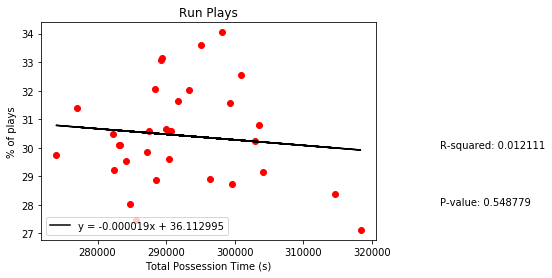

In [531]:
plt.plot(x, y, 'ro')
plt.plot(x, intercept+slope*x, 'k', label='y = %fx + %f' % (slope, intercept))
plt.legend()
plt.title('Run Plays')
plt.xlabel('Total Possession Time (s)')
plt.ylabel('% of plays')
plt.text(330000, 30, 'R-squared: %f' % r_value**2)
plt.text(330000, 28, 'P-value: %f' % p_value)
plt.savefig('../results/run_linregression.png')
plt.show()

In [532]:
x = np.array(corrected_df['Total Possession Time (s)'])
y = np.array(corrected_df['Pass %'])

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print('slope: %f   intercept: %f' % (slope, intercept))

slope: 0.000044   intercept: 29.946304


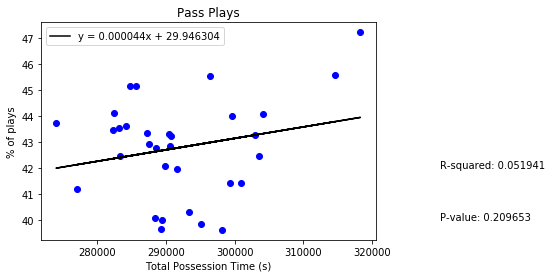

In [533]:
plt.plot(x, y, 'bo')
plt.plot(x, intercept+slope*x, 'k', label='y = %fx + %f' % (slope, intercept))
plt.legend()
plt.title('Pass Plays')
plt.xlabel('Total Possession Time (s)')
plt.ylabel('% of plays')
plt.text(330000, 42, 'R-squared: %f' % r_value**2)
plt.text(330000, 40, 'P-value: %f' % p_value)
plt.savefig('../results/pass_linregression.png')
plt.show()